In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_binary = pd.read_excel ('image_latest.xlsx', sheet_name='Binary_image_data',header=None)
df_binary

0    1    2    3    4    5    6    7    8    9    ...  291  292  293  \
0        0    1    1    0    1    0    1    1    1    0  ...    1    1    1   
1        0    1    1    0    1    0    1    1    1    0  ...    1    1    1   
2        0    1    1    0    1    0    1    1    1    0  ...    1    0    1   
3        0    1    1    0    1    0    1    1    1    0  ...    1    0    1   
4        0    1    1    0    1    0    0    0    1    0  ...    1    0    1   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
16379    0    1    0    0    0    0    0    0    1    1  ...    0    0    0   
16380    0    1    0    0    0    0    0    0    1    1  ...    0    0    0   
16381    0    1    0    0    0    0    0    0    1    1  ...    0    0    0   
16382    0    1    0    0    0    0    0    0    1    1  ...    0    0    0   
16383    0    1    0    0    0    0    0    0    1    1  ...    0    0    0   

       294  295  296  297  298  299  300  
0        0    0    1    0    1    0    0  
1        0    0    1    0    1    0    0  
2        0    0    1    0    1    0    0  
3        0    0    0    0    1    0    0  
4        0    0    0    0    1    0    0  
...    ...  ...  ...  ...  ...  ...  ...  
16379    1    1    0    0    0    1    0  
16380    1    1    0    0    0    1    0  
16381    1    1    0    0    0    1    0  
16382    1    1    0    0    0    1    0  
16383    1    1    0    0    0    1    0  

[16384 rows x 301 columns]

In [3]:
x = []
for i in range(301):
    img = df_binary[i]
    img = np.array(img)
    img = img.reshape((128,128))
    x.append(img)

x = np.array(x)

In [4]:
x.shape

(301, 128, 128)

In [5]:
X_train = x[0:240]
X_val = x[240:270]
X_test = x[270:]

In [6]:
X_train = X_train.reshape(240,128,128,1)
X_val = X_val.reshape(30,128,128,1)
X_test = X_test.reshape(31,128,128,1)

print(X_train.shape, X_val.shape, X_test.shape)

(240, 128, 128, 1) (30, 128, 128, 1) (31, 128, 128, 1)


In [4]:
y = pd.read_excel ('image_latest.xlsx', sheet_name='Diffusivity',header=None)
# y = y/(1.958*10**(-12))

In [5]:
y.describe()

0
count  3.010000e+02
mean   7.607423e-14
std    3.261657e-14
min    7.837232e-15
25%    5.665123e-14
50%    7.319623e-14
75%    9.110585e-14
max    2.948378e-13

In [8]:
y = np.array(y)
y_train = y[0:240]
y_val = y[240:270]
y_test = y[270:]
print(y_train.shape, y_val.shape, y_test.shape)

(240, 1) (30, 1) (31, 1)


In [9]:
y_train = y_train.reshape(240,1)
y_val = y_val.reshape(30,1)
y_test = y_test.reshape(31,1)

print(y_train.shape, y_val.shape, y_test.shape)

(240, 1) (30, 1) (31, 1)


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [11]:
# # CNN

# # size of pooling area for max pooling
# pool_size = (2, 2)
# # convolution kernel size
# kernel_size = (3, 3)

# model = Sequential()

# model.add(Conv2D(24, (6, 6), padding='same', input_shape=(128,128,1)))
# # model.add(BatchNormalization(axis=3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=pool_size))

# model.add(Conv2D(48, (3, 3), padding='same'))
# # model.add(BatchNormalization(axis=3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=pool_size))


# model.add(Conv2D(96, (3, 3), padding='same'))
# # model.add(BatchNormalization(axis=3))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=pool_size))


# # model.add(Convolution2D(64, (3, 3), padding='same'))
# # model.add(BatchNormalization(axis=3))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=pool_size))


# # model.add(Convolution2D(128, (3, 3), padding='same'))
# # model.add(BatchNormalization(axis=3))
# # model.add(Activation('relu'))
# # model.add(MaxPooling2D(pool_size=pool_size))


# #Training result was worse with this layer...complex network led to overfitting...need to fine tune the framework
# model.add(Conv2D(128, (3, 3), padding='same'))
# # model.add(BatchNormalization(axis=3))
# model.add(Activation('relu'))


# model.add(Flatten())
# model.add(Dense(1000))
# model.add(Dropout(0.25))
# model.add(Activation('relu'))
# model.add(Dense(100))
# model.add(Dropout(0.25))
# model.add(Activation('relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(10))
# # model.add(Activation('relu'))
# # model.add(Dropout(0.25))
# model.add(Dense(1))
# model.add(Activation('relu'))

# model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [12]:
lr = [0.01,0.001,0.0001]
kernel_size = [(2,2),(3,3),(4,4),(5,5)]
num_filter = [(8,16),(16,32),(32,64)]
stride = [(2,2),(3,3),(4,4)]
padding = ['same','valid']
pool_size = [(2,2),(3,3),(4,4)]

In [13]:
for a in lr:
    for b in kernel_size:
        for c in stride:
            for d in padding:
                for e in pool_size:
                    for f in num_filter:
                        try:
                            model = keras.models.Sequential()
                            model.add(Conv2D(filters=f[0], kernel_size=b, strides=c, activation='relu', padding=d, input_shape=(128,128,1)))
                            model.add(MaxPool2D(pool_size=e))
                            model.add(Conv2D(filters=f[1], kernel_size=b, strides=c, activation='relu'))
                            model.add(MaxPool2D(pool_size=e))

                            model.add(Flatten())

                            model.add(Dense(128))
                            model.add(Dropout(0.25))

                            model.add(Dense(1))
                            model.add(Dropout(0.5))

                            path = str(a)+str(b)+str(c)+str(d)+str(e)+str(f)
                            print("Model: "+path)

                            model.compile(optimizer=Adam(learning_rate=a), loss='mse', metrics=['mape'])
                            checkpoint_filepath = 'checkpoint_latest/'+path
                            model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_filepath,
                                save_weights_only=True,
                                monitor='mape',
                                mode='min',
                                save_best_only=True)

                            history = model.fit(X_train,y_train, epochs=50, validation_data=(X_val, y_val))
                            path = 'model_latest/'+path+'.h5'
                            model.save(path)
                            new_model = tf.keras.models.load_model(path)

                            train_mape = new_model.evaluate(X_train, y_train, verbose=2)[1]
                            val_mape = new_model.evaluate(X_val, y_val, verbose=2)[1]
                            test_mape = new_model.evaluate(X_test, y_test, verbose=2)[1]

                            print(path)
                            print('train RE : {:5.2f}'.format(train_mape))
                            print('val RE : {:5.2f}'.format(val_mape))
                            print('test RE : {:5.2f}'.format(test_mape))
                            
                            file = open('results.txt','a')
                            file.write("Model : LR {} kernel {} stride {} pool {} padding {} num_filter {}\n".
                                       format(a,b,c,e,d,f))
                            file.write("Train RE : {}\n".format(train_mape))
                            file.write("Val RE : {}\n".format(val_mape))
                            file.write("Test RE : {}\n".format(test_mape))
                            file.write("\n")
                            file.write("\n")
                            file.close()
                        except:
                            print("Bad hyperparameters")
                    

Model: 0.01(2, 2)(2, 2)same(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 2s 140ms/step - loss: 121.3723 - mape: 14697.8551 - val_loss: 4.1748 - val_mape: 6219.9766
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 4.0345 - mape: 3693.1520 - val_loss: 0.0039 - val_mape: 165.5959
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0081 - mape: 228.2088 - val_loss: 0.0106 - val_mape: 318.8983
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0359 - mape: 456.2625 - val_loss: 0.0173 - val_mape: 405.6871
Epoch 5/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0467 - mape: 511.2459 - val_loss: 0.0145 - val_mape: 373.2129
Epoch 6/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0384 - mape: 500.2038 - val_loss: 0.0083 - val_mape: 283.7036
Epoch 7/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0209 - mape: 385.1735 - val_loss: 0.0035 - val_mape: 187.0881
Epoch 8

Epoch 8/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0039 - mape: 187.2737 - val_loss: 3.2625e-04 - val_mape: 45.2230
Epoch 9/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0031 - mape: 140.9830 - val_loss: 2.9019e-04 - val_mape: 31.2931
Epoch 10/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0020 - mape: 109.2789 - val_loss: 3.4358e-04 - val_mape: 30.3337
Epoch 11/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0019 - mape: 107.4928 - val_loss: 4.3023e-04 - val_mape: 32.9245
Epoch 12/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0016 - mape: 107.2163 - val_loss: 5.2246e-04 - val_mape: 37.4788
Epoch 13/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - mape: 99.6219 - val_loss: 5.8640e-04 - val_mape: 40.8220
Epoch 14/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0018 - mape: 106.1106 - val_loss: 6.2199e-04 - val_mape: 42.6225
Epoch 15/50
8/8 [=============

8/8 [==============================] - 0s 18ms/step - loss: 9.6956e-04 - mape: 73.0737 - val_loss: 7.0812e-04 - val_mape: 46.6198
Epoch 23/50
8/8 [==============================] - 0s 18ms/step - loss: 9.1446e-04 - mape: 71.3364 - val_loss: 6.6623e-04 - val_mape: 44.7324
Epoch 24/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 80.6122 - val_loss: 6.6058e-04 - val_mape: 44.4702
Epoch 25/50
8/8 [==============================] - 0s 18ms/step - loss: 9.9606e-04 - mape: 71.6476 - val_loss: 7.3895e-04 - val_mape: 48.1097
Epoch 26/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 71.1429 - val_loss: 6.8742e-04 - val_mape: 45.6993
Epoch 27/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 73.6142 - val_loss: 6.6875e-04 - val_mape: 44.8488
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 73.6636 - val_loss: 6.6399e-04 - val_mape: 44.6288
Epoch 29/50
8/8 [=================

Epoch 37/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - mape: 71.7469 - val_loss: 9.8722e-04 - val_mape: 59.3157
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0010 - mape: 78.7462 - val_loss: 6.0451e-04 - val_mape: 36.8913
Epoch 39/50
8/8 [==============================] - 0s 31ms/step - loss: 8.6410e-04 - mape: 69.4806 - val_loss: 3.7731e-04 - val_mape: 30.2893
Epoch 40/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 84.1262 - val_loss: 0.0012 - val_mape: 72.0049
Epoch 41/50
8/8 [==============================] - 0s 33ms/step - loss: 9.6082e-04 - mape: 73.7878 - val_loss: 7.1160e-04 - val_mape: 43.7667
Epoch 42/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 75.0440 - val_loss: 5.9392e-04 - val_mape: 37.7921
Epoch 43/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0011 - mape: 75.1841 - val_loss: 9.4950e-04 - val_mape: 58.8324
Epoch 44/50
8/8 [=============

8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 70.4820 - val_loss: 6.5863e-04 - val_mape: 44.1290
Epoch 45/50
8/8 [==============================] - 0s 20ms/step - loss: 9.7418e-04 - mape: 67.5903 - val_loss: 6.6409e-04 - val_mape: 44.3879
Epoch 46/50
8/8 [==============================] - 0s 17ms/step - loss: 9.3655e-04 - mape: 65.6719 - val_loss: 7.0408e-04 - val_mape: 46.2018
Epoch 47/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0011 - mape: 74.0194 - val_loss: 7.2199e-04 - val_mape: 47.0069
Epoch 48/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 67.9790 - val_loss: 7.3881e-04 - val_mape: 47.8783
Epoch 49/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 68.1103 - val_loss: 6.8880e-04 - val_mape: 45.5411
Epoch 50/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0010 - mape: 73.6601 - val_loss: 6.5887e-04 - val_mape: 44.1734
8/8 - 0s - loss: 5.9797e-04 - mape: 47

1/1 - 0s - loss: 6.2579e-04 - mape: 43.0258
1/1 - 0s - loss: 8.8810e-04 - mape: 46.5298
model_latest/0.01(2, 2)(2, 2)same(4, 4)(16, 32).h5
train RE : 44.21
val RE : 43.03
test RE : 46.53
Model: 0.01(2, 2)(2, 2)same(4, 4)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 53ms/step - loss: 7.1189 - mape: 3741.4487 - val_loss: 0.0413 - val_mape: 626.0179
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0962 - mape: 829.9709 - val_loss: 0.0036 - val_mape: 140.3988
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0125 - mape: 237.6132 - val_loss: 0.0031 - val_mape: 170.9078
Epoch 4/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0086 - mape: 227.3147 - val_loss: 0.0026 - val_mape: 118.3204
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0035 - mape: 128.5368 - val_loss: 4.3905e-04 - val_mape: 51.2399
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0023 - mape: 120.49

8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 76.0702 - val_loss: 3.4199e-04 - val_mape: 30.2913
Epoch 8/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 107.4694 - val_loss: 2.9163e-04 - val_mape: 30.9458
Epoch 9/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0014 - mape: 105.0947 - val_loss: 3.3878e-04 - val_mape: 30.2302
Epoch 10/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 97.6601 - val_loss: 5.2166e-04 - val_mape: 37.4379
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 9.3568e-04 - mape: 72.3821 - val_loss: 7.5909e-04 - val_mape: 49.1253
Epoch 12/50
8/8 [==============================] - 0s 22ms/step - loss: 9.7348e-04 - mape: 71.8063 - val_loss: 8.6489e-04 - val_mape: 55.0180
Epoch 13/50
8/8 [==============================] - 0s 22ms/step - loss: 9.6889e-04 - mape: 69.4641 - val_loss: 7.7909e-04 - val_mape: 50.2416
Epoch 14/50
8/8 [=================

Epoch 14/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0016 - mape: 93.0840 - val_loss: 6.2579e-04 - val_mape: 42.8092
Epoch 15/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0017 - mape: 106.3549 - val_loss: 6.4230e-04 - val_mape: 43.6074
Epoch 16/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0021 - mape: 106.3418 - val_loss: 6.3432e-04 - val_mape: 43.2239
Epoch 17/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0019 - mape: 103.3436 - val_loss: 6.3571e-04 - val_mape: 43.2911
Epoch 18/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0016 - mape: 112.7095 - val_loss: 6.3458e-04 - val_mape: 43.2367
Epoch 19/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0017 - mape: 101.5887 - val_loss: 6.2741e-04 - val_mape: 42.8882
Epoch 20/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - mape: 99.0041 - val_loss: 6.3271e-04 - val_mape: 43.1461
Epoch 21/50
8/8 [============

8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 76.1470 - val_loss: 6.4463e-04 - val_mape: 43.6747
Epoch 29/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0010 - mape: 69.4692 - val_loss: 6.4958e-04 - val_mape: 43.9111
Epoch 30/50
8/8 [==============================] - 0s 23ms/step - loss: 8.7985e-04 - mape: 65.8760 - val_loss: 7.0567e-04 - val_mape: 46.4690
Epoch 31/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0011 - mape: 72.5390 - val_loss: 7.2830e-04 - val_mape: 47.6062
Epoch 32/50
8/8 [==============================] - 0s 20ms/step - loss: 9.3117e-04 - mape: 71.1652 - val_loss: 6.5829e-04 - val_mape: 44.3221
Epoch 33/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0010 - mape: 76.4778 - val_loss: 6.2672e-04 - val_mape: 42.8149
Epoch 34/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0010 - mape: 67.2525 - val_loss: 6.5595e-04 - val_mape: 44.2174
Epoch 35/50
8/8 [=====================

8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 72.8179 - val_loss: 7.1744e-04 - val_mape: 47.0263
Epoch 36/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 69.6036 - val_loss: 7.1580e-04 - val_mape: 46.9554
Epoch 37/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0011 - mape: 76.3866 - val_loss: 6.5742e-04 - val_mape: 44.3228
Epoch 38/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 82.1114 - val_loss: 6.8612e-04 - val_mape: 45.6410
Epoch 39/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0011 - mape: 73.7733 - val_loss: 6.5497e-04 - val_mape: 44.2078
Epoch 40/50
8/8 [==============================] - 0s 23ms/step - loss: 9.5516e-04 - mape: 75.9136 - val_loss: 6.8527e-04 - val_mape: 45.6024
Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 9.3665e-04 - mape: 71.5424 - val_loss: 7.2770e-04 - val_mape: 47.5329
Epoch 42/50
8/8 [=====================

8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 70.6707 - val_loss: 6.5682e-04 - val_mape: 44.2947
Epoch 50/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0010 - mape: 72.3044 - val_loss: 6.8467e-04 - val_mape: 45.5752
8/8 - 0s - loss: 6.2397e-04 - mape: 48.7246
1/1 - 0s - loss: 6.8467e-04 - mape: 45.5752
1/1 - 0s - loss: 9.7962e-04 - mape: 48.4736
model_latest/0.01(2, 2)(2, 2)valid(4, 4)(8, 16).h5
train RE : 48.72
val RE : 45.58
test RE : 48.47
Model: 0.01(2, 2)(2, 2)valid(4, 4)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 6.0597 - mape: 3295.9725 - val_loss: 0.0557 - val_mape: 721.1609
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0857 - mape: 654.9867 - val_loss: 0.0039 - val_mape: 196.5772
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0077 - mape: 221.8510 - val_loss: 9.2369e-04 - val_mape: 58.5942
Epoch 4/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 14ms/step - loss: 9.5674e-04 - mape: 70.7746 - val_loss: 8.1955e-04 - val_mape: 52.5248
Epoch 12/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 68.1259 - val_loss: 6.8834e-04 - val_mape: 45.7458
Epoch 13/50
8/8 [==============================] - 0s 11ms/step - loss: 9.1910e-04 - mape: 74.2850 - val_loss: 7.2317e-04 - val_mape: 47.3000
Epoch 14/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - mape: 71.4779 - val_loss: 6.8615e-04 - val_mape: 45.6470
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 9.8937e-04 - mape: 68.0398 - val_loss: 6.6070e-04 - val_mape: 44.4807
Epoch 16/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 69.5618 - val_loss: 7.0927e-04 - val_mape: 46.6748
Epoch 17/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 69.1343 - val_loss: 7.4832e-04 - val_mape: 48.5870
Epoch 18/50
8/8 [=================

8/8 [==============================] - 0s 16ms/step - loss: 0.0015 - mape: 92.6442 - val_loss: 7.5698e-04 - val_mape: 49.0201
Epoch 19/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0015 - mape: 88.0855 - val_loss: 6.8618e-04 - val_mape: 45.6435
Epoch 20/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 104.5564 - val_loss: 6.4040e-04 - val_mape: 43.5165
Epoch 21/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 89.6135 - val_loss: 6.3246e-04 - val_mape: 43.1341
Epoch 22/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0014 - mape: 84.9179 - val_loss: 6.8505e-04 - val_mape: 45.5924
Epoch 23/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 86.3354 - val_loss: 6.8725e-04 - val_mape: 45.6919
Epoch 24/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 87.1796 - val_loss: 7.0316e-04 - val_mape: 46.4014
Epoch 25/50
8/8 [============================

8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 69.2008 - val_loss: 6.7509e-04 - val_mape: 44.9852
Epoch 33/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 77.8730 - val_loss: 6.6493e-04 - val_mape: 44.4896
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 8.9415e-04 - mape: 64.8018 - val_loss: 6.8846e-04 - val_mape: 45.5388
Epoch 35/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 70.2220 - val_loss: 7.2817e-04 - val_mape: 47.3764
Epoch 36/50
8/8 [==============================] - 0s 14ms/step - loss: 9.5704e-04 - mape: 64.4628 - val_loss: 6.6892e-04 - val_mape: 44.6555
Epoch 37/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 73.5811 - val_loss: 6.4642e-04 - val_mape: 43.5503
Epoch 38/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0010 - mape: 69.6022 - val_loss: 7.1303e-04 - val_mape: 46.5756
Epoch 39/50
8/8 [=====================

Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 9.6286e-04 - mape: 76.1137 - val_loss: 5.8438e-04 - val_mape: 40.7164
Epoch 40/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 74.9668 - val_loss: 7.5415e-04 - val_mape: 48.8784
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 70.4925 - val_loss: 6.5220e-04 - val_mape: 44.0773
Epoch 42/50
8/8 [==============================] - 0s 13ms/step - loss: 9.7111e-04 - mape: 72.4864 - val_loss: 6.8612e-04 - val_mape: 45.6408
Epoch 43/50
8/8 [==============================] - 0s 14ms/step - loss: 9.2418e-04 - mape: 74.8535 - val_loss: 8.3460e-04 - val_mape: 53.3530
Epoch 44/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 78.3412 - val_loss: 4.9148e-04 - val_mape: 35.8981
Epoch 45/50
8/8 [==============================] - 0s 14ms/step - loss: 9.8208e-04 - mape: 72.6426 - val_loss: 0.0010 - val_mape: 63.2181
Epoch 46/50
8/8 [=====

1/1 - 0s - loss: 7.2064e-04 - mape: 47.1668
1/1 - 0s - loss: 0.0010 - mape: 49.6615
model_latest/0.01(2, 2)(3, 3)valid(2, 2)(8, 16).h5
train RE : 50.52
val RE : 47.17
test RE : 49.66
Model: 0.01(2, 2)(3, 3)valid(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 37ms/step - loss: 2.0293 - mape: 1899.3774 - val_loss: 0.0444 - val_mape: 618.0656
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0308 - mape: 378.5997 - val_loss: 0.0039 - val_mape: 168.4397
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0080 - mape: 201.0368 - val_loss: 0.0033 - val_mape: 154.1310
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0030 - mape: 134.8242 - val_loss: 7.8550e-04 - val_mape: 73.0793
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0033 - mape: 137.0772 - val_loss: 0.0018 - val_mape: 105.5156
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0024 - mape: 109.9275 

8/8 [==============================] - 0s 13ms/step - loss: 9.2752e-04 - mape: 63.6889 - val_loss: 5.9570e-04 - val_mape: 41.5308
Epoch 14/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 74.1720 - val_loss: 7.5938e-04 - val_mape: 49.5509
Epoch 15/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 71.9155 - val_loss: 6.6628e-04 - val_mape: 44.9907
Epoch 16/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 74.0411 - val_loss: 6.5112e-04 - val_mape: 44.2703
Epoch 17/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 71.9849 - val_loss: 6.9952e-04 - val_mape: 46.4264
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 9.1040e-04 - mape: 67.9889 - val_loss: 7.2919e-04 - val_mape: 47.8164
Epoch 19/50
8/8 [==============================] - 0s 13ms/step - loss: 9.8965e-04 - mape: 67.3484 - val_loss: 6.1897e-04 - val_mape: 42.6476
Epoch 20/50
8/8 [=================

Epoch 20/50
8/8 [==============================] - 0s 12ms/step - loss: 9.3178e-04 - mape: 74.4992 - val_loss: 6.4698e-04 - val_mape: 43.8154
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 70.0908 - val_loss: 6.9131e-04 - val_mape: 45.8611
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 9.6191e-04 - mape: 70.1474 - val_loss: 7.2553e-04 - val_mape: 47.3814
Epoch 23/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 72.2336 - val_loss: 6.1554e-04 - val_mape: 42.2872
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 74.1761 - val_loss: 6.6163e-04 - val_mape: 44.5055
Epoch 25/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 73.5826 - val_loss: 7.3673e-04 - val_mape: 47.9584
Epoch 26/50
8/8 [==============================] - 0s 14ms/step - loss: 8.5171e-04 - mape: 65.8481 - val_loss: 6.4868e-04 - val_mape: 43.8968
Epoch 27/50
8/8 [=====

8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - mape: 75.8437 - val_loss: 5.7549e-04 - val_mape: 39.9333
Epoch 33/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 78.3949 - val_loss: 9.2215e-04 - val_mape: 58.8989
Epoch 34/50
8/8 [==============================] - 0s 10ms/step - loss: 9.2846e-04 - mape: 70.5598 - val_loss: 5.7893e-04 - val_mape: 40.1258
Epoch 35/50
8/8 [==============================] - 0s 10ms/step - loss: 8.9984e-04 - mape: 78.6592 - val_loss: 7.1492e-04 - val_mape: 46.5967
Epoch 36/50
8/8 [==============================] - 0s 10ms/step - loss: 9.6204e-04 - mape: 68.8682 - val_loss: 6.1671e-04 - val_mape: 42.0632
Epoch 37/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - mape: 71.7736 - val_loss: 6.5799e-04 - val_mape: 44.0439
Epoch 38/50
8/8 [==============================] - 0s 10ms/step - loss: 8.4108e-04 - mape: 60.2432 - val_loss: 6.7245e-04 - val_mape: 44.7127
Epoch 39/50
8/8 [=============

Epoch 45/50
8/8 [==============================] - 0s 17ms/step - loss: 9.6337e-04 - mape: 70.9540 - val_loss: 6.2770e-04 - val_mape: 42.9024
Epoch 46/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 81.6448 - val_loss: 7.7680e-04 - val_mape: 50.1094
Epoch 47/50
8/8 [==============================] - 0s 14ms/step - loss: 8.9894e-04 - mape: 70.9264 - val_loss: 6.7313e-04 - val_mape: 45.0504
Epoch 48/50
8/8 [==============================] - 0s 16ms/step - loss: 9.8169e-04 - mape: 70.1250 - val_loss: 5.6707e-04 - val_mape: 39.7988
Epoch 49/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 75.8162 - val_loss: 6.7426e-04 - val_mape: 45.1020
Epoch 50/50
8/8 [==============================] - 0s 15ms/step - loss: 9.9405e-04 - mape: 78.0391 - val_loss: 7.4592e-04 - val_mape: 48.4640
8/8 - 0s - loss: 6.8372e-04 - mape: 51.7331
1/1 - 0s - loss: 7.4592e-04 - mape: 48.4640
1/1 - 0s - loss: 0.0010 - mape: 50.6058
model_latest/0.01(2, 2)(4, 4

model_latest/0.01(2, 2)(4, 4)same(3, 3)(8, 16).h5
train RE : 46.78
val RE : 43.67
test RE : 47.37
Model: 0.01(2, 2)(4, 4)same(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 35ms/step - loss: 0.2927 - mape: 1051.9898 - val_loss: 0.0243 - val_mape: 445.6087
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0191 - mape: 286.2293 - val_loss: 0.0031 - val_mape: 175.4794
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0102 - mape: 261.3261 - val_loss: 3.3515e-04 - val_mape: 30.0812
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0018 - mape: 103.1372 - val_loss: 0.0036 - val_mape: 154.9202
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - mape: 125.8409 - val_loss: 3.6909e-04 - val_mape: 30.8262
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0015 - mape: 99.0325 - val_loss: 3.4108e-04 - val_mape: 30.2567
Epoch 7/50
8/8 [=========================

Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 75.8426 - val_loss: 7.3904e-04 - val_mape: 48.7364
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mape: 90.1104 - val_loss: 6.4917e-04 - val_mape: 43.8314
Epoch 9/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 81.5571 - val_loss: 7.7430e-04 - val_mape: 50.3784
Epoch 10/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 75.6360 - val_loss: 6.4731e-04 - val_mape: 43.6986
Epoch 11/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 87.0973 - val_loss: 7.4832e-04 - val_mape: 48.9588
Epoch 12/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 75.2657 - val_loss: 7.7805e-04 - val_mape: 50.4360
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 75.5412 - val_loss: 6.6474e-04 - val_mape: 44.5659
Epoch 14/50
8/8 [====================

Epoch 14/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 75.6431 - val_loss: 6.9515e-04 - val_mape: 46.0458
Epoch 15/50
8/8 [==============================] - 0s 12ms/step - loss: 9.2838e-04 - mape: 70.5626 - val_loss: 6.1760e-04 - val_mape: 42.4059
Epoch 16/50
8/8 [==============================] - 0s 10ms/step - loss: 9.4166e-04 - mape: 71.7073 - val_loss: 6.1849e-04 - val_mape: 42.4498
Epoch 17/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0012 - mape: 86.3291 - val_loss: 6.3955e-04 - val_mape: 43.4761
Epoch 18/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 73.8150 - val_loss: 7.0453e-04 - val_mape: 46.4617
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 9.7429e-04 - mape: 75.8312 - val_loss: 7.6171e-04 - val_mape: 49.2558
Epoch 20/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0012 - mape: 68.2634 - val_loss: 6.4532e-04 - val_mape: 43.7517
Epoch 21/50
8/8 [=====

Epoch 21/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 83.3899 - val_loss: 6.4239e-04 - val_mape: 43.6120
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 73.8253 - val_loss: 7.0516e-04 - val_mape: 46.4893
Epoch 23/50
8/8 [==============================] - 0s 11ms/step - loss: 9.7959e-04 - mape: 74.7232 - val_loss: 6.9627e-04 - val_mape: 46.0958
Epoch 24/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0013 - mape: 75.8095 - val_loss: 6.7220e-04 - val_mape: 45.0078
Epoch 25/50
8/8 [==============================] - 0s 14ms/step - loss: 9.6765e-04 - mape: 69.2484 - val_loss: 6.7139e-04 - val_mape: 44.9705
Epoch 26/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0010 - mape: 84.7051 - val_loss: 7.1166e-04 - val_mape: 46.7747
Epoch 27/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 69.4980 - val_loss: 6.8205e-04 - val_mape: 45.4567
Epoch 28/50
8/8 [=========

Epoch 28/50
8/8 [==============================] - 0s 17ms/step - loss: 9.7496e-04 - mape: 73.9207 - val_loss: 4.6570e-04 - val_mape: 39.3788
Epoch 29/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - mape: 75.5291 - val_loss: 9.4060e-04 - val_mape: 66.4316
Epoch 30/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 76.7474 - val_loss: 5.3853e-04 - val_mape: 44.1866
Epoch 31/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0010 - mape: 77.4961 - val_loss: 5.7178e-04 - val_mape: 46.2333
Epoch 32/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0012 - mape: 77.8899 - val_loss: 8.0772e-04 - val_mape: 59.2166
Epoch 33/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 68.8219 - val_loss: 6.8633e-04 - val_mape: 52.7914
Epoch 34/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0010 - mape: 75.7022 - val_loss: 4.4732e-04 - val_mape: 38.1042
Epoch 35/50
8/8 [=============

8/8 [==============================] - 0s 12ms/step - loss: 9.8802e-04 - mape: 61.2978 - val_loss: 6.6883e-04 - val_mape: 45.5250
Epoch 36/50
8/8 [==============================] - 0s 10ms/step - loss: 9.8315e-04 - mape: 66.0150 - val_loss: 6.8287e-04 - val_mape: 46.1726
Epoch 37/50
8/8 [==============================] - 0s 16ms/step - loss: 9.2090e-04 - mape: 65.6445 - val_loss: 7.0633e-04 - val_mape: 47.5481
Epoch 38/50
8/8 [==============================] - 0s 19ms/step - loss: 8.6919e-04 - mape: 75.5811 - val_loss: 6.1979e-04 - val_mape: 43.0868
Epoch 39/50
8/8 [==============================] - 0s 19ms/step - loss: 9.2834e-04 - mape: 69.9786 - val_loss: 7.5095e-04 - val_mape: 49.7547
Epoch 40/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 70.7968 - val_loss: 6.8730e-04 - val_mape: 46.8286
Epoch 41/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 72.3605 - val_loss: 6.8699e-04 - val_mape: 46.7607
Epoch 42/50
8/8 [=========

Epoch 42/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 73.0676 - val_loss: 7.2527e-04 - val_mape: 47.4072
Epoch 43/50
8/8 [==============================] - 0s 10ms/step - loss: 9.4742e-04 - mape: 66.9327 - val_loss: 6.7968e-04 - val_mape: 45.3495
Epoch 44/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 72.2595 - val_loss: 6.9538e-04 - val_mape: 46.0560
Epoch 45/50
8/8 [==============================] - 0s 11ms/step - loss: 8.7628e-04 - mape: 65.9644 - val_loss: 6.4289e-04 - val_mape: 43.6358
Epoch 46/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 73.1753 - val_loss: 6.4359e-04 - val_mape: 43.6691
Epoch 47/50
8/8 [==============================] - 0s 13ms/step - loss: 9.0649e-04 - mape: 64.0442 - val_loss: 7.3543e-04 - val_mape: 47.9299
Epoch 48/50
8/8 [==============================] - 0s 11ms/step - loss: 9.6750e-04 - mape: 72.4050 - val_loss: 6.2934e-04 - val_mape: 42.9823
Epoch 49/50
8/8 [=

Epoch 49/50
8/8 [==============================] - ETA: 0s - loss: 0.0010 - mape: 69.764 - 0s 11ms/step - loss: 0.0010 - mape: 69.5656 - val_loss: 6.3802e-04 - val_mape: 43.4026
Epoch 50/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 76.5030 - val_loss: 6.7144e-04 - val_mape: 44.9727
8/8 - 0s - loss: 6.1109e-04 - mape: 48.0721
1/1 - 0s - loss: 6.7144e-04 - mape: 44.9727
1/1 - 0s - loss: 9.6501e-04 - mape: 48.0234
model_latest/0.01(2, 2)(4, 4)valid(3, 3)(32, 64).h5
train RE : 48.07
val RE : 44.97
test RE : 48.02
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Model: 0.01(3, 3)(2, 2)same(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 45ms/step - loss: 39.9903 - mape: 7169.9780 - val_loss: 0.1903 - val_mape: 1290.8677
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.2751 - mape: 1140.5978 - val_loss: 0.0751 - val_mape: 807.2933
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.1226

Epoch 4/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0985 - mape: 837.3187 - val_loss: 0.0197 - val_mape: 434.9066
Epoch 5/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0389 - mape: 508.8095 - val_loss: 0.0054 - val_mape: 230.6742
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0132 - mape: 275.0305 - val_loss: 5.6502e-04 - val_mape: 71.7900
Epoch 7/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0037 - mape: 158.8534 - val_loss: 7.5513e-04 - val_mape: 45.3120
Epoch 8/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0024 - mape: 111.6534 - val_loss: 0.0016 - val_mape: 88.5535
Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0029 - mape: 130.4941 - val_loss: 0.0017 - val_mape: 93.0134
Epoch 10/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0034 - mape: 147.7469 - val_loss: 0.0013 - val_mape: 78.7923
Epoch 11/50
8/8 [==============================] - 

8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 78.9768 - val_loss: 7.1381e-04 - val_mape: 46.8684
Epoch 19/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 79.6371 - val_loss: 6.4238e-04 - val_mape: 43.6114
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mape: 89.8921 - val_loss: 7.1319e-04 - val_mape: 46.8417
Epoch 21/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0012 - mape: 72.1505 - val_loss: 7.0236e-04 - val_mape: 46.3659
Epoch 22/50
8/8 [==============================] - 0s 18ms/step - loss: 9.6335e-04 - mape: 74.5404 - val_loss: 6.6541e-04 - val_mape: 44.6948
Epoch 23/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0012 - mape: 83.3147 - val_loss: 6.3571e-04 - val_mape: 43.2912
Epoch 24/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0012 - mape: 75.1651 - val_loss: 6.3621e-04 - val_mape: 43.3151
Epoch 25/50
8/8 [=========================

8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - mape: 100.4484 - val_loss: 8.1168e-04 - val_mape: 52.0884
Epoch 26/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0017 - mape: 96.6264 - val_loss: 7.7038e-04 - val_mape: 49.7380
Epoch 27/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0016 - mape: 99.4872 - val_loss: 7.2170e-04 - val_mape: 47.2219
Epoch 28/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 102.3288 - val_loss: 6.9447e-04 - val_mape: 46.0156
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 102.4492 - val_loss: 7.1387e-04 - val_mape: 46.8710
Epoch 30/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0014 - mape: 96.0585 - val_loss: 7.3164e-04 - val_mape: 47.7358
Epoch 31/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 108.5910 - val_loss: 7.3419e-04 - val_mape: 47.8666
Epoch 32/50
8/8 [=========================

8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mape: 79.4247 - val_loss: 0.0011 - val_mape: 65.7733
Epoch 40/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 76.1492 - val_loss: 5.2408e-04 - val_mape: 37.5583
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 9.2897e-04 - mape: 80.6292 - val_loss: 7.5625e-04 - val_mape: 48.9834
Epoch 42/50
8/8 [==============================] - 0s 21ms/step - loss: 9.8484e-04 - mape: 76.5132 - val_loss: 5.0874e-04 - val_mape: 36.7924
Epoch 43/50
8/8 [==============================] - 0s 21ms/step - loss: 9.6334e-04 - mape: 80.7302 - val_loss: 6.9950e-04 - val_mape: 46.2393
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0010 - mape: 70.5326 - val_loss: 7.9131e-04 - val_mape: 50.9409
Epoch 45/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 67.2149 - val_loss: 6.2377e-04 - val_mape: 42.7101
Epoch 46/50
8/8 [=====================

8/8 [==============================] - 1s 43ms/step - loss: 2.9720 - mape: 2351.6029 - val_loss: 0.1588 - val_mape: 1191.2126
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.1454 - mape: 749.7957 - val_loss: 3.2928e-04 - val_mape: 41.9541
Epoch 3/50
8/8 [==============================] - ETA: 0s - loss: 0.0054 - mape: 196.98 - 0s 24ms/step - loss: 0.0060 - mape: 208.9592 - val_loss: 0.0042 - val_mape: 205.7289
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0146 - mape: 342.3183 - val_loss: 8.4120e-04 - val_mape: 91.5301
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0039 - mape: 170.7178 - val_loss: 0.0013 - val_mape: 77.1999
Epoch 6/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0018 - mape: 97.7754 - val_loss: 0.0027 - val_mape: 130.2265
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0025 - mape: 120.4534 - val_loss: 0.0014 - val_mape: 83.9305
Epoch 8/50
8/8 [=====

8/8 [==============================] - 0s 51ms/step - loss: 0.0028 - mape: 132.6032 - val_loss: 5.7046e-04 - val_mape: 39.9809
Epoch 16/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0031 - mape: 143.9266 - val_loss: 5.8333e-04 - val_mape: 40.6618
Epoch 17/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0023 - mape: 115.5831 - val_loss: 6.1854e-04 - val_mape: 42.4524
Epoch 18/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0025 - mape: 127.2061 - val_loss: 6.7247e-04 - val_mape: 45.0201
Epoch 19/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0021 - mape: 113.9275 - val_loss: 7.2269e-04 - val_mape: 47.2732
Epoch 20/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0024 - mape: 128.5778 - val_loss: 7.6154e-04 - val_mape: 49.2474
Epoch 21/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0026 - mape: 119.2785 - val_loss: 7.4596e-04 - val_mape: 48.4657
Epoch 22/50
8/8 [======================

8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - mape: 99.6151 - val_loss: 6.0066e-04 - val_mape: 41.5555
Epoch 30/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0017 - mape: 96.1697 - val_loss: 7.0547e-04 - val_mape: 46.5030
Epoch 31/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 109.7956 - val_loss: 7.1542e-04 - val_mape: 46.9389
Epoch 32/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 91.3425 - val_loss: 5.5921e-04 - val_mape: 39.3731
Epoch 33/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0017 - mape: 100.2558 - val_loss: 5.4272e-04 - val_mape: 38.4584
Epoch 34/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 99.2890 - val_loss: 6.7560e-04 - val_mape: 45.1634
Epoch 35/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 101.2159 - val_loss: 7.4610e-04 - val_mape: 48.4727
Epoch 36/50
8/8 [==========================

8/8 [==============================] - 0s 19ms/step - loss: 9.6279e-04 - mape: 64.7229 - val_loss: 5.9973e-04 - val_mape: 41.5085
Epoch 44/50
8/8 [==============================] - 0s 19ms/step - loss: 9.3463e-04 - mape: 70.7181 - val_loss: 6.5512e-04 - val_mape: 44.2149
Epoch 45/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 68.0998 - val_loss: 7.2114e-04 - val_mape: 47.1927
Epoch 46/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 68.4168 - val_loss: 6.6894e-04 - val_mape: 44.8576
Epoch 47/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 70.6917 - val_loss: 6.6726e-04 - val_mape: 44.7800
Epoch 48/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 75.6419 - val_loss: 6.8180e-04 - val_mape: 45.4453
Epoch 49/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 71.7168 - val_loss: 7.1243e-04 - val_mape: 46.8083
Epoch 50/50
8/8 [=====================

8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 85.4341 - val_loss: 0.0019 - val_mape: 101.9032
Epoch 6/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0017 - mape: 90.2677 - val_loss: 4.6293e-04 - val_mape: 34.4962
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - mape: 93.9981 - val_loss: 4.2657e-04 - val_mape: 32.7705
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 79.4905 - val_loss: 8.6990e-04 - val_mape: 55.3285
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 66.6821 - val_loss: 7.9583e-04 - val_mape: 51.1979
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 70.1383 - val_loss: 5.7994e-04 - val_mape: 40.4837
Epoch 11/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 82.8670 - val_loss: 7.3669e-04 - val_mape: 47.9947
Epoch 12/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 19ms/step - loss: 0.0015 - mape: 89.6976 - val_loss: 7.3932e-04 - val_mape: 48.1288
Epoch 13/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0012 - mape: 97.5876 - val_loss: 6.8653e-04 - val_mape: 45.6592
Epoch 14/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0013 - mape: 88.5445 - val_loss: 6.6936e-04 - val_mape: 44.8772
Epoch 15/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0013 - mape: 96.8496 - val_loss: 7.9940e-04 - val_mape: 51.3996
Epoch 16/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0014 - mape: 91.4131 - val_loss: 8.6029e-04 - val_mape: 54.7396
Epoch 17/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0014 - mape: 94.1668 - val_loss: 6.5001e-04 - val_mape: 43.9742
Epoch 18/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0013 - mape: 89.1670 - val_loss: 6.3722e-04 - val_mape: 43.3637
Epoch 19/50
8/8 [=============================

8/8 [==============================] - 0s 14ms/step - loss: 9.9245e-04 - mape: 67.8168 - val_loss: 6.4618e-04 - val_mape: 43.7923
Epoch 27/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 70.8372 - val_loss: 7.4854e-04 - val_mape: 48.5960
Epoch 28/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 73.2924 - val_loss: 7.1951e-04 - val_mape: 47.1162
Epoch 29/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 74.4574 - val_loss: 5.8770e-04 - val_mape: 40.8893
Epoch 30/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 76.0969 - val_loss: 8.1902e-04 - val_mape: 52.4967
Epoch 31/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 76.9306 - val_loss: 6.0603e-04 - val_mape: 41.8274
Epoch 32/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 74.1719 - val_loss: 7.1118e-04 - val_mape: 46.7536
Epoch 33/50
8/8 [=========================

8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 77.3557 - val_loss: 7.3979e-04 - val_mape: 48.1525
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 77.0898 - val_loss: 6.7381e-04 - val_mape: 45.0814
Epoch 42/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 76.3556 - val_loss: 6.5513e-04 - val_mape: 44.2153
Epoch 43/50
8/8 [==============================] - 0s 17ms/step - loss: 9.7741e-04 - mape: 71.1970 - val_loss: 7.2148e-04 - val_mape: 47.2103
Epoch 44/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 74.8164 - val_loss: 6.8478e-04 - val_mape: 45.5803
Epoch 45/50
8/8 [==============================] - 0s 19ms/step - loss: 9.7461e-04 - mape: 78.6581 - val_loss: 6.5271e-04 - val_mape: 44.1016
Epoch 46/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0010 - mape: 82.6935 - val_loss: 7.2076e-04 - val_mape: 47.1728
Epoch 47/50
8/8 [=====================

Epoch 47/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0010 - mape: 70.1558 - val_loss: 7.7048e-04 - val_mape: 49.7435
Epoch 48/50
8/8 [==============================] - 0s 14ms/step - loss: 9.7124e-04 - mape: 69.0064 - val_loss: 6.2165e-04 - val_mape: 42.6059
Epoch 49/50
8/8 [==============================] - 0s 14ms/step - loss: 8.9409e-04 - mape: 71.9924 - val_loss: 6.9099e-04 - val_mape: 45.8597
Epoch 50/50
8/8 [==============================] - 0s 12ms/step - loss: 9.5591e-04 - mape: 71.9648 - val_loss: 6.5801e-04 - val_mape: 44.3503
8/8 - 0s - loss: 5.9802e-04 - mape: 47.4259
1/1 - 0s - loss: 6.5801e-04 - mape: 44.3503
1/1 - 0s - loss: 9.5016e-04 - mape: 47.5584
model_latest/0.01(3, 3)(3, 3)valid(2, 2)(8, 16).h5
train RE : 47.43
val RE : 44.35
test RE : 47.56
Model: 0.01(3, 3)(3, 3)valid(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 6.9872 - mape: 3185.3488 - val_loss: 0.0664 - val_mape: 751.6705
Epoch 2/50
8/8 [==========

8/8 [==============================] - 0s 13ms/step - loss: 9.8230e-04 - mape: 70.6116 - val_loss: 8.2141e-04 - val_mape: 52.6286
Epoch 10/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 72.1889 - val_loss: 5.8905e-04 - val_mape: 40.9594
Epoch 11/50
8/8 [==============================] - 0s 14ms/step - loss: 9.7371e-04 - mape: 70.5181 - val_loss: 7.6693e-04 - val_mape: 49.5371
Epoch 12/50
8/8 [==============================] - 0s 13ms/step - loss: 9.9669e-04 - mape: 83.7421 - val_loss: 5.8324e-04 - val_mape: 40.6570
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 8.6434e-04 - mape: 69.6746 - val_loss: 6.6051e-04 - val_mape: 44.4671
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 9.6757e-04 - mape: 68.0669 - val_loss: 7.4364e-04 - val_mape: 48.3485
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 9.8746e-04 - mape: 69.1975 - val_loss: 6.7004e-04 - val_mape: 44.9083
Epoch 16/50
8/8 [=====

Epoch 16/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 80.7041 - val_loss: 6.5860e-04 - val_mape: 44.3779
Epoch 17/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mape: 76.3698 - val_loss: 7.9270e-04 - val_mape: 51.0200
Epoch 18/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 75.4013 - val_loss: 6.9068e-04 - val_mape: 45.8458
Epoch 19/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mape: 73.8425 - val_loss: 7.3584e-04 - val_mape: 47.9513
Epoch 20/50
8/8 [==============================] - 0s 14ms/step - loss: 9.7056e-04 - mape: 76.3259 - val_loss: 5.7899e-04 - val_mape: 40.4337
Epoch 21/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 80.3984 - val_loss: 7.5211e-04 - val_mape: 48.7760
Epoch 22/50
8/8 [==============================] - 0s 15ms/step - loss: 9.4673e-04 - mape: 68.9122 - val_loss: 6.5631e-04 - val_mape: 44.2708
Epoch 23/50
8/8 [=========

8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 66.4183 - val_loss: 7.6009e-04 - val_mape: 49.1752
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 73.9261 - val_loss: 5.5763e-04 - val_mape: 39.2862
Epoch 32/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 77.7885 - val_loss: 7.9473e-04 - val_mape: 51.1351
Epoch 33/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0010 - mape: 71.9317 - val_loss: 5.9158e-04 - val_mape: 41.0904
Epoch 34/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 77.5552 - val_loss: 7.5793e-04 - val_mape: 49.0672
Epoch 35/50
8/8 [==============================] - 0s 12ms/step - loss: 9.9792e-04 - mape: 71.7535 - val_loss: 6.6319e-04 - val_mape: 44.5917
Epoch 36/50
8/8 [==============================] - 0s 13ms/step - loss: 9.1540e-04 - mape: 70.7315 - val_loss: 6.8194e-04 - val_mape: 45.4519
Epoch 37/50
8/8 [=====================

8/8 [==============================] - 0s 12ms/step - loss: 9.2356e-04 - mape: 71.7025 - val_loss: 6.9119e-04 - val_mape: 45.8690
Epoch 38/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 76.5860 - val_loss: 7.1981e-04 - val_mape: 47.1293
Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 73.0413 - val_loss: 6.5356e-04 - val_mape: 44.1415
Epoch 40/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 70.3436 - val_loss: 7.0374e-04 - val_mape: 46.4270
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 73.1806 - val_loss: 6.7257e-04 - val_mape: 45.0245
Epoch 42/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 72.2873 - val_loss: 6.6759e-04 - val_mape: 44.7953
Epoch 43/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 76.6875 - val_loss: 6.9072e-04 - val_mape: 45.8477
Epoch 44/50
8/8 [=========================

8/8 [==============================] - 0s 10ms/step - loss: 0.0011 - mape: 72.3826 - val_loss: 6.0602e-04 - val_mape: 41.8273
8/8 - 0s - loss: 5.4746e-04 - mape: 44.9466
1/1 - 0s - loss: 6.0602e-04 - mape: 41.8273
1/1 - 0s - loss: 8.9241e-04 - mape: 45.6734
model_latest/0.01(3, 3)(4, 4)valid(2, 2)(8, 16).h5
train RE : 44.95
val RE : 41.83
test RE : 45.67
Model: 0.01(3, 3)(4, 4)valid(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 1.3402 - mape: 1705.4024 - val_loss: 0.0593 - val_mape: 706.0033
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0835 - mape: 651.8145 - val_loss: 0.0080 - val_mape: 245.8193
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0061 - mape: 169.4789 - val_loss: 0.0019 - val_mape: 138.1999
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0095 - mape: 289.8760 - val_loss: 7.9919e-04 - val_mape: 88.9405
Epoch 5/50
8/8 [==============================] - 0s 14m

Epoch 11/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0048 - mape: 190.9238 - val_loss: 0.0014 - val_mape: 90.5496
Epoch 12/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0040 - mape: 143.8071 - val_loss: 0.0014 - val_mape: 88.4564
Epoch 13/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0033 - mape: 134.4245 - val_loss: 0.0015 - val_mape: 91.5227
Epoch 14/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0034 - mape: 142.2601 - val_loss: 0.0013 - val_mape: 82.8336
Epoch 15/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0028 - mape: 124.5610 - val_loss: 0.0017 - val_mape: 93.9397
Epoch 16/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0031 - mape: 130.9443 - val_loss: 0.0012 - val_mape: 79.6756
Epoch 17/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0033 - mape: 131.7559 - val_loss: 0.0034 - val_mape: 129.5082
Epoch 18/50
8/8 [==============================] - 0s 

Epoch 19/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0032 - mape: 128.1731 - val_loss: 8.9923e-04 - val_mape: 57.1270
Epoch 20/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0032 - mape: 137.1063 - val_loss: 8.1327e-04 - val_mape: 52.1770
Epoch 21/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0033 - mape: 141.3447 - val_loss: 7.6290e-04 - val_mape: 49.3149
Epoch 22/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0029 - mape: 132.2829 - val_loss: 7.4789e-04 - val_mape: 48.5631
Epoch 23/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0032 - mape: 137.4438 - val_loss: 7.5836e-04 - val_mape: 49.0887
Epoch 24/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0028 - mape: 136.1346 - val_loss: 7.7083e-04 - val_mape: 49.7641
Epoch 25/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0028 - mape: 125.0203 - val_loss: 7.6010e-04 - val_mape: 49.1757
Epoch 26/50
8/8 [==========

8/8 [==============================] - 0s 24ms/step - loss: 9.5248e-04 - mape: 74.5850 - val_loss: 6.5171e-04 - val_mape: 44.0544
Epoch 34/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0010 - mape: 71.1954 - val_loss: 7.2925e-04 - val_mape: 47.6125
Epoch 35/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 69.5306 - val_loss: 6.4029e-04 - val_mape: 43.5113
Epoch 36/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0010 - mape: 70.0675 - val_loss: 6.3582e-04 - val_mape: 43.2967
Epoch 37/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0010 - mape: 80.6199 - val_loss: 7.3259e-04 - val_mape: 47.7847
Epoch 38/50
8/8 [==============================] - 0s 24ms/step - loss: 9.8232e-04 - mape: 76.9249 - val_loss: 7.0625e-04 - val_mape: 46.5374
Epoch 39/50
8/8 [==============================] - 0s 24ms/step - loss: 9.7503e-04 - mape: 67.7430 - val_loss: 6.8222e-04 - val_mape: 45.4647
Epoch 40/50
8/8 [=================

8/8 [==============================] - 0s 40ms/step - loss: 0.0010 - mape: 77.3439 - val_loss: 6.0041e-04 - val_mape: 41.5427
Epoch 48/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0010 - mape: 82.1562 - val_loss: 6.2114e-04 - val_mape: 42.5807
Epoch 49/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0012 - mape: 88.7777 - val_loss: 6.7684e-04 - val_mape: 45.2202
Epoch 50/50
8/8 [==============================] - 0s 38ms/step - loss: 9.8935e-04 - mape: 73.7864 - val_loss: 7.2394e-04 - val_mape: 47.3380
8/8 - 0s - loss: 6.6226e-04 - mape: 50.6606
1/1 - 0s - loss: 7.2394e-04 - mape: 47.3380
1/1 - 0s - loss: 0.0010 - mape: 49.7678
model_latest/0.01(4, 4)(2, 2)same(3, 3)(32, 64).h5
train RE : 50.66
val RE : 47.34
test RE : 49.77
Model: 0.01(4, 4)(2, 2)same(4, 4)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 0.1178 - mape: 630.0025 - val_loss: 0.0141 - val_mape: 335.5333
Epoch 2/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 36ms/step - loss: 0.0018 - mape: 107.1091 - val_loss: 5.4495e-04 - val_mape: 37.6737
Epoch 10/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0017 - mape: 115.0616 - val_loss: 9.8320e-04 - val_mape: 61.8666
Epoch 11/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0016 - mape: 96.0335 - val_loss: 7.3566e-04 - val_mape: 46.4063
Epoch 12/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0014 - mape: 99.7093 - val_loss: 5.6780e-04 - val_mape: 38.7826
Epoch 13/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0016 - mape: 102.6032 - val_loss: 6.5444e-04 - val_mape: 42.6059
Epoch 14/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0015 - mape: 95.3632 - val_loss: 7.5530e-04 - val_mape: 47.6607
Epoch 15/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0015 - mape: 89.9286 - val_loss: 8.1227e-04 - val_mape: 51.4498
Epoch 16/50
8/8 [==========================

8/8 [==============================] - 0s 49ms/step - loss: 0.0026 - mape: 121.8079 - val_loss: 7.6071e-04 - val_mape: 49.2062
Epoch 24/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0019 - mape: 112.6758 - val_loss: 7.3132e-04 - val_mape: 47.7192
Epoch 25/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0020 - mape: 118.0171 - val_loss: 7.3210e-04 - val_mape: 47.7592
Epoch 26/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0018 - mape: 107.9589 - val_loss: 7.4184e-04 - val_mape: 48.2570
Epoch 27/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0019 - mape: 102.5040 - val_loss: 7.0889e-04 - val_mape: 46.6536
Epoch 28/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0022 - mape: 113.8614 - val_loss: 7.0894e-04 - val_mape: 46.6557
Epoch 29/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0024 - mape: 110.7469 - val_loss: 6.9058e-04 - val_mape: 45.8413
Epoch 30/50
8/8 [======================

8/8 [==============================] - 0s 29ms/step - loss: 0.0012 - mape: 76.0347 - val_loss: 6.8910e-04 - val_mape: 45.7750
Epoch 38/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0012 - mape: 81.4438 - val_loss: 6.3222e-04 - val_mape: 43.1226
Epoch 39/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 78.5684 - val_loss: 7.4358e-04 - val_mape: 48.3450
Epoch 40/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0011 - mape: 77.0468 - val_loss: 7.1245e-04 - val_mape: 46.8093
Epoch 41/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0013 - mape: 84.8156 - val_loss: 7.2368e-04 - val_mape: 47.3246
Epoch 42/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 83.3759 - val_loss: 7.1527e-04 - val_mape: 46.9322
Epoch 43/50
8/8 [==============================] - 0s 27ms/step - loss: 8.8448e-04 - mape: 73.9996 - val_loss: 6.7659e-04 - val_mape: 45.2084
Epoch 44/50
8/8 [=========================

1/1 - 0s - loss: 6.2571e-04 - mape: 42.8050
1/1 - 0s - loss: 9.1433e-04 - mape: 46.4039
model_latest/0.01(4, 4)(2, 2)valid(3, 3)(32, 64).h5
train RE : 45.89
val RE : 42.81
test RE : 46.40
Model: 0.01(4, 4)(2, 2)valid(4, 4)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 58ms/step - loss: 0.1474 - mape: 776.6914 - val_loss: 0.0135 - val_mape: 327.3206
Epoch 2/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0096 - mape: 218.0811 - val_loss: 0.0042 - val_mape: 204.7861
Epoch 3/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0069 - mape: 186.9101 - val_loss: 0.0055 - val_mape: 200.3447
Epoch 4/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0054 - mape: 183.7943 - val_loss: 3.3127e-04 - val_mape: 30.0678
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0022 - mape: 124.8210 - val_loss: 5.0508e-04 - val_mape: 36.6055
Epoch 6/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - mape: 82.

8/8 [==============================] - 0s 32ms/step - loss: 0.0011 - mape: 77.7213 - val_loss: 8.7366e-04 - val_mape: 55.5616
Epoch 14/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0014 - mape: 81.6615 - val_loss: 7.1003e-04 - val_mape: 46.7034
Epoch 15/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0012 - mape: 83.0221 - val_loss: 6.0443e-04 - val_mape: 41.7470
Epoch 16/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - mape: 90.3143 - val_loss: 6.6620e-04 - val_mape: 44.7310
Epoch 17/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0013 - mape: 78.5266 - val_loss: 6.6812e-04 - val_mape: 44.8198
Epoch 18/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0013 - mape: 82.5723 - val_loss: 7.2373e-04 - val_mape: 47.3271
Epoch 19/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0013 - mape: 84.1412 - val_loss: 6.4083e-04 - val_mape: 43.5372
Epoch 20/50
8/8 [=============================

8/8 [==============================] - 0s 21ms/step - loss: 0.0013 - mape: 92.9171 - val_loss: 7.6632e-04 - val_mape: 49.5015
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 96.7198 - val_loss: 6.7822e-04 - val_mape: 45.2828
Epoch 29/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0016 - mape: 104.0183 - val_loss: 6.0349e-04 - val_mape: 41.6990
Epoch 30/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0016 - mape: 101.1228 - val_loss: 5.8905e-04 - val_mape: 40.9598
Epoch 31/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0015 - mape: 93.3913 - val_loss: 6.1576e-04 - val_mape: 42.3146
Epoch 32/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0015 - mape: 94.7002 - val_loss: 7.2573e-04 - val_mape: 47.4308
Epoch 33/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 92.2156 - val_loss: 7.5819e-04 - val_mape: 49.0805
Epoch 34/50
8/8 [===========================

8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 70.7114 - val_loss: 6.7925e-04 - val_mape: 45.3302
Epoch 42/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 77.5542 - val_loss: 7.1745e-04 - val_mape: 47.0275
Epoch 43/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 78.5546 - val_loss: 6.1708e-04 - val_mape: 42.3810
Epoch 44/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 84.8209 - val_loss: 7.4673e-04 - val_mape: 48.5049
Epoch 45/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 69.0446 - val_loss: 6.2422e-04 - val_mape: 42.7327
Epoch 46/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 71.9111 - val_loss: 7.3479e-04 - val_mape: 47.8976
Epoch 47/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 73.3215 - val_loss: 6.3879e-04 - val_mape: 43.4401
Epoch 48/50
8/8 [=============================

Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0106 - mape: 218.2424 - val_loss: 0.0017 - val_mape: 132.6132
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0107 - mape: 277.9804 - val_loss: 0.0024 - val_mape: 154.6086
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0067 - mape: 222.7369 - val_loss: 0.0011 - val_mape: 68.5123
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 104.1096 - val_loss: 0.0030 - val_mape: 138.9781
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mape: 127.9342 - val_loss: 0.0011 - val_mape: 69.9085
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 77.2325 - val_loss: 3.5268e-04 - val_mape: 30.5122
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0014 - mape: 103.6769 - val_loss: 4.7179e-04 - val_mape: 34.9079
Epoch 10/50
8/8 [==============================] - 0

8/8 [==============================] - 0s 25ms/step - loss: 0.0028 - mape: 141.3909 - val_loss: 8.8889e-04 - val_mape: 56.4979
Epoch 18/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0027 - mape: 125.9346 - val_loss: 8.7592e-04 - val_mape: 55.7014
Epoch 19/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0028 - mape: 126.4156 - val_loss: 8.2280e-04 - val_mape: 52.7055
Epoch 20/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0031 - mape: 130.6733 - val_loss: 7.6178e-04 - val_mape: 49.2595
Epoch 21/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0031 - mape: 133.7905 - val_loss: 7.3282e-04 - val_mape: 47.7963
Epoch 22/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0028 - mape: 133.1515 - val_loss: 7.4127e-04 - val_mape: 48.2280
Epoch 23/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0024 - mape: 128.6127 - val_loss: 7.1955e-04 - val_mape: 47.1181
Epoch 24/50
8/8 [======================

Epoch 24/50
8/8 [==============================] - 0s 17ms/step - loss: 9.9287e-04 - mape: 71.1162 - val_loss: 6.8225e-04 - val_mape: 45.5039
Epoch 25/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 67.5552 - val_loss: 5.9419e-04 - val_mape: 41.2634
Epoch 26/50
8/8 [==============================] - 0s 21ms/step - loss: 9.0832e-04 - mape: 63.9176 - val_loss: 8.3058e-04 - val_mape: 53.1315
Epoch 27/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 74.7710 - val_loss: 6.9090e-04 - val_mape: 45.8951
Epoch 28/50
8/8 [==============================] - 0s 15ms/step - loss: 9.0540e-04 - mape: 64.4831 - val_loss: 5.2560e-04 - val_mape: 37.6864
Epoch 29/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 74.3327 - val_loss: 6.4567e-04 - val_mape: 43.8083
Epoch 30/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 66.8965 - val_loss: 6.9216e-04 - val_mape: 45.9536
Epoch 31/50
8/8 [=====

Epoch 31/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 72.5287 - val_loss: 6.1367e-04 - val_mape: 42.2105
Epoch 32/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 75.6359 - val_loss: 7.0633e-04 - val_mape: 46.5410
Epoch 33/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 78.2443 - val_loss: 6.8130e-04 - val_mape: 45.4230
Epoch 34/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 75.6734 - val_loss: 6.6156e-04 - val_mape: 44.5158
Epoch 35/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 80.2634 - val_loss: 6.7732e-04 - val_mape: 45.2418
Epoch 36/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 80.4974 - val_loss: 6.6699e-04 - val_mape: 44.7677
Epoch 37/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 80.5297 - val_loss: 6.8460e-04 - val_mape: 45.5722
Epoch 38/50
8/8 [=================

Epoch 45/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 72.7847 - val_loss: 6.2081e-04 - val_mape: 42.5646
Epoch 46/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 86.5753 - val_loss: 6.9281e-04 - val_mape: 45.9412
Epoch 47/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 72.3233 - val_loss: 7.4072e-04 - val_mape: 48.1998
Epoch 48/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 75.4143 - val_loss: 6.4448e-04 - val_mape: 43.7118
Epoch 49/50
8/8 [==============================] - 0s 12ms/step - loss: 9.8391e-04 - mape: 70.7521 - val_loss: 6.9110e-04 - val_mape: 45.8647
Epoch 50/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 75.7753 - val_loss: 6.9830e-04 - val_mape: 46.1858
8/8 - 0s - loss: 6.3726e-04 - mape: 49.3975
1/1 - 0s - loss: 6.9830e-04 - mape: 46.1858
1/1 - 0s - loss: 9.9464e-04 - mape: 48.9298
model_latest/0.01(4, 4)(4, 4)same(2,

Epoch 1/50
8/8 [==============================] - 1s 42ms/step - loss: 73.9848 - mape: 9676.8055 - val_loss: 0.0700 - val_mape: 770.5447
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 0.1245 - mape: 806.9115 - val_loss: 0.0135 - val_mape: 322.9103
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0162 - mape: 277.9276 - val_loss: 0.0055 - val_mape: 230.4420
Epoch 4/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0100 - mape: 219.8446 - val_loss: 0.0113 - val_mape: 295.9769
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0104 - mape: 244.9086 - val_loss: 3.7229e-04 - val_mape: 41.9881
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0044 - mape: 172.3664 - val_loss: 6.8445e-04 - val_mape: 50.5581
Epoch 7/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0025 - mape: 117.3026 - val_loss: 0.0021 - val_mape: 107.2606
Epoch 8/50
8/8 [==============================]

Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 73.3394 - val_loss: 6.1898e-04 - val_mape: 42.4744
Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0012 - mape: 80.2109 - val_loss: 7.2382e-04 - val_mape: 47.3320
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 79.8485 - val_loss: 7.8714e-04 - val_mape: 50.7031
Epoch 11/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0011 - mape: 75.3416 - val_loss: 6.6993e-04 - val_mape: 44.9033
Epoch 12/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 89.0501 - val_loss: 6.8502e-04 - val_mape: 45.5912
Epoch 13/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 77.3579 - val_loss: 6.7410e-04 - val_mape: 45.0949
Epoch 14/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 75.1385 - val_loss: 5.9569e-04 - val_mape: 41.3017
Epoch 15/50
8/8 [===================

8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 91.1538 - val_loss: 6.8795e-04 - val_mape: 45.7232
Epoch 23/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 84.3571 - val_loss: 7.4873e-04 - val_mape: 48.6057
Epoch 24/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 87.9513 - val_loss: 7.1304e-04 - val_mape: 46.8348
Epoch 25/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 91.7599 - val_loss: 6.5797e-04 - val_mape: 44.3485
Epoch 26/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 77.6806 - val_loss: 6.3325e-04 - val_mape: 43.1723
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 91.5136 - val_loss: 6.9844e-04 - val_mape: 46.1921
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 78.2912 - val_loss: 7.2422e-04 - val_mape: 47.3527
Epoch 29/50
8/8 [=============================

8/8 [==============================] - 0s 39ms/step - loss: 0.0022 - mape: 114.8724 - val_loss: 6.1886e-04 - val_mape: 42.4683
Epoch 36/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0020 - mape: 109.1182 - val_loss: 6.3988e-04 - val_mape: 43.4917
Epoch 37/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0018 - mape: 101.1490 - val_loss: 6.4622e-04 - val_mape: 43.7945
Epoch 38/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0021 - mape: 106.7981 - val_loss: 6.5940e-04 - val_mape: 44.4150
Epoch 39/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0021 - mape: 112.0711 - val_loss: 6.8711e-04 - val_mape: 45.6854
Epoch 40/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0021 - mape: 113.8502 - val_loss: 6.8698e-04 - val_mape: 45.6797
Epoch 41/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0019 - mape: 104.4339 - val_loss: 6.8507e-04 - val_mape: 45.5935
Epoch 42/50
8/8 [======================

8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 70.3073 - val_loss: 6.7411e-04 - val_mape: 45.0952
Epoch 50/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0012 - mape: 82.4453 - val_loss: 6.6006e-04 - val_mape: 44.4458
8/8 - 0s - loss: 6.0001e-04 - mape: 47.5244
1/1 - 0s - loss: 6.6006e-04 - mape: 44.4458
1/1 - 0s - loss: 9.5243e-04 - mape: 47.6298
model_latest/0.01(5, 5)(2, 2)same(3, 3)(8, 16).h5
train RE : 47.52
val RE : 44.45
test RE : 47.63
Model: 0.01(5, 5)(2, 2)same(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 54ms/step - loss: 28.0550 - mape: 6081.0463 - val_loss: 0.0438 - val_mape: 642.5262
Epoch 2/50
8/8 [==============================] - 0s 32ms/step - loss: 0.1275 - mape: 889.3553 - val_loss: 0.0599 - val_mape: 749.1278
Epoch 3/50
8/8 [==============================] - 0s 31ms/step - loss: 0.1026 - mape: 693.4652 - val_loss: 0.0265 - val_mape: 502.0304
Epoch 4/50
8/8 [==============================] - 0s 32ms

8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - mape: 75.0176 - val_loss: 7.9172e-04 - val_mape: 50.9644
Epoch 12/50
8/8 [==============================] - 0s 27ms/step - loss: 9.6629e-04 - mape: 65.3381 - val_loss: 6.1909e-04 - val_mape: 42.4798
Epoch 13/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0011 - mape: 71.4187 - val_loss: 7.1254e-04 - val_mape: 46.8133
Epoch 14/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - mape: 77.8552 - val_loss: 7.1344e-04 - val_mape: 46.8523
Epoch 15/50
8/8 [==============================] - 0s 26ms/step - loss: 9.1875e-04 - mape: 71.6932 - val_loss: 6.8778e-04 - val_mape: 45.7158
Epoch 16/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 73.7725 - val_loss: 7.5571e-04 - val_mape: 48.9565
Epoch 17/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0011 - mape: 65.7966 - val_loss: 5.9254e-04 - val_mape: 41.1402
Epoch 18/50
8/8 [=====================

8/8 [==============================] - 0s 32ms/step - loss: 0.0012 - mape: 84.2819 - val_loss: 7.0823e-04 - val_mape: 46.6243
Epoch 19/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0015 - mape: 96.1082 - val_loss: 6.2096e-04 - val_mape: 42.5720
Epoch 20/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0014 - mape: 86.9250 - val_loss: 6.7810e-04 - val_mape: 45.2775
Epoch 21/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0014 - mape: 95.8008 - val_loss: 6.5847e-04 - val_mape: 44.3716
Epoch 22/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0013 - mape: 80.6646 - val_loss: 5.1134e-04 - val_mape: 36.9240
Epoch 23/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0011 - mape: 80.1279 - val_loss: 7.5391e-04 - val_mape: 48.8663
Epoch 24/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0013 - mape: 79.8813 - val_loss: 6.7310e-04 - val_mape: 45.0487
Epoch 25/50
8/8 [=============================

8/8 [==============================] - 0s 29ms/step - loss: 0.0010 - mape: 76.1449 - val_loss: 6.8736e-04 - val_mape: 45.6968
Epoch 33/50
8/8 [==============================] - 0s 28ms/step - loss: 8.7729e-04 - mape: 73.4114 - val_loss: 5.9850e-04 - val_mape: 41.4457
Epoch 34/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0011 - mape: 77.0001 - val_loss: 6.8918e-04 - val_mape: 45.7787
Epoch 35/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0011 - mape: 68.9394 - val_loss: 7.3190e-04 - val_mape: 47.7491
Epoch 36/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0010 - mape: 72.4313 - val_loss: 6.3761e-04 - val_mape: 43.3825
Epoch 37/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0011 - mape: 70.3844 - val_loss: 7.4816e-04 - val_mape: 48.5769
Epoch 38/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 71.1521 - val_loss: 6.8407e-04 - val_mape: 45.5482
Epoch 39/50
8/8 [=========================

Epoch 47/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0035 - mape: 143.3530 - val_loss: 0.0011 - val_mape: 69.0400
Epoch 48/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0044 - mape: 150.4098 - val_loss: 0.0011 - val_mape: 66.2958
Epoch 49/50
8/8 [==============================] - 0s 61ms/step - loss: 0.0040 - mape: 135.4179 - val_loss: 0.0010 - val_mape: 64.4808
Epoch 50/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0037 - mape: 145.0302 - val_loss: 9.9910e-04 - val_mape: 62.9475
8/8 - 0s - loss: 9.3151e-04 - mape: 63.6870
1/1 - 0s - loss: 9.9910e-04 - mape: 62.9475
1/1 - 0s - loss: 0.0013 - mape: 61.6866
model_latest/0.01(5, 5)(2, 2)valid(2, 2)(32, 64).h5
train RE : 63.69
val RE : 62.95
test RE : 61.69
Model: 0.01(5, 5)(2, 2)valid(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 42ms/step - loss: 2.6130 - mape: 1854.8863 - val_loss: 0.0596 - val_mape: 713.1481
Epoch 2/50
8/8 [==============================] - 

Epoch 10/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0031 - mape: 132.5835 - val_loss: 6.9971e-04 - val_mape: 46.2486
Epoch 11/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0023 - mape: 118.6240 - val_loss: 9.6024e-04 - val_mape: 60.7343
Epoch 12/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0022 - mape: 107.5942 - val_loss: 0.0011 - val_mape: 66.4182
Epoch 13/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0025 - mape: 124.8072 - val_loss: 0.0010 - val_mape: 63.8636
Epoch 14/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0030 - mape: 117.7829 - val_loss: 7.8985e-04 - val_mape: 50.8582
Epoch 15/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0024 - mape: 129.3227 - val_loss: 7.1217e-04 - val_mape: 46.7972
Epoch 16/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0023 - mape: 121.8077 - val_loss: 6.9811e-04 - val_mape: 46.1776
Epoch 17/50
8/8 [==================

8/8 [==============================] - 0s 29ms/step - loss: 0.0011 - mape: 76.3586 - val_loss: 6.4808e-04 - val_mape: 43.8829
Epoch 25/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0013 - mape: 77.9540 - val_loss: 6.2591e-04 - val_mape: 42.8149
Epoch 26/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0012 - mape: 83.0558 - val_loss: 6.7660e-04 - val_mape: 45.2089
Epoch 27/50
8/8 [==============================] - 0s 27ms/step - loss: 9.8485e-04 - mape: 75.9880 - val_loss: 7.4848e-04 - val_mape: 48.5929
Epoch 28/50
8/8 [==============================] - 0s 27ms/step - loss: 9.9361e-04 - mape: 73.9642 - val_loss: 6.5796e-04 - val_mape: 44.3478
Epoch 29/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0012 - mape: 82.3791 - val_loss: 6.0527e-04 - val_mape: 41.7894
Epoch 30/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0011 - mape: 76.0531 - val_loss: 6.2745e-04 - val_mape: 42.8905
Epoch 31/50
8/8 [=====================

8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 68.5709 - val_loss: 7.0474e-04 - val_mape: 46.4707
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 9.2154e-04 - mape: 69.9802 - val_loss: 6.0771e-04 - val_mape: 41.9121
Epoch 40/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 86.7414 - val_loss: 6.8610e-04 - val_mape: 45.6401
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 9.2504e-04 - mape: 74.6720 - val_loss: 6.2307e-04 - val_mape: 42.6760
Epoch 42/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 70.4073 - val_loss: 7.2097e-04 - val_mape: 47.1838
Epoch 43/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 70.4324 - val_loss: 6.3730e-04 - val_mape: 43.3679
Epoch 44/50
8/8 [==============================] - 0s 17ms/step - loss: 9.4383e-04 - mape: 72.2114 - val_loss: 6.6059e-04 - val_mape: 44.4708
Epoch 45/50
8/8 [=================

8/8 [==============================] - 1s 31ms/step - loss: 0.4363 - mape: 923.7109 - val_loss: 0.0501 - val_mape: 652.4697
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0496 - mape: 583.5822 - val_loss: 0.0111 - val_mape: 319.2977
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0201 - mape: 381.3505 - val_loss: 0.0047 - val_mape: 182.7780
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0053 - mape: 182.7348 - val_loss: 0.0014 - val_mape: 85.7715
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0017 - mape: 98.1281 - val_loss: 3.3600e-04 - val_mape: 47.8898
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0018 - mape: 111.8881 - val_loss: 9.3753e-04 - val_mape: 60.3777
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0013 - mape: 94.6864 - val_loss: 8.9587e-04 - val_mape: 57.9898
Epoch 8/50
8/8 [==============================] - 0s 18ms/st

8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 90.7729 - val_loss: 6.7354e-04 - val_mape: 45.5089
Epoch 16/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0021 - mape: 112.7889 - val_loss: 4.7148e-04 - val_mape: 34.8815
Epoch 17/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0018 - mape: 99.5648 - val_loss: 7.1032e-04 - val_mape: 47.1523
Epoch 18/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0015 - mape: 103.9970 - val_loss: 6.0559e-04 - val_mape: 42.2617
Epoch 19/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0018 - mape: 105.4121 - val_loss: 6.6840e-04 - val_mape: 45.2750
Epoch 20/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0017 - mape: 105.3766 - val_loss: 8.3381e-04 - val_mape: 53.9195
Epoch 21/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 99.0386 - val_loss: 7.4705e-04 - val_mape: 49.0610
Epoch 22/50
8/8 [=========================

Epoch 30/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0013 - mape: 86.1727 - val_loss: 0.0013 - val_mape: 68.0384
Epoch 31/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 90.6603 - val_loss: 9.8595e-04 - val_mape: 55.5550
Epoch 32/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0013 - mape: 87.1849 - val_loss: 0.0013 - val_mape: 67.6004
Epoch 33/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0016 - mape: 93.0387 - val_loss: 8.9306e-04 - val_mape: 52.6807
Epoch 34/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0014 - mape: 103.1123 - val_loss: 9.0512e-04 - val_mape: 52.8329
Epoch 35/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0012 - mape: 91.2271 - val_loss: 6.1529e-04 - val_mape: 46.0036
Epoch 36/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0017 - mape: 104.5612 - val_loss: 6.3474e-04 - val_mape: 45.3157
Epoch 37/50
8/8 [=======================

Epoch 38/50
8/8 [==============================] - 0s 27ms/step - loss: 9.2526e-04 - mape: 69.9119 - val_loss: 6.1875e-04 - val_mape: 41.4419
Epoch 39/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0012 - mape: 87.4129 - val_loss: 8.8391e-04 - val_mape: 56.0968
Epoch 40/50
8/8 [==============================] - 0s 29ms/step - loss: 9.6736e-04 - mape: 71.4914 - val_loss: 0.0010 - val_mape: 63.6988
Epoch 41/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0011 - mape: 74.0019 - val_loss: 8.6128e-04 - val_mape: 54.6875
Epoch 42/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0010 - mape: 67.9104 - val_loss: 5.9319e-04 - val_mape: 40.1387
Epoch 43/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0011 - mape: 78.2027 - val_loss: 7.4816e-04 - val_mape: 47.3790
Epoch 44/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0010 - mape: 72.3788 - val_loss: 7.8920e-04 - val_mape: 50.0017
Epoch 45/50
8/8 [=============

Epoch 45/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 77.0902 - val_loss: 8.7113e-04 - val_mape: 55.4051
Epoch 46/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 75.3911 - val_loss: 7.1514e-04 - val_mape: 46.9263
Epoch 47/50
8/8 [==============================] - 0s 16ms/step - loss: 8.4589e-04 - mape: 67.2133 - val_loss: 5.2791e-04 - val_mape: 37.7458
Epoch 48/50
8/8 [==============================] - 0s 16ms/step - loss: 9.4997e-04 - mape: 68.9952 - val_loss: 6.5168e-04 - val_mape: 44.0527
Epoch 49/50
8/8 [==============================] - 0s 15ms/step - loss: 9.9254e-04 - mape: 72.0083 - val_loss: 5.2168e-04 - val_mape: 37.4401
Epoch 50/50
8/8 [==============================] - 0s 17ms/step - loss: 8.8563e-04 - mape: 71.4368 - val_loss: 7.9242e-04 - val_mape: 51.0043
8/8 - 0s - loss: 7.2913e-04 - mape: 54.0510
1/1 - 0s - loss: 7.9242e-04 - mape: 51.0043
1/1 - 0s - loss: 0.0011 - mape: 52.4108
model_latest/0.01(5, 5)(3, 3

8/8 [==============================] - 1s 47ms/step - loss: 3.0009 - mape: 2419.5981 - val_loss: 0.0026 - val_mape: 103.4384
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0333 - mape: 348.6182 - val_loss: 0.0218 - val_mape: 412.8624
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0220 - mape: 324.1870 - val_loss: 0.0038 - val_mape: 188.0591
Epoch 4/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0096 - mape: 237.8366 - val_loss: 9.0311e-04 - val_mape: 53.9810
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0028 - mape: 118.9678 - val_loss: 0.0031 - val_mape: 140.2421
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0025 - mape: 112.3318 - val_loss: 3.6003e-04 - val_mape: 39.0242
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0026 - mape: 134.3531 - val_loss: 9.2216e-04 - val_mape: 55.6906
Epoch 8/50
8/8 [==============================] - 0s 26m

8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 71.7393 - val_loss: 5.9840e-04 - val_mape: 41.4407
Epoch 16/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 73.4361 - val_loss: 7.9141e-04 - val_mape: 50.9467
Epoch 17/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 66.0487 - val_loss: 5.9287e-04 - val_mape: 41.1570
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mape: 75.4026 - val_loss: 8.5276e-04 - val_mape: 54.3368
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 71.1767 - val_loss: 7.4059e-04 - val_mape: 48.1932
Epoch 20/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 70.4525 - val_loss: 6.6927e-04 - val_mape: 44.8729
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 73.0231 - val_loss: 5.7853e-04 - val_mape: 40.4095
Epoch 22/50
8/8 [=============================

8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 76.3568 - val_loss: 5.7999e-04 - val_mape: 40.5122
Epoch 29/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 71.5000 - val_loss: 7.3999e-04 - val_mape: 48.1924
Epoch 30/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 68.6921 - val_loss: 6.3351e-04 - val_mape: 43.2105
Epoch 31/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0010 - mape: 74.5115 - val_loss: 7.2879e-04 - val_mape: 47.6236
Epoch 32/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0010 - mape: 74.3715 - val_loss: 6.9803e-04 - val_mape: 46.1993
Epoch 33/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 72.7120 - val_loss: 6.4713e-04 - val_mape: 43.8702
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 9.5776e-04 - mape: 75.6803 - val_loss: 7.3502e-04 - val_mape: 47.9542
Epoch 35/50
8/8 [=========================

Epoch 35/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 79.4285 - val_loss: 8.3004e-04 - val_mape: 53.4019
Epoch 36/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 79.9086 - val_loss: 9.1524e-04 - val_mape: 58.2759
Epoch 37/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0010 - mape: 73.0034 - val_loss: 9.1720e-04 - val_mape: 58.5747
Epoch 38/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 73.1685 - val_loss: 8.0404e-04 - val_mape: 51.8522
Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 72.2974 - val_loss: 7.3298e-04 - val_mape: 47.7851
Epoch 40/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 69.6175 - val_loss: 8.0530e-04 - val_mape: 51.7789
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 8.4411e-04 - mape: 67.3712 - val_loss: 6.2505e-04 - val_mape: 42.6345
Epoch 42/50
8/8 [=============

8/8 [==============================] - 0s 23ms/step - loss: 0.0108 - mape: 221.0734 - val_loss: 0.0035 - val_mape: 140.6078
Epoch 50/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0087 - mape: 222.0495 - val_loss: 0.0032 - val_mape: 132.7642
8/8 - 0s - loss: 9.6944e-04 - mape: 73.7958
1/1 - 0s - loss: 0.0032 - mape: 132.7642
1/1 - 0s - loss: 0.0069 - mape: 181.8196
model_latest/0.001(2, 2)(2, 2)same(2, 2)(8, 16).h5
train RE : 73.80
val RE : 132.76
test RE : 181.82
Model: 0.001(2, 2)(2, 2)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 53ms/step - loss: 1.5847 - mape: 2604.0467 - val_loss: 0.0088 - val_mape: 236.3265
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.2862 - mape: 1000.5719 - val_loss: 0.0131 - val_mape: 279.1168
Epoch 3/50
8/8 [==============================] - 0s 30ms/step - loss: 0.1447 - mape: 748.9641 - val_loss: 0.0127 - val_mape: 280.0329
Epoch 4/50
8/8 [==============================] - 0s 29ms/step 

Epoch 13/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0055 - mape: 168.7391 - val_loss: 0.0020 - val_mape: 99.0093
Epoch 14/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0047 - mape: 144.1793 - val_loss: 0.0013 - val_mape: 83.3896
Epoch 15/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0050 - mape: 164.3756 - val_loss: 0.0015 - val_mape: 87.2896
Epoch 16/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0046 - mape: 174.4478 - val_loss: 0.0019 - val_mape: 96.8336
Epoch 17/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0035 - mape: 131.4102 - val_loss: 0.0014 - val_mape: 86.0720
Epoch 18/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0035 - mape: 137.6155 - val_loss: 0.0012 - val_mape: 80.3935
Epoch 19/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0038 - mape: 161.2873 - val_loss: 0.0023 - val_mape: 106.0659
Epoch 20/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 24ms/step - loss: 0.0034 - mape: 138.5192 - val_loss: 0.0015 - val_mape: 82.7345
Epoch 22/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0040 - mape: 154.1516 - val_loss: 0.0014 - val_mape: 77.7465
Epoch 23/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0035 - mape: 148.7126 - val_loss: 0.0019 - val_mape: 91.3514
Epoch 24/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0033 - mape: 136.9765 - val_loss: 0.0018 - val_mape: 86.0898
Epoch 25/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0033 - mape: 136.8847 - val_loss: 0.0015 - val_mape: 76.4389
Epoch 26/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0028 - mape: 126.4663 - val_loss: 0.0014 - val_mape: 75.2794
Epoch 27/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0030 - mape: 125.3326 - val_loss: 0.0012 - val_mape: 72.5399
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - l

8/8 [==============================] - 0s 19ms/step - loss: 0.0042 - mape: 144.7499 - val_loss: 7.2148e-04 - val_mape: 51.3993
Epoch 38/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0036 - mape: 146.3862 - val_loss: 0.0026 - val_mape: 124.8448
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0033 - mape: 128.8790 - val_loss: 9.8054e-04 - val_mape: 58.4286
Epoch 40/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0030 - mape: 131.3657 - val_loss: 9.1233e-04 - val_mape: 55.4507
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0028 - mape: 135.9342 - val_loss: 0.0014 - val_mape: 78.6084
Epoch 42/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0030 - mape: 134.1509 - val_loss: 0.0011 - val_mape: 64.3660
Epoch 43/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0033 - mape: 135.9192 - val_loss: 0.0014 - val_mape: 79.8859
Epoch 44/50
8/8 [==============================] - 0s 

8/8 [==============================] - 1s 43ms/step - loss: 1.3631 - mape: 1971.2569 - val_loss: 0.5026 - val_mape: 2030.2367
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.8907 - mape: 2155.8751 - val_loss: 0.3219 - val_mape: 1599.6018
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.3009 - mape: 1030.5118 - val_loss: 0.0854 - val_mape: 745.7961
Epoch 4/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2001 - mape: 951.7797 - val_loss: 0.0895 - val_mape: 799.5065
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0953 - mape: 596.2820 - val_loss: 0.0227 - val_mape: 361.2560
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0579 - mape: 441.3041 - val_loss: 0.0326 - val_mape: 448.5438
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0610 - mape: 495.0747 - val_loss: 0.0120 - val_mape: 284.8691
Epoch 8/50
8/8 [==============================] - 0s 22ms/ste

8/8 [==============================] - 0s 50ms/step - loss: 0.0029 - mape: 125.4656 - val_loss: 0.0011 - val_mape: 67.9585
Epoch 18/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0028 - mape: 121.5655 - val_loss: 0.0011 - val_mape: 68.6738
Epoch 19/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0033 - mape: 135.3776 - val_loss: 0.0011 - val_mape: 68.7396
Epoch 20/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0027 - mape: 125.9382 - val_loss: 0.0011 - val_mape: 69.1917
Epoch 21/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0030 - mape: 126.8268 - val_loss: 0.0011 - val_mape: 68.6462
Epoch 22/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0030 - mape: 118.5762 - val_loss: 0.0011 - val_mape: 67.1782
Epoch 23/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0031 - mape: 129.6034 - val_loss: 0.0010 - val_mape: 66.4096
Epoch 24/50
8/8 [==============================] - 0s 48ms/step - l

Epoch 25/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0033 - mape: 132.3926 - val_loss: 0.0024 - val_mape: 98.1410
Epoch 26/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0026 - mape: 130.6132 - val_loss: 0.0018 - val_mape: 86.2053
Epoch 27/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0024 - mape: 114.5672 - val_loss: 0.0015 - val_mape: 77.5103
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0024 - mape: 117.1313 - val_loss: 0.0017 - val_mape: 81.0905
Epoch 29/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0026 - mape: 123.7301 - val_loss: 0.0017 - val_mape: 79.1978
Epoch 30/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0022 - mape: 116.7909 - val_loss: 0.0016 - val_mape: 74.5669
Epoch 31/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0020 - mape: 107.9504 - val_loss: 0.0017 - val_mape: 77.9885
Epoch 32/50
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 37ms/step - loss: 0.0025 - mape: 124.6692 - val_loss: 0.0017 - val_mape: 85.6221
Epoch 42/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0025 - mape: 123.6816 - val_loss: 0.0015 - val_mape: 81.9286
Epoch 43/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0025 - mape: 120.7671 - val_loss: 0.0013 - val_mape: 79.8020
Epoch 44/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0022 - mape: 118.4894 - val_loss: 0.0013 - val_mape: 79.7158
Epoch 45/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0028 - mape: 131.0363 - val_loss: 0.0018 - val_mape: 89.9495
Epoch 46/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0020 - mape: 115.4897 - val_loss: 0.0014 - val_mape: 80.3324
Epoch 47/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0023 - mape: 113.2926 - val_loss: 0.0014 - val_mape: 80.1761
Epoch 48/50
8/8 [==============================] - 0s 37ms/step - l

Epoch 49/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 83.3755 - val_loss: 7.8274e-04 - val_mape: 51.7392
Epoch 50/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0013 - mape: 87.0026 - val_loss: 7.6652e-04 - val_mape: 50.8316
8/8 - 0s - loss: 6.6856e-04 - mape: 51.9537
1/1 - 0s - loss: 7.6652e-04 - mape: 50.8316
1/1 - 0s - loss: 0.0011 - mape: 51.1773
model_latest/0.001(2, 2)(2, 2)valid(4, 4)(8, 16).h5
train RE : 51.95
val RE : 50.83
test RE : 51.18
Model: 0.001(2, 2)(2, 2)valid(4, 4)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 0.0951 - mape: 652.9879 - val_loss: 0.0079 - val_mape: 236.8803
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0428 - mape: 444.2591 - val_loss: 0.0153 - val_mape: 347.8649
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0319 - mape: 380.4833 - val_loss: 0.0021 - val_mape: 107.1330
Epoch 4/50
8/8 [==============================]

8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mape: 109.3101 - val_loss: 0.0011 - val_mape: 56.1502
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 113.2505 - val_loss: 8.0231e-04 - val_mape: 49.3768
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mape: 100.6708 - val_loss: 8.0505e-04 - val_mape: 47.9610
Epoch 16/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0015 - mape: 115.7266 - val_loss: 8.7568e-04 - val_mape: 47.9113
Epoch 17/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0015 - mape: 95.3812 - val_loss: 8.5543e-04 - val_mape: 46.2844
Epoch 18/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0016 - mape: 108.3341 - val_loss: 9.3255e-04 - val_mape: 47.5451
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mape: 88.2342 - val_loss: 6.7178e-04 - val_mape: 44.3563
Epoch 20/50
8/8 [============================

Epoch 21/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0023 - mape: 113.6162 - val_loss: 0.0011 - val_mape: 76.0581
Epoch 22/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0018 - mape: 104.5602 - val_loss: 0.0011 - val_mape: 73.1360
Epoch 23/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0022 - mape: 124.4584 - val_loss: 0.0013 - val_mape: 85.2747
Epoch 24/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0021 - mape: 118.8175 - val_loss: 0.0014 - val_mape: 90.5573
Epoch 25/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0019 - mape: 112.4159 - val_loss: 9.3982e-04 - val_mape: 69.0368
Epoch 26/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0020 - mape: 124.7071 - val_loss: 0.0014 - val_mape: 87.9520
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0024 - mape: 113.8243 - val_loss: 0.0013 - val_mape: 84.1185
Epoch 28/50
8/8 [==============================] - 

8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mape: 106.5137 - val_loss: 0.0012 - val_mape: 71.9382
Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0019 - mape: 93.4999 - val_loss: 0.0010 - val_mape: 61.6025
Epoch 39/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0014 - mape: 90.6866 - val_loss: 9.0655e-04 - val_mape: 55.6737
Epoch 40/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0016 - mape: 97.9385 - val_loss: 8.1667e-04 - val_mape: 50.5161
Epoch 41/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0017 - mape: 94.9261 - val_loss: 7.1903e-04 - val_mape: 45.1362
Epoch 42/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0014 - mape: 92.9677 - val_loss: 9.1816e-04 - val_mape: 55.8202
Epoch 43/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0014 - mape: 87.5044 - val_loss: 8.5975e-04 - val_mape: 52.5939
Epoch 44/50
8/8 [==============================] - 0s

1/1 - 0s - loss: 6.5159e-04 - mape: 46.4223
1/1 - 0s - loss: 9.2196e-04 - mape: 41.7956
model_latest/0.001(2, 2)(3, 3)same(3, 3)(32, 64).h5
train RE : 43.15
val RE : 46.42
test RE : 41.80
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Model: 0.001(2, 2)(3, 3)valid(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 38ms/step - loss: 0.0756 - mape: 539.5459 - val_loss: 0.0167 - val_mape: 301.1158
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0215 - mape: 335.7846 - val_loss: 0.0065 - val_mape: 213.4422
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0206 - mape: 301.1632 - val_loss: 0.0119 - val_mape: 267.4016
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0169 - mape: 254.7576 - val_loss: 0.0038 - val_mape: 129.4756
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0060 - mape: 178.9611 - val_loss: 0.0024 - val_mape: 104.8785
Epoch 6/50
8/8 [==================

Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0082 - mape: 206.0148 - val_loss: 0.0024 - val_mape: 114.9078
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0066 - mape: 199.4601 - val_loss: 0.0026 - val_mape: 109.7609
Epoch 9/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0062 - mape: 200.4886 - val_loss: 0.0020 - val_mape: 100.6724
Epoch 10/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0056 - mape: 169.8801 - val_loss: 0.0025 - val_mape: 107.5791
Epoch 11/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0048 - mape: 171.1928 - val_loss: 0.0020 - val_mape: 97.7442
Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0036 - mape: 132.0514 - val_loss: 0.0016 - val_mape: 94.4799
Epoch 13/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0044 - mape: 160.7335 - val_loss: 0.0026 - val_mape: 112.2923
Epoch 14/50
8/8 [==============================] - 0s

Epoch 23/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - mape: 172.8023 - val_loss: 7.8209e-04 - val_mape: 56.7283
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mape: 164.8541 - val_loss: 0.0013 - val_mape: 70.4141
Epoch 25/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 151.6955 - val_loss: 7.5453e-04 - val_mape: 54.3181
Epoch 26/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0060 - mape: 167.2482 - val_loss: 0.0011 - val_mape: 62.8124
Epoch 27/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 169.6502 - val_loss: 0.0011 - val_mape: 65.8447
Epoch 28/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0043 - mape: 151.8395 - val_loss: 8.9665e-04 - val_mape: 58.4568
Epoch 29/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0045 - mape: 162.8672 - val_loss: 0.0011 - val_mape: 63.5671
Epoch 30/50
8/8 [==========================

8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 80.0673 - val_loss: 7.2706e-04 - val_mape: 48.4256
Epoch 38/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0010 - mape: 74.2715 - val_loss: 8.3985e-04 - val_mape: 52.7863
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 83.2242 - val_loss: 6.8605e-04 - val_mape: 46.7673
Epoch 40/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 74.0750 - val_loss: 9.2747e-04 - val_mape: 56.1303
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 9.4018e-04 - mape: 69.8918 - val_loss: 7.7154e-04 - val_mape: 49.4011
Epoch 42/50
8/8 [==============================] - 0s 21ms/step - loss: 9.7219e-04 - mape: 72.6225 - val_loss: 7.7892e-04 - val_mape: 49.7598
Epoch 43/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 79.0526 - val_loss: 9.4549e-04 - val_mape: 56.8361
Epoch 44/50
8/8 [=====================

8/8 [==============================] - 0s 12ms/step - loss: 0.0011 - mape: 76.0861 - val_loss: 7.6399e-04 - val_mape: 53.3629
Epoch 45/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0010 - mape: 74.9975 - val_loss: 6.0932e-04 - val_mape: 44.1006
Epoch 46/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0012 - mape: 79.5974 - val_loss: 6.2646e-04 - val_mape: 45.3611
Epoch 47/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - mape: 75.5409 - val_loss: 7.5976e-04 - val_mape: 53.2686
Epoch 48/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0010 - mape: 77.5880 - val_loss: 6.0381e-04 - val_mape: 43.4393
Epoch 49/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - mape: 86.0403 - val_loss: 8.0210e-04 - val_mape: 55.2828
Epoch 50/50
8/8 [==============================] - 0s 9ms/step - loss: 0.0012 - mape: 79.7611 - val_loss: 7.9523e-04 - val_mape: 54.6962
8/8 - 0s - loss: 6.7874e-04 - mape: 53.0440
1/1 

8/8 [==============================] - 1s 40ms/step - loss: 0.1375 - mape: 734.2981 - val_loss: 0.0109 - val_mape: 226.2190
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0432 - mape: 408.7016 - val_loss: 0.0080 - val_mape: 185.4350
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0215 - mape: 297.2479 - val_loss: 0.0028 - val_mape: 112.0262
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0140 - mape: 258.0603 - val_loss: 0.0030 - val_mape: 95.8804
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0074 - mape: 207.4443 - val_loss: 0.0043 - val_mape: 135.2094
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0071 - mape: 184.7305 - val_loss: 0.0017 - val_mape: 88.1732
Epoch 7/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0063 - mape: 188.9798 - val_loss: 0.0034 - val_mape: 111.5371
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - los

8/8 [==============================] - 0s 11ms/step - loss: 0.0023 - mape: 107.3134 - val_loss: 6.8695e-04 - val_mape: 50.2605
Epoch 17/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0022 - mape: 115.3485 - val_loss: 6.6829e-04 - val_mape: 48.7404
Epoch 18/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0019 - mape: 108.2568 - val_loss: 0.0010 - val_mape: 66.6478
Epoch 19/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0017 - mape: 104.0008 - val_loss: 4.5238e-04 - val_mape: 33.6931
Epoch 20/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0017 - mape: 103.3329 - val_loss: 7.9148e-04 - val_mape: 55.0086
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mape: 98.2811 - val_loss: 6.2625e-04 - val_mape: 46.0652
Epoch 22/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0018 - mape: 98.2129 - val_loss: 9.9401e-04 - val_mape: 65.7581
Epoch 23/50
8/8 [============================

8/8 [==============================] - 0s 10ms/step - loss: 0.0016 - mape: 104.2868 - val_loss: 6.4096e-04 - val_mape: 39.8573
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0021 - mape: 110.9464 - val_loss: 7.7530e-04 - val_mape: 48.2516
Epoch 32/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0019 - mape: 105.1951 - val_loss: 8.2034e-04 - val_mape: 52.2806
Epoch 33/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0019 - mape: 100.0347 - val_loss: 6.2553e-04 - val_mape: 38.7827
Epoch 34/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0017 - mape: 93.4502 - val_loss: 8.0953e-04 - val_mape: 52.7191
Epoch 35/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0018 - mape: 103.3427 - val_loss: 8.3947e-04 - val_mape: 55.0061
Epoch 36/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0015 - mape: 83.1406 - val_loss: 6.1704e-04 - val_mape: 38.5067
Epoch 37/50
8/8 [========================

Epoch 46/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mape: 85.8287 - val_loss: 0.0010 - val_mape: 59.8382
Epoch 47/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 87.7928 - val_loss: 0.0013 - val_mape: 74.0394
Epoch 48/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 93.0944 - val_loss: 0.0012 - val_mape: 69.7025
Epoch 49/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mape: 85.8634 - val_loss: 0.0011 - val_mape: 65.7328
Epoch 50/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 83.9438 - val_loss: 0.0011 - val_mape: 68.0607
8/8 - 0s - loss: 5.7875e-04 - mape: 50.2049
1/1 - 0s - loss: 0.0011 - mape: 68.0607
1/1 - 0s - loss: 9.7554e-04 - mape: 62.6369
model_latest/0.001(2, 2)(4, 4)valid(2, 2)(32, 64).h5
train RE : 50.20
val RE : 68.06
test RE : 62.64
Model: 0.001(2, 2)(4, 4)valid(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 30ms/

8/8 [==============================] - 0s 16ms/step - loss: 0.0030 - mape: 131.2632 - val_loss: 7.8420e-04 - val_mape: 54.7911
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mape: 174.9439 - val_loss: 8.6697e-04 - val_mape: 59.2179
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mape: 108.6073 - val_loss: 5.2136e-04 - val_mape: 38.6676
Epoch 11/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mape: 111.9414 - val_loss: 0.0014 - val_mape: 81.9421
Epoch 12/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mape: 115.7210 - val_loss: 5.6017e-04 - val_mape: 39.3743
Epoch 13/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0022 - mape: 109.1117 - val_loss: 0.0012 - val_mape: 71.5376
Epoch 14/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0023 - mape: 106.6905 - val_loss: 4.2394e-04 - val_mape: 34.9200
Epoch 15/50
8/8 [==============================]

Epoch 24/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0015 - mape: 97.6408 - val_loss: 9.4741e-04 - val_mape: 59.3656
Epoch 25/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0016 - mape: 97.6941 - val_loss: 8.1570e-04 - val_mape: 55.8269
Epoch 26/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0016 - mape: 106.6318 - val_loss: 9.0723e-04 - val_mape: 58.0398
Epoch 27/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - mape: 93.9954 - val_loss: 9.1476e-04 - val_mape: 58.5757
Epoch 28/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - mape: 93.9991 - val_loss: 8.7828e-04 - val_mape: 56.8934
Epoch 29/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0014 - mape: 91.4911 - val_loss: 8.6173e-04 - val_mape: 56.3834
Epoch 30/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0016 - mape: 94.8712 - val_loss: 9.3716e-04 - val_mape: 57.8363
Epoch 31/50
8/8 [================

Epoch 39/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0019 - mape: 108.2888 - val_loss: 0.0011 - val_mape: 72.9879
Epoch 40/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0016 - mape: 99.0018 - val_loss: 0.0013 - val_mape: 78.8931
Epoch 41/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0017 - mape: 96.9648 - val_loss: 0.0011 - val_mape: 71.3971
Epoch 42/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - mape: 92.3534 - val_loss: 9.9749e-04 - val_mape: 67.8507
Epoch 43/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 100.2628 - val_loss: 9.8765e-04 - val_mape: 67.2468
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 91.0670 - val_loss: 9.9917e-04 - val_mape: 67.2799
Epoch 45/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0017 - mape: 98.1437 - val_loss: 9.7117e-04 - val_mape: 65.6525
Epoch 46/50
8/8 [===========================

Epoch 48/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0012 - mape: 87.3717 - val_loss: 0.0012 - val_mape: 65.5058
Epoch 49/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0012 - mape: 84.8720 - val_loss: 0.0012 - val_mape: 63.8526
Epoch 50/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0011 - mape: 83.2094 - val_loss: 9.9658e-04 - val_mape: 56.5414
8/8 - 0s - loss: 4.6849e-04 - mape: 44.1960
1/1 - 0s - loss: 9.9658e-04 - mape: 56.5414
1/1 - 0s - loss: 9.1670e-04 - mape: 46.7990
model_latest/0.001(3, 3)(2, 2)same(3, 3)(16, 32).h5
train RE : 44.20
val RE : 56.54
test RE : 46.80
Model: 0.001(3, 3)(2, 2)same(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 56ms/step - loss: 0.3414 - mape: 1165.9843 - val_loss: 0.0025 - val_mape: 123.0590
Epoch 2/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0336 - mape: 347.5215 - val_loss: 0.0258 - val_mape: 470.3073
Epoch 3/50
8/8 [==============================] 

8/8 [==============================] - 0s 24ms/step - loss: 0.0018 - mape: 103.2795 - val_loss: 6.1320e-04 - val_mape: 47.7610
Epoch 11/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0016 - mape: 106.1053 - val_loss: 0.0011 - val_mape: 68.3136
Epoch 12/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 92.8298 - val_loss: 7.5378e-04 - val_mape: 52.1048
Epoch 13/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 94.6704 - val_loss: 6.8612e-04 - val_mape: 49.5438
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0014 - mape: 86.1358 - val_loss: 9.3331e-04 - val_mape: 59.3857
Epoch 15/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0013 - mape: 86.0002 - val_loss: 5.3113e-04 - val_mape: 44.6415
Epoch 16/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 99.5104 - val_loss: 7.1736e-04 - val_mape: 50.4337
Epoch 17/50
8/8 [==============================]

Epoch 17/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0015 - mape: 95.1544 - val_loss: 9.7488e-04 - val_mape: 47.0407
Epoch 18/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0016 - mape: 100.6169 - val_loss: 0.0012 - val_mape: 57.2895
Epoch 19/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0017 - mape: 99.9013 - val_loss: 0.0010 - val_mape: 48.0412
Epoch 20/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0013 - mape: 96.4351 - val_loss: 8.3929e-04 - val_mape: 41.5629
Epoch 21/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0016 - mape: 106.4216 - val_loss: 0.0010 - val_mape: 49.3712
Epoch 22/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0012 - mape: 79.6404 - val_loss: 0.0011 - val_mape: 55.2303
Epoch 23/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - mape: 88.5739 - val_loss: 9.9397e-04 - val_mape: 49.0560
Epoch 24/50
8/8 [==============================]

Epoch 25/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0208 - mape: 319.7657 - val_loss: 0.0091 - val_mape: 201.9310
Epoch 26/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0225 - mape: 289.7664 - val_loss: 0.0090 - val_mape: 209.2662
Epoch 27/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0241 - mape: 306.0609 - val_loss: 0.0093 - val_mape: 206.6591
Epoch 28/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0153 - mape: 244.0709 - val_loss: 0.0090 - val_mape: 212.5178
Epoch 29/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0146 - mape: 243.9408 - val_loss: 0.0111 - val_mape: 230.4866
Epoch 30/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0211 - mape: 295.0907 - val_loss: 0.0084 - val_mape: 202.7953
Epoch 31/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0151 - mape: 261.6555 - val_loss: 0.0089 - val_mape: 206.5847
Epoch 32/50
8/8 [==============================]

Epoch 41/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0012 - mape: 74.6836 - val_loss: 7.4345e-04 - val_mape: 48.0274
Epoch 42/50
8/8 [==============================] - 0s 50ms/step - loss: 9.4888e-04 - mape: 71.9742 - val_loss: 7.5817e-04 - val_mape: 48.9842
Epoch 43/50
8/8 [==============================] - 0s 49ms/step - loss: 8.9569e-04 - mape: 72.5999 - val_loss: 7.6457e-04 - val_mape: 49.4456
Epoch 44/50
8/8 [==============================] - 0s 46ms/step - loss: 9.4725e-04 - mape: 74.8741 - val_loss: 7.7180e-04 - val_mape: 49.9814
Epoch 45/50
8/8 [==============================] - 0s 49ms/step - loss: 9.6253e-04 - mape: 79.5521 - val_loss: 7.6389e-04 - val_mape: 49.5613
Epoch 46/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0012 - mape: 76.1957 - val_loss: 7.4726e-04 - val_mape: 48.6141
Epoch 47/50
8/8 [==============================] - 0s 46ms/step - loss: 9.6611e-04 - mape: 65.9826 - val_loss: 7.5931e-04 - val_mape: 49.4224
Epoch 48/50
8/

8/8 [==============================] - 0s 22ms/step - loss: 0.0021 - mape: 105.0878 - val_loss: 9.4016e-04 - val_mape: 63.0079
Epoch 50/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0017 - mape: 100.2508 - val_loss: 0.0010 - val_mape: 65.7435
8/8 - 0s - loss: 6.5650e-04 - mape: 53.1881
1/1 - 0s - loss: 0.0010 - mape: 65.7435
1/1 - 0s - loss: 0.0016 - mape: 68.4898
model_latest/0.001(3, 3)(2, 2)valid(3, 3)(8, 16).h5
train RE : 53.19
val RE : 65.74
test RE : 68.49
Model: 0.001(3, 3)(2, 2)valid(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 70ms/step - loss: 0.1711 - mape: 789.5259 - val_loss: 0.0228 - val_mape: 417.2919
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0522 - mape: 468.6624 - val_loss: 0.0162 - val_mape: 317.7725
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0214 - mape: 288.1131 - val_loss: 0.0055 - val_mape: 188.4372
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - 

Epoch 5/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0046 - mape: 159.7953 - val_loss: 0.0018 - val_mape: 87.4113
Epoch 6/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0030 - mape: 147.3451 - val_loss: 0.0014 - val_mape: 74.1458
Epoch 7/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0031 - mape: 138.9830 - val_loss: 0.0016 - val_mape: 79.0274
Epoch 8/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0026 - mape: 122.1208 - val_loss: 0.0015 - val_mape: 76.9921
Epoch 9/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0031 - mape: 143.0096 - val_loss: 0.0016 - val_mape: 79.7936
Epoch 10/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0026 - mape: 135.7594 - val_loss: 0.0017 - val_mape: 80.0098
Epoch 11/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0017 - mape: 117.4638 - val_loss: 0.0016 - val_mape: 78.5447
Epoch 12/50
8/8 [==============================] - 0s 38ms/s

Epoch 21/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 92.8961 - val_loss: 9.0938e-04 - val_mape: 62.1400
Epoch 22/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 99.4598 - val_loss: 4.7159e-04 - val_mape: 35.8154
Epoch 23/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 94.7683 - val_loss: 6.0286e-04 - val_mape: 42.1925
Epoch 24/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0014 - mape: 90.3208 - val_loss: 8.3722e-04 - val_mape: 57.7105
Epoch 25/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0012 - mape: 79.2937 - val_loss: 7.3026e-04 - val_mape: 50.5593
Epoch 26/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0013 - mape: 90.0833 - val_loss: 5.4781e-04 - val_mape: 38.2536
Epoch 27/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0013 - mape: 97.1998 - val_loss: 9.7577e-04 - val_mape: 65.4300
Epoch 28/50
8/8 [=================

Epoch 36/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 79.1248 - val_loss: 9.5064e-04 - val_mape: 67.6777
Epoch 37/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 84.3186 - val_loss: 0.0011 - val_mape: 72.7420
Epoch 38/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 81.6691 - val_loss: 0.0011 - val_mape: 72.8107
Epoch 39/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 81.1852 - val_loss: 9.5978e-04 - val_mape: 66.9017
Epoch 40/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 86.7160 - val_loss: 0.0011 - val_mape: 72.4222
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 75.7817 - val_loss: 8.3975e-04 - val_mape: 61.2432
Epoch 42/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 81.9692 - val_loss: 8.4125e-04 - val_mape: 61.0912
Epoch 43/50
8/8 [=============================

Epoch 44/50
8/8 [==============================] - 0s 20ms/step - loss: 9.8692e-04 - mape: 80.4903 - val_loss: 8.2027e-04 - val_mape: 58.0827
Epoch 45/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - mape: 76.4245 - val_loss: 7.9290e-04 - val_mape: 56.8715
Epoch 46/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0013 - mape: 73.9240 - val_loss: 7.7326e-04 - val_mape: 56.0516
Epoch 47/50
8/8 [==============================] - 0s 17ms/step - loss: 8.4246e-04 - mape: 67.8103 - val_loss: 7.3377e-04 - val_mape: 54.4140
Epoch 48/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 74.4222 - val_loss: 7.3132e-04 - val_mape: 54.5149
Epoch 49/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0010 - mape: 69.4638 - val_loss: 7.5373e-04 - val_mape: 55.5263
Epoch 50/50
8/8 [==============================] - 0s 16ms/step - loss: 9.9656e-04 - mape: 70.1731 - val_loss: 8.0474e-04 - val_mape: 57.9781
8/8 - 0s - loss: 6.093

1/1 - 0s - loss: 8.2837e-04 - mape: 53.5534
1/1 - 0s - loss: 9.8376e-04 - mape: 52.5420
model_latest/0.001(3, 3)(3, 3)same(2, 2)(32, 64).h5
train RE : 49.53
val RE : 53.55
test RE : 52.54
Model: 0.001(3, 3)(3, 3)same(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 53ms/step - loss: 0.1130 - mape: 688.0266 - val_loss: 0.0054 - val_mape: 190.1974
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0251 - mape: 299.7057 - val_loss: 0.0024 - val_mape: 116.3204
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0228 - mape: 295.8177 - val_loss: 0.0019 - val_mape: 106.4552
Epoch 4/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0190 - mape: 286.4308 - val_loss: 0.0020 - val_mape: 111.2663
Epoch 5/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0118 - mape: 229.1426 - val_loss: 0.0014 - val_mape: 83.1968
Epoch 6/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0140 - mape: 239.6496 -

8/8 [==============================] - 0s 22ms/step - loss: 0.0017 - mape: 96.3862 - val_loss: 8.0196e-04 - val_mape: 55.0640
Epoch 15/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0016 - mape: 100.7597 - val_loss: 8.9927e-04 - val_mape: 58.9032
Epoch 16/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0015 - mape: 94.7488 - val_loss: 0.0013 - val_mape: 76.8947
Epoch 17/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 88.4183 - val_loss: 9.3958e-04 - val_mape: 61.2997
Epoch 18/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0014 - mape: 90.1148 - val_loss: 9.2674e-04 - val_mape: 60.8723
Epoch 19/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0014 - mape: 91.8358 - val_loss: 8.9991e-04 - val_mape: 59.8142
Epoch 20/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0014 - mape: 90.9062 - val_loss: 8.5438e-04 - val_mape: 57.5291
Epoch 21/50
8/8 [==============================] 

8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 74.2661 - val_loss: 6.4841e-04 - val_mape: 44.1923
Epoch 29/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 72.9467 - val_loss: 7.1550e-04 - val_mape: 48.6408
Epoch 30/50
8/8 [==============================] - 0s 17ms/step - loss: 9.8920e-04 - mape: 68.6618 - val_loss: 6.6805e-04 - val_mape: 44.8589
Epoch 31/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 68.1390 - val_loss: 6.4571e-04 - val_mape: 42.9858
Epoch 32/50
8/8 [==============================] - 0s 17ms/step - loss: 9.9108e-04 - mape: 69.2704 - val_loss: 7.5442e-04 - val_mape: 49.7096
Epoch 33/50
8/8 [==============================] - 0s 18ms/step - loss: 9.2590e-04 - mape: 69.6453 - val_loss: 6.3199e-04 - val_mape: 41.2651
Epoch 34/50
8/8 [==============================] - 0s 17ms/step - loss: 9.6781e-04 - mape: 73.5609 - val_loss: 6.4045e-04 - val_mape: 41.5306
Epoch 35/50
8/8 [=============

8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mape: 80.8175 - val_loss: 5.7900e-04 - val_mape: 38.1673
Epoch 43/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 75.4928 - val_loss: 6.1353e-04 - val_mape: 40.8339
Epoch 44/50
8/8 [==============================] - 0s 14ms/step - loss: 9.9415e-04 - mape: 74.7644 - val_loss: 5.3483e-04 - val_mape: 36.0058
Epoch 45/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 77.2044 - val_loss: 7.8291e-04 - val_mape: 51.9153
Epoch 46/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 74.0087 - val_loss: 4.8731e-04 - val_mape: 33.6169
Epoch 47/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0010 - mape: 77.2216 - val_loss: 7.1458e-04 - val_mape: 47.7304
Epoch 48/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 72.3964 - val_loss: 6.1089e-04 - val_mape: 40.5865
Epoch 49/50
8/8 [=========================

Epoch 49/50
8/8 [==============================] - 0s 16ms/step - loss: 8.5838e-04 - mape: 62.9639 - val_loss: 7.8330e-04 - val_mape: 50.7020
Epoch 50/50
8/8 [==============================] - 0s 13ms/step - loss: 9.8109e-04 - mape: 67.3908 - val_loss: 7.6975e-04 - val_mape: 49.9319
8/8 - 0s - loss: 5.1664e-04 - mape: 45.6643
1/1 - 0s - loss: 7.6975e-04 - mape: 49.9319
1/1 - 0s - loss: 9.9674e-04 - mape: 52.0594
model_latest/0.001(3, 3)(3, 3)valid(3, 3)(16, 32).h5
train RE : 45.66
val RE : 49.93
test RE : 52.06
Model: 0.001(3, 3)(3, 3)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 44ms/step - loss: 0.0823 - mape: 614.0959 - val_loss: 0.0050 - val_mape: 184.6051
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0124 - mape: 251.6626 - val_loss: 0.0015 - val_mape: 77.6477
Epoch 3/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0083 - mape: 244.9317 - val_loss: 8.8717e-04 - val_mape: 57.9523
Epoch 4/50
8/8 [================

Epoch 12/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mape: 112.3511 - val_loss: 0.0016 - val_mape: 72.2890
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mape: 127.5274 - val_loss: 0.0020 - val_mape: 84.6819
Epoch 14/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0023 - mape: 110.3490 - val_loss: 0.0017 - val_mape: 75.6402
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 102.4322 - val_loss: 0.0016 - val_mape: 74.2653
Epoch 16/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mape: 105.1279 - val_loss: 0.0015 - val_mape: 71.4107
Epoch 17/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0018 - mape: 99.5779 - val_loss: 0.0012 - val_mape: 57.9539
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mape: 104.4182 - val_loss: 0.0012 - val_mape: 58.0852
Epoch 19/50
8/8 [==============================] - 0s 15

Epoch 26/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0014 - mape: 94.1674 - val_loss: 6.4470e-04 - val_mape: 47.4437
Epoch 27/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0015 - mape: 94.2082 - val_loss: 6.5049e-04 - val_mape: 47.7035
Epoch 28/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0015 - mape: 93.8661 - val_loss: 7.4627e-04 - val_mape: 52.4212
Epoch 29/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0016 - mape: 105.2852 - val_loss: 6.9702e-04 - val_mape: 50.0401
Epoch 30/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0014 - mape: 92.0802 - val_loss: 5.4682e-04 - val_mape: 42.1244
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - mape: 93.9223 - val_loss: 7.2924e-04 - val_mape: 51.8679
Epoch 32/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0017 - mape: 97.3364 - val_loss: 7.1256e-04 - val_mape: 51.0557
Epoch 33/50
8/8 [================

Epoch 34/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0017 - mape: 99.4848 - val_loss: 7.4453e-04 - val_mape: 59.2800
Epoch 35/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mape: 97.4563 - val_loss: 7.0112e-04 - val_mape: 58.2866
Epoch 36/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mape: 99.1736 - val_loss: 6.4748e-04 - val_mape: 56.9418
Epoch 37/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0018 - mape: 104.9257 - val_loss: 7.8552e-04 - val_mape: 59.2889
Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0015 - mape: 89.6698 - val_loss: 7.2301e-04 - val_mape: 57.7698
Epoch 39/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mape: 87.7527 - val_loss: 6.3243e-04 - val_mape: 55.9149
Epoch 40/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mape: 92.1530 - val_loss: 7.2046e-04 - val_mape: 57.3183
Epoch 41/50
8/8 [================

8/8 [==============================] - 0s 27ms/step - loss: 0.0026 - mape: 117.9298 - val_loss: 0.0014 - val_mape: 88.6615
Epoch 49/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0027 - mape: 128.1362 - val_loss: 0.0015 - val_mape: 91.5485
Epoch 50/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0025 - mape: 115.4863 - val_loss: 0.0015 - val_mape: 92.1773
8/8 - 0s - loss: 9.0973e-04 - mape: 70.7128
1/1 - 0s - loss: 0.0015 - mape: 92.1773
1/1 - 0s - loss: 0.0027 - mape: 104.9948
model_latest/0.001(4, 4)(2, 2)same(2, 2)(8, 16).h5
train RE : 70.71
val RE : 92.18
test RE : 104.99
Model: 0.001(4, 4)(2, 2)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 64ms/step - loss: 0.6966 - mape: 1390.0454 - val_loss: 0.0321 - val_mape: 518.2270
Epoch 2/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0334 - mape: 370.7621 - val_loss: 0.0121 - val_mape: 309.3235
Epoch 3/50
8/8 [==============================] - 0s 35ms/step - los

8/8 [==============================] - 0s 25ms/step - loss: 0.0043 - mape: 141.2418 - val_loss: 0.0010 - val_mape: 77.6191
Epoch 11/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0028 - mape: 120.5813 - val_loss: 8.1818e-04 - val_mape: 71.7442
Epoch 12/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0024 - mape: 112.7793 - val_loss: 8.4877e-04 - val_mape: 71.6833
Epoch 13/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0025 - mape: 122.0615 - val_loss: 0.0010 - val_mape: 75.7950
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0030 - mape: 132.5385 - val_loss: 7.7534e-04 - val_mape: 67.6579
Epoch 15/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0022 - mape: 111.4198 - val_loss: 6.4820e-04 - val_mape: 63.8449
Epoch 16/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0021 - mape: 111.7707 - val_loss: 8.1869e-04 - val_mape: 70.5605
Epoch 17/50
8/8 [==============================

Epoch 18/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0025 - mape: 135.3549 - val_loss: 0.0013 - val_mape: 80.5013
Epoch 19/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0018 - mape: 111.2322 - val_loss: 0.0012 - val_mape: 78.9229
Epoch 20/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0018 - mape: 106.7435 - val_loss: 0.0012 - val_mape: 77.4322
Epoch 21/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 115.3361 - val_loss: 0.0014 - val_mape: 78.4959
Epoch 22/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0022 - mape: 119.9963 - val_loss: 0.0013 - val_mape: 76.8689
Epoch 23/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0019 - mape: 106.4145 - val_loss: 0.0011 - val_mape: 73.0830
Epoch 24/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0020 - mape: 112.3778 - val_loss: 0.0010 - val_mape: 70.1036
Epoch 25/50
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - mape: 79.9093 - val_loss: 6.4546e-04 - val_mape: 43.0096
Epoch 33/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0012 - mape: 81.2285 - val_loss: 7.2427e-04 - val_mape: 46.7312
Epoch 34/50
8/8 [==============================] - 0s 22ms/step - loss: 9.2478e-04 - mape: 74.8408 - val_loss: 6.2888e-04 - val_mape: 42.4757
Epoch 35/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0012 - mape: 82.2149 - val_loss: 6.1515e-04 - val_mape: 41.7910
Epoch 36/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0012 - mape: 77.7244 - val_loss: 7.0502e-04 - val_mape: 45.9911
Epoch 37/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0010 - mape: 81.3903 - val_loss: 6.6317e-04 - val_mape: 43.7893
Epoch 38/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0011 - mape: 82.9942 - val_loss: 5.8943e-04 - val_mape: 40.5097
Epoch 39/50
8/8 [=========================

8/8 [==============================] - 0s 36ms/step - loss: 0.0010 - mape: 70.9383 - val_loss: 6.7327e-04 - val_mape: 48.2817
Epoch 47/50
8/8 [==============================] - 0s 38ms/step - loss: 8.5832e-04 - mape: 65.8633 - val_loss: 6.1264e-04 - val_mape: 44.9231
Epoch 48/50
8/8 [==============================] - 0s 37ms/step - loss: 8.2486e-04 - mape: 64.1149 - val_loss: 6.6104e-04 - val_mape: 47.6262
Epoch 49/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0010 - mape: 68.3803 - val_loss: 7.5434e-04 - val_mape: 52.8005
Epoch 50/50
8/8 [==============================] - 0s 36ms/step - loss: 9.6840e-04 - mape: 68.5678 - val_loss: 6.4676e-04 - val_mape: 47.0441
8/8 - 0s - loss: 4.9943e-04 - mape: 47.6032
1/1 - 0s - loss: 6.4676e-04 - mape: 47.0441
1/1 - 0s - loss: 0.0010 - mape: 48.6404
model_latest/0.001(4, 4)(2, 2)same(4, 4)(32, 64).h5
train RE : 47.60
val RE : 47.04
test RE : 48.64
Model: 0.001(4, 4)(2, 2)valid(2, 2)(8, 16)
Epoch 1/50
8/8 [=======================

Epoch 10/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0010 - mape: 70.9339 - val_loss: 7.0716e-04 - val_mape: 46.3918
Epoch 11/50
8/8 [==============================] - 0s 56ms/step - loss: 9.1172e-04 - mape: 66.3738 - val_loss: 7.2878e-04 - val_mape: 47.3283
Epoch 12/50
8/8 [==============================] - 0s 57ms/step - loss: 9.6815e-04 - mape: 65.1566 - val_loss: 7.1114e-04 - val_mape: 46.5762
Epoch 13/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0011 - mape: 72.6520 - val_loss: 6.9419e-04 - val_mape: 45.8383
Epoch 14/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0011 - mape: 67.1197 - val_loss: 6.8166e-04 - val_mape: 45.2866
Epoch 15/50
8/8 [==============================] - 0s 55ms/step - loss: 9.5741e-04 - mape: 67.9007 - val_loss: 6.7322e-04 - val_mape: 44.9144
Epoch 16/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0012 - mape: 78.4086 - val_loss: 6.8027e-04 - val_mape: 45.2435
Epoch 17/50
8/8 [=====

Epoch 17/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0071 - mape: 191.0673 - val_loss: 0.0019 - val_mape: 97.5702
Epoch 18/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0075 - mape: 197.6802 - val_loss: 0.0016 - val_mape: 88.5583
Epoch 19/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0051 - mape: 164.8116 - val_loss: 0.0015 - val_mape: 87.6803
Epoch 20/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0045 - mape: 144.3058 - val_loss: 0.0020 - val_mape: 100.8283
Epoch 21/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0056 - mape: 161.2685 - val_loss: 0.0015 - val_mape: 84.7049
Epoch 22/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0043 - mape: 151.6333 - val_loss: 0.0013 - val_mape: 79.1046
Epoch 23/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0040 - mape: 161.8086 - val_loss: 0.0020 - val_mape: 97.7792
Epoch 24/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 41ms/step - loss: 9.8305e-04 - mape: 77.9378 - val_loss: 9.1306e-04 - val_mape: 56.4192
Epoch 34/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0011 - mape: 78.4810 - val_loss: 9.1729e-04 - val_mape: 56.6064
Epoch 35/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0011 - mape: 67.4348 - val_loss: 8.4443e-04 - val_mape: 53.7582
Epoch 36/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0011 - mape: 76.4855 - val_loss: 8.2247e-04 - val_mape: 53.0006
Epoch 37/50
8/8 [==============================] - 0s 41ms/step - loss: 9.8476e-04 - mape: 68.1621 - val_loss: 8.0936e-04 - val_mape: 52.4253
Epoch 38/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0011 - mape: 75.1319 - val_loss: 8.3685e-04 - val_mape: 53.5940
Epoch 39/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0011 - mape: 74.5650 - val_loss: 8.4849e-04 - val_mape: 54.0766
Epoch 40/50
8/8 [=====================

8/8 [==============================] - 0s 26ms/step - loss: 9.5458e-04 - mape: 71.0607 - val_loss: 6.4963e-04 - val_mape: 45.0857
Epoch 48/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0010 - mape: 72.0479 - val_loss: 6.8714e-04 - val_mape: 46.4040
Epoch 49/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - mape: 72.0376 - val_loss: 6.0089e-04 - val_mape: 42.8830
Epoch 50/50
8/8 [==============================] - 0s 24ms/step - loss: 9.9442e-04 - mape: 73.0860 - val_loss: 6.9751e-04 - val_mape: 47.2511
8/8 - 0s - loss: 6.0680e-04 - mape: 51.5442
1/1 - 0s - loss: 6.9751e-04 - mape: 47.2511
1/1 - 0s - loss: 0.0011 - mape: 49.9840
model_latest/0.001(4, 4)(2, 2)valid(4, 4)(16, 32).h5
train RE : 51.54
val RE : 47.25
test RE : 49.98
Model: 0.001(4, 4)(2, 2)valid(4, 4)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 55ms/step - loss: 0.0676 - mape: 543.1227 - val_loss: 0.0072 - val_mape: 228.8039
Epoch 2/50
8/8 [============================

8/8 [==============================] - 0s 19ms/step - loss: 0.0016 - mape: 94.3936 - val_loss: 9.1525e-04 - val_mape: 59.3547
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 87.2536 - val_loss: 9.5326e-04 - val_mape: 61.9316
Epoch 12/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 84.5188 - val_loss: 9.8406e-04 - val_mape: 63.7286
Epoch 13/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 84.0734 - val_loss: 8.2274e-04 - val_mape: 54.6116
Epoch 14/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 90.1415 - val_loss: 7.1403e-04 - val_mape: 47.8100
Epoch 15/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 87.7024 - val_loss: 7.7132e-04 - val_mape: 51.3500
Epoch 16/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0012 - mape: 81.9177 - val_loss: 7.6740e-04 - val_mape: 50.7270
Epoch 17/50
8/8 [=============================

8/8 [==============================] - 0s 16ms/step - loss: 0.0014 - mape: 88.6022 - val_loss: 6.1240e-04 - val_mape: 40.1262
Epoch 25/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mape: 91.2497 - val_loss: 8.0777e-04 - val_mape: 50.1484
Epoch 26/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 85.5456 - val_loss: 8.1044e-04 - val_mape: 50.5071
Epoch 27/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0013 - mape: 105.3145 - val_loss: 7.2353e-04 - val_mape: 46.0159
Epoch 28/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0014 - mape: 91.7904 - val_loss: 6.2043e-04 - val_mape: 41.1216
Epoch 29/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 76.5230 - val_loss: 7.6489e-04 - val_mape: 48.4135
Epoch 30/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0014 - mape: 79.1083 - val_loss: 7.0901e-04 - val_mape: 45.1401
Epoch 31/50
8/8 [============================

Epoch 39/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0010 - mape: 73.7794 - val_loss: 9.1079e-04 - val_mape: 52.1508
Epoch 40/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0010 - mape: 73.9689 - val_loss: 8.1763e-04 - val_mape: 48.5237
Epoch 41/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0010 - mape: 72.5349 - val_loss: 9.1708e-04 - val_mape: 52.4570
Epoch 42/50
8/8 [==============================] - 0s 24ms/step - loss: 9.1665e-04 - mape: 68.4333 - val_loss: 8.5699e-04 - val_mape: 49.7531
Epoch 43/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0014 - mape: 75.0279 - val_loss: 8.2470e-04 - val_mape: 48.2429
Epoch 44/50
8/8 [==============================] - 0s 25ms/step - loss: 8.9023e-04 - mape: 67.2259 - val_loss: 9.5315e-04 - val_mape: 53.7892
Epoch 45/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 75.9682 - val_loss: 9.1005e-04 - val_mape: 51.9684
Epoch 46/50
8/8 [=========

Epoch 1/50
8/8 [==============================] - 1s 52ms/step - loss: 0.0854 - mape: 571.9733 - val_loss: 0.0019 - val_mape: 107.6244
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0049 - mape: 165.5334 - val_loss: 0.0011 - val_mape: 90.2299
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0033 - mape: 138.1605 - val_loss: 0.0011 - val_mape: 72.8987
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0021 - mape: 102.3859 - val_loss: 0.0014 - val_mape: 83.0694
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0018 - mape: 95.9036 - val_loss: 9.0762e-04 - val_mape: 60.5086
Epoch 6/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0012 - mape: 86.8157 - val_loss: 6.1164e-04 - val_mape: 44.8186
Epoch 7/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0011 - mape: 80.7595 - val_loss: 6.1552e-04 - val_mape: 44.3289
Epoch 8/50
8/8 [==============================] - 0s

Epoch 8/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0041 - mape: 150.3058 - val_loss: 0.0012 - val_mape: 71.8470
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0040 - mape: 143.9439 - val_loss: 0.0010 - val_mape: 68.9021
Epoch 10/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0038 - mape: 140.9262 - val_loss: 0.0011 - val_mape: 68.3354
Epoch 11/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0032 - mape: 123.2362 - val_loss: 0.0011 - val_mape: 64.9093
Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0033 - mape: 137.5296 - val_loss: 0.0010 - val_mape: 61.9145
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mape: 124.7678 - val_loss: 9.3846e-04 - val_mape: 59.6478
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mape: 121.7332 - val_loss: 7.9237e-04 - val_mape: 58.1277
Epoch 15/50
8/8 [==============================] 

Epoch 16/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0013 - mape: 83.0263 - val_loss: 8.0049e-04 - val_mape: 50.0286
Epoch 17/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 85.9638 - val_loss: 8.8446e-04 - val_mape: 54.0122
Epoch 18/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 79.4295 - val_loss: 8.2314e-04 - val_mape: 51.4797
Epoch 19/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 76.5517 - val_loss: 8.4742e-04 - val_mape: 52.7518
Epoch 20/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 81.6697 - val_loss: 7.7867e-04 - val_mape: 49.7236
Epoch 21/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 93.9963 - val_loss: 9.6387e-04 - val_mape: 58.0680
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 9.1101e-04 - mape: 72.6416 - val_loss: 6.6117e-04 - val_mape: 44.9855
Epoch 23/50
8/8 [=============

8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 86.9077 - val_loss: 0.0011 - val_mape: 65.0773
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0014 - mape: 90.5795 - val_loss: 0.0011 - val_mape: 65.5817
Epoch 32/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 86.5833 - val_loss: 9.9100e-04 - val_mape: 60.5850
Epoch 33/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 88.7580 - val_loss: 0.0010 - val_mape: 61.2103
Epoch 34/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0012 - mape: 83.3816 - val_loss: 9.7653e-04 - val_mape: 59.7301
Epoch 35/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 84.6542 - val_loss: 9.4416e-04 - val_mape: 58.3682
Epoch 36/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - mape: 80.6882 - val_loss: 9.5346e-04 - val_mape: 58.7565
Epoch 37/50
8/8 [==============================] - 0s 13ms

Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 9.9512e-04 - mape: 79.6581 - val_loss: 6.0533e-04 - val_mape: 46.0430
Epoch 39/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - mape: 75.8607 - val_loss: 8.0693e-04 - val_mape: 56.3943
Epoch 40/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0010 - mape: 72.2610 - val_loss: 8.6925e-04 - val_mape: 59.4020
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0011 - mape: 75.4479 - val_loss: 7.5884e-04 - val_mape: 53.6873
Epoch 42/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0011 - mape: 76.7879 - val_loss: 6.8425e-04 - val_mape: 49.9856
Epoch 43/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0011 - mape: 79.5036 - val_loss: 6.7648e-04 - val_mape: 49.3657
Epoch 44/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 76.9386 - val_loss: 7.6964e-04 - val_mape: 53.9439
Epoch 45/50
8/8 [=============

1/1 - 0s - loss: 9.2910e-04 - mape: 47.3107
model_latest/0.001(4, 4)(4, 4)valid(2, 2)(8, 16).h5
train RE : 50.70
val RE : 45.35
test RE : 47.31
Model: 0.001(4, 4)(4, 4)valid(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 39ms/step - loss: 0.0336 - mape: 373.2059 - val_loss: 0.0010 - val_mape: 71.8724
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0076 - mape: 176.7686 - val_loss: 0.0029 - val_mape: 138.2037
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0057 - mape: 168.7885 - val_loss: 8.3777e-04 - val_mape: 63.7332
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - mape: 124.6018 - val_loss: 0.0015 - val_mape: 90.0178
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mape: 123.7519 - val_loss: 9.1603e-04 - val_mape: 69.2879
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0021 - mape: 104.0439 - val_loss: 9.9822e-04 - val_mape: 71.

Epoch 7/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - mape: 98.0073 - val_loss: 8.2525e-04 - val_mape: 56.2169
Epoch 8/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0016 - mape: 101.8811 - val_loss: 9.4855e-04 - val_mape: 59.4143
Epoch 9/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0014 - mape: 95.1390 - val_loss: 9.9912e-04 - val_mape: 59.8697
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0015 - mape: 92.1857 - val_loss: 8.7995e-04 - val_mape: 54.4291
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 94.7765 - val_loss: 7.3954e-04 - val_mape: 48.0110
Epoch 12/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 97.9155 - val_loss: 7.5973e-04 - val_mape: 48.4923
Epoch 13/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 98.5763 - val_loss: 9.3431e-04 - val_mape: 55.4616
Epoch 14/50
8/8 [===================

8/8 [==============================] - 0s 41ms/step - loss: 0.0011 - mape: 83.2067 - val_loss: 7.0779e-04 - val_mape: 46.5856
Epoch 22/50
8/8 [==============================] - 0s 43ms/step - loss: 9.9932e-04 - mape: 77.2796 - val_loss: 7.1726e-04 - val_mape: 46.9368
Epoch 23/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0011 - mape: 84.5445 - val_loss: 7.2715e-04 - val_mape: 47.3319
Epoch 24/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0013 - mape: 82.3610 - val_loss: 7.4944e-04 - val_mape: 48.2028
Epoch 25/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0010 - mape: 78.7285 - val_loss: 7.4748e-04 - val_mape: 48.1206
Epoch 26/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0010 - mape: 78.9366 - val_loss: 7.1735e-04 - val_mape: 46.8946
Epoch 27/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0012 - mape: 75.7081 - val_loss: 6.9707e-04 - val_mape: 46.0406
Epoch 28/50
8/8 [=========================

8/8 [==============================] - 0s 28ms/step - loss: 0.0014 - mape: 83.4418 - val_loss: 6.6429e-04 - val_mape: 45.7942
Epoch 36/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0011 - mape: 83.3308 - val_loss: 5.4021e-04 - val_mape: 37.7727
Epoch 37/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 90.8293 - val_loss: 6.6420e-04 - val_mape: 46.0442
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0012 - mape: 84.5241 - val_loss: 6.5127e-04 - val_mape: 45.2675
Epoch 39/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0011 - mape: 76.9544 - val_loss: 6.7956e-04 - val_mape: 47.1757
Epoch 40/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0011 - mape: 76.6102 - val_loss: 6.1027e-04 - val_mape: 43.0142
Epoch 41/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0011 - mape: 72.4838 - val_loss: 6.3367e-04 - val_mape: 44.7639
Epoch 42/50
8/8 [=============================

8/8 [==============================] - 0s 46ms/step - loss: 9.6618e-04 - mape: 77.8239 - val_loss: 6.1981e-04 - val_mape: 43.6611
8/8 - 0s - loss: 5.3882e-04 - mape: 47.0447
1/1 - 0s - loss: 6.1981e-04 - mape: 43.6611
1/1 - 0s - loss: 9.6048e-04 - mape: 48.8145
model_latest/0.001(5, 5)(2, 2)same(3, 3)(32, 64).h5
train RE : 47.04
val RE : 43.66
test RE : 48.81
Model: 0.001(5, 5)(2, 2)same(4, 4)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 45ms/step - loss: 0.0698 - mape: 497.9812 - val_loss: 0.0054 - val_mape: 188.6595
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0241 - mape: 372.1162 - val_loss: 0.0080 - val_mape: 227.8683
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0160 - mape: 251.3328 - val_loss: 0.0020 - val_mape: 101.2980
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0068 - mape: 194.8548 - val_loss: 0.0030 - val_mape: 127.5380
Epoch 5/50
8/8 [==============================] - 0s 30m

8/8 [==============================] - 0s 32ms/step - loss: 0.0025 - mape: 119.1059 - val_loss: 0.0019 - val_mape: 94.4125
Epoch 7/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0019 - mape: 103.3656 - val_loss: 7.5113e-04 - val_mape: 45.4089
Epoch 8/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0023 - mape: 118.6572 - val_loss: 0.0010 - val_mape: 56.4262
Epoch 9/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0018 - mape: 109.9839 - val_loss: 0.0013 - val_mape: 67.6828
Epoch 10/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0016 - mape: 106.4265 - val_loss: 8.4068e-04 - val_mape: 48.3391
Epoch 11/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0016 - mape: 96.0978 - val_loss: 0.0013 - val_mape: 69.5309
Epoch 12/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0015 - mape: 90.6722 - val_loss: 0.0011 - val_mape: 64.2841
Epoch 13/50
8/8 [==============================] - 0s 33ms/step 

8/8 [==============================] - 0s 31ms/step - loss: 0.0016 - mape: 99.6546 - val_loss: 9.8426e-04 - val_mape: 53.6774
Epoch 21/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0016 - mape: 97.6107 - val_loss: 9.7391e-04 - val_mape: 53.6963
Epoch 22/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0015 - mape: 90.2615 - val_loss: 9.8172e-04 - val_mape: 54.0833
Epoch 23/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0015 - mape: 95.8987 - val_loss: 9.7290e-04 - val_mape: 54.1381
Epoch 24/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0014 - mape: 92.2458 - val_loss: 9.7153e-04 - val_mape: 54.3188
Epoch 25/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0015 - mape: 95.1280 - val_loss: 9.4374e-04 - val_mape: 54.1274
Epoch 26/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0016 - mape: 94.1069 - val_loss: 9.4194e-04 - val_mape: 54.2897
Epoch 27/50
8/8 [=============================

Epoch 34/50
8/8 [==============================] - 1s 69ms/step - loss: 9.1174e-04 - mape: 66.4675 - val_loss: 6.3125e-04 - val_mape: 42.7133
Epoch 35/50
8/8 [==============================] - 1s 64ms/step - loss: 9.1037e-04 - mape: 63.1371 - val_loss: 6.6087e-04 - val_mape: 44.2917
Epoch 36/50
8/8 [==============================] - 1s 66ms/step - loss: 9.2781e-04 - mape: 66.6980 - val_loss: 6.6690e-04 - val_mape: 44.5769
Epoch 37/50
8/8 [==============================] - 1s 64ms/step - loss: 9.6398e-04 - mape: 68.1337 - val_loss: 6.8276e-04 - val_mape: 45.4254
Epoch 38/50
8/8 [==============================] - 1s 67ms/step - loss: 9.0722e-04 - mape: 64.6749 - val_loss: 6.8231e-04 - val_mape: 45.4651
Epoch 39/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0011 - mape: 65.6722 - val_loss: 6.9724e-04 - val_mape: 46.1489
Epoch 40/50
8/8 [==============================] - 1s 68ms/step - loss: 9.1508e-04 - mape: 66.6191 - val_loss: 6.7134e-04 - val_mape: 44.6759
Epoch 41/5

8/8 [==============================] - 0s 31ms/step - loss: 0.0010 - mape: 66.6304 - val_loss: 7.8196e-04 - val_mape: 47.4280
Epoch 49/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0012 - mape: 74.3650 - val_loss: 8.5764e-04 - val_mape: 50.4634
Epoch 50/50
8/8 [==============================] - 0s 30ms/step - loss: 8.5497e-04 - mape: 67.0003 - val_loss: 9.0519e-04 - val_mape: 52.5331
8/8 - 0s - loss: 5.9724e-04 - mape: 50.7909
1/1 - 0s - loss: 9.0519e-04 - mape: 52.5331
1/1 - 0s - loss: 0.0010 - mape: 53.2504
model_latest/0.001(5, 5)(2, 2)valid(3, 3)(16, 32).h5
train RE : 50.79
val RE : 52.53
test RE : 53.25
Model: 0.001(5, 5)(2, 2)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 69ms/step - loss: 0.3287 - mape: 1178.8667 - val_loss: 0.0378 - val_mape: 542.4398
Epoch 2/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0340 - mape: 394.2935 - val_loss: 0.0036 - val_mape: 172.8203
Epoch 3/50
8/8 [==============================] - 

8/8 [==============================] - 0s 28ms/step - loss: 0.0023 - mape: 116.5177 - val_loss: 7.7530e-04 - val_mape: 61.5804
Epoch 11/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0024 - mape: 121.2868 - val_loss: 8.4554e-04 - val_mape: 64.4710
Epoch 12/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0019 - mape: 108.1346 - val_loss: 0.0010 - val_mape: 72.6777
Epoch 13/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 104.7607 - val_loss: 0.0010 - val_mape: 70.9005
Epoch 14/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 110.3763 - val_loss: 9.3862e-04 - val_mape: 67.3846
Epoch 15/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0019 - mape: 112.0621 - val_loss: 7.2359e-04 - val_mape: 58.6580
Epoch 16/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0019 - mape: 104.6376 - val_loss: 8.0673e-04 - val_mape: 61.5726
Epoch 17/50
8/8 [==============================

8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 98.1160 - val_loss: 7.3381e-04 - val_mape: 53.8216
Epoch 25/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 82.4352 - val_loss: 6.2707e-04 - val_mape: 49.0112
Epoch 26/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 77.1395 - val_loss: 6.5428e-04 - val_mape: 50.2717
Epoch 27/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 81.1333 - val_loss: 7.6967e-04 - val_mape: 55.5205
Epoch 28/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0012 - mape: 77.4632 - val_loss: 6.9582e-04 - val_mape: 51.6927
Epoch 29/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 84.7830 - val_loss: 6.4364e-04 - val_mape: 48.9333
Epoch 30/50
8/8 [==============================] - 0s 20ms/step - loss: 9.8010e-04 - mape: 77.3751 - val_loss: 6.8233e-04 - val_mape: 50.6189
Epoch 31/50
8/8 [=========================

8/8 [==============================] - 0s 31ms/step - loss: 0.0010 - mape: 73.9553 - val_loss: 7.2642e-04 - val_mape: 48.4941
Epoch 39/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0011 - mape: 71.1285 - val_loss: 7.2020e-04 - val_mape: 48.0537
Epoch 40/50
8/8 [==============================] - 0s 29ms/step - loss: 9.9721e-04 - mape: 67.1098 - val_loss: 7.4156e-04 - val_mape: 49.0787
Epoch 41/50
8/8 [==============================] - 0s 29ms/step - loss: 9.0985e-04 - mape: 63.3980 - val_loss: 6.8593e-04 - val_mape: 46.2404
Epoch 42/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0010 - mape: 65.2338 - val_loss: 7.2100e-04 - val_mape: 47.7768
Epoch 43/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0011 - mape: 70.2905 - val_loss: 7.3487e-04 - val_mape: 48.4786
Epoch 44/50
8/8 [==============================] - 0s 28ms/step - loss: 8.5289e-04 - mape: 59.1644 - val_loss: 7.0310e-04 - val_mape: 46.8323
Epoch 45/50
8/8 [=================

8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 82.8764 - val_loss: 5.5541e-04 - val_mape: 43.9325
Epoch 46/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 72.6181 - val_loss: 6.3882e-04 - val_mape: 48.3320
Epoch 47/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0010 - mape: 69.0637 - val_loss: 6.4747e-04 - val_mape: 48.6017
Epoch 48/50
8/8 [==============================] - 0s 17ms/step - loss: 9.7480e-04 - mape: 72.3010 - val_loss: 5.9254e-04 - val_mape: 45.5142
Epoch 49/50
8/8 [==============================] - 0s 17ms/step - loss: 9.1663e-04 - mape: 72.3617 - val_loss: 6.5140e-04 - val_mape: 48.6486
Epoch 50/50
8/8 [==============================] - 0s 17ms/step - loss: 9.2988e-04 - mape: 68.0335 - val_loss: 5.7108e-04 - val_mape: 44.4546
8/8 - 0s - loss: 5.3399e-04 - mape: 45.5376
1/1 - 0s - loss: 5.7108e-04 - mape: 44.4546
1/1 - 0s - loss: 8.8338e-04 - mape: 44.8227
model_latest/0.001(5, 5)(3, 3)same(3, 3)

Epoch 1/50
8/8 [==============================] - 1s 48ms/step - loss: 0.0406 - mape: 342.5674 - val_loss: 0.0013 - val_mape: 100.1359
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0108 - mape: 318.3049 - val_loss: 0.0037 - val_mape: 151.2425
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0029 - mape: 123.3989 - val_loss: 5.5430e-04 - val_mape: 40.3203
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0023 - mape: 106.8997 - val_loss: 0.0013 - val_mape: 73.7636
Epoch 5/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0020 - mape: 114.3621 - val_loss: 8.5567e-04 - val_mape: 50.7840
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 99.3848 - val_loss: 8.0334e-04 - val_mape: 48.9408
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 86.9202 - val_loss: 0.0010 - val_mape: 60.2426
Epoch 8/50
8/8 [==============================] - 

8/8 [==============================] - 0s 23ms/step - loss: 0.0013 - mape: 87.6473 - val_loss: 9.2613e-04 - val_mape: 59.8344
Epoch 15/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0012 - mape: 76.7571 - val_loss: 9.2143e-04 - val_mape: 58.9768
Epoch 16/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 82.1779 - val_loss: 8.6256e-04 - val_mape: 56.3932
Epoch 17/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 83.5025 - val_loss: 8.3020e-04 - val_mape: 54.8276
Epoch 18/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0011 - mape: 80.7478 - val_loss: 8.5928e-04 - val_mape: 55.5192
Epoch 19/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0012 - mape: 82.2594 - val_loss: 8.8475e-04 - val_mape: 56.1327
Epoch 20/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0011 - mape: 75.7565 - val_loss: 9.2183e-04 - val_mape: 57.7226
Epoch 21/50
8/8 [=============================

Epoch 28/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 69.1604 - val_loss: 7.1314e-04 - val_mape: 47.9357
Epoch 29/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 71.1717 - val_loss: 6.7435e-04 - val_mape: 46.0030
Epoch 30/50
8/8 [==============================] - 0s 17ms/step - loss: 9.2908e-04 - mape: 68.5280 - val_loss: 7.1372e-04 - val_mape: 47.8088
Epoch 31/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mape: 65.4371 - val_loss: 6.3111e-04 - val_mape: 43.8532
Epoch 32/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0010 - mape: 78.0216 - val_loss: 6.8871e-04 - val_mape: 46.5351
Epoch 33/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 76.0120 - val_loss: 6.4199e-04 - val_mape: 44.3324
Epoch 34/50
8/8 [==============================] - 0s 19ms/step - loss: 9.8713e-04 - mape: 73.6810 - val_loss: 7.6304e-04 - val_mape: 50.3912
Epoch 35/50
8/8 [=========

Epoch 35/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 75.4549 - val_loss: 7.3243e-04 - val_mape: 53.1987
Epoch 36/50
8/8 [==============================] - 0s 20ms/step - loss: 8.9827e-04 - mape: 69.7101 - val_loss: 6.2495e-04 - val_mape: 47.0136
Epoch 37/50
8/8 [==============================] - 0s 18ms/step - loss: 9.3746e-04 - mape: 72.3299 - val_loss: 6.5571e-04 - val_mape: 48.8878
Epoch 38/50
8/8 [==============================] - 0s 19ms/step - loss: 8.9350e-04 - mape: 68.0040 - val_loss: 6.6404e-04 - val_mape: 49.2462
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 9.3158e-04 - mape: 73.4825 - val_loss: 6.3230e-04 - val_mape: 47.1457
Epoch 40/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mape: 69.1377 - val_loss: 7.0786e-04 - val_mape: 51.3930
Epoch 41/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0011 - mape: 71.0470 - val_loss: 6.6203e-04 - val_mape: 48.4826
Epoch 42/50
8/8 [=

8/8 [==============================] - 0s 15ms/step - loss: 8.5721e-04 - mape: 67.8995 - val_loss: 7.3464e-04 - val_mape: 48.5071
Epoch 49/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0011 - mape: 78.6512 - val_loss: 6.6091e-04 - val_mape: 45.6227
Epoch 50/50
8/8 [==============================] - 0s 12ms/step - loss: 9.1020e-04 - mape: 70.3330 - val_loss: 8.6345e-04 - val_mape: 54.7816
8/8 - 0s - loss: 7.2922e-04 - mape: 55.8212
1/1 - 0s - loss: 8.6345e-04 - mape: 54.7816
1/1 - 0s - loss: 0.0011 - mape: 53.2018
model_latest/0.001(5, 5)(4, 4)same(2, 2)(8, 16).h5
train RE : 55.82
val RE : 54.78
test RE : 53.20
Model: 0.001(5, 5)(4, 4)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 58ms/step - loss: 0.0459 - mape: 414.7706 - val_loss: 0.0013 - val_mape: 91.4479
Epoch 2/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0137 - mape: 259.3160 - val_loss: 0.0029 - val_mape: 135.0917
Epoch 3/50
8/8 [==============================] - 0

8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mape: 103.5356 - val_loss: 0.0011 - val_mape: 57.6386
Epoch 10/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0019 - mape: 107.8466 - val_loss: 9.0551e-04 - val_mape: 50.5767
Epoch 11/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0017 - mape: 98.2249 - val_loss: 9.7165e-04 - val_mape: 51.8540
Epoch 12/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - mape: 95.3314 - val_loss: 9.4422e-04 - val_mape: 52.2595
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0012 - mape: 85.3594 - val_loss: 7.2090e-04 - val_mape: 45.1605
Epoch 14/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0013 - mape: 78.9367 - val_loss: 8.0647e-04 - val_mape: 47.9110
Epoch 15/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0012 - mape: 83.1008 - val_loss: 7.2195e-04 - val_mape: 43.7369
Epoch 16/50
8/8 [==============================]

Epoch 23/50
8/8 [==============================] - 0s 16ms/step - loss: 9.7505e-04 - mape: 71.4292 - val_loss: 7.3731e-04 - val_mape: 53.0058
Epoch 24/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0010 - mape: 72.4433 - val_loss: 7.4443e-04 - val_mape: 53.5141
Epoch 25/50
8/8 [==============================] - 0s 17ms/step - loss: 9.5316e-04 - mape: 64.0353 - val_loss: 6.8774e-04 - val_mape: 51.4534
Epoch 26/50
8/8 [==============================] - 0s 17ms/step - loss: 9.6675e-04 - mape: 71.4656 - val_loss: 7.1535e-04 - val_mape: 52.6018
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 9.2133e-04 - mape: 66.7344 - val_loss: 7.0946e-04 - val_mape: 52.4374
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 8.6396e-04 - mape: 71.7712 - val_loss: 7.0508e-04 - val_mape: 51.7951
Epoch 29/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0010 - mape: 69.3660 - val_loss: 7.6376e-04 - val_mape: 53.9996
Epoch 30/50
8/

8/8 [==============================] - 0s 34ms/step - loss: 0.0071 - mape: 203.0678 - val_loss: 0.0052 - val_mape: 189.6924
Epoch 37/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0087 - mape: 195.7313 - val_loss: 0.0052 - val_mape: 192.6621
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0096 - mape: 201.7054 - val_loss: 0.0070 - val_mape: 192.0565
Epoch 39/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0080 - mape: 192.9273 - val_loss: 0.0051 - val_mape: 188.8247
Epoch 40/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0074 - mape: 180.5740 - val_loss: 0.0075 - val_mape: 197.2881
Epoch 41/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0082 - mape: 206.2573 - val_loss: 0.0062 - val_mape: 182.2628
Epoch 42/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0076 - mape: 205.2016 - val_loss: 0.0050 - val_mape: 188.4879
Epoch 43/50
8/8 [==============================] - 0s 28ms/s

Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 0.1890 - mape: 812.2917 - val_loss: 0.0123 - val_mape: 271.2244
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0993 - mape: 606.4513 - val_loss: 0.0091 - val_mape: 237.1167
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 0.1172 - mape: 690.2254 - val_loss: 0.0112 - val_mape: 280.4605
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0896 - mape: 577.6613 - val_loss: 0.0079 - val_mape: 214.3361
Epoch 5/50
8/8 [==============================] - 0s 23ms/step - loss: 0.1052 - mape: 666.9481 - val_loss: 0.0071 - val_mape: 205.5236
Epoch 6/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0713 - mape: 496.0062 - val_loss: 0.0069 - val_mape: 199.4548
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0813 - mape: 548.4665 - val_loss: 0.0091 - val_mape: 260.3417
Epoch 8/50
8/8 [==============================] - 0s 22

8/8 [==============================] - 0s 20ms/step - loss: 0.0670 - mape: 667.0102 - val_loss: 0.0098 - val_mape: 208.2512
Epoch 18/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0599 - mape: 433.1755 - val_loss: 0.0085 - val_mape: 192.6139
Epoch 19/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0837 - mape: 615.0473 - val_loss: 0.0073 - val_mape: 183.9720
Epoch 20/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0746 - mape: 546.4886 - val_loss: 0.0094 - val_mape: 203.1406
Epoch 21/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0417 - mape: 424.1352 - val_loss: 0.0068 - val_mape: 179.5696
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0544 - mape: 471.6685 - val_loss: 0.0065 - val_mape: 176.8621
Epoch 23/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0621 - mape: 430.2960 - val_loss: 0.0068 - val_mape: 176.8228
Epoch 24/50
8/8 [==============================] - 0s 20ms/s

8/8 [==============================] - 0s 34ms/step - loss: 0.0111 - mape: 252.8032 - val_loss: 0.0023 - val_mape: 100.8776
Epoch 34/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0117 - mape: 221.3569 - val_loss: 0.0020 - val_mape: 95.3106
Epoch 35/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0077 - mape: 173.3527 - val_loss: 0.0015 - val_mape: 89.2212
Epoch 36/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0052 - mape: 172.9980 - val_loss: 0.0019 - val_mape: 93.2425
Epoch 37/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0068 - mape: 179.1545 - val_loss: 0.0016 - val_mape: 89.9829
Epoch 38/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0062 - mape: 180.7312 - val_loss: 0.0020 - val_mape: 94.5118
Epoch 39/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0062 - mape: 167.5009 - val_loss: 0.0025 - val_mape: 105.1160
Epoch 40/50
8/8 [==============================] - 0s 33ms/step -

8/8 [==============================] - 0s 30ms/step - loss: 0.0078 - mape: 191.8640 - val_loss: 0.0054 - val_mape: 183.4678
Epoch 50/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0081 - mape: 202.2549 - val_loss: 0.0058 - val_mape: 196.0889
8/8 - 0s - loss: 0.0010 - mape: 72.1128
1/1 - 0s - loss: 0.0058 - mape: 196.0889
1/1 - 0s - loss: 0.0071 - mape: 212.6231
model_latest/0.0001(2, 2)(2, 2)valid(2, 2)(16, 32).h5
train RE : 72.11
val RE : 196.09
test RE : 212.62
Model: 0.0001(2, 2)(2, 2)valid(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 80ms/step - loss: 0.0997 - mape: 579.4501 - val_loss: 0.0101 - val_mape: 261.9160
Epoch 2/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0419 - mape: 386.5100 - val_loss: 0.0094 - val_mape: 269.9158
Epoch 3/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0597 - mape: 562.4393 - val_loss: 0.0164 - val_mape: 341.7389
Epoch 4/50
8/8 [==============================] - 0s 49ms/step -

8/8 [==============================] - 0s 24ms/step - loss: 0.0224 - mape: 326.2846 - val_loss: 0.0029 - val_mape: 140.5442
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0214 - mape: 279.9330 - val_loss: 0.0032 - val_mape: 145.1421
Epoch 15/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0168 - mape: 262.9664 - val_loss: 0.0029 - val_mape: 139.5226
Epoch 16/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0168 - mape: 245.8354 - val_loss: 0.0024 - val_mape: 126.8002
Epoch 17/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0174 - mape: 295.4678 - val_loss: 0.0023 - val_mape: 125.3575
Epoch 18/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0172 - mape: 279.4195 - val_loss: 0.0029 - val_mape: 138.3353
Epoch 19/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0166 - mape: 250.7802 - val_loss: 0.0023 - val_mape: 125.5852
Epoch 20/50
8/8 [==============================] - 0s 24ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.0482 - mape: 449.5122 - val_loss: 0.0052 - val_mape: 171.2315
Epoch 30/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0529 - mape: 393.2763 - val_loss: 0.0049 - val_mape: 166.6750
Epoch 31/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0402 - mape: 366.9214 - val_loss: 0.0044 - val_mape: 161.0474
Epoch 32/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0469 - mape: 481.5033 - val_loss: 0.0060 - val_mape: 182.6717
Epoch 33/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0483 - mape: 397.9167 - val_loss: 0.0052 - val_mape: 170.4261
Epoch 34/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0390 - mape: 485.6978 - val_loss: 0.0043 - val_mape: 158.3067
Epoch 35/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0373 - mape: 398.4061 - val_loss: 0.0054 - val_mape: 172.6890
Epoch 36/50
8/8 [==============================] - 0s 21ms/s

8/8 [==============================] - 0s 33ms/step - loss: 0.0061 - mape: 174.9898 - val_loss: 0.0030 - val_mape: 114.0676
Epoch 46/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0073 - mape: 218.0886 - val_loss: 0.0029 - val_mape: 112.6636
Epoch 47/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0061 - mape: 172.7823 - val_loss: 0.0027 - val_mape: 108.6763
Epoch 48/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0065 - mape: 175.9204 - val_loss: 0.0030 - val_mape: 113.7388
Epoch 49/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0062 - mape: 163.8557 - val_loss: 0.0033 - val_mape: 116.6694
Epoch 50/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0064 - mape: 166.9061 - val_loss: 0.0026 - val_mape: 107.9224
8/8 - 0s - loss: 8.2949e-04 - mape: 67.1552
1/1 - 0s - loss: 0.0026 - mape: 107.9224
1/1 - 0s - loss: 0.0018 - mape: 89.1084
model_latest/0.0001(2, 2)(2, 2)valid(4, 4)(32, 64).h5
train RE : 67.16


Epoch 10/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0155 - mape: 291.6105 - val_loss: 0.0027 - val_mape: 142.3395
Epoch 11/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0154 - mape: 290.8454 - val_loss: 0.0045 - val_mape: 155.8333
Epoch 12/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0159 - mape: 254.6284 - val_loss: 0.0028 - val_mape: 144.1846
Epoch 13/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0140 - mape: 289.6116 - val_loss: 0.0025 - val_mape: 124.0907
Epoch 14/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0114 - mape: 242.4595 - val_loss: 0.0021 - val_mape: 119.5172
Epoch 15/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0131 - mape: 260.2168 - val_loss: 0.0020 - val_mape: 117.0286
Epoch 16/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0113 - mape: 239.3870 - val_loss: 0.0023 - val_mape: 116.1054
Epoch 17/50
8/8 [==============================]

8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mape: 195.9574 - val_loss: 0.0024 - val_mape: 111.7834
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0069 - mape: 168.1976 - val_loss: 0.0023 - val_mape: 111.3492
Epoch 28/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0084 - mape: 192.1913 - val_loss: 0.0026 - val_mape: 115.1270
Epoch 29/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0079 - mape: 219.2485 - val_loss: 0.0025 - val_mape: 112.6205
Epoch 30/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0065 - mape: 181.9241 - val_loss: 0.0023 - val_mape: 110.1301
Epoch 31/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0050 - mape: 149.1324 - val_loss: 0.0023 - val_mape: 109.5514
Epoch 32/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0059 - mape: 164.0538 - val_loss: 0.0025 - val_mape: 113.7382
Epoch 33/50
8/8 [==============================] - 0s 15ms/s

Epoch 42/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0200 - mape: 316.8522 - val_loss: 0.0031 - val_mape: 130.3847
Epoch 43/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0200 - mape: 304.4932 - val_loss: 0.0028 - val_mape: 122.6097
Epoch 44/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0186 - mape: 296.0571 - val_loss: 0.0025 - val_mape: 117.2278
Epoch 45/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0175 - mape: 301.0758 - val_loss: 0.0025 - val_mape: 116.9119
Epoch 46/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0127 - mape: 245.8790 - val_loss: 0.0024 - val_mape: 116.4294
Epoch 47/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0147 - mape: 256.7618 - val_loss: 0.0024 - val_mape: 115.5020
Epoch 48/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0137 - mape: 253.0506 - val_loss: 0.0025 - val_mape: 116.9481
Epoch 49/50
8/8 [==============================]

8/8 [==============================] - 0s 15ms/step - loss: 0.0374 - mape: 452.9750 - val_loss: 0.0010 - val_mape: 76.5765
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0395 - mape: 440.4104 - val_loss: 0.0012 - val_mape: 67.4234
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0349 - mape: 412.3902 - val_loss: 0.0014 - val_mape: 68.8757
Epoch 9/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0306 - mape: 338.8517 - val_loss: 0.0014 - val_mape: 69.1421
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0398 - mape: 392.2361 - val_loss: 0.0014 - val_mape: 68.0592
Epoch 11/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0312 - mape: 338.9345 - val_loss: 0.0013 - val_mape: 67.7136
Epoch 12/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0342 - mape: 386.0023 - val_loss: 0.0014 - val_mape: 68.0996
Epoch 13/50
8/8 [==============================] - 0s 15ms/step - loss

Epoch 23/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0083 - mape: 201.2333 - val_loss: 0.0013 - val_mape: 80.7111
Epoch 24/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0092 - mape: 225.5953 - val_loss: 0.0014 - val_mape: 81.4750
Epoch 25/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0080 - mape: 196.4649 - val_loss: 0.0015 - val_mape: 81.8612
Epoch 26/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0079 - mape: 182.1213 - val_loss: 0.0013 - val_mape: 79.2701
Epoch 27/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0087 - mape: 222.1034 - val_loss: 0.0012 - val_mape: 78.9639
Epoch 28/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0071 - mape: 197.5334 - val_loss: 0.0011 - val_mape: 80.5179
Epoch 29/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0059 - mape: 175.8083 - val_loss: 0.0011 - val_mape: 81.9568
Epoch 30/50
8/8 [==============================] - 0s 2

Epoch 31/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0097 - mape: 228.3643 - val_loss: 0.0016 - val_mape: 88.9438
Epoch 32/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0115 - mape: 233.8462 - val_loss: 0.0016 - val_mape: 89.2388
Epoch 33/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0128 - mape: 250.7582 - val_loss: 0.0018 - val_mape: 96.0896
Epoch 34/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0103 - mape: 210.1386 - val_loss: 0.0016 - val_mape: 89.1174
Epoch 35/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0077 - mape: 232.3207 - val_loss: 0.0015 - val_mape: 86.1435
Epoch 36/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0119 - mape: 244.7533 - val_loss: 0.0018 - val_mape: 96.0048
Epoch 37/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0076 - mape: 178.8298 - val_loss: 0.0017 - val_mape: 93.1617
Epoch 38/50
8/8 [==============================] - 0s 1

8/8 [==============================] - 0s 16ms/step - loss: 0.0037 - mape: 142.2828 - val_loss: 0.0013 - val_mape: 59.1677
Epoch 48/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0040 - mape: 143.8427 - val_loss: 0.0019 - val_mape: 82.6592
Epoch 49/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0036 - mape: 134.2539 - val_loss: 0.0015 - val_mape: 67.2497
Epoch 50/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0029 - mape: 135.6566 - val_loss: 0.0016 - val_mape: 67.9574
8/8 - 0s - loss: 9.8327e-04 - mape: 67.2605
1/1 - 0s - loss: 0.0016 - mape: 67.9574
1/1 - 0s - loss: 0.0012 - mape: 65.3558
model_latest/0.0001(2, 2)(4, 4)same(2, 2)(32, 64).h5
train RE : 67.26
val RE : 67.96
test RE : 65.36
Model: 0.0001(2, 2)(4, 4)same(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 30ms/step - loss: 0.1123 - mape: 665.8449 - val_loss: 0.0086 - val_mape: 202.0584
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss

Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0237 - mape: 329.1988 - val_loss: 0.0018 - val_mape: 99.8244
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0232 - mape: 279.9855 - val_loss: 0.0019 - val_mape: 109.3996
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0174 - mape: 322.5472 - val_loss: 0.0029 - val_mape: 128.6636
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0240 - mape: 299.1196 - val_loss: 0.0019 - val_mape: 109.5020
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0160 - mape: 275.0924 - val_loss: 0.0017 - val_mape: 102.4919
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0158 - mape: 258.7889 - val_loss: 0.0025 - val_mape: 120.6363
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0157 - mape: 239.6085 - val_loss: 0.0017 - val_mape: 103.2079
Epoch 11/50
8/8 [==============================] - 0s 1

8/8 [==============================] - 0s 15ms/step - loss: 0.0099 - mape: 218.7207 - val_loss: 0.0016 - val_mape: 86.9085
Epoch 13/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0103 - mape: 198.2474 - val_loss: 0.0013 - val_mape: 78.3088
Epoch 14/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0090 - mape: 229.3103 - val_loss: 0.0014 - val_mape: 80.6836
Epoch 15/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0111 - mape: 218.6359 - val_loss: 0.0015 - val_mape: 84.9839
Epoch 16/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0093 - mape: 200.8048 - val_loss: 0.0010 - val_mape: 68.6069
Epoch 17/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0092 - mape: 214.8459 - val_loss: 0.0011 - val_mape: 71.4289
Epoch 18/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0104 - mape: 224.5221 - val_loss: 0.0015 - val_mape: 84.3900
Epoch 19/50
8/8 [==============================] - 0s 15ms/step - l

8/8 [==============================] - 0s 13ms/step - loss: 0.0165 - mape: 283.2768 - val_loss: 0.0056 - val_mape: 162.3041
Epoch 29/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0187 - mape: 300.3940 - val_loss: 0.0067 - val_mape: 176.6400
Epoch 30/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0274 - mape: 367.7439 - val_loss: 0.0055 - val_mape: 159.5613
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0142 - mape: 228.2489 - val_loss: 0.0048 - val_mape: 151.7402
Epoch 32/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0220 - mape: 356.9990 - val_loss: 0.0046 - val_mape: 149.3244
Epoch 33/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0191 - mape: 269.5965 - val_loss: 0.0046 - val_mape: 149.0992
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0147 - mape: 266.5696 - val_loss: 0.0052 - val_mape: 155.5433
Epoch 35/50
8/8 [==============================] - 0s 13ms/s

Epoch 44/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0052 - mape: 164.6999 - val_loss: 8.4725e-04 - val_mape: 65.4070
Epoch 45/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0050 - mape: 158.0192 - val_loss: 7.0453e-04 - val_mape: 61.1300
Epoch 46/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0071 - mape: 191.7191 - val_loss: 6.0654e-04 - val_mape: 57.7730
Epoch 47/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0057 - mape: 176.6393 - val_loss: 6.0585e-04 - val_mape: 57.5189
Epoch 48/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0053 - mape: 181.3940 - val_loss: 6.8275e-04 - val_mape: 59.8431
Epoch 49/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0055 - mape: 188.0037 - val_loss: 7.6294e-04 - val_mape: 62.3386
Epoch 50/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0060 - mape: 223.6958 - val_loss: 7.1610e-04 - val_mape: 60.6365
8/8 - 0s - loss: 0.0010 - m

Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.0624 - mape: 479.6552 - val_loss: 0.0031 - val_mape: 128.6785
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0252 - mape: 342.9907 - val_loss: 0.0024 - val_mape: 113.5324
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0220 - mape: 304.8116 - val_loss: 0.0019 - val_mape: 97.4675
Epoch 4/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0191 - mape: 300.7446 - val_loss: 0.0027 - val_mape: 119.1794
Epoch 5/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0146 - mape: 284.5993 - val_loss: 0.0028 - val_mape: 121.6598
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0156 - mape: 264.4373 - val_loss: 0.0018 - val_mape: 92.3430
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0127 - mape: 237.1630 - val_loss: 0.0016 - val_mape: 88.6848
Epoch 8/50
8/8 [==============================] - 0s 14ms/

8/8 [==============================] - 0s 29ms/step - loss: 0.0136 - mape: 279.2140 - val_loss: 0.0047 - val_mape: 154.3957
Epoch 18/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0132 - mape: 265.8514 - val_loss: 0.0052 - val_mape: 163.5300
Epoch 19/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0109 - mape: 209.4113 - val_loss: 0.0036 - val_mape: 138.6101
Epoch 20/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0132 - mape: 255.6743 - val_loss: 0.0049 - val_mape: 158.3896
Epoch 21/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0141 - mape: 240.7351 - val_loss: 0.0093 - val_mape: 236.1286
Epoch 22/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0145 - mape: 266.6111 - val_loss: 0.0034 - val_mape: 133.4548
Epoch 23/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0111 - mape: 227.8442 - val_loss: 0.0046 - val_mape: 152.4332
Epoch 24/50
8/8 [==============================] - 0s 30ms/s

8/8 [==============================] - 0s 21ms/step - loss: 0.0137 - mape: 236.0525 - val_loss: 0.0059 - val_mape: 177.8662
Epoch 34/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0137 - mape: 279.0479 - val_loss: 0.0050 - val_mape: 161.1729
Epoch 35/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0176 - mape: 294.9534 - val_loss: 0.0049 - val_mape: 159.9636
Epoch 36/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0168 - mape: 289.1353 - val_loss: 0.0058 - val_mape: 175.9975
Epoch 37/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0132 - mape: 229.3293 - val_loss: 0.0052 - val_mape: 166.1787
Epoch 38/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0102 - mape: 213.5765 - val_loss: 0.0051 - val_mape: 163.1585
Epoch 39/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0174 - mape: 275.5783 - val_loss: 0.0048 - val_mape: 158.9671
Epoch 40/50
8/8 [==============================] - 0s 22ms/s

8/8 [==============================] - 0s 36ms/step - loss: 0.0024 - mape: 117.6185 - val_loss: 0.0021 - val_mape: 99.4221
Epoch 50/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0026 - mape: 135.3129 - val_loss: 0.0025 - val_mape: 110.6364
8/8 - 0s - loss: 8.3602e-04 - mape: 66.9745
1/1 - 0s - loss: 0.0025 - mape: 110.6364
1/1 - 0s - loss: 0.0018 - mape: 82.1368
model_latest/0.0001(3, 3)(2, 2)same(3, 3)(32, 64).h5
train RE : 66.97
val RE : 110.64
test RE : 82.14
Model: 0.0001(3, 3)(2, 2)same(4, 4)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 40ms/step - loss: 0.0641 - mape: 522.5681 - val_loss: 0.0197 - val_mape: 398.2451
Epoch 2/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0313 - mape: 423.1508 - val_loss: 0.0074 - val_mape: 227.5632
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0189 - mape: 283.1160 - val_loss: 0.0026 - val_mape: 112.5198
Epoch 4/50
8/8 [==============================] - 0s 20ms/step - l

Epoch 14/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0065 - mape: 190.1169 - val_loss: 0.0022 - val_mape: 97.4615
Epoch 15/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0070 - mape: 218.1337 - val_loss: 0.0022 - val_mape: 96.9680
Epoch 16/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0086 - mape: 209.2557 - val_loss: 0.0018 - val_mape: 86.5658
Epoch 17/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0085 - mape: 213.6539 - val_loss: 0.0024 - val_mape: 101.2631
Epoch 18/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0059 - mape: 186.7729 - val_loss: 0.0020 - val_mape: 91.3551
Epoch 19/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0055 - mape: 216.6715 - val_loss: 0.0027 - val_mape: 105.2109
Epoch 20/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0060 - mape: 172.9454 - val_loss: 0.0019 - val_mape: 88.0885
Epoch 21/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 32ms/step - loss: 0.0166 - mape: 276.1751 - val_loss: 0.0082 - val_mape: 206.9101
Epoch 31/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0176 - mape: 263.9015 - val_loss: 0.0098 - val_mape: 223.6900
Epoch 32/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0102 - mape: 218.8791 - val_loss: 0.0116 - val_mape: 247.4610
Epoch 33/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0122 - mape: 243.6790 - val_loss: 0.0072 - val_mape: 187.4812
Epoch 34/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0156 - mape: 248.8155 - val_loss: 0.0140 - val_mape: 274.8896
Epoch 35/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0137 - mape: 249.4690 - val_loss: 0.0088 - val_mape: 211.2880
Epoch 36/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0083 - mape: 196.8289 - val_loss: 0.0093 - val_mape: 217.1768
Epoch 37/50
8/8 [==============================] - 0s 29ms/s

8/8 [==============================] - 0s 21ms/step - loss: 0.0154 - mape: 257.2365 - val_loss: 0.0035 - val_mape: 157.1278
Epoch 47/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0109 - mape: 229.5095 - val_loss: 0.0040 - val_mape: 161.8214
Epoch 48/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0091 - mape: 199.2435 - val_loss: 0.0042 - val_mape: 163.2135
Epoch 49/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0098 - mape: 201.8144 - val_loss: 0.0037 - val_mape: 155.1031
Epoch 50/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0116 - mape: 234.7456 - val_loss: 0.0033 - val_mape: 149.2653
8/8 - 0s - loss: 0.0020 - mape: 107.1890
1/1 - 0s - loss: 0.0033 - mape: 149.2653
1/1 - 0s - loss: 0.0035 - mape: 130.2783
model_latest/0.0001(3, 3)(2, 2)valid(3, 3)(8, 16).h5
train RE : 107.19
val RE : 149.27
test RE : 130.28
Model: 0.0001(3, 3)(2, 2)valid(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 65ms/st

8/8 [==============================] - 0s 20ms/step - loss: 0.0241 - mape: 303.0164 - val_loss: 0.0013 - val_mape: 89.4813
Epoch 11/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0227 - mape: 295.5044 - val_loss: 0.0012 - val_mape: 87.8845
Epoch 12/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0259 - mape: 315.7194 - val_loss: 0.0015 - val_mape: 97.3850
Epoch 13/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0200 - mape: 273.3113 - val_loss: 0.0018 - val_mape: 105.5290
Epoch 14/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0175 - mape: 260.7951 - val_loss: 0.0017 - val_mape: 102.3829
Epoch 15/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0183 - mape: 285.3416 - val_loss: 0.0014 - val_mape: 93.9408
Epoch 16/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0181 - mape: 276.8785 - val_loss: 0.0012 - val_mape: 87.6529
Epoch 17/50
8/8 [==============================] - 0s 21ms/step -

Epoch 27/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0035 - mape: 131.5452 - val_loss: 0.0014 - val_mape: 87.2949
Epoch 28/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0030 - mape: 126.4878 - val_loss: 0.0014 - val_mape: 86.9987
Epoch 29/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0037 - mape: 149.8894 - val_loss: 0.0013 - val_mape: 86.5120
Epoch 30/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0034 - mape: 143.1973 - val_loss: 0.0014 - val_mape: 86.6873
Epoch 31/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0037 - mape: 146.4531 - val_loss: 0.0016 - val_mape: 87.7048
Epoch 32/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0027 - mape: 135.4266 - val_loss: 0.0014 - val_mape: 86.5147
Epoch 33/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0031 - mape: 132.4918 - val_loss: 0.0014 - val_mape: 86.1598
Epoch 34/50
8/8 [==============================] - 0s 3

8/8 [==============================] - 0s 17ms/step - loss: 0.0087 - mape: 215.0596 - val_loss: 0.0046 - val_mape: 153.4096
Epoch 44/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0097 - mape: 216.5264 - val_loss: 0.0043 - val_mape: 146.8517
Epoch 45/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0075 - mape: 190.4246 - val_loss: 0.0041 - val_mape: 141.8262
Epoch 46/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0089 - mape: 223.5632 - val_loss: 0.0042 - val_mape: 145.6741
Epoch 47/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0099 - mape: 251.9575 - val_loss: 0.0044 - val_mape: 149.4314
Epoch 48/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0081 - mape: 211.0127 - val_loss: 0.0047 - val_mape: 156.5827
Epoch 49/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0075 - mape: 208.8001 - val_loss: 0.0041 - val_mape: 142.5176
Epoch 50/50
8/8 [==============================] - 0s 17ms/s

1/1 - 0s - loss: 0.0039 - mape: 113.4441
model_latest/0.0001(3, 3)(3, 3)same(2, 2)(32, 64).h5
train RE : 103.90
val RE : 144.90
test RE : 113.44
Model: 0.0001(3, 3)(3, 3)same(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 35ms/step - loss: 0.0836 - mape: 604.4807 - val_loss: 0.0199 - val_mape: 430.4990
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0507 - mape: 584.7979 - val_loss: 0.0091 - val_mape: 290.0259
Epoch 3/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0247 - mape: 316.7843 - val_loss: 0.0036 - val_mape: 174.1413
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0165 - mape: 265.9506 - val_loss: 0.0014 - val_mape: 92.8522
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0121 - mape: 264.8202 - val_loss: 0.0013 - val_mape: 71.8130
Epoch 6/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0087 - mape: 205.2878 - val_loss: 0.0018 - val_mape: 72.9490
Epoch

8/8 [==============================] - 0s 19ms/step - loss: 0.0063 - mape: 189.0087 - val_loss: 0.0021 - val_mape: 104.7030
Epoch 17/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0062 - mape: 189.8473 - val_loss: 0.0028 - val_mape: 117.7519
Epoch 18/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0061 - mape: 176.9810 - val_loss: 0.0016 - val_mape: 92.3557
Epoch 19/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0055 - mape: 171.0093 - val_loss: 0.0019 - val_mape: 98.6313
Epoch 20/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0052 - mape: 163.7528 - val_loss: 0.0016 - val_mape: 91.2342
Epoch 21/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0044 - mape: 150.1692 - val_loss: 0.0015 - val_mape: 89.1675
Epoch 22/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0039 - mape: 153.5679 - val_loss: 0.0021 - val_mape: 101.9596
Epoch 23/50
8/8 [==============================] - 0s 19ms/step 

8/8 [==============================] - 0s 18ms/step - loss: 0.0108 - mape: 228.8493 - val_loss: 0.0031 - val_mape: 119.0355
Epoch 33/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0121 - mape: 221.2575 - val_loss: 0.0029 - val_mape: 119.3586
Epoch 34/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0130 - mape: 259.4002 - val_loss: 0.0028 - val_mape: 120.9198
Epoch 35/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0132 - mape: 235.4322 - val_loss: 0.0027 - val_mape: 121.6627
Epoch 36/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0088 - mape: 216.6519 - val_loss: 0.0028 - val_mape: 120.2547
Epoch 37/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0091 - mape: 247.5538 - val_loss: 0.0027 - val_mape: 120.1405
Epoch 38/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0078 - mape: 202.6848 - val_loss: 0.0027 - val_mape: 124.9513
Epoch 39/50
8/8 [==============================] - 0s 17ms/s

8/8 [==============================] - 0s 15ms/step - loss: 0.0418 - mape: 407.3658 - val_loss: 0.0106 - val_mape: 257.0879
Epoch 49/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0451 - mape: 416.5954 - val_loss: 0.0106 - val_mape: 256.1203
Epoch 50/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0392 - mape: 368.2709 - val_loss: 0.0106 - val_mape: 255.0578
8/8 - 0s - loss: 0.0066 - mape: 193.6420
1/1 - 0s - loss: 0.0106 - mape: 255.0578
1/1 - 0s - loss: 0.0060 - mape: 201.0827
model_latest/0.0001(3, 3)(3, 3)valid(3, 3)(8, 16).h5
train RE : 193.64
val RE : 255.06
test RE : 201.08
Model: 0.0001(3, 3)(3, 3)valid(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.1388 - mape: 777.6160 - val_loss: 0.0312 - val_mape: 482.7018
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0535 - mape: 454.2793 - val_loss: 0.0103 - val_mape: 247.8182
Epoch 3/50
8/8 [==============================] - 0s 16ms/step

8/8 [==============================] - 0s 12ms/step - loss: 0.0232 - mape: 318.0660 - val_loss: 0.0047 - val_mape: 144.3894
Epoch 13/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0174 - mape: 285.5177 - val_loss: 0.0046 - val_mape: 142.8547
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0236 - mape: 313.1211 - val_loss: 0.0044 - val_mape: 138.7327
Epoch 15/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0264 - mape: 333.5339 - val_loss: 0.0039 - val_mape: 135.0568
Epoch 16/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0163 - mape: 268.7046 - val_loss: 0.0040 - val_mape: 141.1584
Epoch 17/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0236 - mape: 299.6352 - val_loss: 0.0037 - val_mape: 135.3159
Epoch 18/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0145 - mape: 242.5783 - val_loss: 0.0041 - val_mape: 133.5874
Epoch 19/50
8/8 [==============================] - 0s 12ms/s

8/8 [==============================] - 0s 17ms/step - loss: 0.0047 - mape: 153.9386 - val_loss: 0.0026 - val_mape: 129.4746
Epoch 29/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0053 - mape: 178.8626 - val_loss: 0.0027 - val_mape: 132.4556
Epoch 30/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0048 - mape: 164.2255 - val_loss: 0.0026 - val_mape: 130.8348
Epoch 31/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0046 - mape: 166.8586 - val_loss: 0.0026 - val_mape: 129.9052
Epoch 32/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0041 - mape: 160.0993 - val_loss: 0.0024 - val_mape: 123.6838
Epoch 33/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0053 - mape: 155.1104 - val_loss: 0.0023 - val_mape: 120.2917
Epoch 34/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0048 - mape: 166.4819 - val_loss: 0.0031 - val_mape: 145.1484
Epoch 35/50
8/8 [==============================] - 0s 17ms/s

8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mape: 170.8663 - val_loss: 0.0015 - val_mape: 82.0220
Epoch 44/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0049 - mape: 163.2594 - val_loss: 0.0015 - val_mape: 81.8205
Epoch 45/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0051 - mape: 160.9019 - val_loss: 0.0014 - val_mape: 80.5613
Epoch 46/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0073 - mape: 189.2331 - val_loss: 0.0013 - val_mape: 78.4999
Epoch 47/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0077 - mape: 206.3364 - val_loss: 0.0013 - val_mape: 76.7777
Epoch 48/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0053 - mape: 166.1101 - val_loss: 0.0013 - val_mape: 77.5653
Epoch 49/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mape: 174.3176 - val_loss: 0.0014 - val_mape: 78.7486
Epoch 50/50
8/8 [==============================] - 0s 11ms/step - l

model_latest/0.0001(3, 3)(4, 4)valid(2, 2)(32, 64).h5
train RE : 46.27
val RE : 81.63
test RE : 97.48
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Model: 0.0001(4, 4)(2, 2)same(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 0.1403 - mape: 725.7194 - val_loss: 0.0542 - val_mape: 537.6800
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.1784 - mape: 863.2714 - val_loss: 0.0405 - val_mape: 492.0630
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 0.1356 - mape: 842.9256 - val_loss: 0.0238 - val_mape: 356.3436
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 0.1038 - mape: 634.5524 - val_loss: 0.0205 - val_mape: 322.7809
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0849 - mape: 543.7303 - val_loss: 0.0174 - val_mape: 295.9962
Epoch 6/50
8/8 [==============================] - 0s 28ms/st

8/8 [==============================] - 1s 65ms/step - loss: 0.0104 - mape: 224.1332 - val_loss: 0.0046 - val_mape: 165.7349
Epoch 16/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0080 - mape: 196.5737 - val_loss: 0.0058 - val_mape: 175.6619
Epoch 17/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0092 - mape: 220.7789 - val_loss: 0.0039 - val_mape: 159.4096
Epoch 18/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0062 - mape: 222.2077 - val_loss: 0.0049 - val_mape: 166.6474
Epoch 19/50
8/8 [==============================] - 0s 61ms/step - loss: 0.0064 - mape: 228.3881 - val_loss: 0.0047 - val_mape: 168.1675
Epoch 20/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0061 - mape: 179.6366 - val_loss: 0.0043 - val_mape: 166.7911
Epoch 21/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0059 - mape: 172.7599 - val_loss: 0.0057 - val_mape: 181.7556
Epoch 22/50
8/8 [==============================] - 0s 59ms/s

8/8 [==============================] - 0s 28ms/step - loss: 0.0063 - mape: 181.2904 - val_loss: 0.0034 - val_mape: 131.6234
Epoch 32/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0074 - mape: 192.6096 - val_loss: 0.0035 - val_mape: 133.3834
Epoch 33/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0053 - mape: 167.3765 - val_loss: 0.0032 - val_mape: 129.5421
Epoch 34/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0079 - mape: 183.5152 - val_loss: 0.0035 - val_mape: 132.9628
Epoch 35/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0058 - mape: 176.2292 - val_loss: 0.0031 - val_mape: 127.5802
Epoch 36/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0057 - mape: 174.3849 - val_loss: 0.0030 - val_mape: 125.3098
Epoch 37/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0062 - mape: 186.8392 - val_loss: 0.0030 - val_mape: 124.4383
Epoch 38/50
8/8 [==============================] - 0s 27ms/s

8/8 [==============================] - 0s 22ms/step - loss: 0.0024 - mape: 121.3122 - val_loss: 8.2845e-04 - val_mape: 50.0457
Epoch 48/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0021 - mape: 104.2139 - val_loss: 9.2009e-04 - val_mape: 54.0527
Epoch 49/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0024 - mape: 124.6572 - val_loss: 9.6337e-04 - val_mape: 56.3548
Epoch 50/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0030 - mape: 127.4574 - val_loss: 9.5365e-04 - val_mape: 56.1066
8/8 - 0s - loss: 7.7519e-04 - mape: 57.4106
1/1 - 0s - loss: 9.5365e-04 - mape: 56.1066
1/1 - 0s - loss: 0.0013 - mape: 64.0883
model_latest/0.0001(4, 4)(2, 2)same(4, 4)(8, 16).h5
train RE : 57.41
val RE : 56.11
test RE : 64.09
Model: 0.0001(4, 4)(2, 2)same(4, 4)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 0.0618 - mape: 440.7668 - val_loss: 0.0061 - val_mape: 166.5558
Epoch 2/50
8/8 [==============================] -

Epoch 12/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0265 - mape: 310.5066 - val_loss: 0.0146 - val_mape: 293.8106
Epoch 13/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0311 - mape: 395.7698 - val_loss: 0.0114 - val_mape: 262.4779
Epoch 14/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0276 - mape: 343.6974 - val_loss: 0.0148 - val_mape: 295.5265
Epoch 15/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0270 - mape: 316.8417 - val_loss: 0.0104 - val_mape: 254.3955
Epoch 16/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0254 - mape: 319.3651 - val_loss: 0.0096 - val_mape: 248.9254
Epoch 17/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0196 - mape: 283.8297 - val_loss: 0.0119 - val_mape: 262.4775
Epoch 18/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0204 - mape: 326.6719 - val_loss: 0.0087 - val_mape: 235.8550
Epoch 19/50
8/8 [==============================]

Epoch 20/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0099 - mape: 229.5930 - val_loss: 0.0041 - val_mape: 154.3136
Epoch 21/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0079 - mape: 179.4244 - val_loss: 0.0044 - val_mape: 154.8663
Epoch 22/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0092 - mape: 221.5322 - val_loss: 0.0042 - val_mape: 152.4733
Epoch 23/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0094 - mape: 228.0680 - val_loss: 0.0040 - val_mape: 149.6531
Epoch 24/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0081 - mape: 187.3069 - val_loss: 0.0052 - val_mape: 171.6467
Epoch 25/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0092 - mape: 205.1864 - val_loss: 0.0038 - val_mape: 150.9453
Epoch 26/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0093 - mape: 197.4511 - val_loss: 0.0047 - val_mape: 159.4861
Epoch 27/50
8/8 [==============================]

8/8 [==============================] - 0s 24ms/step - loss: 0.0385 - mape: 377.4929 - val_loss: 0.0062 - val_mape: 185.6956
Epoch 37/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0199 - mape: 291.4550 - val_loss: 0.0059 - val_mape: 178.9002
Epoch 38/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0341 - mape: 388.1971 - val_loss: 0.0062 - val_mape: 184.7211
Epoch 39/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0433 - mape: 395.4671 - val_loss: 0.0065 - val_mape: 190.4787
Epoch 40/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0222 - mape: 297.3202 - val_loss: 0.0060 - val_mape: 180.3826
Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0251 - mape: 339.4462 - val_loss: 0.0052 - val_mape: 163.7959
Epoch 42/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0196 - mape: 279.1980 - val_loss: 0.0050 - val_mape: 159.5433
Epoch 43/50
8/8 [==============================] - 0s 23ms/s

8/8 [==============================] - 1s 41ms/step - loss: 0.0451 - mape: 371.9735 - val_loss: 0.0063 - val_mape: 185.7345
Epoch 2/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0380 - mape: 333.5165 - val_loss: 0.0047 - val_mape: 170.9458
Epoch 3/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0369 - mape: 402.0580 - val_loss: 0.0055 - val_mape: 170.0967
Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0307 - mape: 341.9285 - val_loss: 0.0053 - val_mape: 164.3322
Epoch 5/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0233 - mape: 325.2547 - val_loss: 0.0047 - val_mape: 154.5126
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0246 - mape: 325.7138 - val_loss: 0.0035 - val_mape: 143.7720
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0229 - mape: 306.6760 - val_loss: 0.0034 - val_mape: 139.7431
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - l

Epoch 10/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0070 - mape: 199.1672 - val_loss: 0.0017 - val_mape: 82.8572
Epoch 11/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0064 - mape: 185.9530 - val_loss: 0.0015 - val_mape: 77.2060
Epoch 12/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0062 - mape: 164.2270 - val_loss: 0.0013 - val_mape: 70.6787
Epoch 13/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0058 - mape: 178.3325 - val_loss: 0.0014 - val_mape: 72.2669
Epoch 14/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0058 - mape: 168.1892 - val_loss: 0.0013 - val_mape: 70.5839
Epoch 15/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0062 - mape: 175.6946 - val_loss: 0.0011 - val_mape: 65.2595
Epoch 16/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0060 - mape: 193.5444 - val_loss: 0.0011 - val_mape: 64.1741
Epoch 17/50
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 17ms/step - loss: 0.0098 - mape: 198.7962 - val_loss: 0.0023 - val_mape: 102.6047
Epoch 27/50
8/8 [==============================] - ETA: 0s - loss: 0.0088 - mape: 248.75 - 0s 14ms/step - loss: 0.0087 - mape: 238.2086 - val_loss: 0.0022 - val_mape: 101.5596
Epoch 28/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0097 - mape: 213.6422 - val_loss: 0.0022 - val_mape: 102.0590
Epoch 29/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0070 - mape: 190.9142 - val_loss: 0.0021 - val_mape: 100.5582
Epoch 30/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0088 - mape: 277.3306 - val_loss: 0.0021 - val_mape: 100.2335
Epoch 31/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0107 - mape: 303.3288 - val_loss: 0.0020 - val_mape: 100.8722
Epoch 32/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0074 - mape: 182.8325 - val_loss: 0.0020 - val_mape: 97.8585
Epoch 33/50
8/8 [====

8/8 [==============================] - 0s 25ms/step - loss: 0.0022 - mape: 109.9025 - val_loss: 0.0012 - val_mape: 73.6117
Epoch 43/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - mape: 103.2768 - val_loss: 9.0367e-04 - val_mape: 66.8540
Epoch 44/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 - mape: 108.6965 - val_loss: 0.0011 - val_mape: 69.1320
Epoch 45/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - mape: 101.4260 - val_loss: 9.8866e-04 - val_mape: 67.0672
Epoch 46/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0018 - mape: 100.5041 - val_loss: 9.3029e-04 - val_mape: 65.6631
Epoch 47/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0020 - mape: 108.0712 - val_loss: 9.7002e-04 - val_mape: 66.4263
Epoch 48/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0016 - mape: 96.2748 - val_loss: 9.2720e-04 - val_mape: 65.1753
Epoch 49/50
8/8 [==============================]

8/8 [==============================] - 0s 22ms/step - loss: 0.0199 - mape: 283.5232 - val_loss: 0.0050 - val_mape: 167.1727
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0177 - mape: 288.2819 - val_loss: 0.0015 - val_mape: 76.7922
Epoch 8/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0171 - mape: 294.7348 - val_loss: 0.0014 - val_mape: 87.0464
Epoch 9/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0181 - mape: 305.4680 - val_loss: 0.0013 - val_mape: 78.2628
Epoch 10/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0177 - mape: 273.4982 - val_loss: 0.0017 - val_mape: 82.1442
Epoch 11/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0103 - mape: 216.4835 - val_loss: 0.0021 - val_mape: 93.1997
Epoch 12/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0147 - mape: 247.9167 - val_loss: 0.0015 - val_mape: 76.3123
Epoch 13/50
8/8 [==============================] - 0s 24ms/step - los

8/8 [==============================] - 0s 18ms/step - loss: 0.0181 - mape: 316.3010 - val_loss: 0.0027 - val_mape: 135.9881
Epoch 23/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0221 - mape: 317.7760 - val_loss: 0.0023 - val_mape: 129.8718
Epoch 24/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0219 - mape: 291.8793 - val_loss: 0.0021 - val_mape: 125.6939
Epoch 25/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0130 - mape: 255.7928 - val_loss: 0.0027 - val_mape: 135.2431
Epoch 26/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0179 - mape: 286.1925 - val_loss: 0.0033 - val_mape: 145.7359
Epoch 27/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0219 - mape: 293.1016 - val_loss: 0.0022 - val_mape: 125.1325
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0164 - mape: 282.6827 - val_loss: 0.0020 - val_mape: 121.6269
Epoch 29/50
8/8 [==============================] - 0s 21ms/s

Epoch 38/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0027 - mape: 118.5287 - val_loss: 8.9391e-04 - val_mape: 55.2041
Epoch 39/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0034 - mape: 145.9396 - val_loss: 8.9715e-04 - val_mape: 55.4323
Epoch 40/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mape: 113.4785 - val_loss: 9.5353e-04 - val_mape: 57.9109
Epoch 41/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0025 - mape: 109.9280 - val_loss: 8.5099e-04 - val_mape: 53.4583
Epoch 42/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0028 - mape: 127.2029 - val_loss: 7.5415e-04 - val_mape: 49.0108
Epoch 43/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0021 - mape: 122.3012 - val_loss: 7.4089e-04 - val_mape: 48.4352
Epoch 44/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0027 - mape: 117.7461 - val_loss: 7.9883e-04 - val_mape: 51.0871
Epoch 45/50
8/8 [==========

8/8 [==============================] - 0s 13ms/step - loss: 0.0155 - mape: 273.3517 - val_loss: 0.0059 - val_mape: 169.7352
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0166 - mape: 268.4352 - val_loss: 0.0057 - val_mape: 165.8023
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0142 - mape: 261.8916 - val_loss: 0.0044 - val_mape: 141.9863
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0096 - mape: 215.3645 - val_loss: 0.0040 - val_mape: 134.9362
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0131 - mape: 228.6091 - val_loss: 0.0036 - val_mape: 129.0953
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0120 - mape: 226.9319 - val_loss: 0.0035 - val_mape: 126.6194
Epoch 8/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0075 - mape: 181.6040 - val_loss: 0.0037 - val_mape: 130.0183
Epoch 9/50
8/8 [==============================] - 0s 14ms/step - l

8/8 [==============================] - 0s 20ms/step - loss: 0.0086 - mape: 209.7841 - val_loss: 0.0030 - val_mape: 140.7013
Epoch 19/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0078 - mape: 184.7282 - val_loss: 0.0028 - val_mape: 133.9516
Epoch 20/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0073 - mape: 182.7780 - val_loss: 0.0024 - val_mape: 123.6132
Epoch 21/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0053 - mape: 163.8562 - val_loss: 0.0024 - val_mape: 123.0227
Epoch 22/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0056 - mape: 166.7480 - val_loss: 0.0025 - val_mape: 127.9409
Epoch 23/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0061 - mape: 179.3129 - val_loss: 0.0023 - val_mape: 122.7259
Epoch 24/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0069 - mape: 210.2637 - val_loss: 0.0023 - val_mape: 121.9464
Epoch 25/50
8/8 [==============================] - 0s 18ms/s

8/8 [==============================] - 0s 16ms/step - loss: 0.0083 - mape: 221.1976 - val_loss: 0.0035 - val_mape: 133.8178
Epoch 34/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0105 - mape: 272.0231 - val_loss: 0.0035 - val_mape: 133.6191
Epoch 35/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0079 - mape: 199.3859 - val_loss: 0.0032 - val_mape: 128.7559
Epoch 36/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0095 - mape: 196.1282 - val_loss: 0.0032 - val_mape: 128.6541
Epoch 37/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0110 - mape: 247.0103 - val_loss: 0.0035 - val_mape: 133.5202
Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0107 - mape: 234.6968 - val_loss: 0.0039 - val_mape: 141.0523
Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0079 - mape: 184.1908 - val_loss: 0.0036 - val_mape: 135.7748
Epoch 40/50
8/8 [==============================] - 0s 14ms/s

8/8 [==============================] - 0s 35ms/step - loss: 0.0081 - mape: 187.7865 - val_loss: 0.0031 - val_mape: 143.4172
Epoch 49/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0091 - mape: 223.9038 - val_loss: 0.0034 - val_mape: 150.5271
Epoch 50/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0094 - mape: 224.5633 - val_loss: 0.0031 - val_mape: 146.1733
8/8 - 0s - loss: 0.0021 - mape: 105.9282
1/1 - 0s - loss: 0.0031 - mape: 146.1733
1/1 - 0s - loss: 0.0073 - mape: 216.3078
model_latest/0.0001(5, 5)(2, 2)same(2, 2)(8, 16).h5
train RE : 105.93
val RE : 146.17
test RE : 216.31
Model: 0.0001(5, 5)(2, 2)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 65ms/step - loss: 0.2815 - mape: 974.4672 - val_loss: 0.0423 - val_mape: 522.2128
Epoch 2/50
8/8 [==============================] - 0s 38ms/step - loss: 0.1320 - mape: 675.3107 - val_loss: 0.0322 - val_mape: 427.4207
Epoch 3/50
8/8 [==============================] - 0s 41ms/step -

8/8 [==============================] - 0s 30ms/step - loss: 0.0374 - mape: 404.2762 - val_loss: 0.0086 - val_mape: 221.4549
Epoch 13/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0310 - mape: 343.3240 - val_loss: 0.0082 - val_mape: 217.9507
Epoch 14/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0382 - mape: 392.2838 - val_loss: 0.0079 - val_mape: 212.6282
Epoch 15/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0334 - mape: 370.8997 - val_loss: 0.0080 - val_mape: 208.1670
Epoch 16/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0291 - mape: 357.0323 - val_loss: 0.0080 - val_mape: 204.5461
Epoch 17/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0222 - mape: 298.1785 - val_loss: 0.0067 - val_mape: 199.2029
Epoch 18/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0240 - mape: 309.5794 - val_loss: 0.0065 - val_mape: 196.8870
Epoch 19/50
8/8 [==============================] - 0s 30ms/s

8/8 [==============================] - 0s 48ms/step - loss: 0.0034 - mape: 137.2747 - val_loss: 0.0015 - val_mape: 84.7124
Epoch 29/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0038 - mape: 157.2687 - val_loss: 0.0017 - val_mape: 91.1179
Epoch 30/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0030 - mape: 129.1114 - val_loss: 0.0013 - val_mape: 77.1719
Epoch 31/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0031 - mape: 130.2604 - val_loss: 0.0018 - val_mape: 92.9660
Epoch 32/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0034 - mape: 132.7735 - val_loss: 0.0013 - val_mape: 78.8530
Epoch 33/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0025 - mape: 123.3044 - val_loss: 0.0017 - val_mape: 88.9134
Epoch 34/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0030 - mape: 122.9320 - val_loss: 0.0018 - val_mape: 91.5117
Epoch 35/50
8/8 [==============================] - 0s 50ms/step - l

Epoch 45/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0023 - mape: 113.9543 - val_loss: 0.0011 - val_mape: 70.7523
Epoch 46/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0019 - mape: 112.0711 - val_loss: 0.0010 - val_mape: 69.8448
Epoch 47/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0019 - mape: 106.5419 - val_loss: 0.0010 - val_mape: 69.9908
Epoch 48/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0021 - mape: 106.2369 - val_loss: 0.0011 - val_mape: 71.2803
Epoch 49/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0020 - mape: 105.3673 - val_loss: 0.0011 - val_mape: 70.9958
Epoch 50/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0021 - mape: 112.7070 - val_loss: 9.7307e-04 - val_mape: 68.0568
8/8 - 0s - loss: 6.7692e-04 - mape: 56.7787
1/1 - 0s - loss: 9.7307e-04 - mape: 68.0568
1/1 - 0s - loss: 0.0010 - mape: 62.8357
model_latest/0.0001(5, 5)(2, 2)same(4, 4)(16, 32).h5
train

Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 0.1718 - mape: 744.7300 - val_loss: 0.0358 - val_mape: 484.5489
Epoch 3/50
8/8 [==============================] - 0s 30ms/step - loss: 0.1026 - mape: 678.1785 - val_loss: 0.0243 - val_mape: 395.1669
Epoch 4/50
8/8 [==============================] - 0s 29ms/step - loss: 0.1337 - mape: 792.3890 - val_loss: 0.0220 - val_mape: 368.4904
Epoch 5/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0938 - mape: 571.5548 - val_loss: 0.0225 - val_mape: 386.5086
Epoch 6/50
8/8 [==============================] - 0s 30ms/step - loss: 0.1052 - mape: 609.4739 - val_loss: 0.0176 - val_mape: 347.7007
Epoch 7/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0744 - mape: 520.4278 - val_loss: 0.0166 - val_mape: 335.7357
Epoch 8/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0547 - mape: 432.6189 - val_loss: 0.0160 - val_mape: 341.0392
Epoch 9/50
8/8 [==============================] - 0s 30

8/8 [==============================] - 1s 67ms/step - loss: 0.0053 - mape: 183.5789 - val_loss: 0.0036 - val_mape: 130.4538
Epoch 19/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0041 - mape: 158.8199 - val_loss: 0.0043 - val_mape: 141.9469
Epoch 20/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0045 - mape: 156.6783 - val_loss: 0.0030 - val_mape: 118.6479
Epoch 21/50
8/8 [==============================] - 1s 67ms/step - loss: 0.0041 - mape: 144.6904 - val_loss: 0.0032 - val_mape: 120.8700
Epoch 22/50
8/8 [==============================] - 1s 68ms/step - loss: 0.0036 - mape: 132.0812 - val_loss: 0.0029 - val_mape: 117.8213
Epoch 23/50
8/8 [==============================] - 1s 68ms/step - loss: 0.0037 - mape: 141.5828 - val_loss: 0.0032 - val_mape: 122.1915
Epoch 24/50
8/8 [==============================] - 1s 66ms/step - loss: 0.0034 - mape: 146.9575 - val_loss: 0.0037 - val_mape: 134.5929
Epoch 25/50
8/8 [==============================] - 1s 67ms/s

8/8 [==============================] - 0s 31ms/step - loss: 0.0152 - mape: 282.8669 - val_loss: 0.0041 - val_mape: 138.4314
Epoch 35/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0138 - mape: 285.1031 - val_loss: 0.0041 - val_mape: 138.2665
Epoch 36/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0114 - mape: 240.8713 - val_loss: 0.0041 - val_mape: 138.3987
Epoch 37/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0084 - mape: 204.7324 - val_loss: 0.0045 - val_mape: 143.7033
Epoch 38/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0093 - mape: 236.4473 - val_loss: 0.0047 - val_mape: 146.5511
Epoch 39/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0111 - mape: 240.6462 - val_loss: 0.0044 - val_mape: 142.0194
Epoch 40/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0088 - mape: 192.3278 - val_loss: 0.0042 - val_mape: 137.6501
Epoch 41/50
8/8 [==============================] - 0s 31ms/s

8/8 [==============================] - 0s 26ms/step - loss: 0.0062 - mape: 167.3011 - val_loss: 0.0019 - val_mape: 86.6741
8/8 - 0s - loss: 0.0014 - mape: 89.6608
1/1 - 0s - loss: 0.0019 - mape: 86.6741
1/1 - 0s - loss: 0.0020 - mape: 101.4666
model_latest/0.0001(5, 5)(2, 2)valid(4, 4)(8, 16).h5
train RE : 89.66
val RE : 86.67
test RE : 101.47
Model: 0.0001(5, 5)(2, 2)valid(4, 4)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 49ms/step - loss: 0.0182 - mape: 272.0376 - val_loss: 0.0042 - val_mape: 147.8194
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0209 - mape: 283.6057 - val_loss: 0.0022 - val_mape: 94.5424
Epoch 3/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0086 - mape: 236.4464 - val_loss: 0.0017 - val_mape: 86.4225
Epoch 4/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0131 - mape: 232.7796 - val_loss: 0.0026 - val_mape: 105.2991
Epoch 5/50
8/8 [==============================] - 0s 29ms/step - loss: 

Epoch 7/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0069 - mape: 191.7887 - val_loss: 0.0013 - val_mape: 90.1219
Epoch 8/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0073 - mape: 176.4721 - val_loss: 0.0015 - val_mape: 94.7542
Epoch 9/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0070 - mape: 176.1583 - val_loss: 0.0019 - val_mape: 106.0002
Epoch 10/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0063 - mape: 163.7823 - val_loss: 0.0011 - val_mape: 80.2530
Epoch 11/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0074 - mape: 188.3432 - val_loss: 0.0018 - val_mape: 101.6655
Epoch 12/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0065 - mape: 199.4473 - val_loss: 0.0013 - val_mape: 88.4080
Epoch 13/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0058 - mape: 181.3621 - val_loss: 0.0012 - val_mape: 84.8112
Epoch 14/50
8/8 [==============================] - 0s 46

8/8 [==============================] - 0s 26ms/step - loss: 0.0052 - mape: 168.0166 - val_loss: 0.0042 - val_mape: 136.4184
Epoch 24/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0047 - mape: 162.8642 - val_loss: 0.0044 - val_mape: 137.3879
Epoch 25/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0056 - mape: 170.9255 - val_loss: 0.0043 - val_mape: 137.3543
Epoch 26/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0048 - mape: 164.7992 - val_loss: 0.0040 - val_mape: 131.3890
Epoch 27/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0045 - mape: 172.2392 - val_loss: 0.0038 - val_mape: 130.6080
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0049 - mape: 163.2303 - val_loss: 0.0037 - val_mape: 129.9063
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0036 - mape: 147.5866 - val_loss: 0.0038 - val_mape: 131.7623
Epoch 30/50
8/8 [==============================] - 0s 23ms/s

8/8 [==============================] - 0s 21ms/step - loss: 0.0027 - mape: 126.0323 - val_loss: 9.2391e-04 - val_mape: 61.2260
Epoch 40/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0027 - mape: 114.2591 - val_loss: 9.5309e-04 - val_mape: 62.2258
Epoch 41/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0021 - mape: 110.8723 - val_loss: 9.6558e-04 - val_mape: 62.4680
Epoch 42/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0020 - mape: 109.2808 - val_loss: 9.9510e-04 - val_mape: 63.5743
Epoch 43/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0022 - mape: 105.1024 - val_loss: 9.0709e-04 - val_mape: 59.3716
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0022 - mape: 111.2799 - val_loss: 9.7786e-04 - val_mape: 62.5581
Epoch 45/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0024 - mape: 123.5393 - val_loss: 9.3558e-04 - val_mape: 60.3494
Epoch 46/50
8/8 [======================

8/8 [==============================] - 0s 19ms/step - loss: 0.0216 - mape: 331.0974 - val_loss: 0.0044 - val_mape: 176.0739
Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0244 - mape: 341.3345 - val_loss: 0.0046 - val_mape: 175.5961
Epoch 5/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0185 - mape: 303.4714 - val_loss: 0.0045 - val_mape: 171.9779
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0152 - mape: 233.1796 - val_loss: 0.0044 - val_mape: 167.5525
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0171 - mape: 288.0836 - val_loss: 0.0039 - val_mape: 159.7088
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0181 - mape: 302.0952 - val_loss: 0.0035 - val_mape: 153.0629
Epoch 9/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0124 - mape: 266.1254 - val_loss: 0.0036 - val_mape: 151.2791
Epoch 10/50
8/8 [==============================] - 0s 19ms/step - 

8/8 [==============================] - 0s 30ms/step - loss: 0.0038 - mape: 152.2211 - val_loss: 0.0023 - val_mape: 86.4197
Epoch 20/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0043 - mape: 167.2538 - val_loss: 0.0018 - val_mape: 79.8969
Epoch 21/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0028 - mape: 128.1986 - val_loss: 0.0022 - val_mape: 86.2107
Epoch 22/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0035 - mape: 138.5884 - val_loss: 0.0023 - val_mape: 89.4127
Epoch 23/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0041 - mape: 151.7317 - val_loss: 0.0017 - val_mape: 73.6890
Epoch 24/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0040 - mape: 172.0002 - val_loss: 0.0023 - val_mape: 92.7455
Epoch 25/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0041 - mape: 153.0907 - val_loss: 0.0016 - val_mape: 69.8838
Epoch 26/50
8/8 [==============================] - 0s 30ms/step - l

8/8 [==============================] - 0s 18ms/step - loss: 0.0023 - mape: 126.4410 - val_loss: 0.0018 - val_mape: 77.2854
Epoch 36/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0020 - mape: 105.4362 - val_loss: 0.0016 - val_mape: 70.7065
Epoch 37/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0024 - mape: 115.5354 - val_loss: 0.0016 - val_mape: 72.1687
Epoch 38/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0024 - mape: 115.8117 - val_loss: 0.0016 - val_mape: 72.0308
Epoch 39/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0030 - mape: 128.8197 - val_loss: 0.0015 - val_mape: 67.9865
Epoch 40/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0024 - mape: 106.0264 - val_loss: 0.0015 - val_mape: 68.2345
Epoch 41/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0027 - mape: 131.1553 - val_loss: 0.0016 - val_mape: 71.7862
Epoch 42/50
8/8 [==============================] - 0s 19ms/step - l

Epoch 44/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0023 - mape: 118.8453 - val_loss: 0.0014 - val_mape: 62.5705
Epoch 45/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0021 - mape: 116.4841 - val_loss: 0.0014 - val_mape: 61.7410
Epoch 46/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0027 - mape: 115.0722 - val_loss: 0.0017 - val_mape: 70.5296
Epoch 47/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0021 - mape: 110.0821 - val_loss: 0.0014 - val_mape: 61.4280
Epoch 48/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0023 - mape: 116.4823 - val_loss: 0.0015 - val_mape: 62.2662
Epoch 49/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0021 - mape: 109.9731 - val_loss: 0.0015 - val_mape: 63.9568
Epoch 50/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0022 - mape: 127.5306 - val_loss: 0.0017 - val_mape: 69.2025
8/8 - 0s - loss: 8.3061e-04 - mape: 61.5261
1/1 - 0s - 

Epoch 1/50
8/8 [==============================] - 1s 33ms/step - loss: 0.0340 - mape: 355.8064 - val_loss: 0.0027 - val_mape: 121.0555
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0129 - mape: 249.5163 - val_loss: 0.0029 - val_mape: 138.0024
Epoch 3/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0138 - mape: 282.5017 - val_loss: 0.0019 - val_mape: 117.4019
Epoch 4/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0109 - mape: 212.2799 - val_loss: 0.0024 - val_mape: 114.6610
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0118 - mape: 227.9665 - val_loss: 0.0025 - val_mape: 115.7415
Epoch 6/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0090 - mape: 188.8655 - val_loss: 0.0018 - val_mape: 103.9297
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0100 - mape: 222.0729 - val_loss: 0.0016 - val_mape: 98.8807
Epoch 8/50
8/8 [==============================] - 0s 15m

Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0067 - mape: 203.3737 - val_loss: 0.0012 - val_mape: 73.5997
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0077 - mape: 191.1453 - val_loss: 0.0012 - val_mape: 70.5079
Epoch 11/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0047 - mape: 165.5637 - val_loss: 9.1814e-04 - val_mape: 66.2221
Epoch 12/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0047 - mape: 163.6881 - val_loss: 0.0011 - val_mape: 66.3576
Epoch 13/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0044 - mape: 164.7712 - val_loss: 0.0011 - val_mape: 64.6464
Epoch 14/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0041 - mape: 147.2318 - val_loss: 8.3547e-04 - val_mape: 62.7810
Epoch 15/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0053 - mape: 171.2498 - val_loss: 0.0011 - val_mape: 62.4432
Epoch 16/50
8/8 [==============================]

Epoch 16/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0048 - mape: 165.4185 - val_loss: 0.0013 - val_mape: 76.7987
Epoch 17/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0036 - mape: 147.1829 - val_loss: 0.0013 - val_mape: 73.8893
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mape: 126.2035 - val_loss: 0.0012 - val_mape: 70.8171
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mape: 136.1963 - val_loss: 0.0011 - val_mape: 68.9787
Epoch 20/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0038 - mape: 142.6024 - val_loss: 0.0011 - val_mape: 69.0077
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mape: 139.9080 - val_loss: 0.0012 - val_mape: 71.1876
Epoch 22/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0028 - mape: 124.6493 - val_loss: 0.0013 - val_mape: 74.5064
Epoch 23/50
8/8 [==============================] - 0s 1

8/8 [==============================] - 0s 17ms/step - loss: 0.0028 - mape: 126.7199 - val_loss: 0.0014 - val_mape: 84.9353
Epoch 25/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0040 - mape: 146.7527 - val_loss: 0.0015 - val_mape: 90.1242
Epoch 26/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mape: 121.1909 - val_loss: 0.0013 - val_mape: 83.6207
Epoch 27/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0030 - mape: 126.8222 - val_loss: 0.0013 - val_mape: 84.4427
Epoch 28/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0028 - mape: 132.1515 - val_loss: 0.0013 - val_mape: 82.2841
Epoch 29/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0027 - mape: 122.4713 - val_loss: 0.0011 - val_mape: 73.6580
Epoch 30/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0024 - mape: 116.3940 - val_loss: 0.0012 - val_mape: 76.8703
Epoch 31/50
8/8 [==============================] - 0s 14ms/step - l

## Without relu

In [13]:
for a in lr:
    for b in kernel_size:
        for c in stride:
            for d in padding:
                for e in pool_size:
                    for f in num_filter:
                        try:
                            model = keras.models.Sequential()
                            model.add(Conv2D(filters=f[0], kernel_size=b, strides=c, padding=d, input_shape=(128,128,1)))
                            model.add(MaxPool2D(pool_size=e))
                            model.add(Conv2D(filters=f[1], kernel_size=b, strides=c))
                            model.add(MaxPool2D(pool_size=e))

                            model.add(Flatten())

                            model.add(Dense(128))
                            model.add(Dropout(0.25))

                            model.add(Dense(1))
                            model.add(Dropout(0.5))

                            path = str(a)+str(b)+str(c)+str(d)+str(e)+str(f)
                            print("Model: "+path)

                            model.compile(optimizer=Adam(learning_rate=a), loss='mse', metrics=['mape'])
                            checkpoint_filepath = 'checkpoint_latest_wo_relu/'+path
                            model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
                                filepath=checkpoint_filepath,
                                save_weights_only=True,
                                monitor='val_mape',
                                mode='min',
                                save_best_only=True)

                            history = model.fit(X_train,y_train, epochs=50, validation_data=(X_val, y_val))
                            path = 'model_latest_wo_relu/'+path+'.h5'
                            model.save(path)
                            new_model = tf.keras.models.load_model(path)

                            train_mape = new_model.evaluate(X_train, y_train, verbose=2)[1]
                            val_mape = new_model.evaluate(X_val, y_val, verbose=2)[1]
                            test_mape = new_model.evaluate(X_test, y_test, verbose=2)[1]

                            print(path)
                            print('train RE : {:5.2f}'.format(train_mape))
                            print('val RE : {:5.2f}'.format(val_mape))
                            print('test RE : {:5.2f}'.format(test_mape))
                            
                            file = open('results_wo_relu.txt','a')
                            file.write("Model : LR {} kernel {} stride {} pool {} padding {} num_filter {}\n".
                                       format(a,b,c,e,d,f))
                            file.write("Train RE : {}\n".format(train_mape))
                            file.write("Val RE : {}\n".format(val_mape))
                            file.write("Test RE : {}\n".format(test_mape))
                            file.write("\n")
                            file.write("\n")
                            file.close()
                        except:
                            print("Bad hyperparameters")
                    

Model: 0.01(2, 2)(2, 2)same(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 2s 203ms/step - loss: 481.2079 - mape: 32951.6586 - val_loss: 118.1796 - val_mape: 32345.3242
Epoch 2/50
8/8 [==============================] - 0s 26ms/step - loss: 117.3533 - mape: 18848.4722 - val_loss: 12.2567 - val_mape: 10133.3408
Epoch 3/50
8/8 [==============================] - 0s 29ms/step - loss: 18.3024 - mape: 8231.3860 - val_loss: 6.9029 - val_mape: 7791.2178
Epoch 4/50
8/8 [==============================] - 0s 36ms/step - loss: 12.7103 - mape: 6905.9568 - val_loss: 0.3320 - val_mape: 1409.4381
Epoch 5/50
8/8 [==============================] - 0s 37ms/step - loss: 1.4515 - mape: 2230.3323 - val_loss: 1.7377 - val_mape: 3651.3125
Epoch 6/50
8/8 [==============================] - 0s 51ms/step - loss: 3.0967 - mape: 3611.5193 - val_loss: 0.4485 - val_mape: 1732.3756
Epoch 7/50
8/8 [==============================] - 0s 35ms/step - loss: 0.7797 - mape: 1686.5406 - val_loss: 0.0764 - val_ma

8/8 [==============================] - 0s 63ms/step - loss: 0.0544 - mape: 384.2471 - val_loss: 0.0107 - val_mape: 238.0202
Epoch 17/50
8/8 [==============================] - 1s 68ms/step - loss: 0.0724 - mape: 515.1670 - val_loss: 0.0119 - val_mape: 247.8470
Epoch 18/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0890 - mape: 581.4478 - val_loss: 0.0098 - val_mape: 222.1425
Epoch 19/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0792 - mape: 528.5776 - val_loss: 0.0097 - val_mape: 236.4687
Epoch 20/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0816 - mape: 496.3079 - val_loss: 0.0087 - val_mape: 221.6546
Epoch 21/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0973 - mape: 607.4578 - val_loss: 0.0089 - val_mape: 224.1152
Epoch 22/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0674 - mape: 552.9539 - val_loss: 0.0074 - val_mape: 200.8879
Epoch 23/50
8/8 [==============================] - 1s 69ms/s

Epoch 32/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0021 - mape: 117.5982 - val_loss: 8.9375e-04 - val_mape: 64.0464
Epoch 33/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 106.9902 - val_loss: 8.0470e-04 - val_mape: 60.3119
Epoch 34/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0021 - mape: 110.6011 - val_loss: 9.1763e-04 - val_mape: 65.6036
Epoch 35/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0024 - mape: 117.4011 - val_loss: 0.0010 - val_mape: 72.7414
Epoch 36/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0021 - mape: 119.7415 - val_loss: 9.4944e-04 - val_mape: 67.6001
Epoch 37/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0024 - mape: 114.6419 - val_loss: 7.9660e-04 - val_mape: 59.5056
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0017 - mape: 104.1303 - val_loss: 8.1752e-04 - val_mape: 60.7042
Epoch 39/50
8/8 [==============

8/8 [==============================] - 0s 35ms/step - loss: 0.0023 - mape: 117.5027 - val_loss: 0.0011 - val_mape: 69.6923
Epoch 41/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0022 - mape: 107.7902 - val_loss: 0.0011 - val_mape: 68.8805
Epoch 42/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0020 - mape: 104.6114 - val_loss: 9.2170e-04 - val_mape: 66.0475
Epoch 43/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0023 - mape: 123.2387 - val_loss: 0.0014 - val_mape: 85.2397
Epoch 44/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0023 - mape: 114.9528 - val_loss: 8.3358e-04 - val_mape: 65.5966
Epoch 45/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0027 - mape: 127.4296 - val_loss: 6.9327e-04 - val_mape: 64.5257
Epoch 46/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0020 - mape: 120.0657 - val_loss: 7.0781e-04 - val_mape: 62.1847
Epoch 47/50
8/8 [==============================] - 

8/8 [==============================] - 0s 58ms/step - loss: 0.2700 - mape: 1345.0398 - val_loss: 0.1512 - val_mape: 1088.3145
Epoch 4/50
8/8 [==============================] - 0s 42ms/step - loss: 0.3368 - mape: 1269.4301 - val_loss: 0.1450 - val_mape: 1093.3568
Epoch 5/50
8/8 [==============================] - 0s 35ms/step - loss: 0.1699 - mape: 904.6115 - val_loss: 0.0152 - val_mape: 297.2365
Epoch 6/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0744 - mape: 681.2981 - val_loss: 0.0290 - val_mape: 500.7995
Epoch 7/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0484 - mape: 471.4278 - val_loss: 0.0053 - val_mape: 183.9020
Epoch 8/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0220 - mape: 365.8739 - val_loss: 0.0098 - val_mape: 257.2145
Epoch 9/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0159 - mape: 254.7351 - val_loss: 0.0045 - val_mape: 180.4148
Epoch 10/50
8/8 [==============================] - 0s 43ms/ste

8/8 [==============================] - 0s 32ms/step - loss: 0.0300 - mape: 335.5475 - val_loss: 0.0052 - val_mape: 182.9323
Epoch 20/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0308 - mape: 325.5565 - val_loss: 0.0057 - val_mape: 158.1276
Epoch 21/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0296 - mape: 362.5365 - val_loss: 0.0063 - val_mape: 213.5903
Epoch 22/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0343 - mape: 386.7224 - val_loss: 0.0060 - val_mape: 182.6238
Epoch 23/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0260 - mape: 332.7517 - val_loss: 0.0061 - val_mape: 195.1788
Epoch 24/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0209 - mape: 288.8089 - val_loss: 0.0062 - val_mape: 196.4776
Epoch 25/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0219 - mape: 290.6702 - val_loss: 0.0057 - val_mape: 171.1030
Epoch 26/50
8/8 [==============================] - 0s 33ms/s

8/8 [==============================] - 0s 39ms/step - loss: 0.0015 - mape: 95.8586 - val_loss: 8.8780e-04 - val_mape: 57.2777
Epoch 36/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0015 - mape: 98.5827 - val_loss: 8.2627e-04 - val_mape: 54.8358
Epoch 37/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0016 - mape: 96.5340 - val_loss: 8.3806e-04 - val_mape: 56.5781
Epoch 38/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0016 - mape: 98.2283 - val_loss: 7.9213e-04 - val_mape: 55.4594
Epoch 39/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0018 - mape: 106.8394 - val_loss: 0.0010 - val_mape: 64.5794
Epoch 40/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0016 - mape: 94.7822 - val_loss: 7.5975e-04 - val_mape: 53.5035
Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 98.8530 - val_loss: 9.9248e-04 - val_mape: 62.2713
Epoch 42/50
8/8 [==============================] 

Epoch 43/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0033 - mape: 125.4225 - val_loss: 0.0010 - val_mape: 67.6108
Epoch 44/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0030 - mape: 135.5009 - val_loss: 9.9873e-04 - val_mape: 64.9945
Epoch 45/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0029 - mape: 140.5155 - val_loss: 8.7656e-04 - val_mape: 60.1587
Epoch 46/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0032 - mape: 159.6803 - val_loss: 9.0375e-04 - val_mape: 60.8681
Epoch 47/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0044 - mape: 174.7115 - val_loss: 0.0015 - val_mape: 76.0603
Epoch 48/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0047 - mape: 138.9303 - val_loss: 6.6592e-04 - val_mape: 49.5725
Epoch 49/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0039 - mape: 149.6224 - val_loss: 8.4321e-04 - val_mape: 54.3466
Epoch 50/50
8/8 [==================

1/1 - 0s - loss: 0.0045 - mape: 157.7475
1/1 - 0s - loss: 0.0046 - mape: 166.2148
model_latest_wo_relu/0.01(2, 2)(2, 2)valid(3, 3)(32, 64).h5
train RE : 147.21
val RE : 157.75
test RE : 166.21
Model: 0.01(2, 2)(2, 2)valid(4, 4)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 81ms/step - loss: 3.6267 - mape: 3279.7908 - val_loss: 0.0571 - val_mape: 704.4994
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.1841 - mape: 830.1929 - val_loss: 0.0090 - val_mape: 228.9885
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0658 - mape: 456.5975 - val_loss: 0.0189 - val_mape: 396.3731
Epoch 4/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0393 - mape: 382.3733 - val_loss: 0.0077 - val_mape: 231.9572
Epoch 5/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0058 - mape: 164.5906 - val_loss: 0.0015 - val_mape: 85.0671
Epoch 6/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0069 - mape: 209.

Epoch 15/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0031 - mape: 135.2279 - val_loss: 0.0011 - val_mape: 63.3809
Epoch 16/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0051 - mape: 169.9121 - val_loss: 8.1348e-04 - val_mape: 51.3041
Epoch 17/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0031 - mape: 121.6824 - val_loss: 9.3707e-04 - val_mape: 57.1470
Epoch 18/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0046 - mape: 150.5834 - val_loss: 0.0010 - val_mape: 59.0701
Epoch 19/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0030 - mape: 118.8830 - val_loss: 9.0161e-04 - val_mape: 53.0737
Epoch 20/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0038 - mape: 129.0336 - val_loss: 0.0014 - val_mape: 73.1668
Epoch 21/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0027 - mape: 128.1033 - val_loss: 0.0010 - val_mape: 64.2089
Epoch 22/50
8/8 [==========================

8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mape: 88.6621 - val_loss: 7.2088e-04 - val_mape: 52.6959
Epoch 32/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0019 - mape: 109.5061 - val_loss: 0.0010 - val_mape: 64.9708
Epoch 33/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0016 - mape: 103.2059 - val_loss: 8.6023e-04 - val_mape: 59.6858
Epoch 34/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0018 - mape: 113.8238 - val_loss: 8.6746e-04 - val_mape: 57.2040
Epoch 35/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0020 - mape: 96.4622 - val_loss: 0.0010 - val_mape: 62.4442
Epoch 36/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0017 - mape: 98.5986 - val_loss: 8.0134e-04 - val_mape: 55.5640
Epoch 37/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0016 - mape: 92.6685 - val_loss: 9.4134e-04 - val_mape: 61.8118
Epoch 38/50
8/8 [==============================] - 

Epoch 39/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0027 - mape: 120.7918 - val_loss: 0.0013 - val_mape: 77.6740
Epoch 40/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0029 - mape: 125.1363 - val_loss: 0.0011 - val_mape: 73.1331
Epoch 41/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0023 - mape: 113.8441 - val_loss: 7.3007e-04 - val_mape: 61.2982
Epoch 42/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0026 - mape: 120.9587 - val_loss: 0.0011 - val_mape: 72.7527
Epoch 43/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0023 - mape: 109.7117 - val_loss: 7.7688e-04 - val_mape: 62.5824
Epoch 44/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0023 - mape: 116.2180 - val_loss: 7.4261e-04 - val_mape: 62.0712
Epoch 45/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0023 - mape: 122.0104 - val_loss: 0.0014 - val_mape: 83.5772
Epoch 46/50
8/8 [==========================

8/8 [==============================] - 1s 50ms/step - loss: 1.7369 - mape: 2192.0469 - val_loss: 0.0612 - val_mape: 694.4006
Epoch 2/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0844 - mape: 655.8399 - val_loss: 0.0731 - val_mape: 794.8867
Epoch 3/50
8/8 [==============================] - 0s 26ms/step - loss: 0.1334 - mape: 905.9678 - val_loss: 0.0039 - val_mape: 155.6449
Epoch 4/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0441 - mape: 399.5802 - val_loss: 0.0155 - val_mape: 368.2127
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0200 - mape: 279.2207 - val_loss: 0.0047 - val_mape: 182.4431
Epoch 6/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0076 - mape: 219.6608 - val_loss: 0.0014 - val_mape: 80.5127
Epoch 7/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0036 - mape: 133.7372 - val_loss: 0.0013 - val_mape: 79.2756
Epoch 8/50
8/8 [==============================] - 0s 25ms/step - lo

Epoch 9/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0048 - mape: 152.1944 - val_loss: 0.0017 - val_mape: 88.9055
Epoch 10/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0043 - mape: 159.0478 - val_loss: 9.5557e-04 - val_mape: 70.9820
Epoch 11/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0051 - mape: 157.1686 - val_loss: 7.8980e-04 - val_mape: 66.5219
Epoch 12/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0044 - mape: 151.4189 - val_loss: 0.0015 - val_mape: 92.2659
Epoch 13/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0039 - mape: 143.7605 - val_loss: 0.0011 - val_mape: 78.2864
Epoch 14/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0046 - mape: 153.3877 - val_loss: 8.2055e-04 - val_mape: 68.2197
Epoch 15/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0036 - mape: 137.8448 - val_loss: 9.8623e-04 - val_mape: 71.9171
Epoch 16/50
8/8 [=======================

8/8 [==============================] - 0s 32ms/step - loss: 0.0042 - mape: 163.6100 - val_loss: 0.0014 - val_mape: 84.5185
Epoch 25/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0043 - mape: 153.8087 - val_loss: 0.0014 - val_mape: 85.2535
Epoch 26/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0039 - mape: 151.6952 - val_loss: 0.0017 - val_mape: 85.6449
Epoch 27/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0038 - mape: 144.1495 - val_loss: 0.0014 - val_mape: 83.0368
Epoch 28/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0037 - mape: 144.9669 - val_loss: 0.0016 - val_mape: 82.4378
Epoch 29/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0039 - mape: 140.3730 - val_loss: 0.0017 - val_mape: 80.1659
Epoch 30/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0033 - mape: 129.7784 - val_loss: 0.0013 - val_mape: 75.6004
Epoch 31/50
8/8 [==============================] - 0s 30ms/step - l

8/8 [==============================] - 0s 18ms/step - loss: 0.0012 - mape: 81.6152 - val_loss: 7.5483e-04 - val_mape: 46.7692
Epoch 40/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0011 - mape: 83.3423 - val_loss: 6.1692e-04 - val_mape: 40.6241
Epoch 41/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 86.4233 - val_loss: 7.7534e-04 - val_mape: 47.7178
Epoch 42/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0011 - mape: 77.6987 - val_loss: 6.6678e-04 - val_mape: 43.0453
Epoch 43/50
8/8 [==============================] - 0s 23ms/step - loss: 9.8455e-04 - mape: 86.5800 - val_loss: 6.5571e-04 - val_mape: 42.6987
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0011 - mape: 75.6070 - val_loss: 6.7780e-04 - val_mape: 43.9414
Epoch 45/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0011 - mape: 79.2883 - val_loss: 6.9098e-04 - val_mape: 44.8696
Epoch 46/50
8/8 [=========================

8/8 [==============================] - 1s 40ms/step - loss: 4.7635 - mape: 3054.2294 - val_loss: 0.0560 - val_mape: 505.6536
Epoch 2/50
8/8 [==============================] - 0s 16ms/step - loss: 0.4079 - mape: 1127.1634 - val_loss: 0.0928 - val_mape: 867.5344
Epoch 3/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2331 - mape: 830.8194 - val_loss: 0.0425 - val_mape: 560.3746
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0434 - mape: 428.3304 - val_loss: 0.0153 - val_mape: 341.5476
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0205 - mape: 274.5172 - val_loss: 0.0121 - val_mape: 284.6260
Epoch 6/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0184 - mape: 278.0823 - val_loss: 0.0038 - val_mape: 173.6909
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0091 - mape: 226.4501 - val_loss: 0.0016 - val_mape: 73.4961
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - 

8/8 [==============================] - 0s 19ms/step - loss: 0.0017 - mape: 92.5706 - val_loss: 6.6078e-04 - val_mape: 43.2232
Epoch 17/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0014 - mape: 95.0657 - val_loss: 7.9839e-04 - val_mape: 51.1906
Epoch 18/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0013 - mape: 81.4481 - val_loss: 9.6100e-04 - val_mape: 59.7159
Epoch 19/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0012 - mape: 85.0111 - val_loss: 7.1399e-04 - val_mape: 46.8005
Epoch 20/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0013 - mape: 84.3954 - val_loss: 7.2610e-04 - val_mape: 47.6127
Epoch 21/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 93.1132 - val_loss: 6.8087e-04 - val_mape: 45.0648
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0014 - mape: 87.6677 - val_loss: 7.9807e-04 - val_mape: 51.6837
Epoch 23/50
8/8 [=============================

Epoch 31/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 104.8264 - val_loss: 0.0010 - val_mape: 66.2234
Epoch 32/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0014 - mape: 89.4682 - val_loss: 0.0011 - val_mape: 65.5507
Epoch 33/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0013 - mape: 87.0653 - val_loss: 7.4425e-04 - val_mape: 51.7730
Epoch 34/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - mape: 96.6872 - val_loss: 9.2001e-04 - val_mape: 60.2025
Epoch 35/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0015 - mape: 90.6454 - val_loss: 7.9071e-04 - val_mape: 58.7314
Epoch 36/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0014 - mape: 89.4304 - val_loss: 0.0011 - val_mape: 70.5144
Epoch 37/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0013 - mape: 88.2618 - val_loss: 0.0012 - val_mape: 71.9361
Epoch 38/50
8/8 [==============================] 

Epoch 39/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0030 - mape: 126.4207 - val_loss: 0.0010 - val_mape: 71.3297
Epoch 40/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0043 - mape: 148.3822 - val_loss: 9.3400e-04 - val_mape: 68.5170
Epoch 41/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0031 - mape: 140.0194 - val_loss: 0.0012 - val_mape: 77.6583
Epoch 42/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0023 - mape: 116.6727 - val_loss: 7.9030e-04 - val_mape: 60.7374
Epoch 43/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0024 - mape: 116.7304 - val_loss: 7.6157e-04 - val_mape: 58.5752
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0028 - mape: 127.5229 - val_loss: 9.9307e-04 - val_mape: 70.6832
Epoch 45/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 110.3551 - val_loss: 7.6876e-04 - val_mape: 61.0934
Epoch 46/50
8/8 [==================

8/8 [==============================] - 0s 19ms/step - loss: 0.0015 - mape: 89.9430 - val_loss: 9.2008e-04 - val_mape: 57.5777
Epoch 48/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 83.1363 - val_loss: 0.0010 - val_mape: 61.3121
Epoch 49/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0012 - mape: 82.2150 - val_loss: 0.0010 - val_mape: 60.7118
Epoch 50/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 85.7816 - val_loss: 0.0010 - val_mape: 60.4864
8/8 - 0s - loss: 6.4241e-04 - mape: 55.1261
1/1 - 0s - loss: 0.0010 - mape: 60.4864
1/1 - 0s - loss: 0.0013 - mape: 70.8284
model_latest_wo_relu/0.01(2, 2)(4, 4)valid(2, 2)(16, 32).h5
train RE : 55.13
val RE : 60.49
test RE : 70.83
Model: 0.01(2, 2)(4, 4)valid(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 7.7310 - mape: 3267.3589 - val_loss: 1.2916 - val_mape: 3179.3037
Epoch 2/50
8/8 [==============================] - 0s 18ms/st

Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0069 - mape: 190.5265 - val_loss: 0.0033 - val_mape: 129.3583
Epoch 5/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0035 - mape: 159.2275 - val_loss: 0.0016 - val_mape: 100.9167
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0036 - mape: 151.5329 - val_loss: 0.0024 - val_mape: 113.3022
Epoch 7/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0026 - mape: 128.2663 - val_loss: 7.1113e-04 - val_mape: 38.8486
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0021 - mape: 143.8540 - val_loss: 6.7992e-04 - val_mape: 37.5088
Epoch 9/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 96.0141 - val_loss: 0.0014 - val_mape: 73.0839
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 93.2652 - val_loss: 6.3218e-04 - val_mape: 36.8918
Epoch 11/50
8/8 [==============================]

Epoch 19/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0014 - mape: 87.8970 - val_loss: 5.0927e-04 - val_mape: 42.7784
Epoch 20/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0013 - mape: 95.4785 - val_loss: 0.0011 - val_mape: 71.1251
Epoch 21/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0014 - mape: 89.5144 - val_loss: 6.4489e-04 - val_mape: 50.4357
Epoch 22/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0015 - mape: 97.3889 - val_loss: 5.5289e-04 - val_mape: 45.6711
Epoch 23/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0012 - mape: 87.9641 - val_loss: 8.7140e-04 - val_mape: 62.0491
Epoch 24/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 85.7721 - val_loss: 5.4278e-04 - val_mape: 45.0783
Epoch 25/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0013 - mape: 92.4628 - val_loss: 7.7845e-04 - val_mape: 55.4463
Epoch 26/50
8/8 [=====================

8/8 [==============================] - 0s 38ms/step - loss: 0.0086 - mape: 189.5896 - val_loss: 0.0036 - val_mape: 139.0045
Epoch 27/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0104 - mape: 202.2215 - val_loss: 0.0034 - val_mape: 135.1614
Epoch 28/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0076 - mape: 183.2847 - val_loss: 0.0040 - val_mape: 150.4331
Epoch 29/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0085 - mape: 214.6539 - val_loss: 0.0039 - val_mape: 147.7760
Epoch 30/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0068 - mape: 181.0766 - val_loss: 0.0035 - val_mape: 140.8265
Epoch 31/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0095 - mape: 204.9546 - val_loss: 0.0035 - val_mape: 141.6069
Epoch 32/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0062 - mape: 174.0530 - val_loss: 0.0047 - val_mape: 171.0313
Epoch 33/50
8/8 [==============================] - 0s 38ms/s

8/8 [==============================] - 1s 81ms/step - loss: 0.0555 - mape: 456.2468 - val_loss: 0.0161 - val_mape: 312.5988
Epoch 42/50
8/8 [==============================] - 1s 75ms/step - loss: 0.0475 - mape: 454.2321 - val_loss: 0.0206 - val_mape: 350.3120
Epoch 43/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0692 - mape: 500.0731 - val_loss: 0.0156 - val_mape: 304.4227
Epoch 44/50
8/8 [==============================] - 1s 75ms/step - loss: 0.0400 - mape: 376.4029 - val_loss: 0.0131 - val_mape: 288.9818
Epoch 45/50
8/8 [==============================] - 1s 76ms/step - loss: 0.0516 - mape: 443.2358 - val_loss: 0.0152 - val_mape: 298.3779
Epoch 46/50
8/8 [==============================] - 1s 82ms/step - loss: 0.0585 - mape: 473.8058 - val_loss: 0.0167 - val_mape: 317.9076
Epoch 47/50
8/8 [==============================] - 1s 73ms/step - loss: 0.0447 - mape: 422.5905 - val_loss: 0.0163 - val_mape: 317.0276
Epoch 48/50
8/8 [==============================] - 0s 58ms/s

8/8 [==============================] - 0s 47ms/step - loss: 0.0951 - mape: 607.7665 - val_loss: 0.0561 - val_mape: 626.6495
Epoch 6/50
8/8 [==============================] - 0s 40ms/step - loss: 0.1015 - mape: 597.6419 - val_loss: 0.0131 - val_mape: 286.7182
Epoch 7/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0501 - mape: 443.8255 - val_loss: 0.0142 - val_mape: 279.4172
Epoch 8/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0323 - mape: 365.8982 - val_loss: 0.0090 - val_mape: 246.5662
Epoch 9/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0237 - mape: 314.9455 - val_loss: 0.0088 - val_mape: 216.3694
Epoch 10/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0175 - mape: 244.8397 - val_loss: 0.0023 - val_mape: 123.7177
Epoch 11/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0096 - mape: 223.7447 - val_loss: 0.0030 - val_mape: 116.0741
Epoch 12/50
8/8 [==============================] - 0s 43ms/step 

Epoch 21/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0018 - mape: 102.7070 - val_loss: 7.2378e-04 - val_mape: 49.3288
Epoch 22/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0013 - mape: 91.1593 - val_loss: 8.4251e-04 - val_mape: 54.3294
Epoch 23/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0014 - mape: 88.3430 - val_loss: 7.3366e-04 - val_mape: 51.1289
Epoch 24/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0013 - mape: 95.7755 - val_loss: 9.5016e-04 - val_mape: 59.1964
Epoch 25/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0012 - mape: 94.1031 - val_loss: 9.3441e-04 - val_mape: 59.6656
Epoch 26/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - mape: 87.3319 - val_loss: 8.4520e-04 - val_mape: 55.2670
Epoch 27/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0012 - mape: 86.7712 - val_loss: 7.1962e-04 - val_mape: 50.2603
Epoch 28/50
8/8 [================

8/8 [==============================] - 0s 57ms/step - loss: 0.0047 - mape: 185.1210 - val_loss: 0.0016 - val_mape: 98.5501
Epoch 37/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0038 - mape: 143.2668 - val_loss: 0.0018 - val_mape: 109.9103
Epoch 38/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0047 - mape: 160.4538 - val_loss: 0.0021 - val_mape: 117.6020
Epoch 39/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0048 - mape: 152.9747 - val_loss: 0.0019 - val_mape: 112.6184
Epoch 40/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0045 - mape: 145.7371 - val_loss: 0.0016 - val_mape: 95.4705
Epoch 41/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0042 - mape: 134.3665 - val_loss: 0.0014 - val_mape: 88.7360
Epoch 42/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0039 - mape: 151.9910 - val_loss: 0.0016 - val_mape: 95.4783
Epoch 43/50
8/8 [==============================] - 0s 46ms/step 

model_latest_wo_relu/0.01(3, 3)(2, 2)valid(2, 2)(32, 64).h5
train RE : 184.44
val RE : 257.56
test RE : 284.08
Model: 0.01(3, 3)(2, 2)valid(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 11.5165 - mape: 4091.2200 - val_loss: 0.2899 - val_mape: 1413.2114
Epoch 2/50
8/8 [==============================] - 0s 36ms/step - loss: 1.1640 - mape: 2183.3221 - val_loss: 0.4536 - val_mape: 1942.9073
Epoch 3/50
8/8 [==============================] - 0s 37ms/step - loss: 0.5912 - mape: 1428.8837 - val_loss: 0.0421 - val_mape: 547.0161
Epoch 4/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0740 - mape: 489.7470 - val_loss: 0.0261 - val_mape: 448.8096
Epoch 5/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0835 - mape: 639.6367 - val_loss: 0.0241 - val_mape: 447.4446
Epoch 6/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0311 - mape: 349.0841 - val_loss: 0.0031 - val_mape: 134.6636
Epoch 7/50
8/8 [===============

Epoch 8/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0634 - mape: 468.7451 - val_loss: 0.0159 - val_mape: 294.2966
Epoch 9/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0311 - mape: 332.0330 - val_loss: 0.0075 - val_mape: 208.3874
Epoch 10/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0229 - mape: 324.0629 - val_loss: 0.0026 - val_mape: 115.1372
Epoch 11/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0145 - mape: 227.9241 - val_loss: 0.0025 - val_mape: 106.8353
Epoch 12/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0109 - mape: 241.3993 - val_loss: 0.0031 - val_mape: 120.6058
Epoch 13/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0145 - mape: 228.6769 - val_loss: 0.0031 - val_mape: 122.8454
Epoch 14/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0112 - mape: 213.1448 - val_loss: 0.0022 - val_mape: 102.6549
Epoch 15/50
8/8 [==============================] -

8/8 [==============================] - 0s 31ms/step - loss: 0.0014 - mape: 86.2213 - val_loss: 7.9484e-04 - val_mape: 47.3752
Epoch 25/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0013 - mape: 91.0750 - val_loss: 7.6961e-04 - val_mape: 46.3014
Epoch 26/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0016 - mape: 90.9448 - val_loss: 8.2164e-04 - val_mape: 49.5063
Epoch 27/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0013 - mape: 83.1614 - val_loss: 7.0816e-04 - val_mape: 43.8303
Epoch 28/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - mape: 102.5722 - val_loss: 5.6880e-04 - val_mape: 37.4384
Epoch 29/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - mape: 91.7508 - val_loss: 8.7386e-04 - val_mape: 52.9033
Epoch 30/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0012 - mape: 79.6020 - val_loss: 5.9741e-04 - val_mape: 39.5251
Epoch 31/50
8/8 [============================

Epoch 32/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0019 - mape: 100.6722 - val_loss: 8.6374e-04 - val_mape: 63.1424
Epoch 33/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0016 - mape: 91.3641 - val_loss: 6.2160e-04 - val_mape: 50.0427
Epoch 34/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0014 - mape: 92.4074 - val_loss: 6.0446e-04 - val_mape: 49.9600
Epoch 35/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0013 - mape: 92.8975 - val_loss: 9.0814e-04 - val_mape: 66.6965
Epoch 36/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0014 - mape: 87.9127 - val_loss: 6.0842e-04 - val_mape: 48.7010
Epoch 37/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0013 - mape: 82.8477 - val_loss: 5.2427e-04 - val_mape: 43.5722
Epoch 38/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0012 - mape: 83.1064 - val_loss: 6.3392e-04 - val_mape: 51.1694
Epoch 39/50
8/8 [================

Epoch 40/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0016 - mape: 102.5419 - val_loss: 9.6392e-04 - val_mape: 60.1933
Epoch 41/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0020 - mape: 95.3818 - val_loss: 0.0011 - val_mape: 69.2151
Epoch 42/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0018 - mape: 105.6284 - val_loss: 0.0010 - val_mape: 66.1838
Epoch 43/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0016 - mape: 99.1581 - val_loss: 5.8308e-04 - val_mape: 46.1275
Epoch 44/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0022 - mape: 122.1953 - val_loss: 0.0014 - val_mape: 79.0974
Epoch 45/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0019 - mape: 100.5642 - val_loss: 6.8245e-04 - val_mape: 48.0034
Epoch 46/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0016 - mape: 94.0316 - val_loss: 0.0012 - val_mape: 73.7097
Epoch 47/50
8/8 [=============================

8/8 [==============================] - 0s 34ms/step - loss: 2.2867 - mape: 2602.5405 - val_loss: 0.6966 - val_mape: 2098.1484
Epoch 4/50
8/8 [==============================] - 0s 36ms/step - loss: 1.3769 - mape: 2016.5542 - val_loss: 0.0937 - val_mape: 724.8311
Epoch 5/50
8/8 [==============================] - 0s 41ms/step - loss: 0.4142 - mape: 1232.7328 - val_loss: 0.0535 - val_mape: 551.0071
Epoch 6/50
8/8 [==============================] - 0s 32ms/step - loss: 0.1909 - mape: 689.4694 - val_loss: 0.0493 - val_mape: 524.7922
Epoch 7/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0937 - mape: 549.8327 - val_loss: 0.0243 - val_mape: 379.5611
Epoch 8/50
8/8 [==============================] - 0s 31ms/step - loss: 0.1157 - mape: 688.3911 - val_loss: 0.0162 - val_mape: 323.8700
Epoch 9/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0636 - mape: 479.6493 - val_loss: 0.0048 - val_mape: 159.5567
Epoch 10/50
8/8 [==============================] - 0s 36ms/ste

8/8 [==============================] - 0s 22ms/step - loss: 0.0016 - mape: 99.2004 - val_loss: 7.9515e-04 - val_mape: 53.7657
Epoch 19/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0017 - mape: 98.5307 - val_loss: 0.0012 - val_mape: 74.1040
Epoch 20/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0014 - mape: 90.8413 - val_loss: 8.9267e-04 - val_mape: 58.4272
Epoch 21/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - mape: 99.7300 - val_loss: 0.0010 - val_mape: 66.1071
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0014 - mape: 101.8332 - val_loss: 0.0011 - val_mape: 72.7252
Epoch 23/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0017 - mape: 106.3192 - val_loss: 9.0391e-04 - val_mape: 60.0225
Epoch 24/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0015 - mape: 92.5244 - val_loss: 0.0014 - val_mape: 84.0884
Epoch 25/50
8/8 [==============================] - 0s 24ms/s

8/8 [==============================] - 0s 26ms/step - loss: 0.0022 - mape: 117.8277 - val_loss: 7.7933e-04 - val_mape: 57.2409
Epoch 34/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0021 - mape: 128.8543 - val_loss: 8.1026e-04 - val_mape: 53.9733
Epoch 35/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0022 - mape: 113.0367 - val_loss: 8.1085e-04 - val_mape: 52.6636
Epoch 36/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0025 - mape: 110.6483 - val_loss: 7.7431e-04 - val_mape: 52.8474
Epoch 37/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0020 - mape: 116.4372 - val_loss: 6.8758e-04 - val_mape: 54.1294
Epoch 38/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0023 - mape: 110.4426 - val_loss: 7.8034e-04 - val_mape: 50.9723
Epoch 39/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0020 - mape: 106.5844 - val_loss: 6.8140e-04 - val_mape: 50.8413
Epoch 40/50
8/8 [======================

8/8 [==============================] - 0s 24ms/step - loss: 0.0037 - mape: 134.3333 - val_loss: 0.0010 - val_mape: 69.2888
Epoch 42/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0035 - mape: 130.9979 - val_loss: 0.0024 - val_mape: 105.6288
Epoch 43/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0036 - mape: 130.9690 - val_loss: 8.8005e-04 - val_mape: 64.1921
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0033 - mape: 139.5655 - val_loss: 0.0015 - val_mape: 80.0160
Epoch 45/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0035 - mape: 140.1891 - val_loss: 9.7282e-04 - val_mape: 66.7528
Epoch 46/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0030 - mape: 129.0932 - val_loss: 0.0019 - val_mape: 90.7763
Epoch 47/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0028 - mape: 138.9961 - val_loss: 0.0010 - val_mape: 72.1808
Epoch 48/50
8/8 [==============================] - 0s 27ms

8/8 [==============================] - 0s 19ms/step - loss: 0.0538 - mape: 482.2546 - val_loss: 0.0249 - val_mape: 441.8355
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0316 - mape: 379.3534 - val_loss: 0.0046 - val_mape: 146.8691
Epoch 6/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0111 - mape: 203.4379 - val_loss: 0.0052 - val_mape: 166.0550
Epoch 7/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0085 - mape: 195.1769 - val_loss: 0.0017 - val_mape: 100.3454
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0053 - mape: 151.7475 - val_loss: 0.0018 - val_mape: 103.2919
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0051 - mape: 163.8837 - val_loss: 0.0028 - val_mape: 122.4456
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0066 - mape: 186.1556 - val_loss: 0.0012 - val_mape: 79.4716
Epoch 11/50
8/8 [==============================] - 0s 19ms/step - 

8/8 [==============================] - 0s 21ms/step - loss: 0.0024 - mape: 116.0757 - val_loss: 0.0012 - val_mape: 61.8195
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0019 - mape: 126.1713 - val_loss: 0.0013 - val_mape: 61.5533
Epoch 21/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 108.8108 - val_loss: 0.0014 - val_mape: 64.0671
Epoch 22/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0019 - mape: 106.2960 - val_loss: 0.0012 - val_mape: 60.3730
Epoch 23/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0018 - mape: 113.9862 - val_loss: 0.0013 - val_mape: 61.8523
Epoch 24/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0017 - mape: 93.8114 - val_loss: 0.0014 - val_mape: 66.5711
Epoch 25/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0018 - mape: 98.8710 - val_loss: 0.0012 - val_mape: 61.8154
Epoch 26/50
8/8 [==============================] - 0s 21ms/step - los

8/8 [==============================] - 0s 26ms/step - loss: 0.0027 - mape: 123.1584 - val_loss: 0.0012 - val_mape: 68.5044
Epoch 36/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0029 - mape: 132.3905 - val_loss: 0.0021 - val_mape: 101.9600
Epoch 37/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0028 - mape: 121.2605 - val_loss: 0.0016 - val_mape: 83.4473
Epoch 38/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0030 - mape: 115.2277 - val_loss: 0.0014 - val_mape: 76.2231
Epoch 39/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0025 - mape: 114.2828 - val_loss: 0.0015 - val_mape: 80.0795
Epoch 40/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0038 - mape: 129.1798 - val_loss: 0.0015 - val_mape: 80.9122
Epoch 41/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0029 - mape: 122.8014 - val_loss: 0.0013 - val_mape: 72.8495
Epoch 42/50
8/8 [==============================] - 0s 26ms/step - 

8/8 [==============================] - 0s 26ms/step - loss: 0.0011 - mape: 81.8609 - val_loss: 7.0600e-04 - val_mape: 45.7105
Epoch 43/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 88.0001 - val_loss: 5.4333e-04 - val_mape: 39.4277
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0013 - mape: 78.8015 - val_loss: 6.8896e-04 - val_mape: 44.9431
Epoch 45/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0013 - mape: 86.7561 - val_loss: 6.7618e-04 - val_mape: 45.2103
Epoch 46/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0013 - mape: 84.0596 - val_loss: 5.6171e-04 - val_mape: 42.5675
Epoch 47/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 83.4841 - val_loss: 7.3828e-04 - val_mape: 47.8570
Epoch 48/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0013 - mape: 82.5080 - val_loss: 5.2942e-04 - val_mape: 41.1955
Epoch 49/50
8/8 [=============================

8/8 [==============================] - 0s 43ms/step - loss: 2.9047 - mape: 3362.6442 - val_loss: 0.1885 - val_mape: 1014.9010
Epoch 6/50
8/8 [==============================] - 0s 43ms/step - loss: 1.3776 - mape: 2219.6768 - val_loss: 0.4357 - val_mape: 1801.7192
Epoch 7/50
8/8 [==============================] - 0s 41ms/step - loss: 1.0444 - mape: 2340.2946 - val_loss: 0.2839 - val_mape: 1454.3058
Epoch 8/50
8/8 [==============================] - 0s 44ms/step - loss: 0.7135 - mape: 1399.3102 - val_loss: 0.2156 - val_mape: 1240.5004
Epoch 9/50
8/8 [==============================] - 0s 41ms/step - loss: 0.3481 - mape: 1049.2881 - val_loss: 0.0362 - val_mape: 474.3534
Epoch 10/50
8/8 [==============================] - 0s 44ms/step - loss: 0.1700 - mape: 758.6892 - val_loss: 0.0438 - val_mape: 525.6975
Epoch 11/50
8/8 [==============================] - 0s 42ms/step - loss: 0.1298 - mape: 703.0803 - val_loss: 0.0426 - val_mape: 476.8831
Epoch 12/50
8/8 [==============================] - 0s 4

8/8 [==============================] - 0s 51ms/step - loss: 0.3515 - mape: 1104.8870 - val_loss: 0.1405 - val_mape: 925.2271
Epoch 14/50
8/8 [==============================] - 0s 50ms/step - loss: 0.2326 - mape: 964.6377 - val_loss: 0.1511 - val_mape: 1017.9689
Epoch 15/50
8/8 [==============================] - 0s 50ms/step - loss: 0.2076 - mape: 757.9039 - val_loss: 0.0974 - val_mape: 757.1981
Epoch 16/50
8/8 [==============================] - 0s 50ms/step - loss: 0.2482 - mape: 1012.9013 - val_loss: 0.1187 - val_mape: 898.6229
Epoch 17/50
8/8 [==============================] - 0s 53ms/step - loss: 0.1382 - mape: 682.7835 - val_loss: 0.0881 - val_mape: 748.8240
Epoch 18/50
8/8 [==============================] - 1s 69ms/step - loss: 0.1528 - mape: 842.6593 - val_loss: 0.0660 - val_mape: 631.2664
Epoch 19/50
8/8 [==============================] - 0s 51ms/step - loss: 0.1330 - mape: 652.4636 - val_loss: 0.0771 - val_mape: 703.3644
Epoch 20/50
8/8 [==============================] - 0s 52m

8/8 [==============================] - 0s 56ms/step - loss: 0.1567 - mape: 714.3232 - val_loss: 0.0230 - val_mape: 349.9409
Epoch 22/50
8/8 [==============================] - 0s 53ms/step - loss: 0.1606 - mape: 653.2245 - val_loss: 0.0256 - val_mape: 357.9623
Epoch 23/50
8/8 [==============================] - 0s 52ms/step - loss: 0.1772 - mape: 798.2868 - val_loss: 0.0208 - val_mape: 332.4663
Epoch 24/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0967 - mape: 581.4691 - val_loss: 0.0184 - val_mape: 319.0959
Epoch 25/50
8/8 [==============================] - 0s 56ms/step - loss: 0.1602 - mape: 801.0375 - val_loss: 0.0171 - val_mape: 307.0297
Epoch 26/50
8/8 [==============================] - 0s 57ms/step - loss: 0.1308 - mape: 740.2659 - val_loss: 0.0159 - val_mape: 291.1121
Epoch 27/50
8/8 [==============================] - 0s 55ms/step - loss: 0.1370 - mape: 655.6508 - val_loss: 0.0151 - val_mape: 280.6999
Epoch 28/50
8/8 [==============================] - 0s 53ms/s

8/8 [==============================] - 0s 40ms/step - loss: 0.0070 - mape: 193.7167 - val_loss: 0.0013 - val_mape: 95.0342
Epoch 38/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0050 - mape: 155.8547 - val_loss: 0.0011 - val_mape: 84.1050
Epoch 39/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0050 - mape: 163.7446 - val_loss: 9.1107e-04 - val_mape: 75.8551
Epoch 40/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0045 - mape: 152.6834 - val_loss: 0.0011 - val_mape: 81.1060
Epoch 41/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0055 - mape: 165.7850 - val_loss: 0.0013 - val_mape: 88.2673
Epoch 42/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0057 - mape: 169.8325 - val_loss: 0.0011 - val_mape: 79.9723
Epoch 43/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0049 - mape: 164.4155 - val_loss: 0.0010 - val_mape: 75.9652
Epoch 44/50
8/8 [==============================] - 0s 37ms/step

Epoch 1/50
8/8 [==============================] - 1s 64ms/step - loss: 3.0024 - mape: 2550.0554 - val_loss: 0.0218 - val_mape: 411.9364
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 0.2260 - mape: 944.8941 - val_loss: 0.1020 - val_mape: 844.4191
Epoch 3/50
8/8 [==============================] - 0s 36ms/step - loss: 0.1921 - mape: 841.3717 - val_loss: 0.0313 - val_mape: 433.3290
Epoch 4/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0519 - mape: 406.8260 - val_loss: 0.0134 - val_mape: 274.7008
Epoch 5/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0293 - mape: 304.7720 - val_loss: 0.0121 - val_mape: 285.4156
Epoch 6/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0277 - mape: 312.0931 - val_loss: 0.0052 - val_mape: 190.2047
Epoch 7/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0160 - mape: 239.1592 - val_loss: 0.0025 - val_mape: 116.3906
Epoch 8/50
8/8 [==============================] - 0s 4

Epoch 9/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0160 - mape: 279.6199 - val_loss: 0.0026 - val_mape: 134.3838
Epoch 10/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0142 - mape: 286.4976 - val_loss: 0.0019 - val_mape: 98.2295
Epoch 11/50
8/8 [==============================] - 1s 66ms/step - loss: 0.0071 - mape: 185.7307 - val_loss: 0.0031 - val_mape: 114.2121
Epoch 12/50
8/8 [==============================] - 1s 66ms/step - loss: 0.0072 - mape: 180.5936 - val_loss: 0.0034 - val_mape: 121.3018
Epoch 13/50
8/8 [==============================] - 1s 62ms/step - loss: 0.0110 - mape: 200.4542 - val_loss: 0.0022 - val_mape: 95.2846
Epoch 14/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0087 - mape: 185.7161 - val_loss: 0.0016 - val_mape: 87.1381
Epoch 15/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0058 - mape: 165.1602 - val_loss: 0.0016 - val_mape: 85.0281
Epoch 16/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 57ms/step - loss: 0.0070 - mape: 206.7129 - val_loss: 0.0034 - val_mape: 113.4400
Epoch 26/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0103 - mape: 236.1534 - val_loss: 0.0037 - val_mape: 118.7978
Epoch 27/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0088 - mape: 198.0530 - val_loss: 0.0028 - val_mape: 97.3680
Epoch 28/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0083 - mape: 206.8425 - val_loss: 0.0027 - val_mape: 90.9895
Epoch 29/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0066 - mape: 183.3134 - val_loss: 0.0027 - val_mape: 90.6632
Epoch 30/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0085 - mape: 190.7321 - val_loss: 0.0025 - val_mape: 85.7046
Epoch 31/50
8/8 [==============================] - 1s 68ms/step - loss: 0.0063 - mape: 200.1316 - val_loss: 0.0026 - val_mape: 92.2945
Epoch 32/50
8/8 [==============================] - 0s 48ms/step -

Epoch 33/50
8/8 [==============================] - 0s 62ms/step - loss: 0.2329 - mape: 884.5629 - val_loss: 0.0422 - val_mape: 437.6381
Epoch 34/50
8/8 [==============================] - 0s 59ms/step - loss: 0.2684 - mape: 879.8435 - val_loss: 0.0471 - val_mape: 490.0870
Epoch 35/50
8/8 [==============================] - 0s 51ms/step - loss: 0.2184 - mape: 947.9587 - val_loss: 0.0484 - val_mape: 502.7718
Epoch 36/50
8/8 [==============================] - 0s 58ms/step - loss: 0.1959 - mape: 827.4919 - val_loss: 0.0443 - val_mape: 470.4653
Epoch 37/50
8/8 [==============================] - 0s 61ms/step - loss: 0.2477 - mape: 948.7943 - val_loss: 0.0388 - val_mape: 437.5537
Epoch 38/50
8/8 [==============================] - 1s 66ms/step - loss: 0.2492 - mape: 873.5816 - val_loss: 0.0390 - val_mape: 440.7724
Epoch 39/50
8/8 [==============================] - 0s 53ms/step - loss: 0.1855 - mape: 764.0843 - val_loss: 0.0423 - val_mape: 471.2132
Epoch 40/50
8/8 [==============================]

8/8 [==============================] - 0s 38ms/step - loss: 0.0022 - mape: 123.4329 - val_loss: 0.0012 - val_mape: 76.2426
Epoch 50/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0024 - mape: 120.6160 - val_loss: 0.0014 - val_mape: 79.4976
8/8 - 0s - loss: 7.7454e-04 - mape: 61.5891
1/1 - 0s - loss: 0.0014 - mape: 79.4976
1/1 - 0s - loss: 0.0020 - mape: 81.2290
model_latest_wo_relu/0.01(4, 4)(2, 2)valid(3, 3)(16, 32).h5
train RE : 61.59
val RE : 79.50
test RE : 81.23
Model: 0.01(4, 4)(2, 2)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 65ms/step - loss: 57.3949 - mape: 14037.1779 - val_loss: 3.0356 - val_mape: 4714.5576
Epoch 2/50
8/8 [==============================] - 0s 38ms/step - loss: 14.1855 - mape: 6515.2061 - val_loss: 8.5598 - val_mape: 8124.5645
Epoch 3/50
8/8 [==============================] - 0s 49ms/step - loss: 10.8487 - mape: 4752.0672 - val_loss: 0.0638 - val_mape: 578.3949
Epoch 4/50
8/8 [==============================] - 0s 

Epoch 13/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0049 - mape: 147.4918 - val_loss: 0.0016 - val_mape: 91.55430s - loss: 0.0049 - mape: 145.63
Epoch 14/50
8/8 [==============================] - 0s 47ms/step - loss: 0.0046 - mape: 155.1874 - val_loss: 0.0016 - val_mape: 91.5824
Epoch 15/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0064 - mape: 211.8881 - val_loss: 0.0015 - val_mape: 84.9434
Epoch 16/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0051 - mape: 152.4196 - val_loss: 0.0016 - val_mape: 84.5782
Epoch 17/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0043 - mape: 143.4486 - val_loss: 0.0011 - val_mape: 68.8957
Epoch 18/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0056 - mape: 171.1339 - val_loss: 0.0017 - val_mape: 84.0829
Epoch 19/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0059 - mape: 179.2466 - val_loss: 0.0016 - val_mape: 90.0000
Epoch 20/50
8/8 [======

Epoch 21/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0067 - mape: 173.0208 - val_loss: 4.9609e-04 - val_mape: 46.6838
Epoch 22/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0064 - mape: 162.4856 - val_loss: 7.8210e-04 - val_mape: 59.3878
Epoch 23/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0058 - mape: 161.4816 - val_loss: 0.0012 - val_mape: 75.1656
Epoch 24/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0057 - mape: 158.0828 - val_loss: 0.0010 - val_mape: 69.8436
Epoch 25/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0045 - mape: 142.6554 - val_loss: 7.8057e-04 - val_mape: 57.8114
Epoch 26/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0046 - mape: 151.8820 - val_loss: 7.6574e-04 - val_mape: 56.7844
Epoch 27/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0040 - mape: 139.9405 - val_loss: 6.3501e-04 - val_mape: 50.3455
Epoch 28/50
8/8 [==================

Epoch 36/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0065 - mape: 177.0023 - val_loss: 0.0016 - val_mape: 101.6582
Epoch 37/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0070 - mape: 197.9879 - val_loss: 0.0024 - val_mape: 117.5352
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0066 - mape: 159.6515 - val_loss: 0.0018 - val_mape: 107.3079
Epoch 39/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0077 - mape: 185.7360 - val_loss: 0.0029 - val_mape: 124.3249
Epoch 40/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0094 - mape: 207.0783 - val_loss: 0.0017 - val_mape: 105.9124
Epoch 41/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0053 - mape: 155.1568 - val_loss: 0.0023 - val_mape: 112.4544
Epoch 42/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0065 - mape: 181.6826 - val_loss: 0.0018 - val_mape: 104.3368
Epoch 43/50
8/8 [==============================]

1/1 - 0s - loss: 0.0013 - mape: 67.8333
model_latest_wo_relu/0.01(4, 4)(3, 3)same(3, 3)(8, 16).h5
train RE : 58.47
val RE : 56.87
test RE : 67.83
Model: 0.01(4, 4)(3, 3)same(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 47ms/step - loss: 0.7860 - mape: 1484.6247 - val_loss: 0.4892 - val_mape: 2007.9119
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 0.4129 - mape: 1321.1111 - val_loss: 0.0567 - val_mape: 661.9756
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0793 - mape: 525.5147 - val_loss: 0.0087 - val_mape: 242.7176
Epoch 4/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0293 - mape: 327.5310 - val_loss: 0.0033 - val_mape: 147.8486
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0116 - mape: 238.3933 - val_loss: 0.0100 - val_mape: 241.3911
Epoch 6/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0087 - mape: 197.6804 - val_loss: 0.0024 - val_mape: 118.7385

Epoch 8/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0115 - mape: 227.0922 - val_loss: 0.0035 - val_mape: 129.7140
Epoch 9/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0093 - mape: 204.9189 - val_loss: 0.0027 - val_mape: 111.8190
Epoch 10/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0068 - mape: 186.8601 - val_loss: 0.0011 - val_mape: 75.3464
Epoch 11/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0124 - mape: 214.5587 - val_loss: 0.0022 - val_mape: 101.7829
Epoch 12/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0089 - mape: 190.1847 - val_loss: 0.0011 - val_mape: 75.2621
Epoch 13/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0052 - mape: 163.6772 - val_loss: 0.0017 - val_mape: 79.6678
Epoch 14/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0057 - mape: 160.8185 - val_loss: 0.0015 - val_mape: 76.1765
Epoch 15/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 29ms/step - loss: 0.0078 - mape: 219.6562 - val_loss: 0.0018 - val_mape: 105.6144
Epoch 24/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0056 - mape: 173.3991 - val_loss: 0.0022 - val_mape: 123.5822
Epoch 25/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0061 - mape: 175.1857 - val_loss: 0.0021 - val_mape: 120.1437
Epoch 26/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0058 - mape: 177.9725 - val_loss: 0.0016 - val_mape: 97.2047
Epoch 27/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0059 - mape: 184.1727 - val_loss: 0.0025 - val_mape: 119.3584
Epoch 28/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0062 - mape: 170.7092 - val_loss: 0.0027 - val_mape: 128.7386
Epoch 29/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0043 - mape: 160.4889 - val_loss: 0.0024 - val_mape: 118.9572
Epoch 30/50
8/8 [==============================] - 0s 28ms/st

Epoch 39/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0012 - mape: 88.3412 - val_loss: 6.2804e-04 - val_mape: 40.2492
Epoch 40/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0014 - mape: 81.6754 - val_loss: 8.3996e-04 - val_mape: 52.5448
Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0012 - mape: 80.4701 - val_loss: 8.2812e-04 - val_mape: 51.7263
Epoch 42/50
8/8 [==============================] - 0s 25ms/step - loss: 9.5066e-04 - mape: 70.2141 - val_loss: 6.9289e-04 - val_mape: 44.2136
Epoch 43/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 81.2885 - val_loss: 7.6102e-04 - val_mape: 48.0398
Epoch 44/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0015 - mape: 87.7885 - val_loss: 6.7412e-04 - val_mape: 42.6925
Epoch 45/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0011 - mape: 79.0315 - val_loss: 8.7519e-04 - val_mape: 54.6002
Epoch 46/50
8/8 [=============

Epoch 47/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0015 - mape: 90.7280 - val_loss: 0.0010 - val_mape: 61.4018
Epoch 48/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0016 - mape: 91.8139 - val_loss: 9.8687e-04 - val_mape: 58.6619
Epoch 49/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0016 - mape: 98.5193 - val_loss: 9.8539e-04 - val_mape: 58.1786
Epoch 50/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - mape: 94.5688 - val_loss: 9.5554e-04 - val_mape: 57.1841
8/8 - 0s - loss: 5.7271e-04 - mape: 47.7971
1/1 - 0s - loss: 9.5554e-04 - mape: 57.1841
1/1 - 0s - loss: 0.0010 - mape: 52.5152
model_latest_wo_relu/0.01(4, 4)(3, 3)valid(3, 3)(16, 32).h5
train RE : 47.80
val RE : 57.18
test RE : 52.52
Model: 0.01(4, 4)(3, 3)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 51ms/step - loss: 7.4075 - mape: 3317.7533 - val_loss: 0.0353 - val_mape: 499.9501
Epoch 2/50
8/8 [=====================

8/8 [==============================] - 0s 23ms/step - loss: 0.1542 - mape: 931.5903 - val_loss: 0.0235 - val_mape: 372.1416
Epoch 3/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0765 - mape: 511.6452 - val_loss: 0.0357 - val_mape: 481.2602
Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0401 - mape: 413.3624 - val_loss: 0.0046 - val_mape: 168.1490
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0151 - mape: 274.7767 - val_loss: 0.0043 - val_mape: 134.4148
Epoch 6/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0080 - mape: 176.8981 - val_loss: 0.0036 - val_mape: 124.9738
Epoch 7/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0066 - mape: 175.1360 - val_loss: 0.0029 - val_mape: 111.8137
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0038 - mape: 138.1237 - val_loss: 0.0021 - val_mape: 93.8162
Epoch 9/50
8/8 [==============================] - 0s 23ms/step - lo

8/8 [==============================] - 0s 31ms/step - loss: 0.0152 - mape: 275.2440 - val_loss: 0.0021 - val_mape: 110.0272
Epoch 19/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0110 - mape: 223.6068 - val_loss: 0.0022 - val_mape: 119.8179
Epoch 20/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0152 - mape: 283.7879 - val_loss: 0.0022 - val_mape: 122.0794
Epoch 21/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0120 - mape: 277.7285 - val_loss: 0.0019 - val_mape: 107.5478
Epoch 22/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0122 - mape: 231.5688 - val_loss: 0.0022 - val_mape: 103.6406
Epoch 23/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0159 - mape: 285.8193 - val_loss: 0.0022 - val_mape: 105.1568
Epoch 24/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0107 - mape: 213.7253 - val_loss: 0.0019 - val_mape: 108.8904
Epoch 25/50
8/8 [==============================] - 0s 33ms/s

Epoch 33/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 113.5332 - val_loss: 0.0012 - val_mape: 71.0057
Epoch 34/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0021 - mape: 113.9307 - val_loss: 0.0011 - val_mape: 65.4372
Epoch 35/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0020 - mape: 108.3426 - val_loss: 0.0011 - val_mape: 68.4944
Epoch 36/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0020 - mape: 111.2325 - val_loss: 9.7662e-04 - val_mape: 62.6680
Epoch 37/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0018 - mape: 101.7767 - val_loss: 7.6879e-04 - val_mape: 55.8415
Epoch 38/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0020 - mape: 104.3610 - val_loss: 8.6665e-04 - val_mape: 58.2378
Epoch 39/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0022 - mape: 112.2102 - val_loss: 0.0011 - val_mape: 68.7291
Epoch 40/50
8/8 [==========================

8/8 [==============================] - 0s 30ms/step - loss: 0.0106 - mape: 213.4630 - val_loss: 0.0014 - val_mape: 69.3023
Epoch 42/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0094 - mape: 225.7796 - val_loss: 0.0016 - val_mape: 74.5669
Epoch 43/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0065 - mape: 182.1391 - val_loss: 0.0018 - val_mape: 82.8074
Epoch 44/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0120 - mape: 243.4152 - val_loss: 0.0015 - val_mape: 73.1904
Epoch 45/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0086 - mape: 207.7004 - val_loss: 0.0017 - val_mape: 84.4786
Epoch 46/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0183 - mape: 243.9882 - val_loss: 0.0014 - val_mape: 70.4238
Epoch 47/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0107 - mape: 241.1717 - val_loss: 0.0011 - val_mape: 73.0749
Epoch 48/50
8/8 [==============================] - 0s 29ms/step - l

Epoch 4/50
8/8 [==============================] - 1s 68ms/step - loss: 902.5405 - mape: 62853.1749 - val_loss: 81.7295 - val_mape: 24760.7090
Epoch 5/50
8/8 [==============================] - 1s 86ms/step - loss: 143.8194 - mape: 18589.9424 - val_loss: 26.1866 - val_mape: 13399.8301
Epoch 6/50
8/8 [==============================] - 1s 65ms/step - loss: 80.4842 - mape: 14629.9493 - val_loss: 15.5008 - val_mape: 11371.6143
Epoch 7/50
8/8 [==============================] - 1s 64ms/step - loss: 16.9195 - mape: 7601.0597 - val_loss: 3.6025 - val_mape: 4877.9385
Epoch 8/50
8/8 [==============================] - 1s 66ms/step - loss: 10.8922 - mape: 5841.5164 - val_loss: 3.3616 - val_mape: 4827.9902
Epoch 9/50
8/8 [==============================] - 1s 69ms/step - loss: 6.6189 - mape: 4433.9307 - val_loss: 0.8718 - val_mape: 2084.4583
Epoch 10/50
8/8 [==============================] - 1s 70ms/step - loss: 4.3496 - mape: 5919.5108 - val_loss: 0.8601 - val_mape: 2237.2620
Epoch 11/50
8/8 [=======

Epoch 12/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0327 - mape: 357.3446 - val_loss: 0.0054 - val_mape: 156.3206
Epoch 13/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0272 - mape: 427.1998 - val_loss: 0.0041 - val_mape: 142.0153
Epoch 14/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0182 - mape: 237.4153 - val_loss: 0.0042 - val_mape: 142.0951
Epoch 15/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0291 - mape: 310.8066 - val_loss: 0.0051 - val_mape: 149.1201
Epoch 16/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0222 - mape: 296.0938 - val_loss: 0.0050 - val_mape: 148.7864
Epoch 17/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0262 - mape: 256.6369 - val_loss: 0.0044 - val_mape: 145.2888
Epoch 18/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0207 - mape: 267.5130 - val_loss: 0.0045 - val_mape: 140.1306
Epoch 19/50
8/8 [==============================]

8/8 [==============================] - 1s 87ms/step - loss: 0.1745 - mape: 802.1085 - val_loss: 0.0248 - val_mape: 391.2387
Epoch 29/50
8/8 [==============================] - 1s 78ms/step - loss: 0.1951 - mape: 780.7660 - val_loss: 0.0198 - val_mape: 334.7066
Epoch 30/50
8/8 [==============================] - 1s 79ms/step - loss: 0.2095 - mape: 948.1294 - val_loss: 0.0180 - val_mape: 320.6773
Epoch 31/50
8/8 [==============================] - 1s 89ms/step - loss: 0.1673 - mape: 783.1108 - val_loss: 0.0242 - val_mape: 365.5341
Epoch 32/50
8/8 [==============================] - 1s 77ms/step - loss: 0.1932 - mape: 837.5296 - val_loss: 0.0330 - val_mape: 437.4408
Epoch 33/50
8/8 [==============================] - 1s 78ms/step - loss: 0.2178 - mape: 851.7155 - val_loss: 0.0341 - val_mape: 436.1893
Epoch 34/50
8/8 [==============================] - 1s 78ms/step - loss: 0.1486 - mape: 734.0107 - val_loss: 0.0313 - val_mape: 409.9117
Epoch 35/50
8/8 [==============================] - 1s 79ms/s

Epoch 36/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0014 - mape: 93.9543 - val_loss: 6.1447e-04 - val_mape: 41.9610
Epoch 37/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0014 - mape: 99.4669 - val_loss: 6.7230e-04 - val_mape: 44.4638
Epoch 38/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0014 - mape: 91.2808 - val_loss: 7.2631e-04 - val_mape: 47.2252
Epoch 39/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0014 - mape: 87.7827 - val_loss: 5.9840e-04 - val_mape: 41.2715
Epoch 40/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0014 - mape: 87.9555 - val_loss: 7.7585e-04 - val_mape: 51.8816
Epoch 41/50
8/8 [==============================] - 0s 43ms/step - loss: 0.0017 - mape: 88.9193 - val_loss: 6.0118e-04 - val_mape: 41.2748
Epoch 42/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0014 - mape: 90.8930 - val_loss: 7.0786e-04 - val_mape: 46.6154
Epoch 43/50
8/8 [=================

Epoch 44/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0020 - mape: 112.5798 - val_loss: 8.2125e-04 - val_mape: 59.6520
Epoch 45/50
8/8 [==============================] - 1s 70ms/step - loss: 0.0023 - mape: 120.5924 - val_loss: 8.4284e-04 - val_mape: 61.2925
Epoch 46/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0019 - mape: 116.6243 - val_loss: 8.8667e-04 - val_mape: 62.8478
Epoch 47/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0019 - mape: 100.7532 - val_loss: 9.4883e-04 - val_mape: 64.2981
Epoch 48/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0020 - mape: 108.2609 - val_loss: 9.0898e-04 - val_mape: 61.4917
Epoch 49/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0018 - mape: 108.5311 - val_loss: 9.3847e-04 - val_mape: 62.8150
Epoch 50/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0017 - mape: 96.6328 - val_loss: 9.3641e-04 - val_mape: 63.4017
8/8 - 0s - loss: 6.7592e-04 

Model: 0.01(5, 5)(2, 2)valid(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 59ms/step - loss: 202.0841 - mape: 24601.7905 - val_loss: 44.9869 - val_mape: 20075.4316
Epoch 2/50
8/8 [==============================] - 0s 37ms/step - loss: 70.2902 - mape: 14598.0178 - val_loss: 1.2846 - val_mape: 3173.1123
Epoch 3/50
8/8 [==============================] - 0s 39ms/step - loss: 4.1105 - mape: 3554.2402 - val_loss: 4.6840 - val_mape: 6287.0596
Epoch 4/50
8/8 [==============================] - 0s 45ms/step - loss: 13.1499 - mape: 7491.8802 - val_loss: 0.1445 - val_mape: 860.6120
Epoch 5/50
8/8 [==============================] - 0s 46ms/step - loss: 1.2821 - mape: 2386.2849 - val_loss: 0.1901 - val_mape: 1141.8198
Epoch 6/50
8/8 [==============================] - 0s 45ms/step - loss: 0.6747 - mape: 1698.9552 - val_loss: 0.0508 - val_mape: 555.0392
Epoch 7/50
8/8 [==============================] - 0s 46ms/step - loss: 0.3062 - mape: 1023.1197 - val_loss: 0.0650 - val_mape: 693

Epoch 16/50
8/8 [==============================] - 1s 65ms/step - loss: 2.8611 - mape: 3484.0907 - val_loss: 0.3056 - val_mape: 1399.2517
Epoch 17/50
8/8 [==============================] - 0s 61ms/step - loss: 3.4948 - mape: 3247.7615 - val_loss: 0.3890 - val_mape: 1607.9851
Epoch 18/50
8/8 [==============================] - 1s 66ms/step - loss: 1.7995 - mape: 2522.9498 - val_loss: 0.2929 - val_mape: 1369.2832
Epoch 19/50
8/8 [==============================] - 0s 61ms/step - loss: 2.3511 - mape: 2432.2348 - val_loss: 0.3376 - val_mape: 1428.5195
Epoch 20/50
8/8 [==============================] - 1s 73ms/step - loss: 1.7253 - mape: 2705.1574 - val_loss: 0.3014 - val_mape: 1377.6656
Epoch 21/50
8/8 [==============================] - 1s 73ms/step - loss: 1.8986 - mape: 2518.4180 - val_loss: 0.3741 - val_mape: 1491.3472
Epoch 22/50
8/8 [==============================] - 0s 59ms/step - loss: 1.5701 - mape: 2208.7493 - val_loss: 0.4054 - val_mape: 1549.8811
Epoch 23/50
8/8 [=================

Epoch 24/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0030 - mape: 124.5458 - val_loss: 5.3768e-04 - val_mape: 48.9419
Epoch 25/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0032 - mape: 137.9481 - val_loss: 0.0013 - val_mape: 84.4068
Epoch 26/50
8/8 [==============================] - 0s 61ms/step - loss: 0.0023 - mape: 109.2213 - val_loss: 7.3656e-04 - val_mape: 54.4334
Epoch 27/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0032 - mape: 123.2644 - val_loss: 6.4191e-04 - val_mape: 50.2121
Epoch 28/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0028 - mape: 131.4367 - val_loss: 0.0011 - val_mape: 73.8195
Epoch 29/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0025 - mape: 127.6001 - val_loss: 0.0011 - val_mape: 70.7143
Epoch 30/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0023 - mape: 108.8527 - val_loss: 6.7909e-04 - val_mape: 52.1239
Epoch 31/50
8/8 [======================

Epoch 32/50
8/8 [==============================] - 0s 49ms/step - loss: 0.0046 - mape: 146.2555 - val_loss: 0.0019 - val_mape: 94.0094
Epoch 33/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0048 - mape: 148.4566 - val_loss: 0.0017 - val_mape: 87.5457
Epoch 34/50
8/8 [==============================] - 1s 71ms/step - loss: 0.0043 - mape: 190.3319 - val_loss: 0.0017 - val_mape: 88.7734
Epoch 35/50
8/8 [==============================] - 0s 50ms/step - loss: 0.0053 - mape: 144.2872 - val_loss: 0.0018 - val_mape: 89.5373
Epoch 36/50
8/8 [==============================] - 1s 78ms/step - loss: 0.0047 - mape: 167.6453 - val_loss: 0.0015 - val_mape: 79.92990s - loss: 0.0047 - mape: 167.10 - ETA: 0s - loss: 0.0048 - mape: 168.68 - ETA: 0s - loss: 0.0048 - mape: 168.62
Epoch 37/50
8/8 [==============================] - 0s 64ms/step - loss: 0.0040 - mape: 138.4241 - val_loss: 0.0014 - val_mape: 75.6010
Epoch 38/50
8/8 [==============================] - 1s 73ms/step - loss: 0.0038

Epoch 47/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0013 - mape: 89.9341 - val_loss: 6.1249e-04 - val_mape: 43.5157
Epoch 48/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0015 - mape: 90.4334 - val_loss: 8.6722e-04 - val_mape: 57.1821
Epoch 49/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0014 - mape: 86.3131 - val_loss: 5.7389e-04 - val_mape: 41.2210
Epoch 50/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0016 - mape: 87.5837 - val_loss: 7.2355e-04 - val_mape: 48.8389
8/8 - 0s - loss: 6.5828e-04 - mape: 50.9556
1/1 - 0s - loss: 7.2355e-04 - mape: 48.8389
1/1 - 0s - loss: 0.0010 - mape: 51.0505
model_latest_wo_relu/0.01(5, 5)(2, 2)valid(4, 4)(8, 16).h5
train RE : 50.96
val RE : 48.84
test RE : 51.05
Model: 0.01(5, 5)(2, 2)valid(4, 4)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 64ms/step - loss: 2.8877 - mape: 2937.4232 - val_loss: 0.2604 - val_mape: 1265.9243
Epoch 2/50
8/8 [=================

8/8 [==============================] - 0s 47ms/step - loss: 2.9460 - mape: 3070.3581 - val_loss: 0.5373 - val_mape: 1803.5289
Epoch 3/50
8/8 [==============================] - 0s 58ms/step - loss: 1.2832 - mape: 2358.9813 - val_loss: 0.2399 - val_mape: 1262.8507
Epoch 4/50
8/8 [==============================] - 1s 78ms/step - loss: 0.6284 - mape: 1767.2245 - val_loss: 0.3027 - val_mape: 1591.8217
Epoch 5/50
8/8 [==============================] - 0s 56ms/step - loss: 0.6067 - mape: 1470.5362 - val_loss: 0.1388 - val_mape: 1006.9319
Epoch 6/50
8/8 [==============================] - 0s 41ms/step - loss: 0.2872 - mape: 958.4255 - val_loss: 0.0587 - val_mape: 617.0267
Epoch 7/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0846 - mape: 579.8920 - val_loss: 0.0315 - val_mape: 452.6877
Epoch 8/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0482 - mape: 396.6351 - val_loss: 0.0187 - val_mape: 304.5304
Epoch 9/50
8/8 [==============================] - 0s 55ms/

8/8 [==============================] - 0s 27ms/step - loss: 0.0075 - mape: 206.0842 - val_loss: 0.0028 - val_mape: 125.4518
Epoch 19/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0063 - mape: 202.5656 - val_loss: 0.0029 - val_mape: 127.0872
Epoch 20/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0065 - mape: 182.1227 - val_loss: 0.0028 - val_mape: 123.8771
Epoch 21/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0072 - mape: 193.8540 - val_loss: 0.0030 - val_mape: 130.3904
Epoch 22/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0068 - mape: 175.4432 - val_loss: 0.0028 - val_mape: 125.4701
Epoch 23/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0104 - mape: 218.6015 - val_loss: 0.0023 - val_mape: 114.0246
Epoch 24/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0067 - mape: 185.0568 - val_loss: 0.0026 - val_mape: 120.1667
Epoch 25/50
8/8 [==============================] - 0s 37ms/s

8/8 [==============================] - 0s 29ms/step - loss: 0.0016 - mape: 96.5635 - val_loss: 4.8811e-04 - val_mape: 42.3976
Epoch 35/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0015 - mape: 93.5237 - val_loss: 8.7950e-04 - val_mape: 58.4931
Epoch 36/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0014 - mape: 81.3021 - val_loss: 7.0574e-04 - val_mape: 49.5863
Epoch 37/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0015 - mape: 93.6541 - val_loss: 7.0020e-04 - val_mape: 49.5888
Epoch 38/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0016 - mape: 88.3472 - val_loss: 9.1689e-04 - val_mape: 60.7565
Epoch 39/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0013 - mape: 89.2934 - val_loss: 6.6516e-04 - val_mape: 48.2578
Epoch 40/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0014 - mape: 82.8945 - val_loss: 8.5714e-04 - val_mape: 57.3508
Epoch 41/50
8/8 [=============================

Epoch 42/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0026 - mape: 108.2295 - val_loss: 9.4428e-04 - val_mape: 57.2605
Epoch 43/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0021 - mape: 104.8882 - val_loss: 8.1507e-04 - val_mape: 51.5540
Epoch 44/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0028 - mape: 118.9167 - val_loss: 8.2322e-04 - val_mape: 51.6537
Epoch 45/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0019 - mape: 108.4821 - val_loss: 8.8216e-04 - val_mape: 54.1693
Epoch 46/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0017 - mape: 101.7471 - val_loss: 9.1356e-04 - val_mape: 55.6987
Epoch 47/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0021 - mape: 116.0632 - val_loss: 7.7038e-04 - val_mape: 50.1424
Epoch 48/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0016 - mape: 100.0324 - val_loss: 0.0011 - val_mape: 64.7425
Epoch 49/50
8/8 [==============

8/8 [==============================] - 0s 33ms/step - loss: 0.3889 - mape: 1142.0495 - val_loss: 0.2281 - val_mape: 1415.5808
Epoch 7/50
8/8 [==============================] - 0s 34ms/step - loss: 0.4280 - mape: 1248.7876 - val_loss: 0.0154 - val_mape: 281.3280
Epoch 8/50
8/8 [==============================] - 0s 40ms/step - loss: 0.1061 - mape: 582.9140 - val_loss: 0.0366 - val_mape: 482.8340
Epoch 9/50
8/8 [==============================] - 0s 33ms/step - loss: 0.1612 - mape: 753.8935 - val_loss: 0.0082 - val_mape: 199.6676
Epoch 10/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0755 - mape: 491.4731 - val_loss: 0.0067 - val_mape: 193.9774
Epoch 11/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0617 - mape: 467.6924 - val_loss: 0.0051 - val_mape: 161.4179
Epoch 12/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0426 - mape: 426.6222 - val_loss: 0.0063 - val_mape: 181.6108
Epoch 13/50
8/8 [==============================] - 0s 32ms/s

8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 100.0127 - val_loss: 0.0020 - val_mape: 93.9052
Epoch 23/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0021 - mape: 121.7801 - val_loss: 0.0015 - val_mape: 81.2841
Epoch 24/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0024 - mape: 111.2986 - val_loss: 0.0018 - val_mape: 93.3000
Epoch 25/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0022 - mape: 104.9533 - val_loss: 0.0018 - val_mape: 90.9136
Epoch 26/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0022 - mape: 114.8774 - val_loss: 0.0015 - val_mape: 80.2010
Epoch 27/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0018 - mape: 104.3348 - val_loss: 0.0019 - val_mape: 93.9237
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0018 - mape: 102.4644 - val_loss: 0.0012 - val_mape: 74.2452
Epoch 29/50
8/8 [==============================] - 0s 28ms/step - l

Epoch 38/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0049 - mape: 171.4596 - val_loss: 0.0013 - val_mape: 77.7666
Epoch 39/50
8/8 [==============================] - 0s 48ms/step - loss: 0.0045 - mape: 151.9851 - val_loss: 0.0015 - val_mape: 85.4092
Epoch 40/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0047 - mape: 164.0004 - val_loss: 0.0021 - val_mape: 103.5214
Epoch 41/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0039 - mape: 166.7006 - val_loss: 0.0012 - val_mape: 71.8680
Epoch 42/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0044 - mape: 156.2995 - val_loss: 0.0023 - val_mape: 108.7649
Epoch 43/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0038 - mape: 147.6234 - val_loss: 0.0015 - val_mape: 82.8670
Epoch 44/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0041 - mape: 145.5591 - val_loss: 0.0010 - val_mape: 60.5097
Epoch 45/50
8/8 [==============================] - 0s

Model: 0.01(5, 5)(4, 4)same(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 30.3148 - mape: 7800.5655 - val_loss: 9.8346 - val_mape: 7280.0596
Epoch 2/50
8/8 [==============================] - 0s 30ms/step - loss: 13.2406 - mape: 6528.6544 - val_loss: 0.5947 - val_mape: 2086.5808
Epoch 3/50
8/8 [==============================] - 0s 23ms/step - loss: 1.9623 - mape: 2373.1359 - val_loss: 1.0624 - val_mape: 2824.0647
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 2.1349 - mape: 2621.9839 - val_loss: 0.4009 - val_mape: 1746.6466
Epoch 5/50
8/8 [==============================] - 0s 47ms/step - loss: 0.8191 - mape: 1543.8723 - val_loss: 0.0140 - val_mape: 307.5357
Epoch 6/50
8/8 [==============================] - 0s 31ms/step - loss: 0.1408 - mape: 665.0306 - val_loss: 0.0130 - val_mape: 277.4539
Epoch 7/50
8/8 [==============================] - 0s 31ms/step - loss: 0.1227 - mape: 593.2166 - val_loss: 0.0131 - val_mape: 278.5065
Ep

Epoch 16/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0039 - mape: 143.8518 - val_loss: 0.0016 - val_mape: 88.3986
Epoch 17/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0040 - mape: 146.0206 - val_loss: 0.0012 - val_mape: 78.1165
Epoch 18/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0049 - mape: 152.5048 - val_loss: 0.0013 - val_mape: 76.6413
Epoch 19/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0041 - mape: 140.7731 - val_loss: 0.0010 - val_mape: 74.4482
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0035 - mape: 122.8520 - val_loss: 0.0014 - val_mape: 77.7004
Epoch 21/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0035 - mape: 143.4914 - val_loss: 9.9854e-04 - val_mape: 71.2851
Epoch 22/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0029 - mape: 135.8960 - val_loss: 0.0015 - val_mape: 79.1080
Epoch 23/50
8/8 [==============================] - 

8/8 [==============================] - 0s 38ms/step - loss: 0.0251 - mape: 335.0881 - val_loss: 0.0105 - val_mape: 232.1376
Epoch 32/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0171 - mape: 276.4082 - val_loss: 0.0111 - val_mape: 245.3143
Epoch 33/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0213 - mape: 316.3301 - val_loss: 0.0114 - val_mape: 237.5665
Epoch 34/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0171 - mape: 260.2984 - val_loss: 0.0116 - val_mape: 217.1633
Epoch 35/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0209 - mape: 306.8903 - val_loss: 0.0109 - val_mape: 217.7901
Epoch 36/50
8/8 [==============================] - 0s 51ms/step - loss: 0.0160 - mape: 260.0376 - val_loss: 0.0117 - val_mape: 223.0610
Epoch 37/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0139 - mape: 247.5759 - val_loss: 0.0120 - val_mape: 229.6563
Epoch 38/50
8/8 [==============================] - 0s 37ms/s

8/8 [==============================] - 0s 57ms/step - loss: 0.0058 - mape: 179.7090 - val_loss: 0.0041 - val_mape: 149.2276
Epoch 48/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0067 - mape: 170.2796 - val_loss: 0.0037 - val_mape: 142.6703
Epoch 49/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0060 - mape: 207.3775 - val_loss: 0.0043 - val_mape: 155.1047
Epoch 50/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0058 - mape: 157.7580 - val_loss: 0.0039 - val_mape: 148.8176
8/8 - 0s - loss: 8.6952e-04 - mape: 70.7710
1/1 - 0s - loss: 0.0039 - mape: 148.8176
1/1 - 0s - loss: 0.0053 - mape: 170.5896
model_latest_wo_relu/0.001(2, 2)(2, 2)same(2, 2)(32, 64).h5
train RE : 70.77
val RE : 148.82
test RE : 170.59
Model: 0.001(2, 2)(2, 2)same(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 48ms/step - loss: 0.2178 - mape: 817.9941 - val_loss: 0.0189 - val_mape: 336.9320
Epoch 2/50
8/8 [==============================] - 0s 23

8/8 [==============================] - 0s 36ms/step - loss: 0.0070 - mape: 189.6397 - val_loss: 0.0017 - val_mape: 97.6354
Epoch 12/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0070 - mape: 185.2203 - val_loss: 0.0020 - val_mape: 100.2076
Epoch 13/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0054 - mape: 167.6549 - val_loss: 0.0020 - val_mape: 100.2939
Epoch 14/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0056 - mape: 162.3970 - val_loss: 0.0017 - val_mape: 96.1364
Epoch 15/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0059 - mape: 186.4983 - val_loss: 0.0017 - val_mape: 91.2499
Epoch 16/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0046 - mape: 148.1044 - val_loss: 0.0014 - val_mape: 85.4162
Epoch 17/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0054 - mape: 163.9838 - val_loss: 0.0015 - val_mape: 87.7507
Epoch 18/50
8/8 [==============================] - 0s 39ms/step -

8/8 [==============================] - 0s 44ms/step - loss: 0.0035 - mape: 136.1835 - val_loss: 0.0015 - val_mape: 80.7413
Epoch 28/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0042 - mape: 145.0240 - val_loss: 0.0017 - val_mape: 79.5530
Epoch 29/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0036 - mape: 150.5168 - val_loss: 0.0014 - val_mape: 78.3434
Epoch 30/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0035 - mape: 130.1758 - val_loss: 0.0018 - val_mape: 79.8018
Epoch 31/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0034 - mape: 145.2709 - val_loss: 0.0015 - val_mape: 75.2178
Epoch 32/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0034 - mape: 129.8107 - val_loss: 0.0012 - val_mape: 75.2668
Epoch 33/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0034 - mape: 139.2624 - val_loss: 0.0016 - val_mape: 75.1036
Epoch 34/50
8/8 [==============================] - 0s 34ms/step - l

8/8 [==============================] - 0s 37ms/step - loss: 0.0250 - mape: 296.9914 - val_loss: 0.0086 - val_mape: 196.7549
Epoch 44/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0182 - mape: 258.3669 - val_loss: 0.0079 - val_mape: 191.7170
Epoch 45/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0210 - mape: 303.7899 - val_loss: 0.0076 - val_mape: 190.3787
Epoch 46/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0155 - mape: 262.9617 - val_loss: 0.0073 - val_mape: 186.4306
Epoch 47/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0142 - mape: 245.5649 - val_loss: 0.0070 - val_mape: 182.4853
Epoch 48/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0195 - mape: 285.7551 - val_loss: 0.0074 - val_mape: 189.1075
Epoch 49/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0183 - mape: 283.4496 - val_loss: 0.0076 - val_mape: 195.3554
Epoch 50/50
8/8 [==============================] - 0s 35ms/s

1/1 - 0s - loss: 0.0051 - mape: 174.4124
model_latest_wo_relu/0.001(2, 2)(2, 2)valid(2, 2)(16, 32).h5
train RE : 90.64
val RE : 192.15
test RE : 174.41
Model: 0.001(2, 2)(2, 2)valid(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 82ms/step - loss: 4.2471 - mape: 4085.6237 - val_loss: 0.4394 - val_mape: 1903.2316
Epoch 2/50
8/8 [==============================] - 0s 50ms/step - loss: 0.7972 - mape: 1807.6134 - val_loss: 0.1791 - val_mape: 1092.7042
Epoch 3/50
8/8 [==============================] - 0s 55ms/step - loss: 0.4512 - mape: 1306.3880 - val_loss: 0.0653 - val_mape: 654.8952
Epoch 4/50
8/8 [==============================] - 0s 55ms/step - loss: 0.2226 - mape: 860.9956 - val_loss: 0.0480 - val_mape: 540.3420
Epoch 5/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0908 - mape: 583.5754 - val_loss: 0.0585 - val_mape: 600.4176
Epoch 6/50
8/8 [==============================] - 0s 55ms/step - loss: 0.1114 - mape: 602.4550 - val_loss: 0.0228 - val_mape

Epoch 8/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0231 - mape: 331.7250 - val_loss: 0.0031 - val_mape: 143.0965
Epoch 9/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0175 - mape: 280.3976 - val_loss: 0.0048 - val_mape: 171.2676
Epoch 10/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0128 - mape: 235.1380 - val_loss: 0.0030 - val_mape: 136.9395
Epoch 11/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0147 - mape: 277.0294 - val_loss: 0.0039 - val_mape: 147.9699
Epoch 12/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0196 - mape: 303.2569 - val_loss: 0.0035 - val_mape: 135.8897
Epoch 13/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0155 - mape: 246.3863 - val_loss: 0.0040 - val_mape: 142.5249
Epoch 14/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0121 - mape: 252.5558 - val_loss: 0.0028 - val_mape: 116.6069
Epoch 15/50
8/8 [==============================] -

8/8 [==============================] - 0s 44ms/step - loss: 0.0046 - mape: 153.5868 - val_loss: 0.0011 - val_mape: 75.9511
Epoch 25/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0048 - mape: 158.6013 - val_loss: 0.0023 - val_mape: 121.1805
Epoch 26/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0053 - mape: 164.5940 - val_loss: 0.0011 - val_mape: 64.3966
Epoch 27/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0035 - mape: 136.1428 - val_loss: 0.0014 - val_mape: 79.0131
Epoch 28/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0036 - mape: 134.3260 - val_loss: 0.0010 - val_mape: 63.8014
Epoch 29/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0038 - mape: 145.2415 - val_loss: 0.0016 - val_mape: 95.7631
Epoch 30/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0035 - mape: 133.3874 - val_loss: 0.0010 - val_mape: 65.9329
Epoch 31/50
8/8 [==============================] - 0s 45ms/step - 

8/8 [==============================] - 0s 32ms/step - loss: 0.0034 - mape: 134.1218 - val_loss: 0.0014 - val_mape: 79.7015
Epoch 41/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0024 - mape: 119.9196 - val_loss: 0.0017 - val_mape: 85.7626
Epoch 42/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0033 - mape: 142.9917 - val_loss: 0.0015 - val_mape: 82.7321
Epoch 43/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0038 - mape: 191.5683 - val_loss: 0.0012 - val_mape: 75.3526
Epoch 44/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0031 - mape: 148.0635 - val_loss: 0.0018 - val_mape: 85.5659
Epoch 45/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0027 - mape: 131.2415 - val_loss: 0.0015 - val_mape: 77.3652
Epoch 46/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0034 - mape: 131.2756 - val_loss: 0.0013 - val_mape: 72.5070
Epoch 47/50
8/8 [==============================] - 0s 28ms/step - l

8/8 [==============================] - 0s 27ms/step - loss: 0.0431 - mape: 331.9232 - val_loss: 0.0065 - val_mape: 161.0206
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0540 - mape: 498.7781 - val_loss: 0.0060 - val_mape: 179.6763
Epoch 6/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0331 - mape: 377.7509 - val_loss: 0.0047 - val_mape: 146.3230
Epoch 7/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0283 - mape: 353.4578 - val_loss: 0.0044 - val_mape: 161.7148
Epoch 8/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0282 - mape: 358.1636 - val_loss: 0.0059 - val_mape: 185.0914
Epoch 9/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0214 - mape: 281.7214 - val_loss: 0.0048 - val_mape: 172.2923
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0180 - mape: 295.6179 - val_loss: 0.0044 - val_mape: 168.6342
Epoch 11/50
8/8 [==============================] - 0s 25ms/step -

Epoch 21/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0041 - mape: 153.5887 - val_loss: 8.4997e-04 - val_mape: 56.0652
Epoch 22/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0044 - mape: 154.6132 - val_loss: 7.4583e-04 - val_mape: 52.8973
Epoch 23/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0033 - mape: 145.3670 - val_loss: 8.9783e-04 - val_mape: 56.0372
Epoch 24/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0041 - mape: 147.3036 - val_loss: 8.5108e-04 - val_mape: 53.9282
Epoch 25/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0035 - mape: 129.5920 - val_loss: 8.9077e-04 - val_mape: 55.6815
Epoch 26/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0035 - mape: 148.1289 - val_loss: 9.0829e-04 - val_mape: 56.9723
Epoch 27/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0030 - mape: 130.4735 - val_loss: 9.2771e-04 - val_mape: 57.9398
Epoch 28/50
8/8 [==========

Epoch 29/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 - mape: 106.3251 - val_loss: 0.0014 - val_mape: 78.0126
Epoch 30/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0021 - mape: 109.0904 - val_loss: 8.9871e-04 - val_mape: 53.2812
Epoch 31/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0019 - mape: 115.3801 - val_loss: 0.0012 - val_mape: 66.4763
Epoch 32/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0020 - mape: 111.1525 - val_loss: 0.0011 - val_mape: 63.1050
Epoch 33/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0020 - mape: 105.9944 - val_loss: 7.8576e-04 - val_mape: 46.1525
Epoch 34/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0020 - mape: 103.4084 - val_loss: 0.0014 - val_mape: 77.7730
Epoch 35/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 - mape: 101.1485 - val_loss: 9.3512e-04 - val_mape: 54.4044
Epoch 36/50
8/8 [==========================

Epoch 37/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0013 - mape: 88.0495 - val_loss: 6.7327e-04 - val_mape: 46.3256
Epoch 38/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0014 - mape: 86.0710 - val_loss: 8.5940e-04 - val_mape: 58.5582
Epoch 39/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0015 - mape: 89.1767 - val_loss: 9.4886e-04 - val_mape: 63.8310
Epoch 40/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0013 - mape: 81.0230 - val_loss: 8.5702e-04 - val_mape: 57.8823
Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0013 - mape: 89.8877 - val_loss: 7.9284e-04 - val_mape: 53.5787
Epoch 42/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0014 - mape: 86.3365 - val_loss: 9.1612e-04 - val_mape: 60.0921
Epoch 43/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0014 - mape: 99.7148 - val_loss: 7.0537e-04 - val_mape: 48.0912
Epoch 44/50
8/8 [=================

Epoch 45/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0030 - mape: 130.2617 - val_loss: 0.0011 - val_mape: 72.7435
Epoch 46/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0037 - mape: 144.4511 - val_loss: 8.9436e-04 - val_mape: 65.5519
Epoch 47/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0030 - mape: 132.6305 - val_loss: 0.0010 - val_mape: 73.4624
Epoch 48/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0027 - mape: 118.3573 - val_loss: 8.4560e-04 - val_mape: 65.2430
Epoch 49/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0027 - mape: 128.2164 - val_loss: 8.5328e-04 - val_mape: 65.8718
Epoch 50/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0036 - mape: 144.2990 - val_loss: 0.0012 - val_mape: 80.3709
8/8 - 0s - loss: 8.7051e-04 - mape: 67.3120
1/1 - 0s - loss: 0.0012 - mape: 80.3709
1/1 - 0s - loss: 0.0014 - mape: 78.5428
model_latest_wo_relu/0.001(2, 2)(3, 3)valid(2, 2)(8, 1

8/8 [==============================] - 0s 19ms/step - loss: 0.0069 - mape: 206.3284 - val_loss: 4.6406e-04 - val_mape: 36.1059
Epoch 10/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0052 - mape: 160.2476 - val_loss: 8.4115e-04 - val_mape: 54.3563
Epoch 11/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0042 - mape: 158.4663 - val_loss: 0.0012 - val_mape: 75.7548
Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0034 - mape: 137.9449 - val_loss: 8.6192e-04 - val_mape: 55.5746
Epoch 13/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0048 - mape: 177.1924 - val_loss: 0.0010 - val_mape: 65.9350
Epoch 14/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0037 - mape: 147.4292 - val_loss: 6.9929e-04 - val_mape: 46.6513
Epoch 15/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0036 - mape: 139.0055 - val_loss: 9.4945e-04 - val_mape: 60.3913
Epoch 16/50
8/8 [==============================

Epoch 17/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0040 - mape: 161.8155 - val_loss: 0.0013 - val_mape: 66.2940
Epoch 18/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0034 - mape: 134.6894 - val_loss: 0.0011 - val_mape: 60.7719
Epoch 19/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0037 - mape: 137.6485 - val_loss: 9.6936e-04 - val_mape: 55.4990
Epoch 20/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0035 - mape: 149.4871 - val_loss: 0.0015 - val_mape: 73.9583
Epoch 21/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0037 - mape: 138.9400 - val_loss: 0.0013 - val_mape: 65.6894
Epoch 22/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0034 - mape: 127.5755 - val_loss: 0.0010 - val_mape: 57.9567
Epoch 23/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0027 - mape: 132.4534 - val_loss: 9.5051e-04 - val_mape: 54.1777
Epoch 24/50
8/8 [==============================

Epoch 25/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0022 - mape: 105.1856 - val_loss: 7.2994e-04 - val_mape: 45.8886
Epoch 26/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0020 - mape: 105.0114 - val_loss: 0.0012 - val_mape: 59.8092
Epoch 27/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0020 - mape: 101.1411 - val_loss: 9.5731e-04 - val_mape: 50.1400
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0019 - mape: 107.0938 - val_loss: 9.0006e-04 - val_mape: 47.1744
Epoch 29/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0023 - mape: 108.6128 - val_loss: 0.0013 - val_mape: 62.6097
Epoch 30/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0020 - mape: 101.7637 - val_loss: 7.7851e-04 - val_mape: 41.8383
Epoch 31/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0023 - mape: 112.0835 - val_loss: 0.0012 - val_mape: 61.7953
Epoch 32/50
8/8 [======================

8/8 [==============================] - 0s 23ms/step - loss: 0.0031 - mape: 123.2938 - val_loss: 0.0014 - val_mape: 73.9123
Epoch 41/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0043 - mape: 160.6135 - val_loss: 0.0014 - val_mape: 73.3874
Epoch 42/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0028 - mape: 126.8848 - val_loss: 0.0021 - val_mape: 93.1939
Epoch 43/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0041 - mape: 147.2383 - val_loss: 0.0013 - val_mape: 70.7297
Epoch 44/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0032 - mape: 133.8413 - val_loss: 0.0013 - val_mape: 71.1991
Epoch 45/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0034 - mape: 137.0597 - val_loss: 0.0016 - val_mape: 78.2873
Epoch 46/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0029 - mape: 122.6497 - val_loss: 0.0011 - val_mape: 67.2416
Epoch 47/50
8/8 [==============================] - 0s 23ms/step - l

8/8 [==============================] - 0s 18ms/step - loss: 0.0396 - mape: 396.8988 - val_loss: 0.0050 - val_mape: 165.7088
Epoch 4/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0246 - mape: 320.5764 - val_loss: 0.0041 - val_mape: 147.5665
Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0239 - mape: 298.1044 - val_loss: 0.0042 - val_mape: 130.0886
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0231 - mape: 284.5625 - val_loss: 0.0027 - val_mape: 141.8448
Epoch 7/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0176 - mape: 299.1295 - val_loss: 0.0039 - val_mape: 121.4097
Epoch 8/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0148 - mape: 252.4393 - val_loss: 0.0021 - val_mape: 103.9485
Epoch 9/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0125 - mape: 237.3505 - val_loss: 0.0027 - val_mape: 103.8054
Epoch 10/50
8/8 [==============================] - 0s 21ms/step - 

Epoch 19/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0042 - mape: 147.7579 - val_loss: 0.0011 - val_mape: 73.9017
Epoch 20/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0041 - mape: 150.2529 - val_loss: 0.0013 - val_mape: 78.7996
Epoch 21/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mape: 140.8800 - val_loss: 0.0011 - val_mape: 74.6765
Epoch 22/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0040 - mape: 145.2705 - val_loss: 0.0010 - val_mape: 70.3936
Epoch 23/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0036 - mape: 148.6305 - val_loss: 9.8540e-04 - val_mape: 68.1627
Epoch 24/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0033 - mape: 135.0030 - val_loss: 7.3758e-04 - val_mape: 56.1377
Epoch 25/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0037 - mape: 138.4866 - val_loss: 0.0010 - val_mape: 68.6367
Epoch 26/50
8/8 [==============================

Epoch 27/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0046 - mape: 145.4022 - val_loss: 0.0018 - val_mape: 96.0226
Epoch 28/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0048 - mape: 169.3741 - val_loss: 0.0019 - val_mape: 100.4540
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0045 - mape: 162.9072 - val_loss: 0.0017 - val_mape: 94.4698
Epoch 30/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0045 - mape: 153.1946 - val_loss: 0.0018 - val_mape: 95.2222
Epoch 31/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0047 - mape: 192.4001 - val_loss: 0.0017 - val_mape: 92.3368
Epoch 32/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0038 - mape: 141.6318 - val_loss: 0.0016 - val_mape: 90.1422
Epoch 33/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0045 - mape: 167.5121 - val_loss: 0.0013 - val_mape: 83.9005
Epoch 34/50
8/8 [==============================] - 0s 

Epoch 43/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0016 - mape: 94.2128 - val_loss: 7.8183e-04 - val_mape: 50.0862
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 88.7775 - val_loss: 8.1165e-04 - val_mape: 51.6616
Epoch 45/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0016 - mape: 94.9162 - val_loss: 8.4658e-04 - val_mape: 52.9179
Epoch 46/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0018 - mape: 105.5293 - val_loss: 6.8158e-04 - val_mape: 45.6298
Epoch 47/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0016 - mape: 101.6339 - val_loss: 7.1551e-04 - val_mape: 47.0212
Epoch 48/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0013 - mape: 93.1724 - val_loss: 6.8804e-04 - val_mape: 45.5868
Epoch 49/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 89.0499 - val_loss: 7.7759e-04 - val_mape: 49.5101
Epoch 50/50
8/8 [===============

Epoch 5/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0323 - mape: 347.6236 - val_loss: 0.0119 - val_mape: 249.9224
Epoch 6/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0236 - mape: 337.0011 - val_loss: 0.0097 - val_mape: 221.4014
Epoch 7/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0226 - mape: 288.0300 - val_loss: 0.0085 - val_mape: 210.5610
Epoch 8/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0208 - mape: 269.8821 - val_loss: 0.0079 - val_mape: 221.4862
Epoch 9/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0151 - mape: 251.5666 - val_loss: 0.0074 - val_mape: 215.3594
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0175 - mape: 281.4316 - val_loss: 0.0065 - val_mape: 191.4661
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0119 - mape: 233.6845 - val_loss: 0.0061 - val_mape: 176.1936
Epoch 12/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 39ms/step - loss: 0.0096 - mape: 270.1529 - val_loss: 0.0043 - val_mape: 148.5839
Epoch 22/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0075 - mape: 185.2388 - val_loss: 0.0037 - val_mape: 145.2481
Epoch 23/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0068 - mape: 179.2196 - val_loss: 0.0040 - val_mape: 142.8084
Epoch 24/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0049 - mape: 197.8496 - val_loss: 0.0034 - val_mape: 147.0959
Epoch 25/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0069 - mape: 178.1179 - val_loss: 0.0046 - val_mape: 145.9569
Epoch 26/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0064 - mape: 187.0998 - val_loss: 0.0038 - val_mape: 154.7132
Epoch 27/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0083 - mape: 193.2266 - val_loss: 0.0048 - val_mape: 149.0966
Epoch 28/50
8/8 [==============================] - 0s 39ms/s

8/8 [==============================] - 0s 21ms/step - loss: 0.0032 - mape: 139.9062 - val_loss: 0.0019 - val_mape: 95.3262
Epoch 38/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0031 - mape: 157.4781 - val_loss: 0.0022 - val_mape: 103.6407
Epoch 39/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0036 - mape: 145.4239 - val_loss: 0.0016 - val_mape: 85.4810
Epoch 40/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0032 - mape: 129.9814 - val_loss: 0.0019 - val_mape: 92.2807
Epoch 41/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0032 - mape: 130.7357 - val_loss: 0.0020 - val_mape: 95.3870
Epoch 42/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0036 - mape: 146.5774 - val_loss: 0.0017 - val_mape: 87.5127
Epoch 43/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0031 - mape: 127.1440 - val_loss: 0.0017 - val_mape: 88.9437
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - 

8/8 [==============================] - 1s 39ms/step - loss: 0.0827 - mape: 591.3313 - val_loss: 0.0029 - val_mape: 139.2492
Epoch 2/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0527 - mape: 511.0704 - val_loss: 0.0039 - val_mape: 168.4172
Epoch 3/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0227 - mape: 294.0872 - val_loss: 0.0022 - val_mape: 108.6943
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0140 - mape: 248.0933 - val_loss: 0.0049 - val_mape: 165.4347
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0081 - mape: 233.6444 - val_loss: 0.0017 - val_mape: 106.6097
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0085 - mape: 217.7606 - val_loss: 0.0026 - val_mape: 117.2888
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0071 - mape: 183.0435 - val_loss: 0.0018 - val_mape: 99.9011
Epoch 8/50
8/8 [==============================] - 0s 18ms/step - lo

Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0045 - mape: 152.3166 - val_loss: 6.2819e-04 - val_mape: 47.7873
Epoch 10/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0031 - mape: 127.7900 - val_loss: 7.1283e-04 - val_mape: 49.6873
Epoch 11/50
8/8 [==============================] - ETA: 0s - loss: 0.0033 - mape: 129.57 - 0s 25ms/step - loss: 0.0033 - mape: 131.4905 - val_loss: 0.0012 - val_mape: 69.8441
Epoch 12/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0034 - mape: 130.7986 - val_loss: 5.7450e-04 - val_mape: 44.1145
Epoch 13/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0042 - mape: 136.5350 - val_loss: 0.0014 - val_mape: 72.8832
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0028 - mape: 124.5062 - val_loss: 7.2933e-04 - val_mape: 46.9948
Epoch 15/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0027 - mape: 132.4332 - val_loss: 9.3719e-04 - val_mape: 59.3

8/8 [==============================] - 0s 24ms/step - loss: 0.0164 - mape: 270.8975 - val_loss: 0.0084 - val_mape: 173.6599
Epoch 25/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0129 - mape: 238.1694 - val_loss: 0.0086 - val_mape: 185.4253
Epoch 26/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0170 - mape: 320.4369 - val_loss: 0.0080 - val_mape: 160.5410
Epoch 27/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0176 - mape: 273.4296 - val_loss: 0.0090 - val_mape: 173.7750
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0139 - mape: 256.2042 - val_loss: 0.0112 - val_mape: 219.6125
Epoch 29/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0152 - mape: 268.4052 - val_loss: 0.0097 - val_mape: 195.8552
Epoch 30/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0115 - mape: 233.5761 - val_loss: 0.0076 - val_mape: 152.9866
Epoch 31/50
8/8 [==============================] - 0s 25ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.0033 - mape: 131.1968 - val_loss: 7.9523e-04 - val_mape: 65.3816
Epoch 41/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0029 - mape: 129.5973 - val_loss: 8.8030e-04 - val_mape: 68.0793
Epoch 42/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0025 - mape: 112.1254 - val_loss: 9.5039e-04 - val_mape: 70.0960
Epoch 43/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0023 - mape: 115.0636 - val_loss: 0.0012 - val_mape: 77.1789
Epoch 44/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0027 - mape: 124.4465 - val_loss: 7.7346e-04 - val_mape: 66.0094
Epoch 45/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0028 - mape: 124.3283 - val_loss: 7.9317e-04 - val_mape: 66.3271
Epoch 46/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0030 - mape: 117.2365 - val_loss: 8.3231e-04 - val_mape: 66.3372
Epoch 47/50
8/8 [==========================

8/8 [==============================] - 0s 17ms/step - loss: 0.0152 - mape: 247.3733 - val_loss: 0.0010 - val_mape: 77.4440
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0091 - mape: 249.1509 - val_loss: 9.0446e-04 - val_mape: 72.0332
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0065 - mape: 181.5635 - val_loss: 0.0011 - val_mape: 79.3356
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0048 - mape: 147.8477 - val_loss: 0.0012 - val_mape: 83.1278
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0040 - mape: 146.0171 - val_loss: 9.9124e-04 - val_mape: 75.3353
Epoch 9/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0053 - mape: 188.9160 - val_loss: 7.2155e-04 - val_mape: 62.7361
Epoch 10/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0041 - mape: 148.5872 - val_loss: 6.8149e-04 - val_mape: 59.8093
Epoch 11/50
8/8 [==============================] - 0s 17

Epoch 12/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0039 - mape: 130.1028 - val_loss: 0.0010 - val_mape: 61.4625
Epoch 13/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0028 - mape: 132.4940 - val_loss: 0.0011 - val_mape: 63.0136
Epoch 14/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0021 - mape: 118.7281 - val_loss: 8.7825e-04 - val_mape: 55.3528
Epoch 15/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0020 - mape: 115.0076 - val_loss: 9.2401e-04 - val_mape: 56.6050
Epoch 16/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0028 - mape: 139.7682 - val_loss: 8.9803e-04 - val_mape: 55.4296
Epoch 17/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0017 - mape: 107.1652 - val_loss: 7.7406e-04 - val_mape: 52.4990
Epoch 18/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0020 - mape: 112.4798 - val_loss: 8.0811e-04 - val_mape: 53.2168
Epoch 19/50
8/8 [==================

Epoch 20/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0034 - mape: 136.5361 - val_loss: 0.0011 - val_mape: 71.7205
Epoch 21/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0025 - mape: 118.6771 - val_loss: 0.0011 - val_mape: 71.4251
Epoch 22/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0027 - mape: 122.8695 - val_loss: 0.0014 - val_mape: 83.5366
Epoch 23/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0031 - mape: 134.3728 - val_loss: 9.6359e-04 - val_mape: 70.0110
Epoch 24/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0028 - mape: 133.7654 - val_loss: 0.0015 - val_mape: 90.7353
Epoch 25/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0024 - mape: 111.4959 - val_loss: 0.0012 - val_mape: 76.4469
Epoch 26/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0023 - mape: 111.4331 - val_loss: 0.0011 - val_mape: 72.9459
Epoch 27/50
8/8 [==============================] - 

8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mape: 138.3985 - val_loss: 0.0024 - val_mape: 107.2955
Epoch 36/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0044 - mape: 154.3908 - val_loss: 0.0027 - val_mape: 111.1842
Epoch 37/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0037 - mape: 152.9069 - val_loss: 0.0036 - val_mape: 126.3960
Epoch 38/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0061 - mape: 163.5062 - val_loss: 0.0025 - val_mape: 108.9218
Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mape: 156.2422 - val_loss: 0.0027 - val_mape: 109.4986
Epoch 40/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0045 - mape: 171.0630 - val_loss: 0.0035 - val_mape: 123.4927
Epoch 41/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0043 - mape: 146.6263 - val_loss: 0.0028 - val_mape: 109.9737
Epoch 42/50
8/8 [==============================] - 0s 20ms/s

8/8 [==============================] - 0s 13ms/step - loss: 0.0016 - mape: 90.6460 - val_loss: 5.8950e-04 - val_mape: 37.7005
8/8 - 0s - loss: 5.5547e-04 - mape: 45.3120
1/1 - 0s - loss: 5.8950e-04 - mape: 37.7005
1/1 - 0s - loss: 8.3447e-04 - mape: 46.2345
model_latest_wo_relu/0.001(3, 3)(3, 3)same(3, 3)(8, 16).h5
train RE : 45.31
val RE : 37.70
test RE : 46.23
Model: 0.001(3, 3)(3, 3)same(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 34ms/step - loss: 0.1215 - mape: 685.8560 - val_loss: 0.0050 - val_mape: 153.6682
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0414 - mape: 417.1391 - val_loss: 0.0053 - val_mape: 160.7703
Epoch 3/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0112 - mape: 236.1670 - val_loss: 0.0022 - val_mape: 112.5436
Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0127 - mape: 256.2600 - val_loss: 0.0044 - val_mape: 149.9727
Epoch 5/50
8/8 [==============================] - 0s

Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0037 - mape: 147.3783 - val_loss: 0.0015 - val_mape: 70.4888
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0036 - mape: 138.0044 - val_loss: 0.0015 - val_mape: 74.4728
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mape: 129.9785 - val_loss: 7.0608e-04 - val_mape: 45.6036
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0026 - mape: 128.7779 - val_loss: 0.0015 - val_mape: 77.6745
Epoch 10/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0019 - mape: 108.0096 - val_loss: 7.2206e-04 - val_mape: 40.4977
Epoch 11/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0019 - mape: 109.8521 - val_loss: 8.7446e-04 - val_mape: 46.1124
Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0021 - mape: 108.9610 - val_loss: 0.0011 - val_mape: 57.5206
Epoch 13/50
8/8 [==============================

Epoch 21/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0044 - mape: 142.1322 - val_loss: 0.0021 - val_mape: 95.8993
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mape: 149.1738 - val_loss: 0.0027 - val_mape: 110.5215
Epoch 23/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0041 - mape: 142.5109 - val_loss: 0.0021 - val_mape: 92.8903
Epoch 24/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0033 - mape: 135.9576 - val_loss: 0.0023 - val_mape: 99.3033
Epoch 25/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0039 - mape: 147.2044 - val_loss: 0.0022 - val_mape: 95.7114
Epoch 26/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0037 - mape: 135.0714 - val_loss: 0.0020 - val_mape: 92.2734
Epoch 27/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0043 - mape: 146.9023 - val_loss: 0.0025 - val_mape: 108.9758
Epoch 28/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 11ms/step - loss: 0.0053 - mape: 163.2238 - val_loss: 0.0011 - val_mape: 74.7917
Epoch 38/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0051 - mape: 172.3192 - val_loss: 0.0013 - val_mape: 79.6329
Epoch 39/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0046 - mape: 146.3105 - val_loss: 0.0014 - val_mape: 82.3957
Epoch 40/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0041 - mape: 145.7807 - val_loss: 0.0012 - val_mape: 76.5913
Epoch 41/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0045 - mape: 155.4938 - val_loss: 0.0012 - val_mape: 74.7567
Epoch 42/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0053 - mape: 151.0071 - val_loss: 0.0011 - val_mape: 70.8148
Epoch 43/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0046 - mape: 151.6599 - val_loss: 9.9895e-04 - val_mape: 68.0591
Epoch 44/50
8/8 [==============================] - 0s 12ms/step

Model: 0.001(3, 3)(4, 4)same(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.1463 - mape: 742.2673 - val_loss: 0.0183 - val_mape: 305.8748
Epoch 2/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0426 - mape: 371.5790 - val_loss: 0.0082 - val_mape: 206.5452
Epoch 3/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0419 - mape: 395.0645 - val_loss: 0.0080 - val_mape: 195.8074
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0231 - mape: 327.9539 - val_loss: 0.0049 - val_mape: 174.7666
Epoch 5/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0219 - mape: 318.3680 - val_loss: 0.0037 - val_mape: 143.5290
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0177 - mape: 274.0489 - val_loss: 0.0046 - val_mape: 148.6362
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0169 - mape: 260.1515 - val_loss: 0.0026 - val_mape: 121.6503
Epoch 8/50
8/

Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0062 - mape: 171.6996 - val_loss: 0.0015 - val_mape: 94.7133
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0077 - mape: 187.0540 - val_loss: 0.0015 - val_mape: 91.7040
Epoch 11/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0067 - mape: 194.4760 - val_loss: 0.0020 - val_mape: 101.7941
Epoch 12/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0063 - mape: 179.9057 - val_loss: 0.0023 - val_mape: 108.4236
Epoch 13/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0052 - mape: 163.5594 - val_loss: 0.0018 - val_mape: 92.7187
Epoch 14/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0068 - mape: 186.6117 - val_loss: 0.0014 - val_mape: 80.9964
Epoch 15/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0066 - mape: 209.3827 - val_loss: 0.0023 - val_mape: 105.5143
Epoch 16/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 9ms/step - loss: 0.0034 - mape: 144.8895 - val_loss: 9.1568e-04 - val_mape: 63.1846
Epoch 25/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0035 - mape: 139.6676 - val_loss: 8.6587e-04 - val_mape: 61.9699
Epoch 26/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0038 - mape: 149.1731 - val_loss: 7.0300e-04 - val_mape: 55.0505
Epoch 27/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0030 - mape: 122.8422 - val_loss: 5.3210e-04 - val_mape: 45.0663
Epoch 28/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0039 - mape: 140.5695 - val_loss: 7.0171e-04 - val_mape: 57.2846
Epoch 29/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0033 - mape: 125.8879 - val_loss: 4.9853e-04 - val_mape: 42.5316
Epoch 30/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0040 - mape: 159.1456 - val_loss: 8.1440e-04 - val_mape: 59.9357
Epoch 31/50
8/8 [=======================

Epoch 32/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0025 - mape: 131.0470 - val_loss: 0.0011 - val_mape: 56.3174
Epoch 33/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0026 - mape: 123.2023 - val_loss: 0.0011 - val_mape: 59.8777
Epoch 34/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0025 - mape: 120.9599 - val_loss: 9.8400e-04 - val_mape: 53.5670
Epoch 35/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0029 - mape: 124.3748 - val_loss: 9.8888e-04 - val_mape: 52.7959
Epoch 36/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0023 - mape: 118.9623 - val_loss: 0.0012 - val_mape: 64.7828
Epoch 37/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0022 - mape: 115.9320 - val_loss: 0.0010 - val_mape: 57.6027
Epoch 38/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0021 - mape: 110.0097 - val_loss: 0.0010 - val_mape: 57.9765
Epoch 39/50
8/8 [==============================

8/8 [==============================] - 0s 24ms/step - loss: 0.0065 - mape: 177.1339 - val_loss: 0.0045 - val_mape: 143.5864
Epoch 48/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0056 - mape: 168.9865 - val_loss: 0.0039 - val_mape: 137.4062
Epoch 49/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0062 - mape: 195.5930 - val_loss: 0.0038 - val_mape: 137.1621
Epoch 50/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0075 - mape: 186.5277 - val_loss: 0.0048 - val_mape: 152.2527
8/8 - 0s - loss: 0.0016 - mape: 97.3231
1/1 - 0s - loss: 0.0048 - mape: 152.2527
1/1 - 0s - loss: 0.0052 - mape: 158.3358
model_latest_wo_relu/0.001(4, 4)(2, 2)same(2, 2)(8, 16).h5
train RE : 97.32
val RE : 152.25
test RE : 158.34
Model: 0.001(4, 4)(2, 2)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 50ms/step - loss: 0.6023 - mape: 1400.3707 - val_loss: 0.0925 - val_mape: 837.7963
Epoch 2/50
8/8 [==============================] - 0s 30ms/

8/8 [==============================] - 0s 20ms/step - loss: 0.0186 - mape: 319.9254 - val_loss: 0.0071 - val_mape: 216.5390
Epoch 12/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0155 - mape: 235.5154 - val_loss: 0.0065 - val_mape: 210.5048
Epoch 13/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0136 - mape: 281.7048 - val_loss: 0.0064 - val_mape: 198.1282
Epoch 14/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0135 - mape: 260.1483 - val_loss: 0.0054 - val_mape: 184.1853
Epoch 15/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0119 - mape: 254.3767 - val_loss: 0.0056 - val_mape: 177.6781
Epoch 16/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0139 - mape: 243.1891 - val_loss: 0.0051 - val_mape: 171.9913
Epoch 17/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0104 - mape: 228.1273 - val_loss: 0.0049 - val_mape: 170.0772
Epoch 18/50
8/8 [==============================] - 0s 23ms/s

8/8 [==============================] - 0s 34ms/step - loss: 0.0048 - mape: 172.3850 - val_loss: 0.0035 - val_mape: 134.0043
Epoch 28/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0039 - mape: 152.5093 - val_loss: 0.0023 - val_mape: 106.0263
Epoch 29/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0045 - mape: 146.8976 - val_loss: 0.0033 - val_mape: 126.7765
Epoch 30/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0038 - mape: 140.0605 - val_loss: 0.0039 - val_mape: 140.6226
Epoch 31/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0029 - mape: 129.3244 - val_loss: 0.0034 - val_mape: 133.6562
Epoch 32/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0037 - mape: 147.5207 - val_loss: 0.0027 - val_mape: 118.3896
Epoch 33/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0028 - mape: 124.8774 - val_loss: 0.0027 - val_mape: 115.7205
Epoch 34/50
8/8 [==============================] - 0s 33ms/s

Epoch 35/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 105.8971 - val_loss: 5.4048e-04 - val_mape: 39.0702
Epoch 36/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0023 - mape: 112.3784 - val_loss: 5.9679e-04 - val_mape: 41.1922
Epoch 37/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0019 - mape: 99.4153 - val_loss: 6.2934e-04 - val_mape: 43.4888
Epoch 38/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0019 - mape: 110.3831 - val_loss: 6.0378e-04 - val_mape: 42.6007
Epoch 39/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0020 - mape: 109.6302 - val_loss: 8.4848e-04 - val_mape: 55.7194
Epoch 40/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0020 - mape: 108.5868 - val_loss: 8.9936e-04 - val_mape: 58.4627
Epoch 41/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0022 - mape: 110.3983 - val_loss: 5.1965e-04 - val_mape: 38.8519
Epoch 42/50
8/8 [===========

8/8 [==============================] - 0s 27ms/step - loss: 0.0015 - mape: 95.4407 - val_loss: 8.4737e-04 - val_mape: 56.8018
8/8 - 0s - loss: 4.6993e-04 - mape: 43.7992
1/1 - 0s - loss: 8.4737e-04 - mape: 56.8018
1/1 - 0s - loss: 0.0013 - mape: 64.0567
model_latest_wo_relu/0.001(4, 4)(2, 2)same(4, 4)(32, 64).h5
train RE : 43.80
val RE : 56.80
test RE : 64.06
Model: 0.001(4, 4)(2, 2)valid(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 0.3317 - mape: 1053.3819 - val_loss: 0.0097 - val_mape: 245.7699
Epoch 2/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0733 - mape: 534.7492 - val_loss: 0.0138 - val_mape: 276.9870
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0521 - mape: 439.2898 - val_loss: 0.0086 - val_mape: 221.2674
Epoch 4/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0295 - mape: 328.2352 - val_loss: 0.0062 - val_mape: 204.0554
Epoch 5/50
8/8 [==============================] - 0s 2

8/8 [==============================] - 0s 45ms/step - loss: 0.0111 - mape: 222.2679 - val_loss: 0.0078 - val_mape: 198.3736
Epoch 15/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0152 - mape: 265.8219 - val_loss: 0.0085 - val_mape: 213.0202
Epoch 16/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0111 - mape: 239.6878 - val_loss: 0.0074 - val_mape: 201.4870
Epoch 17/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0108 - mape: 227.1681 - val_loss: 0.0072 - val_mape: 201.1572
Epoch 18/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0090 - mape: 225.6245 - val_loss: 0.0066 - val_mape: 189.3346
Epoch 19/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0104 - mape: 225.2903 - val_loss: 0.0078 - val_mape: 205.7672
Epoch 20/50
8/8 [==============================] - 0s 45ms/step - loss: 0.0072 - mape: 185.2714 - val_loss: 0.0061 - val_mape: 168.5504
Epoch 21/50
8/8 [==============================] - 0s 44ms/s

8/8 [==============================] - 0s 24ms/step - loss: 0.0052 - mape: 159.3863 - val_loss: 0.0033 - val_mape: 138.9966
Epoch 31/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0054 - mape: 166.5952 - val_loss: 0.0035 - val_mape: 142.7583
Epoch 32/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0038 - mape: 133.0532 - val_loss: 0.0036 - val_mape: 147.0436
Epoch 33/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0045 - mape: 153.0370 - val_loss: 0.0035 - val_mape: 145.8779
Epoch 34/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0048 - mape: 164.5591 - val_loss: 0.0033 - val_mape: 140.4515
Epoch 35/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0049 - mape: 159.5518 - val_loss: 0.0032 - val_mape: 135.9467
Epoch 36/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0040 - mape: 147.4895 - val_loss: 0.0030 - val_mape: 131.7965
Epoch 37/50
8/8 [==============================] - 0s 25ms/s

8/8 [==============================] - 0s 20ms/step - loss: 0.0015 - mape: 90.8091 - val_loss: 6.7463e-04 - val_mape: 46.4411
Epoch 46/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0016 - mape: 99.3198 - val_loss: 5.2562e-04 - val_mape: 38.1108
Epoch 47/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0015 - mape: 89.9303 - val_loss: 7.2937e-04 - val_mape: 49.8119
Epoch 48/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0014 - mape: 100.4278 - val_loss: 8.1793e-04 - val_mape: 55.0716
Epoch 49/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0015 - mape: 91.9543 - val_loss: 6.7051e-04 - val_mape: 46.4452
Epoch 50/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0015 - mape: 96.7622 - val_loss: 6.9086e-04 - val_mape: 47.6535
8/8 - 0s - loss: 5.6685e-04 - mape: 48.3128
1/1 - 0s - loss: 6.9086e-04 - mape: 47.6535
1/1 - 0s - loss: 9.3430e-04 - mape: 49.6330
model_latest_wo_relu/0.001(4, 4)(2, 2)valid(4, 4)(8

Epoch 1/50
8/8 [==============================] - 1s 47ms/step - loss: 0.0422 - mape: 428.7336 - val_loss: 0.0059 - val_mape: 194.2399
Epoch 2/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0194 - mape: 307.3623 - val_loss: 0.0063 - val_mape: 209.8231
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0098 - mape: 232.5793 - val_loss: 8.7088e-04 - val_mape: 63.5830
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0051 - mape: 164.0955 - val_loss: 0.0013 - val_mape: 81.4541
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0052 - mape: 180.3677 - val_loss: 0.0017 - val_mape: 92.2170
Epoch 6/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0045 - mape: 145.9882 - val_loss: 5.6881e-04 - val_mape: 52.0692
Epoch 7/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0028 - mape: 121.7544 - val_loss: 0.0012 - val_mape: 74.0113
Epoch 8/50
8/8 [==============================] - 0s

Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0144 - mape: 251.4484 - val_loss: 0.0072 - val_mape: 181.5882
Epoch 10/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0201 - mape: 296.3639 - val_loss: 0.0037 - val_mape: 145.0493
Epoch 11/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0159 - mape: 281.6828 - val_loss: 0.0039 - val_mape: 142.1059
Epoch 12/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0146 - mape: 270.2451 - val_loss: 0.0038 - val_mape: 136.0544
Epoch 13/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0085 - mape: 191.8444 - val_loss: 0.0029 - val_mape: 123.5775
Epoch 14/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0102 - mape: 259.5458 - val_loss: 0.0046 - val_mape: 140.3606
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0083 - mape: 211.2091 - val_loss: 0.0029 - val_mape: 113.5758
Epoch 16/50
8/8 [==============================] 

8/8 [==============================] - 0s 23ms/step - loss: 0.0034 - mape: 143.7540 - val_loss: 0.0039 - val_mape: 144.9008
Epoch 26/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0042 - mape: 157.4399 - val_loss: 0.0035 - val_mape: 137.7130
Epoch 27/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0033 - mape: 141.6710 - val_loss: 0.0031 - val_mape: 131.0698
Epoch 28/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0041 - mape: 147.7063 - val_loss: 0.0037 - val_mape: 134.8035
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0025 - mape: 127.0754 - val_loss: 0.0027 - val_mape: 123.1004
Epoch 30/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0033 - mape: 132.5879 - val_loss: 0.0031 - val_mape: 127.9664
Epoch 31/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0031 - mape: 132.3906 - val_loss: 0.0032 - val_mape: 131.5632
Epoch 32/50
8/8 [==============================] - 0s 22ms/s

Epoch 33/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 107.1569 - val_loss: 3.8145e-04 - val_mape: 32.4755
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mape: 106.8536 - val_loss: 5.5885e-04 - val_mape: 42.6665
Epoch 35/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0020 - mape: 110.0830 - val_loss: 6.0876e-04 - val_mape: 45.5958
Epoch 36/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0023 - mape: 120.2260 - val_loss: 6.3054e-04 - val_mape: 46.5380
Epoch 37/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0022 - mape: 112.5868 - val_loss: 5.1774e-04 - val_mape: 39.0086
Epoch 38/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mape: 122.7772 - val_loss: 4.6078e-04 - val_mape: 35.5758
Epoch 39/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mape: 111.8466 - val_loss: 6.2201e-04 - val_mape: 45.4808
Epoch 40/50
8/8 [==========

Epoch 48/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0013 - mape: 80.6416 - val_loss: 6.7084e-04 - val_mape: 42.2301
Epoch 49/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 89.3294 - val_loss: 7.2356e-04 - val_mape: 43.9548
Epoch 50/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0016 - mape: 89.8709 - val_loss: 7.6075e-04 - val_mape: 46.2795
8/8 - 0s - loss: 5.3278e-04 - mape: 50.2872
1/1 - 0s - loss: 7.6075e-04 - mape: 46.2795
1/1 - 0s - loss: 0.0011 - mape: 58.5248
model_latest_wo_relu/0.001(4, 4)(3, 3)same(3, 3)(32, 64).h5
train RE : 50.29
val RE : 46.28
test RE : 58.52
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
Model: 0.001(4, 4)(3, 3)valid(2, 2)(8, 16)
Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.1003 - mape: 664.9868 - val_loss: 0.0130 - val_mape: 266.1818
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0702 - mape: 497.0299 - val_loss: 0.016

Epoch 4/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0220 - mape: 295.9629 - val_loss: 0.0058 - val_mape: 182.6670
Epoch 5/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0164 - mape: 348.1341 - val_loss: 0.0039 - val_mape: 164.1389
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0161 - mape: 277.3565 - val_loss: 0.0041 - val_mape: 158.7798
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0159 - mape: 264.9316 - val_loss: 0.0027 - val_mape: 128.5528
Epoch 8/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0096 - mape: 233.6095 - val_loss: 0.0024 - val_mape: 121.6118
Epoch 9/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0103 - mape: 218.7113 - val_loss: 0.0021 - val_mape: 116.1118
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0086 - mape: 231.0959 - val_loss: 0.0017 - val_mape: 101.0368
Epoch 11/50
8/8 [==============================] - 0s 

8/8 [==============================] - 0s 14ms/step - loss: 0.0023 - mape: 123.2276 - val_loss: 8.5487e-04 - val_mape: 59.7679
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mape: 114.2967 - val_loss: 7.0899e-04 - val_mape: 51.9114
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 113.2483 - val_loss: 5.2637e-04 - val_mape: 40.1257
Epoch 23/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mape: 103.1635 - val_loss: 5.6979e-04 - val_mape: 43.2564
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0019 - mape: 106.8755 - val_loss: 6.8041e-04 - val_mape: 50.5993
Epoch 25/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mape: 100.4242 - val_loss: 5.3187e-04 - val_mape: 41.5852
Epoch 26/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0020 - mape: 107.5140 - val_loss: 6.4576e-04 - val_mape: 48.2762
Epoch 27/50
8/8 [======================

8/8 [==============================] - 0s 18ms/step - loss: 0.0014 - mape: 92.1929 - val_loss: 5.7172e-04 - val_mape: 42.6865
Epoch 35/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - mape: 101.2336 - val_loss: 7.5555e-04 - val_mape: 53.5815
Epoch 36/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0013 - mape: 84.9266 - val_loss: 9.9330e-04 - val_mape: 68.8714
Epoch 37/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0015 - mape: 95.6225 - val_loss: 6.2200e-04 - val_mape: 47.9189
Epoch 38/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0016 - mape: 101.8445 - val_loss: 6.4115e-04 - val_mape: 48.1118
Epoch 39/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - mape: 104.6628 - val_loss: 8.6157e-04 - val_mape: 59.5876
Epoch 40/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0014 - mape: 87.5547 - val_loss: 6.1522e-04 - val_mape: 44.4495
Epoch 41/50
8/8 [==========================

Epoch 42/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0024 - mape: 117.2210 - val_loss: 0.0010 - val_mape: 61.5241
Epoch 43/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0024 - mape: 120.8373 - val_loss: 8.9074e-04 - val_mape: 56.5287
Epoch 44/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0028 - mape: 120.3676 - val_loss: 8.2177e-04 - val_mape: 53.0570
Epoch 45/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0020 - mape: 110.1999 - val_loss: 9.1106e-04 - val_mape: 55.4117
Epoch 46/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0019 - mape: 117.8333 - val_loss: 0.0011 - val_mape: 60.5044
Epoch 47/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0023 - mape: 122.0539 - val_loss: 8.1506e-04 - val_mape: 51.1598
Epoch 48/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0022 - mape: 110.5846 - val_loss: 7.7956e-04 - val_mape: 49.6617
Epoch 49/50
8/8 [==================

Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0065 - mape: 170.7918 - val_loss: 0.0012 - val_mape: 83.6366
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0064 - mape: 173.6081 - val_loss: 0.0011 - val_mape: 75.9357
Epoch 8/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0062 - mape: 204.1691 - val_loss: 0.0014 - val_mape: 80.3442
Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0067 - mape: 169.7637 - val_loss: 0.0013 - val_mape: 79.5777
Epoch 10/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0049 - mape: 200.1854 - val_loss: 7.5661e-04 - val_mape: 63.5885
Epoch 11/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0050 - mape: 157.8041 - val_loss: 9.3202e-04 - val_mape: 65.7448
Epoch 12/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0045 - mape: 167.2052 - val_loss: 0.0015 - val_mape: 85.9116
Epoch 13/50
8/8 [==============================] - 

8/8 [==============================] - 0s 11ms/step - loss: 0.0053 - mape: 159.4246 - val_loss: 0.0012 - val_mape: 74.4450
Epoch 14/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0035 - mape: 130.2257 - val_loss: 0.0012 - val_mape: 72.1541
Epoch 15/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0038 - mape: 169.3120 - val_loss: 0.0018 - val_mape: 92.2125
Epoch 16/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0033 - mape: 146.4374 - val_loss: 0.0013 - val_mape: 74.2385
Epoch 17/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0033 - mape: 140.8990 - val_loss: 0.0011 - val_mape: 70.3692
Epoch 18/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0033 - mape: 133.6393 - val_loss: 0.0012 - val_mape: 74.7380
Epoch 19/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0028 - mape: 119.0972 - val_loss: 0.0011 - val_mape: 69.9198
Epoch 20/50
8/8 [==============================] - 0s 11ms/step - l

Epoch 21/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0037 - mape: 145.5228 - val_loss: 0.0015 - val_mape: 89.1858
Epoch 22/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0034 - mape: 134.6595 - val_loss: 0.0015 - val_mape: 92.0289
Epoch 23/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0031 - mape: 127.3529 - val_loss: 0.0015 - val_mape: 89.8434
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0033 - mape: 143.3645 - val_loss: 0.0018 - val_mape: 95.4212
Epoch 25/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0027 - mape: 122.3968 - val_loss: 0.0015 - val_mape: 89.6230
Epoch 26/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mape: 127.0270 - val_loss: 0.0017 - val_mape: 92.2104
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0033 - mape: 128.9861 - val_loss: 0.0017 - val_mape: 92.1023
Epoch 28/50
8/8 [==============================] - 0s 1

8/8 [==============================] - 0s 38ms/step - loss: 0.0084 - mape: 199.9735 - val_loss: 0.0105 - val_mape: 256.4184
Epoch 37/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0076 - mape: 185.9117 - val_loss: 0.0074 - val_mape: 216.4163
Epoch 38/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0065 - mape: 219.4543 - val_loss: 0.0080 - val_mape: 226.1912
Epoch 39/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0044 - mape: 159.7015 - val_loss: 0.0082 - val_mape: 229.8878
Epoch 40/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0078 - mape: 202.8886 - val_loss: 0.0068 - val_mape: 209.4229
Epoch 41/50
8/8 [==============================] - 0s 37ms/step - loss: 0.0052 - mape: 163.7750 - val_loss: 0.0071 - val_mape: 213.7212
Epoch 42/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0064 - mape: 195.8384 - val_loss: 0.0087 - val_mape: 237.1696
Epoch 43/50
8/8 [==============================] - 0s 38ms/s

8/8 [==============================] - 1s 49ms/step - loss: 0.4114 - mape: 1185.5966 - val_loss: 0.0255 - val_mape: 383.4944
Epoch 2/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0822 - mape: 655.1067 - val_loss: 0.0094 - val_mape: 230.1263
Epoch 3/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0369 - mape: 353.1364 - val_loss: 0.0069 - val_mape: 195.4202
Epoch 4/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0233 - mape: 317.9956 - val_loss: 0.0068 - val_mape: 192.7563
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0178 - mape: 306.9714 - val_loss: 0.0044 - val_mape: 140.3430
Epoch 6/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0122 - mape: 232.2244 - val_loss: 0.0038 - val_mape: 131.2146
Epoch 7/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0095 - mape: 211.1558 - val_loss: 0.0048 - val_mape: 150.5404
Epoch 8/50
8/8 [==============================] - 0s 30ms/step - 

8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - mape: 100.8415 - val_loss: 6.6638e-04 - val_mape: 47.1778
Epoch 18/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0018 - mape: 107.5388 - val_loss: 5.3610e-04 - val_mape: 40.9521
Epoch 19/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - mape: 92.1124 - val_loss: 8.2861e-04 - val_mape: 56.3052
Epoch 20/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0019 - mape: 113.4142 - val_loss: 6.6537e-04 - val_mape: 46.7177
Epoch 21/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0021 - mape: 102.5951 - val_loss: 6.2004e-04 - val_mape: 43.6294
Epoch 22/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0019 - mape: 101.9873 - val_loss: 7.0259e-04 - val_mape: 48.6234
Epoch 23/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0020 - mape: 107.9493 - val_loss: 8.7547e-04 - val_mape: 59.3784
Epoch 24/50
8/8 [=======================

Epoch 25/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0023 - mape: 116.1708 - val_loss: 0.0011 - val_mape: 68.8947
Epoch 26/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0020 - mape: 100.8444 - val_loss: 9.7603e-04 - val_mape: 64.8651
Epoch 27/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0019 - mape: 111.6037 - val_loss: 9.8906e-04 - val_mape: 64.9890
Epoch 28/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0022 - mape: 110.0552 - val_loss: 9.9826e-04 - val_mape: 65.0110
Epoch 29/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0019 - mape: 104.5877 - val_loss: 9.7886e-04 - val_mape: 64.0521
Epoch 30/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0020 - mape: 111.4570 - val_loss: 8.4367e-04 - val_mape: 60.2201
Epoch 31/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0020 - mape: 108.9653 - val_loss: 9.1900e-04 - val_mape: 60.8556
Epoch 32/50
8/8 [==============

Epoch 40/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0092 - mape: 195.3472 - val_loss: 0.0050 - val_mape: 165.8709
Epoch 41/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0073 - mape: 208.0682 - val_loss: 0.0055 - val_mape: 180.9470
Epoch 42/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0082 - mape: 217.1932 - val_loss: 0.0048 - val_mape: 167.0624
Epoch 43/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0080 - mape: 201.2431 - val_loss: 0.0060 - val_mape: 185.4392
Epoch 44/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0049 - mape: 152.1020 - val_loss: 0.0046 - val_mape: 161.0284
Epoch 45/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0071 - mape: 243.7704 - val_loss: 0.0046 - val_mape: 158.2011
Epoch 46/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0067 - mape: 194.9949 - val_loss: 0.0044 - val_mape: 153.2565
Epoch 47/50
8/8 [==============================]

8/8 [==============================] - 0s 23ms/step - loss: 0.0116 - mape: 232.1519 - val_loss: 0.0046 - val_mape: 158.2065
Epoch 5/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0110 - mape: 222.3903 - val_loss: 0.0040 - val_mape: 159.8880
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0105 - mape: 236.3747 - val_loss: 0.0026 - val_mape: 127.5127
Epoch 7/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0098 - mape: 211.4279 - val_loss: 0.0021 - val_mape: 113.4005
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0083 - mape: 198.4063 - val_loss: 0.0018 - val_mape: 107.4888
Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0053 - mape: 182.4598 - val_loss: 0.0016 - val_mape: 104.1201
Epoch 10/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0053 - mape: 186.5118 - val_loss: 0.0013 - val_mape: 86.3031
Epoch 11/50
8/8 [==============================] - 0s 24ms/step - 

Epoch 12/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0069 - mape: 167.1895 - val_loss: 0.0023 - val_mape: 102.4297
Epoch 13/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0050 - mape: 151.1608 - val_loss: 0.0025 - val_mape: 104.6798
Epoch 14/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0046 - mape: 182.9040 - val_loss: 0.0033 - val_mape: 124.9021
Epoch 15/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0044 - mape: 158.3400 - val_loss: 0.0019 - val_mape: 100.5091
Epoch 16/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0034 - mape: 145.0225 - val_loss: 0.0027 - val_mape: 119.3095
Epoch 17/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0043 - mape: 154.9739 - val_loss: 0.0025 - val_mape: 115.2377
Epoch 18/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0043 - mape: 149.6999 - val_loss: 0.0021 - val_mape: 103.3611
Epoch 19/50
8/8 [==============================]

8/8 [==============================] - 0s 26ms/step - loss: 0.0016 - mape: 96.9353 - val_loss: 6.1032e-04 - val_mape: 44.7653
Epoch 29/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0018 - mape: 112.0330 - val_loss: 7.1304e-04 - val_mape: 48.9057
Epoch 30/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0015 - mape: 94.3708 - val_loss: 9.7700e-04 - val_mape: 61.9654
Epoch 31/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0016 - mape: 93.1535 - val_loss: 5.5543e-04 - val_mape: 41.4128
Epoch 32/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0013 - mape: 92.1297 - val_loss: 6.1618e-04 - val_mape: 43.9473
Epoch 33/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0015 - mape: 99.2123 - val_loss: 8.9672e-04 - val_mape: 57.4681
Epoch 34/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - mape: 99.3172 - val_loss: 7.0078e-04 - val_mape: 47.9245
Epoch 35/50
8/8 [============================

Epoch 43/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0018 - mape: 99.2196 - val_loss: 6.5138e-04 - val_mape: 45.3363
Epoch 44/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0013 - mape: 90.1051 - val_loss: 7.5765e-04 - val_mape: 48.7011
Epoch 45/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0013 - mape: 86.9432 - val_loss: 9.2842e-04 - val_mape: 57.7289
Epoch 46/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0014 - mape: 94.5314 - val_loss: 5.9113e-04 - val_mape: 40.7738
Epoch 47/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0014 - mape: 93.1360 - val_loss: 8.6514e-04 - val_mape: 54.3456
Epoch 48/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - mape: 96.1641 - val_loss: 6.0632e-04 - val_mape: 40.3786
Epoch 49/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0014 - mape: 89.2873 - val_loss: 8.5466e-04 - val_mape: 53.6892
Epoch 50/50
8/8 [=================

1/1 - 0s - loss: 0.0013 - mape: 74.5610
1/1 - 0s - loss: 0.0023 - mape: 88.1002
model_latest_wo_relu/0.001(5, 5)(3, 3)same(2, 2)(8, 16).h5
train RE : 68.59
val RE : 74.56
test RE : 88.10
Model: 0.001(5, 5)(3, 3)same(2, 2)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 43ms/step - loss: 0.3331 - mape: 1084.5827 - val_loss: 0.0174 - val_mape: 343.2457
Epoch 2/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0956 - mape: 609.6764 - val_loss: 0.0208 - val_mape: 336.8058
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0301 - mape: 385.5330 - val_loss: 0.0080 - val_mape: 216.0319
Epoch 4/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0185 - mape: 322.3361 - val_loss: 0.0048 - val_mape: 167.1257
Epoch 5/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0220 - mape: 324.8080 - val_loss: 0.0074 - val_mape: 209.7698
Epoch 6/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0143 - mape: 244.6937

Epoch 8/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0088 - mape: 218.2890 - val_loss: 0.0053 - val_mape: 152.8149
Epoch 9/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0068 - mape: 201.1029 - val_loss: 0.0044 - val_mape: 141.4527
Epoch 10/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0050 - mape: 175.1534 - val_loss: 0.0037 - val_mape: 134.0256
Epoch 11/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0060 - mape: 171.0115 - val_loss: 0.0049 - val_mape: 150.7100
Epoch 12/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0055 - mape: 155.3296 - val_loss: 0.0042 - val_mape: 145.2814
Epoch 13/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0046 - mape: 152.2773 - val_loss: 0.0045 - val_mape: 150.5898
Epoch 14/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0030 - mape: 131.7125 - val_loss: 0.0045 - val_mape: 148.3494
Epoch 15/50
8/8 [==============================] -

8/8 [==============================] - 0s 17ms/step - loss: 0.0019 - mape: 106.9611 - val_loss: 9.6673e-04 - val_mape: 63.2050
Epoch 24/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0016 - mape: 99.2245 - val_loss: 5.3220e-04 - val_mape: 34.3336
Epoch 25/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0016 - mape: 99.7368 - val_loss: 5.5853e-04 - val_mape: 36.5303
Epoch 26/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0015 - mape: 95.3565 - val_loss: 5.4080e-04 - val_mape: 35.6452
Epoch 27/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0015 - mape: 96.5246 - val_loss: 8.7827e-04 - val_mape: 57.1738
Epoch 28/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0013 - mape: 84.1641 - val_loss: 6.0261e-04 - val_mape: 38.8048
Epoch 29/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0014 - mape: 91.6252 - val_loss: 7.5855e-04 - val_mape: 50.0149
Epoch 30/50
8/8 [============================

Epoch 31/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0020 - mape: 136.0620 - val_loss: 0.0011 - val_mape: 69.8049
Epoch 32/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0016 - mape: 93.1100 - val_loss: 0.0011 - val_mape: 67.3901
Epoch 33/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0022 - mape: 114.5718 - val_loss: 6.1488e-04 - val_mape: 53.1881
Epoch 34/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 101.6450 - val_loss: 0.0012 - val_mape: 70.9925
Epoch 35/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 123.9938 - val_loss: 7.7048e-04 - val_mape: 58.0542
Epoch 36/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0018 - mape: 103.5382 - val_loss: 0.0011 - val_mape: 66.9293
Epoch 37/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0018 - mape: 106.4277 - val_loss: 8.5925e-04 - val_mape: 59.8447
Epoch 38/50
8/8 [===========================

8/8 [==============================] - 0s 20ms/step - loss: 0.0035 - mape: 139.8234 - val_loss: 0.0022 - val_mape: 112.7662
Epoch 47/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0031 - mape: 138.2964 - val_loss: 0.0023 - val_mape: 113.8877
Epoch 48/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0027 - mape: 125.5631 - val_loss: 0.0022 - val_mape: 114.3364
Epoch 49/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0034 - mape: 148.9298 - val_loss: 0.0021 - val_mape: 107.6196
Epoch 50/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0030 - mape: 133.9115 - val_loss: 0.0019 - val_mape: 99.8991
8/8 - 0s - loss: 4.2060e-04 - mape: 44.5744
1/1 - 0s - loss: 0.0019 - mape: 99.8991
1/1 - 0s - loss: 0.0019 - mape: 80.6195
model_latest_wo_relu/0.001(5, 5)(3, 3)valid(2, 2)(16, 32).h5
train RE : 44.57
val RE : 99.90
test RE : 80.62
Model: 0.001(5, 5)(3, 3)valid(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 43m

8/8 [==============================] - 0s 17ms/step - loss: 0.0029 - mape: 127.5096 - val_loss: 0.0012 - val_mape: 74.2306
Epoch 10/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0028 - mape: 132.6122 - val_loss: 0.0012 - val_mape: 74.2536
Epoch 11/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0022 - mape: 111.1937 - val_loss: 0.0013 - val_mape: 73.8877
Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0028 - mape: 128.3169 - val_loss: 0.0010 - val_mape: 66.2867
Epoch 13/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mape: 126.6131 - val_loss: 0.0014 - val_mape: 74.9791
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0026 - mape: 120.7587 - val_loss: 9.4421e-04 - val_mape: 61.5160
Epoch 15/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0024 - mape: 113.4619 - val_loss: 0.0010 - val_mape: 60.8295
Epoch 16/50
8/8 [==============================] - 0s 17ms/step

Epoch 17/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0024 - mape: 117.9906 - val_loss: 0.0010 - val_mape: 72.0112
Epoch 18/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0024 - mape: 117.9943 - val_loss: 8.6979e-04 - val_mape: 63.6608
Epoch 19/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0024 - mape: 114.9437 - val_loss: 7.7812e-04 - val_mape: 59.0553
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 102.6835 - val_loss: 9.4816e-04 - val_mape: 67.5276
Epoch 21/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0019 - mape: 99.9103 - val_loss: 8.8697e-04 - val_mape: 63.3505
Epoch 22/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0021 - mape: 106.8728 - val_loss: 9.7140e-04 - val_mape: 67.8992
Epoch 23/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0022 - mape: 114.7365 - val_loss: 8.0456e-04 - val_mape: 58.3310
Epoch 24/50
8/8 [===============

Epoch 31/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mape: 97.6911 - val_loss: 7.6148e-04 - val_mape: 54.0821
Epoch 32/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0016 - mape: 104.6532 - val_loss: 7.3722e-04 - val_mape: 53.2422
Epoch 33/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - mape: 86.3410 - val_loss: 8.6916e-04 - val_mape: 59.0324
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0015 - mape: 94.1778 - val_loss: 9.2750e-04 - val_mape: 61.7675
Epoch 35/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0017 - mape: 98.7009 - val_loss: 8.8481e-04 - val_mape: 59.6396
Epoch 36/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0018 - mape: 95.7255 - val_loss: 8.8311e-04 - val_mape: 59.0344
Epoch 37/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0013 - mape: 95.0330 - val_loss: 6.8616e-04 - val_mape: 48.3700
Epoch 38/50
8/8 [================

8/8 [==============================] - 0s 17ms/step - loss: 0.0021 - mape: 109.7110 - val_loss: 9.3643e-04 - val_mape: 65.1966
Epoch 40/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - mape: 104.3092 - val_loss: 0.0011 - val_mape: 71.1620
Epoch 41/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0018 - mape: 99.6664 - val_loss: 0.0012 - val_mape: 73.1883
Epoch 42/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0018 - mape: 104.9915 - val_loss: 8.4841e-04 - val_mape: 61.9668
Epoch 43/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0018 - mape: 105.1120 - val_loss: 9.9204e-04 - val_mape: 69.2461
Epoch 44/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0017 - mape: 98.3582 - val_loss: 9.5874e-04 - val_mape: 67.8559
Epoch 45/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0017 - mape: 102.0654 - val_loss: 8.2809e-04 - val_mape: 62.6097
Epoch 46/50
8/8 [==============================] 

Epoch 46/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0015 - mape: 91.0480 - val_loss: 6.7798e-04 - val_mape: 44.9103
Epoch 47/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0013 - mape: 86.3961 - val_loss: 6.0530e-04 - val_mape: 42.1931
Epoch 48/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0016 - mape: 93.2616 - val_loss: 7.8408e-04 - val_mape: 50.0598
Epoch 49/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0013 - mape: 81.0897 - val_loss: 6.6829e-04 - val_mape: 44.2474
Epoch 50/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0015 - mape: 88.7257 - val_loss: 5.4716e-04 - val_mape: 40.1021
8/8 - 0s - loss: 4.4139e-04 - mape: 39.9651
1/1 - 0s - loss: 5.4716e-04 - mape: 40.1021
1/1 - 0s - loss: 8.2116e-04 - mape: 46.1188
model_latest_wo_relu/0.001(5, 5)(4, 4)valid(2, 2)(8, 16).h5
train RE : 39.97
val RE : 40.10
test RE : 46.12
Model: 0.001(5, 5)(4, 4)valid(2, 2)(16, 32)
Epoch 1/50
8/8 [==========

8/8 [==============================] - 0s 21ms/step - loss: 0.1742 - mape: 765.4216 - val_loss: 0.0507 - val_mape: 463.2378
Epoch 8/50
8/8 [==============================] - 0s 18ms/step - loss: 0.2038 - mape: 1013.9128 - val_loss: 0.0487 - val_mape: 440.2617
Epoch 9/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1773 - mape: 762.1910 - val_loss: 0.0423 - val_mape: 442.6695
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1875 - mape: 847.7022 - val_loss: 0.0490 - val_mape: 439.2062
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1767 - mape: 791.8335 - val_loss: 0.0442 - val_mape: 434.7202
Epoch 12/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1688 - mape: 764.6611 - val_loss: 0.0520 - val_mape: 452.8692
Epoch 13/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1773 - mape: 813.5226 - val_loss: 0.0388 - val_mape: 409.5462
Epoch 14/50
8/8 [==============================] - 0s 20ms/st

8/8 [==============================] - 0s 37ms/step - loss: 0.0205 - mape: 316.3042 - val_loss: 0.0135 - val_mape: 249.9352
Epoch 24/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0265 - mape: 359.2648 - val_loss: 0.0176 - val_mape: 302.6748
Epoch 25/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0332 - mape: 359.6001 - val_loss: 0.0109 - val_mape: 228.7178
Epoch 26/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0306 - mape: 335.5643 - val_loss: 0.0130 - val_mape: 261.9684
Epoch 27/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0483 - mape: 446.0309 - val_loss: 0.0166 - val_mape: 298.0529
Epoch 28/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0273 - mape: 341.5596 - val_loss: 0.0173 - val_mape: 306.4483
Epoch 29/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0308 - mape: 432.1068 - val_loss: 0.0133 - val_mape: 271.1334
Epoch 30/50
8/8 [==============================] - 0s 38ms/s

8/8 [==============================] - 0s 22ms/step - loss: 0.0264 - mape: 335.5611 - val_loss: 0.0108 - val_mape: 259.3141
Epoch 40/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0236 - mape: 336.3390 - val_loss: 0.0113 - val_mape: 262.3243
Epoch 41/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0313 - mape: 343.9202 - val_loss: 0.0118 - val_mape: 263.4723
Epoch 42/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0295 - mape: 345.9619 - val_loss: 0.0104 - val_mape: 254.3384
Epoch 43/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0253 - mape: 356.4821 - val_loss: 0.0104 - val_mape: 252.2020
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0309 - mape: 332.7198 - val_loss: 0.0101 - val_mape: 249.2152
Epoch 45/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0230 - mape: 310.6762 - val_loss: 0.0096 - val_mape: 243.2228
Epoch 46/50
8/8 [==============================] - 0s 19ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.1432 - mape: 741.9048 - val_loss: 0.0087 - val_mape: 234.7507
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1117 - mape: 652.3289 - val_loss: 0.0106 - val_mape: 246.2871
Epoch 5/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0827 - mape: 484.0876 - val_loss: 0.0163 - val_mape: 315.3989
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1029 - mape: 556.8096 - val_loss: 0.0094 - val_mape: 229.2019
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0931 - mape: 563.8188 - val_loss: 0.0059 - val_mape: 181.3172
Epoch 8/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0787 - mape: 503.4743 - val_loss: 0.0064 - val_mape: 192.1687
Epoch 9/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0694 - mape: 483.8203 - val_loss: 0.0055 - val_mape: 180.5492
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - 

8/8 [==============================] - 0s 23ms/step - loss: 0.0957 - mape: 572.9496 - val_loss: 0.0244 - val_mape: 397.2217
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0717 - mape: 555.1659 - val_loss: 0.0216 - val_mape: 383.3648
Epoch 21/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0738 - mape: 563.0879 - val_loss: 0.0210 - val_mape: 380.1450
Epoch 22/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0714 - mape: 598.7148 - val_loss: 0.0207 - val_mape: 381.5673
Epoch 23/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0707 - mape: 556.0560 - val_loss: 0.0203 - val_mape: 376.5622
Epoch 24/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0540 - mape: 501.9305 - val_loss: 0.0205 - val_mape: 359.3991
Epoch 25/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0763 - mape: 528.9146 - val_loss: 0.0184 - val_mape: 354.3378
Epoch 26/50
8/8 [==============================] - 0s 20ms/s

8/8 [==============================] - 0s 40ms/step - loss: 0.0155 - mape: 255.0902 - val_loss: 0.0059 - val_mape: 207.9749
Epoch 36/50
8/8 [==============================] - 0s 42ms/step - loss: 0.0119 - mape: 233.6219 - val_loss: 0.0059 - val_mape: 202.2501
Epoch 37/50
8/8 [==============================] - 0s 38ms/step - loss: 0.0137 - mape: 229.6762 - val_loss: 0.0068 - val_mape: 209.8288
Epoch 38/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0160 - mape: 288.9852 - val_loss: 0.0065 - val_mape: 205.0986
Epoch 39/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0136 - mape: 248.1768 - val_loss: 0.0064 - val_mape: 215.1526
Epoch 40/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0117 - mape: 228.7970 - val_loss: 0.0069 - val_mape: 228.0413
Epoch 41/50
8/8 [==============================] - 0s 39ms/step - loss: 0.0129 - mape: 233.9562 - val_loss: 0.0058 - val_mape: 202.7855
Epoch 42/50
8/8 [==============================] - 0s 43ms/s

1/1 - 0s - loss: 0.0048 - mape: 173.0123
model_latest_wo_relu/0.0001(2, 2)(2, 2)valid(3, 3)(16, 32).h5
train RE : 116.43
val RE : 200.59
test RE : 173.01
Model: 0.0001(2, 2)(2, 2)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 65ms/step - loss: 0.0706 - mape: 520.0674 - val_loss: 0.0105 - val_mape: 267.6993
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0608 - mape: 483.9368 - val_loss: 0.0106 - val_mape: 254.2170
Epoch 3/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0468 - mape: 402.9810 - val_loss: 0.0089 - val_mape: 228.0213
Epoch 4/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0447 - mape: 409.2968 - val_loss: 0.0079 - val_mape: 214.9834
Epoch 5/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0486 - mape: 485.1248 - val_loss: 0.0088 - val_mape: 211.4943
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0302 - mape: 354.5384 - val_loss: 0.0083 - val_mape: 

Epoch 8/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1081 - mape: 601.7166 - val_loss: 0.0055 - val_mape: 191.1155
Epoch 9/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1080 - mape: 637.2560 - val_loss: 0.0049 - val_mape: 171.5531
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0771 - mape: 529.3068 - val_loss: 0.0060 - val_mape: 203.8966
Epoch 11/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0943 - mape: 663.7795 - val_loss: 0.0055 - val_mape: 195.0703
Epoch 12/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0718 - mape: 521.4208 - val_loss: 0.0061 - val_mape: 205.5454
Epoch 13/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0791 - mape: 535.6943 - val_loss: 0.0057 - val_mape: 198.8039
Epoch 14/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0703 - mape: 521.5216 - val_loss: 0.0048 - val_mape: 177.3832
Epoch 15/50
8/8 [==============================] -

Epoch 16/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0740 - mape: 508.0722 - val_loss: 0.0070 - val_mape: 201.9867
Epoch 17/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0682 - mape: 529.2901 - val_loss: 0.0052 - val_mape: 181.4646
Epoch 18/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0564 - mape: 457.8835 - val_loss: 0.0050 - val_mape: 178.4477
Epoch 19/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0619 - mape: 525.5725 - val_loss: 0.0058 - val_mape: 187.9805
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0597 - mape: 529.6007 - val_loss: 0.0049 - val_mape: 176.9495
Epoch 21/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0499 - mape: 413.2926 - val_loss: 0.0045 - val_mape: 165.9711
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0437 - mape: 389.5446 - val_loss: 0.0047 - val_mape: 173.6684
Epoch 23/50
8/8 [==============================]

8/8 [==============================] - ETA: 0s - loss: 0.0345 - mape: 369.18 - 0s 11ms/step - loss: 0.0349 - mape: 373.2281 - val_loss: 0.0126 - val_mape: 269.9066
Epoch 33/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0548 - mape: 487.8973 - val_loss: 0.0128 - val_mape: 275.6037
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0318 - mape: 335.1777 - val_loss: 0.0106 - val_mape: 247.5667
Epoch 35/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0309 - mape: 351.1188 - val_loss: 0.0096 - val_mape: 233.7477
Epoch 36/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0399 - mape: 441.1897 - val_loss: 0.0108 - val_mape: 250.8215
Epoch 37/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0333 - mape: 456.3015 - val_loss: 0.0122 - val_mape: 270.0032
Epoch 38/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0443 - mape: 423.4419 - val_loss: 0.0098 - val_mape: 236.5784
Epoch 39/50
8/8 [===

8/8 [==============================] - 0s 14ms/step - loss: 0.0187 - mape: 246.1514 - val_loss: 0.0048 - val_mape: 162.3082
Epoch 41/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0217 - mape: 301.4002 - val_loss: 0.0048 - val_mape: 161.6237
Epoch 42/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0175 - mape: 274.1150 - val_loss: 0.0048 - val_mape: 160.5389
Epoch 43/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0149 - mape: 239.3214 - val_loss: 0.0045 - val_mape: 154.7078
Epoch 44/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0111 - mape: 227.5201 - val_loss: 0.0046 - val_mape: 159.3761
Epoch 45/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0164 - mape: 255.6922 - val_loss: 0.0044 - val_mape: 153.9018
Epoch 46/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0155 - mape: 279.9309 - val_loss: 0.0043 - val_mape: 153.3827
Epoch 47/50
8/8 [==============================] - 0s 14ms/s

Epoch 4/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0362 - mape: 385.0153 - val_loss: 0.0041 - val_mape: 149.5198
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0227 - mape: 285.3785 - val_loss: 0.0051 - val_mape: 185.9869
Epoch 6/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0337 - mape: 410.3259 - val_loss: 0.0037 - val_mape: 142.6165
Epoch 7/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0228 - mape: 358.6964 - val_loss: 0.0035 - val_mape: 124.6190
Epoch 8/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0185 - mape: 268.9654 - val_loss: 0.0034 - val_mape: 134.0677
Epoch 9/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0277 - mape: 418.5496 - val_loss: 0.0032 - val_mape: 120.7842
Epoch 10/50
8/8 [==============================] - ETA: 0s - loss: 0.0209 - mape: 257.09 - 0s 13ms/step - loss: 0.0211 - mape: 258.5319 - val_loss: 0.0030 - val_mape: 118.8873
Epoch 11/50
8/

Epoch 12/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0180 - mape: 264.7903 - val_loss: 0.0020 - val_mape: 104.4341
Epoch 13/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0174 - mape: 280.0152 - val_loss: 0.0021 - val_mape: 109.0477
Epoch 14/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0139 - mape: 247.5486 - val_loss: 0.0027 - val_mape: 128.6720
Epoch 15/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0148 - mape: 255.2043 - val_loss: 0.0014 - val_mape: 86.7029
Epoch 16/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0137 - mape: 235.8037 - val_loss: 0.0011 - val_mape: 75.8982
Epoch 17/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0114 - mape: 238.4084 - val_loss: 0.0016 - val_mape: 94.2207
Epoch 18/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0145 - mape: 243.6066 - val_loss: 0.0017 - val_mape: 97.6112
Epoch 19/50
8/8 [==============================] - 0

8/8 [==============================] - 0s 17ms/step - loss: 0.0391 - mape: 423.4741 - val_loss: 0.0054 - val_mape: 168.6176
Epoch 28/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0320 - mape: 373.4135 - val_loss: 0.0053 - val_mape: 168.4103
Epoch 29/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0288 - mape: 322.0784 - val_loss: 0.0052 - val_mape: 169.1820
Epoch 30/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0345 - mape: 382.4940 - val_loss: 0.0058 - val_mape: 173.0781
Epoch 31/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0354 - mape: 372.4717 - val_loss: 0.0060 - val_mape: 172.3392
Epoch 32/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0262 - mape: 306.2645 - val_loss: 0.0050 - val_mape: 165.7670
Epoch 33/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0329 - mape: 344.6468 - val_loss: 0.0049 - val_mape: 162.6772
Epoch 34/50
8/8 [==============================] - 0s 16ms/s

8/8 [==============================] - 0s 14ms/step - loss: 0.0088 - mape: 239.5778 - val_loss: 0.0025 - val_mape: 114.3997
Epoch 44/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0112 - mape: 236.3228 - val_loss: 0.0024 - val_mape: 113.2458
Epoch 45/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0105 - mape: 232.9884 - val_loss: 0.0022 - val_mape: 108.4582
Epoch 46/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0135 - mape: 254.1057 - val_loss: 0.0021 - val_mape: 105.5988
Epoch 47/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0078 - mape: 176.4946 - val_loss: 0.0021 - val_mape: 105.8648
Epoch 48/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0128 - mape: 236.3617 - val_loss: 0.0025 - val_mape: 115.7205
Epoch 49/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0104 - mape: 211.1162 - val_loss: 0.0025 - val_mape: 114.8460
Epoch 50/50
8/8 [==============================] - 0s 16ms/s

1/1 - 0s - loss: 8.4137e-04 - mape: 69.5524
1/1 - 0s - loss: 0.0013 - mape: 70.0931
model_latest_wo_relu/0.0001(2, 2)(3, 3)valid(3, 3)(16, 32).h5
train RE : 65.11
val RE : 69.55
test RE : 70.09
Model: 0.0001(2, 2)(3, 3)valid(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 41ms/step - loss: 0.0300 - mape: 347.3924 - val_loss: 0.0020 - val_mape: 106.0236
Epoch 2/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0309 - mape: 337.5905 - val_loss: 0.0018 - val_mape: 99.4434
Epoch 3/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0236 - mape: 320.9554 - val_loss: 0.0016 - val_mape: 91.2351
Epoch 4/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0171 - mape: 271.1695 - val_loss: 0.0011 - val_mape: 77.2603
Epoch 5/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0212 - mape: 298.0198 - val_loss: 9.8908e-04 - val_mape: 75.1138
Epoch 6/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0214 - mape: 

8/8 [==============================] - 0s 14ms/step - loss: 0.0505 - mape: 423.5582 - val_loss: 0.0138 - val_mape: 273.2154
Epoch 15/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0442 - mape: 440.1187 - val_loss: 0.0130 - val_mape: 268.8062
Epoch 16/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0467 - mape: 446.5291 - val_loss: 0.0129 - val_mape: 261.2024
Epoch 17/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0393 - mape: 371.0413 - val_loss: 0.0121 - val_mape: 257.2365
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0395 - mape: 374.6579 - val_loss: 0.0115 - val_mape: 252.5853
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0533 - mape: 408.0300 - val_loss: 0.0104 - val_mape: 250.8116
Epoch 20/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0532 - mape: 452.0447 - val_loss: 0.0098 - val_mape: 243.7243
Epoch 21/50
8/8 [==============================] - 0s 14ms/s

8/8 [==============================] - 0s 10ms/step - loss: 0.0080 - mape: 189.9683 - val_loss: 0.0012 - val_mape: 69.3863
Epoch 31/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0071 - mape: 189.0930 - val_loss: 0.0012 - val_mape: 68.4272
Epoch 32/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0100 - mape: 233.1198 - val_loss: 0.0012 - val_mape: 68.0729
Epoch 33/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0079 - mape: 200.5038 - val_loss: 0.0013 - val_mape: 72.5711
Epoch 34/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0069 - mape: 178.0802 - val_loss: 0.0014 - val_mape: 76.2429
Epoch 35/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0059 - mape: 169.8117 - val_loss: 0.0016 - val_mape: 81.0161
Epoch 36/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0083 - mape: 185.4709 - val_loss: 0.0014 - val_mape: 76.3962
Epoch 37/50
8/8 [==============================] - 0s 10ms/step - l

8/8 [==============================] - 0s 13ms/step - loss: 0.0061 - mape: 166.8984 - val_loss: 0.0020 - val_mape: 112.0281
Epoch 47/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0071 - mape: 182.2993 - val_loss: 0.0018 - val_mape: 105.9570
Epoch 48/50
8/8 [==============================] - ETA: 0s - loss: 0.0058 - mape: 167.43 - 0s 11ms/step - loss: 0.0058 - mape: 168.3006 - val_loss: 0.0019 - val_mape: 109.1087
Epoch 49/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0062 - mape: 169.5564 - val_loss: 0.0018 - val_mape: 107.3464
Epoch 50/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0063 - mape: 172.5908 - val_loss: 0.0022 - val_mape: 114.4874
8/8 - 0s - loss: 0.0013 - mape: 84.1840
1/1 - 0s - loss: 0.0022 - mape: 114.4874
1/1 - 0s - loss: 0.0023 - mape: 83.9332
model_latest_wo_relu/0.0001(2, 2)(4, 4)same(3, 3)(32, 64).h5
train RE : 84.18
val RE : 114.49
test RE : 83.93
Bad hyperparameters
Bad hyperparameters
Bad hyperparameters
M

8/8 [==============================] - 0s 14ms/step - loss: 0.0345 - mape: 333.7728 - val_loss: 0.0045 - val_mape: 159.9608
Epoch 10/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0291 - mape: 347.7183 - val_loss: 0.0072 - val_mape: 188.6645
Epoch 11/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0266 - mape: 371.2498 - val_loss: 0.0042 - val_mape: 157.8011
Epoch 12/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0313 - mape: 309.2443 - val_loss: 0.0048 - val_mape: 159.2987
Epoch 13/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0229 - mape: 300.8374 - val_loss: 0.0085 - val_mape: 214.9914
Epoch 14/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0237 - mape: 318.2282 - val_loss: 0.0045 - val_mape: 155.6829
Epoch 15/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0317 - mape: 350.6338 - val_loss: 0.0034 - val_mape: 151.7066
Epoch 16/50
8/8 [==============================] - 0s 12ms/s

8/8 [==============================] - 0s 10ms/step - loss: 0.0106 - mape: 230.5993 - val_loss: 0.0024 - val_mape: 117.4204
Epoch 18/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0110 - mape: 229.1098 - val_loss: 0.0024 - val_mape: 117.5697
Epoch 19/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0100 - mape: 209.2114 - val_loss: 0.0023 - val_mape: 115.0484
Epoch 20/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0107 - mape: 243.6470 - val_loss: 0.0024 - val_mape: 115.5864
Epoch 21/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0088 - mape: 206.3028 - val_loss: 0.0020 - val_mape: 106.7826
Epoch 22/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0100 - mape: 225.6897 - val_loss: 0.0020 - val_mape: 105.8759
Epoch 23/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0092 - mape: 209.8278 - val_loss: 0.0017 - val_mape: 96.3230
Epoch 24/50
8/8 [==============================] - 0s 10ms/st

8/8 [==============================] - 0s 13ms/step - loss: 0.0116 - mape: 259.6045 - val_loss: 0.0011 - val_mape: 74.5010
Epoch 34/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0090 - mape: 205.2476 - val_loss: 0.0012 - val_mape: 77.5764
Epoch 35/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0090 - mape: 211.5542 - val_loss: 0.0012 - val_mape: 78.3136
Epoch 36/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0094 - mape: 224.9191 - val_loss: 0.0012 - val_mape: 77.2912
Epoch 37/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0081 - mape: 194.6537 - val_loss: 9.8953e-04 - val_mape: 70.4375
Epoch 38/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0087 - mape: 212.8699 - val_loss: 0.0011 - val_mape: 72.7310
Epoch 39/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0071 - mape: 194.0972 - val_loss: 0.0014 - val_mape: 82.2606
Epoch 40/50
8/8 [==============================] - 0s 14ms/step

Epoch 41/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0262 - mape: 389.4478 - val_loss: 0.0114 - val_mape: 259.4378
Epoch 42/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0318 - mape: 360.1351 - val_loss: 0.0112 - val_mape: 254.5617
Epoch 43/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0212 - mape: 284.1508 - val_loss: 0.0121 - val_mape: 264.8067
Epoch 44/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0229 - mape: 288.1407 - val_loss: 0.0101 - val_mape: 240.9129
Epoch 45/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0218 - mape: 341.2295 - val_loss: 0.0091 - val_mape: 231.7832
Epoch 46/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0228 - mape: 295.7149 - val_loss: 0.0084 - val_mape: 226.3016
Epoch 47/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0268 - mape: 317.8061 - val_loss: 0.0106 - val_mape: 246.0137
Epoch 48/50
8/8 [==============================]

8/8 [==============================] - 0s 20ms/step - loss: 0.1744 - mape: 730.9408 - val_loss: 0.0315 - val_mape: 357.5599
Epoch 6/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1746 - mape: 791.2386 - val_loss: 0.0299 - val_mape: 352.1299
Epoch 7/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1513 - mape: 681.3045 - val_loss: 0.0298 - val_mape: 361.9324
Epoch 8/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1342 - mape: 746.2089 - val_loss: 0.0249 - val_mape: 326.6347
Epoch 9/50
8/8 [==============================] - 0s 19ms/step - loss: 0.1417 - mape: 827.5472 - val_loss: 0.0263 - val_mape: 335.2889
Epoch 10/50
8/8 [==============================] - 0s 18ms/step - loss: 0.1112 - mape: 603.9358 - val_loss: 0.0366 - val_mape: 434.5457
Epoch 11/50
8/8 [==============================] - 0s 20ms/step - loss: 0.1494 - mape: 892.6964 - val_loss: 0.0230 - val_mape: 307.0083
Epoch 12/50
8/8 [==============================] - 0s 20ms/step 

8/8 [==============================] - 0s 30ms/step - loss: 0.0176 - mape: 285.0866 - val_loss: 0.0065 - val_mape: 191.7092
Epoch 22/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0239 - mape: 370.0929 - val_loss: 0.0063 - val_mape: 182.0568
Epoch 23/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0114 - mape: 218.7628 - val_loss: 0.0065 - val_mape: 197.9459
Epoch 24/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0166 - mape: 271.6655 - val_loss: 0.0069 - val_mape: 192.2772
Epoch 25/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0151 - mape: 264.5724 - val_loss: 0.0061 - val_mape: 186.7280
Epoch 26/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0162 - mape: 257.8781 - val_loss: 0.0065 - val_mape: 201.4462
Epoch 27/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0155 - mape: 250.0286 - val_loss: 0.0061 - val_mape: 186.7720
Epoch 28/50
8/8 [==============================] - 0s 30ms/s

8/8 [==============================] - 0s 22ms/step - loss: 0.0068 - mape: 192.3085 - val_loss: 0.0017 - val_mape: 88.2079
Epoch 38/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0049 - mape: 172.4381 - val_loss: 0.0017 - val_mape: 89.8160
Epoch 39/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0062 - mape: 167.8547 - val_loss: 0.0015 - val_mape: 83.7377
Epoch 40/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0059 - mape: 171.1648 - val_loss: 0.0016 - val_mape: 84.9309
Epoch 41/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0062 - mape: 177.4820 - val_loss: 0.0018 - val_mape: 89.7016
Epoch 42/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0059 - mape: 172.8034 - val_loss: 0.0019 - val_mape: 91.8219
Epoch 43/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0053 - mape: 155.1119 - val_loss: 0.0018 - val_mape: 90.1971
Epoch 44/50
8/8 [==============================] - 0s 20ms/step - l

8/8 [==============================] - 1s 49ms/step - loss: 0.1784 - mape: 840.0715 - val_loss: 0.0470 - val_mape: 524.9537
Epoch 2/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0820 - mape: 615.8460 - val_loss: 0.0446 - val_mape: 473.6628
Epoch 3/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0760 - mape: 539.2969 - val_loss: 0.0321 - val_mape: 457.6365
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0687 - mape: 453.1267 - val_loss: 0.0385 - val_mape: 434.8402
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0768 - mape: 509.0000 - val_loss: 0.0246 - val_mape: 390.5652
Epoch 6/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0477 - mape: 414.8486 - val_loss: 0.0244 - val_mape: 363.3263
Epoch 7/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0517 - mape: 420.5690 - val_loss: 0.0278 - val_mape: 370.5016
Epoch 8/50
8/8 [==============================] - 0s 25ms/step - l

8/8 [==============================] - 0s 17ms/step - loss: 0.0603 - mape: 460.5448 - val_loss: 0.0154 - val_mape: 277.4703
Epoch 18/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0707 - mape: 523.7380 - val_loss: 0.0153 - val_mape: 284.4356
Epoch 19/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0929 - mape: 540.5150 - val_loss: 0.0158 - val_mape: 296.3054
Epoch 20/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0965 - mape: 544.9573 - val_loss: 0.0141 - val_mape: 269.0352
Epoch 21/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0687 - mape: 483.1654 - val_loss: 0.0138 - val_mape: 267.6911
Epoch 22/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0732 - mape: 531.2507 - val_loss: 0.0133 - val_mape: 256.9571
Epoch 23/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0493 - mape: 471.2197 - val_loss: 0.0131 - val_mape: 249.5653
Epoch 24/50
8/8 [==============================] - 0s 19ms/s

8/8 [==============================] - 0s 29ms/step - loss: 0.0090 - mape: 197.0432 - val_loss: 0.0039 - val_mape: 148.7776
Epoch 34/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0084 - mape: 220.7233 - val_loss: 0.0042 - val_mape: 148.1258
Epoch 35/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0097 - mape: 264.6953 - val_loss: 0.0037 - val_mape: 145.6402
Epoch 36/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0088 - mape: 203.9908 - val_loss: 0.0037 - val_mape: 151.0310
Epoch 37/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0081 - mape: 181.2251 - val_loss: 0.0039 - val_mape: 146.3843
Epoch 38/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0073 - mape: 184.4443 - val_loss: 0.0037 - val_mape: 143.9946
Epoch 39/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0068 - mape: 199.3470 - val_loss: 0.0037 - val_mape: 140.6255
Epoch 40/50
8/8 [==============================] - 0s 32ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.0028 - mape: 131.8114 - val_loss: 0.0012 - val_mape: 74.8533
Epoch 50/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0039 - mape: 149.0701 - val_loss: 0.0011 - val_mape: 73.5125
8/8 - 0s - loss: 0.0012 - mape: 74.2118
1/1 - 0s - loss: 0.0011 - mape: 73.5125
1/1 - 0s - loss: 0.0017 - mape: 81.4536
model_latest_wo_relu/0.0001(3, 3)(2, 2)valid(4, 4)(16, 32).h5
train RE : 74.21
val RE : 73.51
test RE : 81.45
Model: 0.0001(3, 3)(2, 2)valid(4, 4)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 42ms/step - loss: 0.1351 - mape: 777.9013 - val_loss: 0.0058 - val_mape: 171.2128
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0533 - mape: 435.0711 - val_loss: 0.0118 - val_mape: 272.6280
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0404 - mape: 402.7654 - val_loss: 0.0044 - val_mape: 149.7503
Epoch 4/50
8/8 [==============================] - 0s 26ms/step

8/8 [==============================] - 0s 15ms/step - loss: 0.0582 - mape: 496.1828 - val_loss: 0.0137 - val_mape: 293.5090
Epoch 14/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0662 - mape: 487.8849 - val_loss: 0.0103 - val_mape: 266.1945
Epoch 15/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0661 - mape: 525.5527 - val_loss: 0.0099 - val_mape: 260.2665
Epoch 16/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0468 - mape: 421.4463 - val_loss: 0.0123 - val_mape: 278.0496
Epoch 17/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0487 - mape: 471.5280 - val_loss: 0.0096 - val_mape: 249.1457
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0471 - mape: 465.9411 - val_loss: 0.0099 - val_mape: 250.7541
Epoch 19/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0349 - mape: 361.5217 - val_loss: 0.0099 - val_mape: 253.9897
Epoch 20/50
8/8 [==============================] - 0s 12ms/s

8/8 [==============================] - 0s 11ms/step - loss: 0.0152 - mape: 262.5557 - val_loss: 0.0025 - val_mape: 110.3877
Epoch 30/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0150 - mape: 246.9879 - val_loss: 0.0022 - val_mape: 103.1323
Epoch 31/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0097 - mape: 229.5337 - val_loss: 0.0020 - val_mape: 96.2673
Epoch 32/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0136 - mape: 244.2825 - val_loss: 0.0022 - val_mape: 100.3400
Epoch 33/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0172 - mape: 294.1139 - val_loss: 0.0020 - val_mape: 95.2173
Epoch 34/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0145 - mape: 277.9159 - val_loss: 0.0019 - val_mape: 92.2934
Epoch 35/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0083 - mape: 216.8513 - val_loss: 0.0020 - val_mape: 92.6601
Epoch 36/50
8/8 [==============================] - 0s 11ms/step 

8/8 [==============================] - 0s 15ms/step - loss: 0.0054 - mape: 181.6956 - val_loss: 0.0015 - val_mape: 103.6152
Epoch 46/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0056 - mape: 168.4148 - val_loss: 0.0025 - val_mape: 124.6331
Epoch 47/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0039 - mape: 158.5993 - val_loss: 0.0024 - val_mape: 122.3182
Epoch 48/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0042 - mape: 144.3466 - val_loss: 0.0015 - val_mape: 100.8292
Epoch 49/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0045 - mape: 158.0420 - val_loss: 0.0018 - val_mape: 108.3355
Epoch 50/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0039 - mape: 134.2006 - val_loss: 0.0019 - val_mape: 110.0183
8/8 - 0s - loss: 0.0011 - mape: 76.6967
1/1 - 0s - loss: 0.0019 - mape: 110.0183
1/1 - 0s - loss: 0.0021 - mape: 101.5309
model_latest_wo_relu/0.0001(3, 3)(3, 3)same(3, 3)(32, 64).h5
train RE : 76

Epoch 1/50
8/8 [==============================] - 1s 56ms/step - loss: 0.0752 - mape: 515.2502 - val_loss: 0.0108 - val_mape: 268.9005
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0557 - mape: 455.8862 - val_loss: 0.0120 - val_mape: 276.7975
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0412 - mape: 325.1331 - val_loss: 0.0086 - val_mape: 231.0030
Epoch 4/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0396 - mape: 392.7450 - val_loss: 0.0089 - val_mape: 231.0734
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0434 - mape: 439.2893 - val_loss: 0.0087 - val_mape: 223.3346
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0310 - mape: 347.1193 - val_loss: 0.0069 - val_mape: 194.3008
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0290 - mape: 343.5496 - val_loss: 0.0074 - val_mape: 200.5868
Epoch 8/50
8/8 [==============================] - 0s 16

8/8 [==============================] - 0s 14ms/step - loss: 0.0234 - mape: 304.5705 - val_loss: 0.0034 - val_mape: 120.9221
Epoch 18/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0234 - mape: 320.5114 - val_loss: 0.0031 - val_mape: 121.3771
Epoch 19/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0172 - mape: 258.9207 - val_loss: 0.0030 - val_mape: 122.5167
Epoch 20/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0189 - mape: 275.8919 - val_loss: 0.0031 - val_mape: 117.3539
Epoch 21/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0164 - mape: 273.0488 - val_loss: 0.0034 - val_mape: 116.6841
Epoch 22/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0153 - mape: 249.7860 - val_loss: 0.0036 - val_mape: 116.7443
Epoch 23/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0193 - mape: 307.5884 - val_loss: 0.0034 - val_mape: 115.5125
Epoch 24/50
8/8 [==============================] - 0s 13ms/s

8/8 [==============================] - 0s 14ms/step - loss: 0.0049 - mape: 157.1761 - val_loss: 0.0027 - val_mape: 107.4830
Epoch 34/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0050 - mape: 158.8757 - val_loss: 0.0024 - val_mape: 103.2093
Epoch 35/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0048 - mape: 169.9228 - val_loss: 0.0022 - val_mape: 98.9180
Epoch 36/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0040 - mape: 156.3347 - val_loss: 0.0019 - val_mape: 94.9613
Epoch 37/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0053 - mape: 163.8220 - val_loss: 0.0020 - val_mape: 94.2634
Epoch 38/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0051 - mape: 189.3154 - val_loss: 0.0022 - val_mape: 96.5699
Epoch 39/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0037 - mape: 168.2015 - val_loss: 0.0021 - val_mape: 94.6596
Epoch 40/50
8/8 [==============================] - 0s 17ms/step -

8/8 [==============================] - 0s 10ms/step - loss: 0.0191 - mape: 272.3352 - val_loss: 0.0073 - val_mape: 206.6859
Epoch 42/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0196 - mape: 320.0582 - val_loss: 0.0071 - val_mape: 203.9432
Epoch 43/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0154 - mape: 314.7734 - val_loss: 0.0068 - val_mape: 199.9111
Epoch 44/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0157 - mape: 244.7916 - val_loss: 0.0067 - val_mape: 198.7086
Epoch 45/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0165 - mape: 277.7145 - val_loss: 0.0067 - val_mape: 198.7256
Epoch 46/50
8/8 [==============================] - 0s 11ms/step - loss: 0.0163 - mape: 239.6284 - val_loss: 0.0065 - val_mape: 195.9378
Epoch 47/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0142 - mape: 253.5298 - val_loss: 0.0064 - val_mape: 194.3461
Epoch 48/50
8/8 [==============================] - 0s 10ms/s

8/8 [==============================] - 0s 11ms/step - loss: 0.1713 - mape: 681.3093 - val_loss: 0.0468 - val_mape: 487.1747
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1776 - mape: 749.6739 - val_loss: 0.0449 - val_mape: 475.0284
Epoch 6/50
8/8 [==============================] - 0s 10ms/step - loss: 0.2416 - mape: 895.8884 - val_loss: 0.0422 - val_mape: 456.7457
Epoch 7/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1889 - mape: 804.1949 - val_loss: 0.0402 - val_mape: 451.4679
Epoch 8/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1829 - mape: 864.4912 - val_loss: 0.0403 - val_mape: 457.6406
Epoch 9/50
8/8 [==============================] - 0s 11ms/step - loss: 0.1439 - mape: 815.3583 - val_loss: 0.0385 - val_mape: 446.2734
Epoch 10/50
8/8 [==============================] - 0s 12ms/step - loss: 0.1901 - mape: 744.7829 - val_loss: 0.0369 - val_mape: 436.7318
Epoch 11/50
8/8 [==============================] - 0s 10ms/step -

8/8 [==============================] - 0s 16ms/step - loss: 0.0168 - mape: 291.9029 - val_loss: 0.0043 - val_mape: 162.4817
Epoch 21/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0143 - mape: 234.7242 - val_loss: 0.0043 - val_mape: 161.9063
Epoch 22/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0189 - mape: 283.0233 - val_loss: 0.0052 - val_mape: 173.2555
Epoch 23/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0103 - mape: 216.5931 - val_loss: 0.0040 - val_mape: 158.4103
Epoch 24/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0140 - mape: 249.9935 - val_loss: 0.0041 - val_mape: 158.2524
Epoch 25/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0093 - mape: 207.4158 - val_loss: 0.0041 - val_mape: 158.5770
Epoch 26/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0112 - mape: 238.3911 - val_loss: 0.0042 - val_mape: 159.6697
Epoch 27/50
8/8 [==============================] - 0s 16ms/s

8/8 [==============================] - 0s 30ms/step - loss: 0.0168 - mape: 237.6048 - val_loss: 0.0078 - val_mape: 213.4170
Epoch 36/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0146 - mape: 264.2086 - val_loss: 0.0084 - val_mape: 230.2624
Epoch 37/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0157 - mape: 252.9227 - val_loss: 0.0075 - val_mape: 212.5564
Epoch 38/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0173 - mape: 316.3517 - val_loss: 0.0081 - val_mape: 229.9731
Epoch 39/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0152 - mape: 257.3697 - val_loss: 0.0076 - val_mape: 219.8874
Epoch 40/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0159 - mape: 266.9802 - val_loss: 0.0079 - val_mape: 212.6401
Epoch 41/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0161 - mape: 275.1253 - val_loss: 0.0111 - val_mape: 285.2920
Epoch 42/50
8/8 [==============================] - 0s 28ms/s

1/1 - 0s - loss: 0.0060 - mape: 184.0678
model_latest_wo_relu/0.0001(4, 4)(2, 2)same(3, 3)(8, 16).h5
train RE : 184.20
val RE : 233.09
test RE : 184.07
Model: 0.0001(4, 4)(2, 2)same(3, 3)(16, 32)
Epoch 1/50
8/8 [==============================] - 1s 46ms/step - loss: 0.6268 - mape: 1456.5602 - val_loss: 0.0865 - val_mape: 776.9475
Epoch 2/50
8/8 [==============================] - 0s 23ms/step - loss: 0.3160 - mape: 1098.8631 - val_loss: 0.0381 - val_mape: 508.2338
Epoch 3/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2262 - mape: 865.5031 - val_loss: 0.0511 - val_mape: 498.2768
Epoch 4/50
8/8 [==============================] - 0s 24ms/step - loss: 0.2301 - mape: 833.2975 - val_loss: 0.0302 - val_mape: 440.4633
Epoch 5/50
8/8 [==============================] - 0s 27ms/step - loss: 0.1463 - mape: 681.9563 - val_loss: 0.0291 - val_mape: 409.6001
Epoch 6/50
8/8 [==============================] - 0s 25ms/step - loss: 0.1496 - mape: 657.1359 - val_loss: 0.0265 - val_mape: 4

Epoch 8/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0366 - mape: 325.1347 - val_loss: 0.0092 - val_mape: 224.5109
Epoch 9/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0181 - mape: 324.0411 - val_loss: 0.0095 - val_mape: 235.9018
Epoch 10/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0138 - mape: 258.0353 - val_loss: 0.0101 - val_mape: 247.2421
Epoch 11/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0215 - mape: 280.1484 - val_loss: 0.0085 - val_mape: 230.1349
Epoch 12/50
8/8 [==============================] - 0s 35ms/step - loss: 0.0149 - mape: 251.7208 - val_loss: 0.0096 - val_mape: 245.8714
Epoch 13/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0161 - mape: 263.9295 - val_loss: 0.0084 - val_mape: 228.9428
Epoch 14/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0134 - mape: 226.8070 - val_loss: 0.0083 - val_mape: 224.1289
Epoch 15/50
8/8 [==============================] -

Epoch 25/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0082 - mape: 210.7047 - val_loss: 0.0016 - val_mape: 84.0494
Epoch 26/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0069 - mape: 165.7497 - val_loss: 0.0017 - val_mape: 87.1970
Epoch 27/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0057 - mape: 168.0668 - val_loss: 0.0014 - val_mape: 75.8212
Epoch 28/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0056 - mape: 170.3540 - val_loss: 0.0016 - val_mape: 85.1198
Epoch 29/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0077 - mape: 212.8807 - val_loss: 0.0019 - val_mape: 91.8747
Epoch 30/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0061 - mape: 170.2606 - val_loss: 0.0017 - val_mape: 86.0594
Epoch 31/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0063 - mape: 189.3893 - val_loss: 0.0014 - val_mape: 77.7492
Epoch 32/50
8/8 [==============================] - 0s 2

Epoch 33/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0032 - mape: 133.3624 - val_loss: 8.1094e-04 - val_mape: 72.5273
Epoch 34/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0038 - mape: 144.7903 - val_loss: 7.4642e-04 - val_mape: 70.8060
Epoch 35/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0033 - mape: 123.2798 - val_loss: 7.4411e-04 - val_mape: 70.7682
Epoch 36/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0032 - mape: 131.7851 - val_loss: 7.1518e-04 - val_mape: 69.5595
Epoch 37/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0037 - mape: 147.7292 - val_loss: 6.8584e-04 - val_mape: 68.1941
Epoch 38/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0036 - mape: 140.2466 - val_loss: 7.9831e-04 - val_mape: 72.2734
Epoch 39/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0034 - mape: 135.7271 - val_loss: 7.4694e-04 - val_mape: 71.6226
Epoch 40/50
8/8 [==========

Epoch 41/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0465 - mape: 416.6717 - val_loss: 0.0163 - val_mape: 317.0606
Epoch 42/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0508 - mape: 406.4677 - val_loss: 0.0159 - val_mape: 308.1935
Epoch 43/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0377 - mape: 368.5520 - val_loss: 0.0163 - val_mape: 299.5568
Epoch 44/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0404 - mape: 407.9577 - val_loss: 0.0171 - val_mape: 295.9934
Epoch 45/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0453 - mape: 443.2879 - val_loss: 0.0156 - val_mape: 299.9942
Epoch 46/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0414 - mape: 389.5676 - val_loss: 0.0158 - val_mape: 320.2670
Epoch 47/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0400 - mape: 443.0868 - val_loss: 0.0154 - val_mape: 309.1581
Epoch 48/50
8/8 [==============================]

8/8 [==============================] - 0s 22ms/step - loss: 0.0716 - mape: 512.3674 - val_loss: 0.0130 - val_mape: 265.6015
Epoch 6/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0753 - mape: 554.2649 - val_loss: 0.0138 - val_mape: 287.9245
Epoch 7/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0513 - mape: 401.1604 - val_loss: 0.0109 - val_mape: 238.9128
Epoch 8/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0644 - mape: 419.7934 - val_loss: 0.0105 - val_mape: 237.0404
Epoch 9/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0486 - mape: 444.5730 - val_loss: 0.0113 - val_mape: 251.1849
Epoch 10/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0448 - mape: 406.9301 - val_loss: 0.0096 - val_mape: 225.1016
Epoch 11/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0574 - mape: 410.0874 - val_loss: 0.0087 - val_mape: 210.0465
Epoch 12/50
8/8 [==============================] - 0s 22ms/step 

8/8 [==============================] - 0s 25ms/step - loss: 0.0418 - mape: 377.6837 - val_loss: 0.0079 - val_mape: 244.8780
Epoch 14/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0368 - mape: 376.9412 - val_loss: 0.0075 - val_mape: 237.3529
Epoch 15/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0287 - mape: 346.5907 - val_loss: 0.0096 - val_mape: 279.7824
Epoch 16/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0347 - mape: 373.5265 - val_loss: 0.0087 - val_mape: 228.0179
Epoch 17/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0393 - mape: 406.2475 - val_loss: 0.0085 - val_mape: 226.9838
Epoch 18/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0374 - mape: 463.2220 - val_loss: 0.0077 - val_mape: 250.5837
Epoch 19/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0218 - mape: 312.0436 - val_loss: 0.0072 - val_mape: 227.2737
Epoch 20/50
8/8 [==============================] - 0s 23ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.0248 - mape: 320.8221 - val_loss: 0.0031 - val_mape: 137.7413
Epoch 30/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0256 - mape: 324.3799 - val_loss: 0.0031 - val_mape: 139.7725
Epoch 31/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0177 - mape: 285.1551 - val_loss: 0.0029 - val_mape: 135.0368
Epoch 32/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0299 - mape: 338.6658 - val_loss: 0.0027 - val_mape: 132.3603
Epoch 33/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0244 - mape: 287.1924 - val_loss: 0.0025 - val_mape: 130.7140
Epoch 34/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0156 - mape: 252.7929 - val_loss: 0.0026 - val_mape: 130.6740
Epoch 35/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0229 - mape: 311.6842 - val_loss: 0.0027 - val_mape: 131.8579
Epoch 36/50
8/8 [==============================] - 0s 20ms/s

8/8 [==============================] - 0s 29ms/step - loss: 0.0031 - mape: 126.7146 - val_loss: 9.6269e-04 - val_mape: 73.3724
Epoch 46/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0031 - mape: 133.8802 - val_loss: 0.0012 - val_mape: 84.4575
Epoch 47/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0031 - mape: 133.2328 - val_loss: 7.7048e-04 - val_mape: 66.1053
Epoch 48/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0033 - mape: 139.0273 - val_loss: 9.8626e-04 - val_mape: 74.7284
Epoch 49/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0023 - mape: 119.1361 - val_loss: 7.8945e-04 - val_mape: 66.2865
Epoch 50/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0029 - mape: 124.1415 - val_loss: 8.5903e-04 - val_mape: 68.5257
8/8 - 0s - loss: 6.8772e-04 - mape: 55.1594
1/1 - 0s - loss: 8.5903e-04 - mape: 68.5257
1/1 - 0s - loss: 0.0023 - mape: 97.8400
model_latest_wo_relu/0.0001(4, 4)(2, 2)valid(4, 4)(32,

8/8 [==============================] - 0s 24ms/step - loss: 0.0177 - mape: 283.5592 - val_loss: 0.0044 - val_mape: 171.5264
Epoch 10/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0231 - mape: 312.4401 - val_loss: 0.0045 - val_mape: 177.3366
Epoch 11/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0215 - mape: 361.9601 - val_loss: 0.0056 - val_mape: 190.6012
Epoch 12/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0235 - mape: 362.8610 - val_loss: 0.0035 - val_mape: 155.2961
Epoch 13/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0197 - mape: 288.4656 - val_loss: 0.0033 - val_mape: 152.0715
Epoch 14/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0167 - mape: 280.9751 - val_loss: 0.0032 - val_mape: 146.9651
Epoch 15/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0150 - mape: 261.2812 - val_loss: 0.0031 - val_mape: 145.7502
Epoch 16/50
8/8 [==============================] - 0s 24ms/s

8/8 [==============================] - 0s 14ms/step - loss: 0.0108 - mape: 220.8622 - val_loss: 0.0040 - val_mape: 142.3739
Epoch 18/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0103 - mape: 214.6009 - val_loss: 0.0039 - val_mape: 138.9794
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0143 - mape: 255.9145 - val_loss: 0.0034 - val_mape: 130.7494
Epoch 20/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0130 - mape: 295.9648 - val_loss: 0.0031 - val_mape: 124.6889
Epoch 21/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0107 - mape: 230.8659 - val_loss: 0.0029 - val_mape: 121.2311
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0079 - mape: 192.0579 - val_loss: 0.0030 - val_mape: 122.4899
Epoch 23/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0094 - mape: 206.7329 - val_loss: 0.0028 - val_mape: 118.4157
Epoch 24/50
8/8 [==============================] - 0s 14ms/s

8/8 [==============================] - 0s 19ms/step - loss: 0.0031 - mape: 137.9631 - val_loss: 0.0012 - val_mape: 69.6761
Epoch 34/50
8/8 [==============================] - 0s 20ms/step - loss: 0.0043 - mape: 155.5913 - val_loss: 0.0012 - val_mape: 69.0419
Epoch 35/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0038 - mape: 146.1672 - val_loss: 0.0012 - val_mape: 71.4316
Epoch 36/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0044 - mape: 145.9074 - val_loss: 0.0011 - val_mape: 69.6427
Epoch 37/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0031 - mape: 128.0163 - val_loss: 0.0012 - val_mape: 68.6867
Epoch 38/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0039 - mape: 150.9934 - val_loss: 0.0011 - val_mape: 67.4138
Epoch 39/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0039 - mape: 153.0031 - val_loss: 0.0011 - val_mape: 67.4330
Epoch 40/50
8/8 [==============================] - 0s 18ms/step - l

8/8 [==============================] - 0s 16ms/step - loss: 0.0338 - mape: 390.9266 - val_loss: 0.0078 - val_mape: 212.2858
Epoch 42/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0307 - mape: 372.3466 - val_loss: 0.0059 - val_mape: 181.5346
Epoch 43/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0298 - mape: 294.9372 - val_loss: 0.0055 - val_mape: 175.2018
Epoch 44/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0369 - mape: 378.8384 - val_loss: 0.0064 - val_mape: 192.6746
Epoch 45/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0282 - mape: 324.1050 - val_loss: 0.0065 - val_mape: 194.9110
Epoch 46/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0235 - mape: 313.1212 - val_loss: 0.0054 - val_mape: 174.0737
Epoch 47/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0230 - mape: 318.3615 - val_loss: 0.0055 - val_mape: 177.4950
Epoch 48/50
8/8 [==============================] - 0s 16ms/s

Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0573 - mape: 493.1341 - val_loss: 0.0075 - val_mape: 189.8056
Epoch 6/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0634 - mape: 521.2445 - val_loss: 0.0064 - val_mape: 172.8501
Epoch 7/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0916 - mape: 629.6421 - val_loss: 0.0054 - val_mape: 158.3006
Epoch 8/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0532 - mape: 460.7594 - val_loss: 0.0046 - val_mape: 145.9263
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0789 - mape: 584.7973 - val_loss: 0.0035 - val_mape: 137.8009
Epoch 10/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0395 - mape: 368.1935 - val_loss: 0.0035 - val_mape: 130.5405
Epoch 11/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0400 - mape: 350.8046 - val_loss: 0.0039 - val_mape: 133.7791
Epoch 12/50
8/8 [==============================] - 0s

8/8 [==============================] - 0s 19ms/step - loss: 0.0050 - mape: 149.5237 - val_loss: 0.0020 - val_mape: 113.0041
Epoch 22/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0050 - mape: 150.0940 - val_loss: 0.0020 - val_mape: 112.3144
Epoch 23/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0037 - mape: 154.3463 - val_loss: 0.0017 - val_mape: 104.2150
Epoch 24/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0063 - mape: 215.0751 - val_loss: 0.0024 - val_mape: 121.9578
Epoch 25/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0056 - mape: 165.1275 - val_loss: 0.0016 - val_mape: 101.9100
Epoch 26/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0040 - mape: 158.6217 - val_loss: 0.0016 - val_mape: 100.2537
Epoch 27/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0046 - mape: 145.1552 - val_loss: 0.0014 - val_mape: 94.8303
Epoch 28/50
8/8 [==============================] - 0s 17ms/st

8/8 [==============================] - 0s 12ms/step - loss: 0.0125 - mape: 235.4329 - val_loss: 0.0032 - val_mape: 103.9259
Epoch 30/50
8/8 [==============================] - 0s 10ms/step - loss: 0.0108 - mape: 227.2276 - val_loss: 0.0032 - val_mape: 102.1732
Epoch 31/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0108 - mape: 216.8037 - val_loss: 0.0030 - val_mape: 100.3811
Epoch 32/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0118 - mape: 299.6982 - val_loss: 0.0028 - val_mape: 99.2849
Epoch 33/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0102 - mape: 213.3213 - val_loss: 0.0027 - val_mape: 98.6986
Epoch 34/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0113 - mape: 225.3383 - val_loss: 0.0027 - val_mape: 96.4836
Epoch 35/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0081 - mape: 189.0493 - val_loss: 0.0028 - val_mape: 94.2196
Epoch 36/50
8/8 [==============================] - 0s 12ms/step 

8/8 [==============================] - 0s 18ms/step - loss: 0.0043 - mape: 169.1054 - val_loss: 0.0030 - val_mape: 140.0674
Epoch 46/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0045 - mape: 158.6797 - val_loss: 0.0026 - val_mape: 132.2620
Epoch 47/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0039 - mape: 135.9386 - val_loss: 0.0027 - val_mape: 134.5721
Epoch 48/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0049 - mape: 167.6647 - val_loss: 0.0032 - val_mape: 145.1937
Epoch 49/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0032 - mape: 134.7018 - val_loss: 0.0028 - val_mape: 136.4544
Epoch 50/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0047 - mape: 168.2177 - val_loss: 0.0030 - val_mape: 141.5009
8/8 - 0s - loss: 8.0258e-04 - mape: 64.3924
1/1 - 0s - loss: 0.0030 - mape: 141.5009
1/1 - 0s - loss: 0.0029 - mape: 126.5235
model_latest_wo_relu/0.0001(4, 4)(4, 4)same(2, 2)(32, 64).h5
train RE 

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.1054 - mape: 639.3142 - val_loss: 0.0148 - val_mape: 288.5878
Epoch 2/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0883 - mape: 718.6407 - val_loss: 0.0101 - val_mape: 256.7555
Epoch 3/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0549 - mape: 469.5539 - val_loss: 0.0090 - val_mape: 244.4921
Epoch 4/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0563 - mape: 546.6032 - val_loss: 0.0083 - val_mape: 229.2634
Epoch 5/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0429 - mape: 419.2970 - val_loss: 0.0072 - val_mape: 217.7303
Epoch 6/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0642 - mape: 558.9249 - val_loss: 0.0065 - val_mape: 210.3209
Epoch 7/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0666 - mape: 582.9334 - val_loss: 0.0072 - val_mape: 200.3352
Epoch 8/50
8/8 [==============================] - 0s 14

8/8 [==============================] - 0s 30ms/step - loss: 0.0358 - mape: 345.4856 - val_loss: 0.0205 - val_mape: 361.2329
Epoch 17/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0437 - mape: 392.5313 - val_loss: 0.0186 - val_mape: 350.9333
Epoch 18/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0407 - mape: 373.8790 - val_loss: 0.0187 - val_mape: 344.2406
Epoch 19/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0462 - mape: 416.3400 - val_loss: 0.0181 - val_mape: 337.8409
Epoch 20/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0268 - mape: 299.6119 - val_loss: 0.0173 - val_mape: 334.7505
Epoch 21/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0376 - mape: 385.4313 - val_loss: 0.0170 - val_mape: 325.3712
Epoch 22/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0357 - mape: 377.9646 - val_loss: 0.0167 - val_mape: 319.2359
Epoch 23/50
8/8 [==============================] - 0s 29ms/s

8/8 [==============================] - 0s 60ms/step - loss: 0.0063 - mape: 174.8350 - val_loss: 0.0065 - val_mape: 172.3416
Epoch 33/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0071 - mape: 212.3898 - val_loss: 0.0048 - val_mape: 145.3956
Epoch 34/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0072 - mape: 219.2000 - val_loss: 0.0053 - val_mape: 149.7325
Epoch 35/50
8/8 [==============================] - 0s 59ms/step - loss: 0.0065 - mape: 189.2634 - val_loss: 0.0051 - val_mape: 139.2420
Epoch 36/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0060 - mape: 165.7579 - val_loss: 0.0049 - val_mape: 129.9664
Epoch 37/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0081 - mape: 198.1453 - val_loss: 0.0046 - val_mape: 129.8404
Epoch 38/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0065 - mape: 188.0586 - val_loss: 0.0043 - val_mape: 132.5578
Epoch 39/50
8/8 [==============================] - 0s 57ms/s

8/8 [==============================] - 0s 29ms/step - loss: 0.0167 - mape: 238.4236 - val_loss: 0.0063 - val_mape: 223.2310
Epoch 49/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0100 - mape: 247.1775 - val_loss: 0.0063 - val_mape: 219.1211
Epoch 50/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0130 - mape: 237.9051 - val_loss: 0.0062 - val_mape: 217.4025
8/8 - 0s - loss: 0.0016 - mape: 92.8767
1/1 - 0s - loss: 0.0062 - mape: 217.4025
1/1 - 0s - loss: 0.0074 - mape: 220.1193
model_latest_wo_relu/0.0001(5, 5)(2, 2)same(3, 3)(16, 32).h5
train RE : 92.88
val RE : 217.40
test RE : 220.12
Model: 0.0001(5, 5)(2, 2)same(3, 3)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 57ms/step - loss: 0.0932 - mape: 520.5604 - val_loss: 0.0123 - val_mape: 303.9178
Epoch 2/50
8/8 [==============================] - 0s 40ms/step - loss: 0.0786 - mape: 598.4506 - val_loss: 0.0082 - val_mape: 218.0212
Epoch 3/50
8/8 [==============================] - 0s 41ms

8/8 [==============================] - 0s 28ms/step - loss: 0.0197 - mape: 330.0618 - val_loss: 0.0023 - val_mape: 98.9474
Epoch 13/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0144 - mape: 251.3839 - val_loss: 0.0022 - val_mape: 98.9157
Epoch 14/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0150 - mape: 239.7662 - val_loss: 0.0022 - val_mape: 97.4653
Epoch 15/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0145 - mape: 290.8422 - val_loss: 0.0026 - val_mape: 104.6565
Epoch 16/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0153 - mape: 277.7668 - val_loss: 0.0023 - val_mape: 99.4370
Epoch 17/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0125 - mape: 220.5055 - val_loss: 0.0024 - val_mape: 99.2180
Epoch 18/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0135 - mape: 268.5509 - val_loss: 0.0020 - val_mape: 92.8788
Epoch 19/50
8/8 [==============================] - 0s 27ms/step - 

8/8 [==============================] - 0s 26ms/step - loss: 0.0456 - mape: 469.2537 - val_loss: 0.0130 - val_mape: 248.1820
Epoch 29/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0362 - mape: 391.0433 - val_loss: 0.0148 - val_mape: 256.9554
Epoch 30/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0357 - mape: 372.4205 - val_loss: 0.0114 - val_mape: 234.1763
Epoch 31/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0365 - mape: 341.3424 - val_loss: 0.0126 - val_mape: 243.3415
Epoch 32/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0298 - mape: 396.7480 - val_loss: 0.0132 - val_mape: 247.5332
Epoch 33/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0269 - mape: 366.4086 - val_loss: 0.0102 - val_mape: 231.3355
Epoch 34/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0292 - mape: 333.6111 - val_loss: 0.0103 - val_mape: 227.9713
Epoch 35/50
8/8 [==============================] - 0s 27ms/s

8/8 [==============================] - 0s 56ms/step - loss: 0.0053 - mape: 168.9271 - val_loss: 0.0066 - val_mape: 198.4202
Epoch 45/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0064 - mape: 192.9751 - val_loss: 0.0054 - val_mape: 182.3225
Epoch 46/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0059 - mape: 170.2353 - val_loss: 0.0059 - val_mape: 187.5419
Epoch 47/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0049 - mape: 158.3105 - val_loss: 0.0049 - val_mape: 178.9604
Epoch 48/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0055 - mape: 187.3995 - val_loss: 0.0049 - val_mape: 177.7667
Epoch 49/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0056 - mape: 175.9677 - val_loss: 0.0056 - val_mape: 182.0808
Epoch 50/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0059 - mape: 182.3982 - val_loss: 0.0047 - val_mape: 168.7150
8/8 - 0s - loss: 4.6845e-04 - mape: 53.6595
1/1 - 0s - loss:

Epoch 1/50
8/8 [==============================] - 1s 48ms/step - loss: 0.1789 - mape: 881.5918 - val_loss: 0.0133 - val_mape: 282.6599
Epoch 2/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0962 - mape: 582.2754 - val_loss: 0.0086 - val_mape: 230.8577
Epoch 3/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0433 - mape: 382.1628 - val_loss: 0.0112 - val_mape: 246.2498
Epoch 4/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0536 - mape: 479.2471 - val_loss: 0.0092 - val_mape: 219.8844
Epoch 5/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0546 - mape: 464.0729 - val_loss: 0.0076 - val_mape: 215.4131
Epoch 6/50
8/8 [==============================] - 0s 28ms/step - loss: 0.0447 - mape: 402.9227 - val_loss: 0.0076 - val_mape: 205.4353
Epoch 7/50
8/8 [==============================] - 0s 29ms/step - loss: 0.0211 - mape: 265.7985 - val_loss: 0.0079 - val_mape: 205.7059
Epoch 8/50
8/8 [==============================] - 0s 26

8/8 [==============================] - 0s 26ms/step - loss: 0.0407 - mape: 406.8052 - val_loss: 0.0055 - val_mape: 182.1911
Epoch 18/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0468 - mape: 458.6410 - val_loss: 0.0055 - val_mape: 181.0477
Epoch 19/50
8/8 [==============================] - 0s 26ms/step - loss: 0.0361 - mape: 368.4906 - val_loss: 0.0051 - val_mape: 177.3595
Epoch 20/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0324 - mape: 338.7385 - val_loss: 0.0050 - val_mape: 175.8265
Epoch 21/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0281 - mape: 389.0552 - val_loss: 0.0048 - val_mape: 174.5049
Epoch 22/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0360 - mape: 360.0339 - val_loss: 0.0047 - val_mape: 173.6042
Epoch 23/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0361 - mape: 370.5112 - val_loss: 0.0045 - val_mape: 171.9337
Epoch 24/50
8/8 [==============================] - 0s 23ms/s

8/8 [==============================] - 0s 34ms/step - loss: 0.0040 - mape: 153.2231 - val_loss: 0.0020 - val_mape: 89.2508
Epoch 34/50
8/8 [==============================] - 0s 31ms/step - loss: 0.0042 - mape: 166.7490 - val_loss: 0.0017 - val_mape: 83.3312
Epoch 35/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0042 - mape: 140.4464 - val_loss: 0.0021 - val_mape: 94.6026
Epoch 36/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0039 - mape: 143.6268 - val_loss: 0.0020 - val_mape: 90.1822
Epoch 37/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0034 - mape: 140.2279 - val_loss: 0.0018 - val_mape: 81.6073
Epoch 38/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0039 - mape: 152.4974 - val_loss: 0.0021 - val_mape: 93.4196
Epoch 39/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0038 - mape: 142.4587 - val_loss: 0.0017 - val_mape: 80.8435
Epoch 40/50
8/8 [==============================] - 0s 30ms/step - l

8/8 [==============================] - 0s 19ms/step - loss: 0.0082 - mape: 198.3113 - val_loss: 0.0068 - val_mape: 170.5709
Epoch 50/50
8/8 [==============================] - 0s 19ms/step - loss: 0.0085 - mape: 201.1101 - val_loss: 0.0074 - val_mape: 162.4310
8/8 - 0s - loss: 0.0020 - mape: 101.7016
1/1 - 0s - loss: 0.0074 - mape: 162.4310
1/1 - 0s - loss: 0.0060 - mape: 199.9907
model_latest_wo_relu/0.0001(5, 5)(3, 3)same(2, 2)(16, 32).h5
train RE : 101.70
val RE : 162.43
test RE : 199.99
Model: 0.0001(5, 5)(3, 3)same(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 48ms/step - loss: 0.1394 - mape: 717.7182 - val_loss: 0.0180 - val_mape: 348.7153
Epoch 2/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0678 - mape: 484.3924 - val_loss: 0.0210 - val_mape: 342.7827
Epoch 3/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0603 - mape: 449.2855 - val_loss: 0.0145 - val_mape: 311.4164
Epoch 4/50
8/8 [==============================] - 0s 27m

Epoch 14/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0087 - mape: 210.4415 - val_loss: 0.0030 - val_mape: 125.5711
Epoch 15/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0121 - mape: 259.6185 - val_loss: 0.0029 - val_mape: 123.3876
Epoch 16/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0098 - mape: 184.5590 - val_loss: 0.0028 - val_mape: 121.7899
Epoch 17/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0069 - mape: 207.7235 - val_loss: 0.0028 - val_mape: 121.4287
Epoch 18/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0088 - mape: 214.2576 - val_loss: 0.0029 - val_mape: 121.9475
Epoch 19/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0098 - mape: 199.0881 - val_loss: 0.0028 - val_mape: 120.1631
Epoch 20/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0078 - mape: 192.4693 - val_loss: 0.0027 - val_mape: 118.7354
Epoch 21/50
8/8 [==============================]

Epoch 22/50
8/8 [==============================] - 0s 21ms/step - loss: 0.0064 - mape: 181.8873 - val_loss: 0.0018 - val_mape: 103.2755
Epoch 23/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0068 - mape: 203.0316 - val_loss: 0.0018 - val_mape: 103.4511
Epoch 24/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0058 - mape: 174.6544 - val_loss: 0.0013 - val_mape: 87.9537
Epoch 25/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0064 - mape: 188.8977 - val_loss: 0.0013 - val_mape: 85.0045
Epoch 26/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0073 - mape: 201.6119 - val_loss: 0.0020 - val_mape: 110.2865
Epoch 27/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0066 - mape: 180.4152 - val_loss: 0.0013 - val_mape: 85.8038
Epoch 28/50
8/8 [==============================] - 0s 22ms/step - loss: 0.0050 - mape: 167.5399 - val_loss: 0.0014 - val_mape: 87.5900
Epoch 29/50
8/8 [==============================] - 0

Epoch 30/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0253 - mape: 358.5298 - val_loss: 0.0041 - val_mape: 177.7921
Epoch 31/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0205 - mape: 295.9882 - val_loss: 0.0044 - val_mape: 175.9576
Epoch 32/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0167 - mape: 255.3339 - val_loss: 0.0046 - val_mape: 177.7077
Epoch 33/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0146 - mape: 257.4649 - val_loss: 0.0044 - val_mape: 176.6835
Epoch 34/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0163 - mape: 294.9389 - val_loss: 0.0045 - val_mape: 177.8828
Epoch 35/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0176 - mape: 289.2082 - val_loss: 0.0043 - val_mape: 178.5378
Epoch 36/50
8/8 [==============================] - 0s 16ms/step - loss: 0.0206 - mape: 306.5658 - val_loss: 0.0038 - val_mape: 173.8287
Epoch 37/50
8/8 [==============================]

8/8 [==============================] - 0s 25ms/step - loss: 0.0053 - mape: 179.3746 - val_loss: 0.0023 - val_mape: 102.9776
Epoch 47/50
8/8 [==============================] - 0s 27ms/step - loss: 0.0048 - mape: 156.5367 - val_loss: 0.0030 - val_mape: 118.2429
Epoch 48/50
8/8 [==============================] - 0s 25ms/step - loss: 0.0047 - mape: 152.7427 - val_loss: 0.0021 - val_mape: 102.5956
Epoch 49/50
8/8 [==============================] - 0s 24ms/step - loss: 0.0056 - mape: 183.4352 - val_loss: 0.0027 - val_mape: 113.0731
Epoch 50/50
8/8 [==============================] - 0s 23ms/step - loss: 0.0056 - mape: 165.6653 - val_loss: 0.0026 - val_mape: 111.2613
8/8 - 0s - loss: 6.6619e-04 - mape: 59.0362
1/1 - 0s - loss: 0.0026 - mape: 111.2613
1/1 - 0s - loss: 0.0026 - mape: 117.3891
model_latest_wo_relu/0.0001(5, 5)(3, 3)valid(2, 2)(32, 64).h5
train RE : 59.04
val RE : 111.26
test RE : 117.39
Model: 0.0001(5, 5)(3, 3)valid(3, 3)(8, 16)
Epoch 1/50
8/8 [==============================] - 

8/8 [==============================] - 0s 14ms/step - loss: 0.0596 - mape: 486.3050 - val_loss: 0.0085 - val_mape: 237.2524
Epoch 3/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0473 - mape: 386.1601 - val_loss: 0.0050 - val_mape: 185.1666
Epoch 4/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0389 - mape: 439.9038 - val_loss: 0.0039 - val_mape: 163.8832
Epoch 5/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0339 - mape: 372.3993 - val_loss: 0.0057 - val_mape: 195.0363
Epoch 6/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0335 - mape: 370.1615 - val_loss: 0.0048 - val_mape: 179.7249
Epoch 7/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0195 - mape: 304.6649 - val_loss: 0.0040 - val_mape: 163.1398
Epoch 8/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0275 - mape: 323.5608 - val_loss: 0.0043 - val_mape: 169.9785
Epoch 9/50
8/8 [==============================] - 0s 15ms/step - l

8/8 [==============================] - 0s 14ms/step - loss: 0.0034 - mape: 130.8471 - val_loss: 0.0017 - val_mape: 80.3143
Epoch 19/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0040 - mape: 148.6091 - val_loss: 0.0015 - val_mape: 77.2799
Epoch 20/50
8/8 [==============================] - 0s 12ms/step - loss: 0.0032 - mape: 138.2659 - val_loss: 0.0014 - val_mape: 75.4038
Epoch 21/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0051 - mape: 171.6873 - val_loss: 0.0014 - val_mape: 74.5210
Epoch 22/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0035 - mape: 142.9198 - val_loss: 0.0013 - val_mape: 72.7385
Epoch 23/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0041 - mape: 141.9993 - val_loss: 0.0013 - val_mape: 71.6873
Epoch 24/50
8/8 [==============================] - 0s 14ms/step - loss: 0.0031 - mape: 127.9852 - val_loss: 0.0014 - val_mape: 73.0005
Epoch 25/50
8/8 [==============================] - 0s 14ms/step - l

8/8 [==============================] - 0s 17ms/step - loss: 0.0045 - mape: 148.2994 - val_loss: 0.0022 - val_mape: 111.9111
Epoch 35/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0028 - mape: 122.1872 - val_loss: 0.0027 - val_mape: 124.6287
Epoch 36/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0038 - mape: 145.0411 - val_loss: 0.0019 - val_mape: 102.8342
Epoch 37/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0038 - mape: 132.4231 - val_loss: 0.0021 - val_mape: 108.0458
Epoch 38/50
8/8 [==============================] - 0s 18ms/step - loss: 0.0040 - mape: 154.7354 - val_loss: 0.0027 - val_mape: 124.4810
Epoch 39/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0033 - mape: 148.3281 - val_loss: 0.0020 - val_mape: 104.0065
Epoch 40/50
8/8 [==============================] - 0s 17ms/step - loss: 0.0039 - mape: 138.7139 - val_loss: 0.0023 - val_mape: 113.9719
Epoch 41/50
8/8 [==============================] - 0s 16ms/s

8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mape: 118.7740 - val_loss: 7.9800e-04 - val_mape: 61.1676
Epoch 50/50
8/8 [==============================] - 0s 13ms/step - loss: 0.0025 - mape: 121.7082 - val_loss: 8.4520e-04 - val_mape: 61.3534
8/8 - 0s - loss: 8.3643e-04 - mape: 58.9873
1/1 - 0s - loss: 8.4520e-04 - mape: 61.3534
1/1 - 0s - loss: 0.0013 - mape: 77.4317
model_latest_wo_relu/0.0001(5, 5)(4, 4)valid(2, 2)(16, 32).h5
train RE : 58.99
val RE : 61.35
test RE : 77.43
Model: 0.0001(5, 5)(4, 4)valid(2, 2)(32, 64)
Epoch 1/50
8/8 [==============================] - 1s 31ms/step - loss: 0.1218 - mape: 635.1386 - val_loss: 0.0258 - val_mape: 405.5767
Epoch 2/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0639 - mape: 490.9028 - val_loss: 0.0069 - val_mape: 210.2442
Epoch 3/50
8/8 [==============================] - 0s 15ms/step - loss: 0.0513 - mape: 476.8586 - val_loss: 0.0049 - val_mape: 170.2512
Epoch 4/50
8/8 [==============================

In [14]:
import glob
cnt=0
for file in glob.glob('model_latest_wo_relu/*'):
    cnt+=1
print(cnt)

450


In [7]:
f = open('results_wo_relu.txt')

In [8]:
lines = f.readlines()

In [9]:
models = []
train_re, val_re, test_re = [], [], []
for i in range(0,len(lines),6):
    x = " ".join(lines[i].split()[2:])
    models.append(x)
    train_re.append(float((lines[i+1]).split()[-1]))
    val_re.append(float((lines[i+2]).split()[-1]))
    test_re.append(float((lines[i+3]).split()[-1]))

In [15]:
min_value = min(val_re)
min_index = val_re.index(min_value)
min_index

105

In [41]:
print(train_re[min_index],val_re[min_index],test_re[min_index])

39.66298294067383 36.38842010498047 45.549686431884766


In [42]:
models[min_index]

'LR 0.01 kernel (4, 4) stride (3, 3) pool (3, 3) padding valid num_filter (8, 16)'

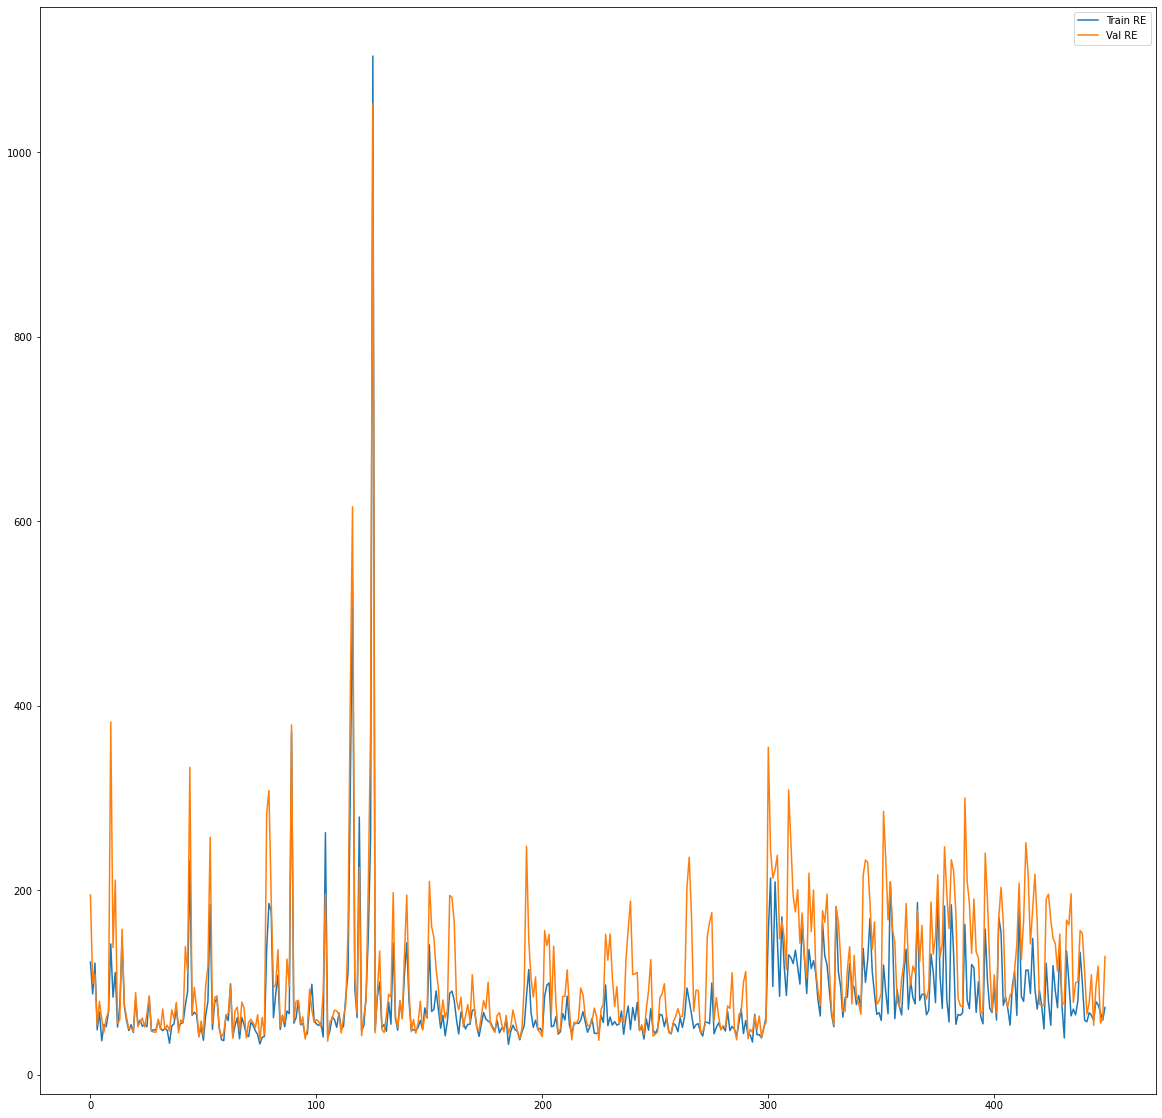

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(train_re,label="Train RE")
plt.plot(val_re, label='Val RE')
plt.legend()

In [16]:
f = open('results.txt')

lines = f.readlines()

models1 = []
train_re1, val_re1, test_re1 = [], [], []
for i in range(0,len(lines),6):
    x = " ".join(lines[i].split()[2:])
    models1.append(x)
    train_re1.append(float((lines[i+1]).split()[-1]))
    val_re1.append(float((lines[i+2]).split()[-1]))
    test_re1.append(float((lines[i+3]).split()[-1]))

min_value = min(val_re1)
min_index = val_re1.index(min_value)
min_index

print(train_re1[min_index],val_re1[min_index],test_re1[min_index])

models1[min_index]

35.78935623168945 30.730134963989258 39.717247009277344


'LR 0.01 kernel (5, 5) stride (3, 3) pool (2, 2) padding valid num_filter (32, 64)'

In [22]:

new_model = tf.keras.models.load_model('model_latest/0.01(5, 5)(3, 3)valid(2, 2)(32, 64).h5')
new_model.summary()
# new = model.load('model_latest/0.01(5, 5)(3, 3)valid(2, 2)(32, 64).h5')
# new.summary()

Model: "sequential_191"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_382 (Conv2D)          (None, 42, 42, 32)        832       
_________________________________________________________________
max_pooling2d_382 (MaxPoolin (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_383 (Conv2D)          (None, 6, 6, 64)          51264     
_________________________________________________________________
max_pooling2d_383 (MaxPoolin (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_140 (Flatten)        (None, 576)               0         
_________________________________________________________________
dense_280 (Dense)            (None, 128)               73856     
_________________________________________________________________
dropout_280 (Dropout)        (None, 128)            

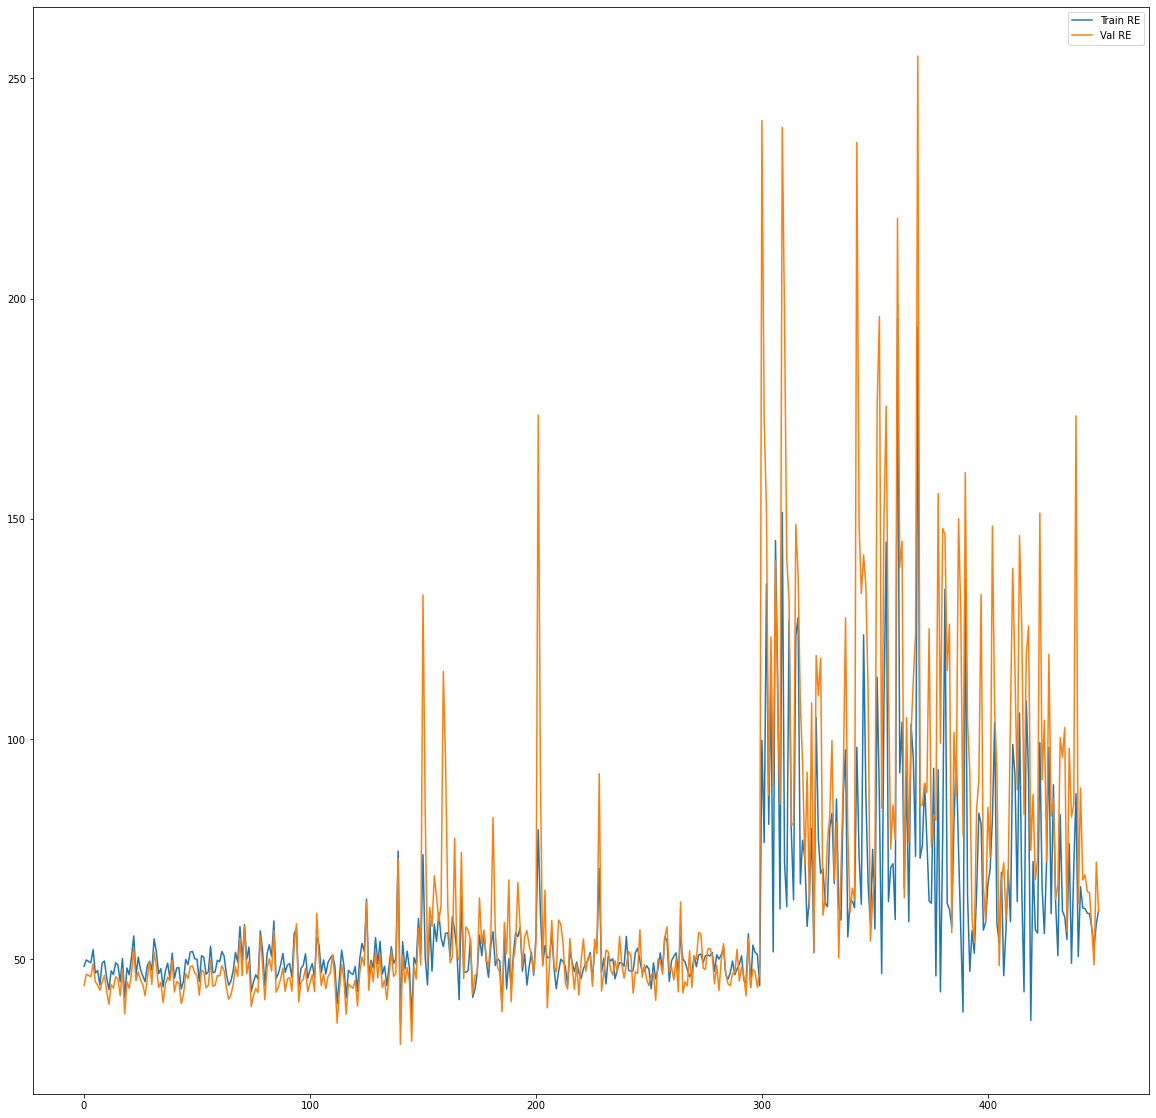

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.plot(train_re1,label="Train RE")
plt.plot(val_re1, label='Val RE')
plt.legend()